# Eclipse bugs dataset

## Pré-processamento (*Data pre-processing*)

In [1]:
import json
import os
import pandas as pd
import numpy as np

bugs_attributes_dict = {}
bugs_attribute_names = []

for attr_file in os.listdir('data/v02/eclipse'):
    attr_name = attr_file.split('.')[0]
    bugs_attribute_names.append(attr_name)
    attr_data_json = open(f'data/v02/eclipse/{attr_file}','r', encoding="utf8").read()
    bugs_attributes_dict[attr_name] = json.loads(attr_data_json)[attr_name]

bugs_attributes_dict

{'assigned_to': {'1609': [{'when': 1002744973,
    'what': 'Darin_Swanson@oti.com',
    'who': 49},
   {'when': 1002751241, 'what': 'Darin_Wright@oti.com', 'who': 36}],
  '1536': [{'when': 1002744899, 'what': 'Darin_Swanson@oti.com', 'who': 30},
   {'when': 1002751242, 'what': 'Darin_Wright@oti.com', 'who': 36},
   {'when': 1002920177, 'what': 'Darin_Swanson@oti.com', 'who': 54},
   {'when': 1007633451, 'what': 'Darin_Wright@oti.com', 'who': 54}],
  '1537': [{'when': 1002744900, 'what': 'Darin_Swanson@oti.com', 'who': 56},
   {'when': 1002751242, 'what': 'Darin_Wright@oti.com', 'who': 36}],
  '1538': [{'when': 1002744901, 'what': 'Darin_Swanson@oti.com', 'who': 54},
   {'when': 1002751243, 'what': 'Darin_Wright@oti.com', 'who': 36}],
  '1539': [{'when': 1002744902, 'what': 'Darin_Swanson@oti.com', 'who': 49},
   {'when': 1002751243, 'what': 'Darin_Wright@oti.com', 'who': 36}],
  '1750': [{'when': 1002745121, 'what': 'Darin_Swanson@oti.com', 'who': 24},
   {'when': 1002751244, 'what': '

In [2]:
bug_ids = bugs_attributes_dict['cc'].keys()
priority_value = {
    None: 0,
    'P1': 1,
    'P2': 2,
    'P3': 3,
    'P4': 4,
    'P5': 5,
}

formatted_bugs_attributes = []

for bug_id in list(bug_ids):
    bug_attr_dict = {}

    bug_attr_dict['id'] = bug_id
    for attr in [attr for attr in bugs_attribute_names if attr not in ['priority','cc','bug_status','assigned_to','reports']]:
        bug_attr_dict[attr] = bugs_attributes_dict[attr][bug_id][-1]['what']

    priority_list = [priority_value[priority['what']] for priority in bugs_attributes_dict['priority'][bug_id]]
    bug_attr_dict['priority'] = np.median(priority_list)
    bug_attr_dict['priority_votes'] = len([p for p in priority_list if p != 0])

    formatted_bugs_attributes.append(bug_attr_dict)

formatted_bugs_attributes
   


[{'id': '34',
  'component': 'Team',
  'op_sys': 'All',
  'product': 'Platform',
  'resolution': 'WONTFIX',
  'severity': 'normal',
  'short_desc': 'Should we filter out projects with no versions? (1GCI1XH)',
  'version': '2.0',
  'priority': 4.0,
  'priority_votes': 2},
 {'id': '1660',
  'component': 'Debug',
  'op_sys': 'Windows NT',
  'product': 'JDT',
  'resolution': 'FIXED',
  'severity': 'normal',
  'short_desc': 'Do not prompt for source when no source attachment',
  'version': '2.0',
  'priority': 0.0,
  'priority_votes': 0},
 {'id': '2261',
  'component': 'UI',
  'op_sys': 'All',
  'product': 'Platform',
  'resolution': 'WONTFIX',
  'severity': 'normal',
  'short_desc': '[Editor Mgmt] Usability: open editors are difficult to manage (1GEFRTU)',
  'version': '2.0',
  'priority': 0.0,
  'priority_votes': 0},
 {'id': '2325',
  'component': 'UI',
  'op_sys': 'All',
  'product': 'Platform',
  'resolution': 'FIXED',
  'severity': 'normal',
  'short_desc': 'Properties page missing pro

In [3]:
df = pd.DataFrame(formatted_bugs_attributes)

print(df.info())

df_initial_len = len(df)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165547 entries, 0 to 165546
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              165547 non-null  object 
 1   component       165547 non-null  object 
 2   op_sys          165547 non-null  object 
 3   product         165547 non-null  object 
 4   resolution      165547 non-null  object 
 5   severity        165547 non-null  object 
 6   short_desc      165547 non-null  object 
 7   version         165547 non-null  object 
 8   priority        165547 non-null  float64
 9   priority_votes  165547 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 12.6+ MB
None


id component      op_sys   product resolution     severity  \
0    34      Team         All  Platform    WONTFIX       normal   
1  1660     Debug  Windows NT       JDT      FIXED       normal   
2  2261        UI         All  Platform    WONTFIX       normal   
3  2325        UI         All  Platform      FIXED       normal   
4  2861        UI  Windows 98  Platform             enhancement   

                                          short_desc version  priority  \
0  Should we filter out projects with no versions...     2.0       4.0   
1  Do not prompt for source when no source attach...     2.0       0.0   
2  [Editor Mgmt] Usability: open editors are diff...     2.0       0.0   
3     Properties page missing project info (1GEPD0E)     2.0       0.0   
4  [ActionSets] User-customizable menus and toolbars     2.0       4.0   

   priority_votes  
0               2  
1               0  
2               0  
3               0  
4               3

## Análise dos dados (*Data analysis*)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

0    88.637668
2     9.408204
3     1.421953
4     0.410155
5     0.076715
6     0.032619
7     0.006645
8     0.003624
9     0.002416
Name: priority_votes, dtype: float64

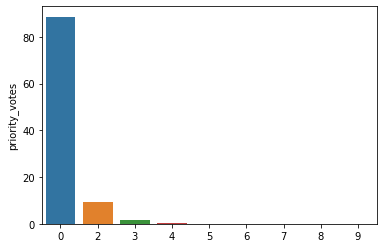

In [6]:
pv_percentage = df['priority_votes'].value_counts(normalize=True) * 100

sns.barplot(x=pv_percentage.index, y=pv_percentage)

pv_percentage


In [7]:
df = df[df['priority_votes'] != 0]

print(f"Dataset len: {len(df)} rows")

pv_percentage = df['priority_votes'].value_counts()

pv_percentage


Dataset len: 18810 rows


2    15575
3     2354
4      679
5      127
6       54
7       11
8        6
9        4
Name: priority_votes, dtype: int64

c:\users\thais\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


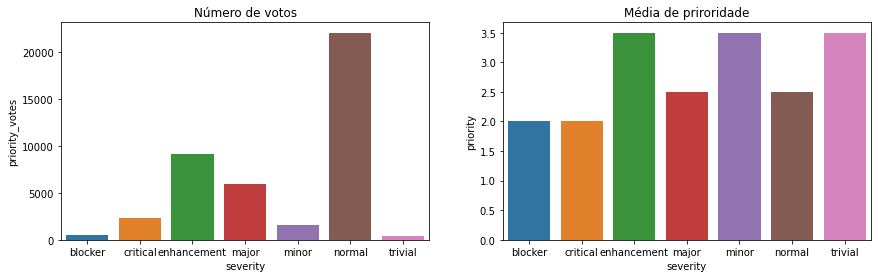

In [8]:
sev_pv_total_votes = df.groupby('severity')['priority_votes'].sum()
sev_p_median = df.groupby('severity')['priority'].median()

df['severity'].value_counts()


fig, ax =plt.subplots(1,2)
sns.barplot(x=sev_pv_total_votes.index, y=sev_pv_total_votes, ax=ax[0]).set_title("Número de votos")
sns.barplot(x=sev_p_median.index, y=sev_p_median, ax=ax[1]).set_title("Média de priroridade")
fig.subplots_adjust(right=2)
fig.show()

## Aplicaçãoss de NLP nas *short descriptions* (*NLP on short description*)

Aplicamos Processamento de Linguagem Natural (NLP) no campo *short description* para extrair as palavras chave utilizadas nesse campo, que representa o título do *bug*. Essas palavras foram anexadas em um novo campo da base de dados, chamado '*short_desc_keywords*'. Outro campo que também foi criado foi o '*short_desc_keywords_size*', o qual guarda a quantidade de palavras chaves do título do bug, para facilitar futuros cálculos.

In [ ]:
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

for index, row in df.iterrows():
    text = row['short_desc']

    word_punct_token = WordPunctTokenizer().tokenize(text)

    clean_token=[]
    for token in word_punct_token:
        token = token.lower()
        # remove any value that are not alphabetical
        new_token = re.sub(r'[^a-zA-Z]+', '', token) 
        # remove empty value and single character value
        if new_token != "" and len(new_token) >= 2: 
            vowels=len([v for v in new_token if v in "aeiou"])
            if vowels != 0: # remove line that only contains consonants
                clean_token.append(new_token)


    # Get the list of stop words
    stop_words = stopwords.words('english')
    # add new stopwords to the list
    stop_words.extend(["could","though","would","also","many",'much'])

    # Remove the stopwords from the list of tokens
    tokens = [x for x in clean_token if x not in stop_words]
    print(tokens)

    if tokens:
        df.loc[index,'short_desc_keywords'] = ' '.join(tokens)
        df.loc[index,'short_desc_keywords_size'] = len(tokens)
    else:
        df.loc[index,'short_desc_keywords'] = ''
        df.loc[index,'short_desc_keywords_size'] = 0


['filter', 'projects', 'versions', 'gcixh']
['prompt', 'source', 'source', 'attachment']
['editor', 'usability', 'open', 'editors', 'difficult', 'manage', 'gefrtu']
['properties', 'page', 'missing', 'project', 'info', 'gepde']
['actionsets', 'user', 'customizable', 'menus', 'toolbars']
['editor', 'ec', 'editing', 'file', 'outside', 'workspace', 'gkozs']
['ui', 'ec', 'open', 'perspective', 'new', 'window', 'key', 'flaky']
['ec', 'need', 'mime', 'type', 'generator']
['request', 'keyboard', 'shortcut', 'cycle', 'editors', 'glusp']
['search', 'missing', 'field', 'occurrecnces']
['java', 'reconciler', 'works', 'strange', 'duplicate', 'methods', 'gezg']
['refacotring', 'show', 'warning', 'new', 'method', 'constructor', 'name', 'gftre']
['cannot', 'close', 'connection']
['invalid', 'references', 'ipath', 'getdevice', 'potentially', 'breaking', 'linux', 'gur']
['widget', 'disposed', 'error', 'breakpoint', 'properties', 'glena']
['awt', 'integration', 'works', 'windows']
['propertiesview', 'pro

['pop', 'menu', 'showing', 'composite', 'genym']
['support', 'lesstif', 'linux']
['clabel', 'text', 'grayed', 'disabled']
['redraw', 'problem', 'table', 'gfwpe']
['fontdialog', 'needs', 'support', 'printer', 'fonts']
['log', 'runtime', 'exceptions']
['table', 'shows', 'target', 'feedback', 'drag']
['styledtext', 'bidi', 'tab', 'handling']
['multi', 'select', 'tree', 'disposing', 'last', 'selected', 'item', 'selects', 'random', 'item', 'portability']
['print', 'ignores', 'print', 'file', 'option']
['setlinestyle', 'work', 'width', 'portability']
['styledtext', 'bidi', 'line', 'background', 'color', 'drawn', 'inset']
['ui', 'supporting', 'multiline', 'comments']
['incorrect', 'extension', 'point', 'docs', 'gilwn']
['javacore', 'recognize', 'dot', 'notation', 'inner', 'classes', 'gigzg']
['code', 'assist', 'work', 'inner', 'classes', 'gjovt']
['bug', 'javasearchscope', 'glegc']
['java', 'syntax', 'highlighting', 'overkill', 'ghjze']
['change', 'background', 'color', 'editor', 'gikf']
['ec

['code', 'assist', 'display', 'view', 'binaries', 'source', 'glef']
['problem', 'importing', 'jar', 'file', 'deleting', 'jar', 'file']
['arrayindexoutofboundsexception', 'index', 'merging']
['vmdisconnectedexception', 'notification', 'resume']
['internal', 'jdi', 'error']
['error', 'ticks', 'updated', 'editor', 'tab']
['import', 'crash', 'cannot', 'launch', 'eclipse']
['refactoring', 'classpath', 'updated', 'girez']
['npe', 'launching', 'java', 'build', 'path', 'refs', 'missing', 'project']
['eclipse', 'install', 'zip', 'file', 'contains', 'wrong', 'permissions']
['compare', 'save', 'conflict', 'resolution', 'shows', 'progress', 'gfla']
['eclipse', 'requires', 'write', 'permissions', 'install', 'directory']
['cannot', 'start', 'eclipse', 'anywhere', 'install', 'directory']
['npe', 'launchmanagervisitor', 'shutdown']
['project', 'classpath', 'javadoc', 'ant']
['combo', 'modify', 'event', 'thrown', 'select', 'call']
['need', 'able', 'cut', 'paste', 'data', 'clipboard']
['linux', 'motif',

['stepping', 'slow']
['show', 'source', 'matches', 'target']
['exception', 'built', 'state', 'scrapbook']
['sub', 'folders', 'dot', 'visible', 'packages', 'view', 'gcoh']
['search', 'page', 'offer', 'case', 'sensitivity', 'check', 'box']
['invocationtargetexception', 'trying', 'search']
['extract', 'method', 'incorrect', 'error', 'message']
['newly', 'added', 'resources', 'cannot', 'checked']
['stringindexoutofbounds', 'validating', 'path']
['wake', 'mechanism', 'broken', 'motif']
['walkback', 'workspace', 'opened']
['ant', 'javac', 'task', 'uses', 'execution', 'runtime', 'compile']
['generate', 'plug', 'jar', 'creates', 'zip', 'file', 'contains']
['implemented', 'error', 'messages', 'slider', 'others']
['default', 'background', 'color', 'lists', 'combos', 'consistent', 'wink']
['timeout', 'launching']
['npe', 'opening', 'view']
['npe', 'clicking', 'catch', 'button']
['coredump', 'debugger', 'step', 'action']
['codeformatter', 'impossible', 'set', 'indentation', 'level', 'position', 'm

['illegalargumentexception', 'textviewer', 'setselectedrange', 'selecting', 'search', 'result']
['code', 'formatter', 'adds', 'unnecessary', 'indent', 'opening', 'braces']
['npe', 'build']
['eclipse', 'java', 'editor', 'hangs', 'editing', 'large', 'source']
['widget', 'disposed', 'error']
['cannot', 'run', 'pde', 'self', 'hosting']
['projects', 'scrolled', 'top', 'packages', 'view', 'scrollbar']
['memory', 'shown', 'user', 'gduxcd']
['possible', 'export', 'files', 'directly', 'source', 'folder']
['exception', 'right', 'clicking', 'text', 'editor']
['key', 'bindings', 'use', 'linux', 'close', 'editor']
['threading', 'problems', 'plugin', 'startup']
['right', 'mouse', 'click', 'select']
['renaming', 'public', 'class', 'rename', 'cu', 'file']
['breakpoints', 'view', 'improvements']
['feature', 'split', 'debug', 'action', 'set', 'debug', 'launch']
['illegalargumentexception', 'linkedpositionui']
['undo', 'buffer', 'needs', 'remember', 'cursor', 'location']
['inspector', 'missing', 'tostrin

['domnode', 'getchild', 'string', 'needs', 'handle', 'children', 'null', 'names']
['export', 'wizard', 'show', 'items', 'default', 'package']
['contributions', 'distinguish', 'structured', 'selection', 'text', 'selection']
['browse', 'enclosing', 'class', 'nothing', 'gi']
['workbench', 'null', 'converted', 'empty', 'structuredselection']
['ui', 'dead', 'lock', 'ide', 'frozen']
['coolbar', 'disabled', 'toolbar', 'icons', 'use', 'correct', 'background', 'color', 'applyithemes', 'windowsng', 'various', 'windows']
['export', 'multiple', 'files', 'file', 'name', 'different', 'directories', 'zip', 'file', 'fails']
['import', 'currently', 'open', 'files', 'allowed']
['overriden', 'methods', 'inserted', 'past', 'end', 'source']
['npe', 'using', 'search']
['labels', 'wince', 'use', 'background', 'color', 'parent', 'color', 'set']
['banner', 'graphics', 'save', 'dialog']
['organize', 'imports', 'imports', 'unnecessary', 'classes']
['itype', 'resolve', 'fails']
['npe', 'revert', 'java', 'editor']

['small', 'feature', 'separate', 'disable', 'enable', 'breakpoints', 'gkkei']
['loss', 'connection']
['workbench', 'automatically', 'brought', 'front', 'focus', 'follows', 'mouse', 'mode']
['smoke', 'toolbar', 'flickers', 'pressing', 'arrow', 'search', 'result', 'view', 'gcur']
['ui', 'new', 'file', 'folder', 'wizards', 'filter', 'character']
['home', 'end', 'keys', 'poorly', 'supported', 'content', 'assist']
['invalid', 'thread', 'access', 'loading', 'extension', 'point']
['navigator', 'navigator', 'error', 'ticks', 'getl']
['eclipse', 'tilde', 'character', 'displayed', 'entered', 'system', 'hangs']
['mismatch', 'selected', 'tab', 'displayed', 'tab']
['problems', 'editor', 'pane', 'repaint', 'focus']
['eclipse', 'ignores', 'jar', 'files', 'lib', 'ext', 'dir', 'build', 'path']
['closing', 'modified', 'editor', 'prompt', 'open', 'perspective', 'gifx']
['viewers', 'treeviewer', 'update']
['team', 'decorators', 'bug']
['rename', 'package', 'changing', 'case']
['code', 'assist', 'doen', 'i

['editor', 'editor', 'tabs', 'change', 'scroll', 'position', 'editor', 'unzoomed']
['close', 'dialog', 'use', 'ok', 'cancel', 'instead', 'yes', 'cancel', 'gkdi']
['replace', 'project', 'folder', 'tag', 'nothing']
['attempts', 'set', 'breakpoint', 'unsaved', 'resource', 'fails']
['organize', 'imports', 'feature', 'finds', 'errors', 'assert', 'statements']
['show', 'packages', 'view', 'packages', 'view']
['error', 'objects', 'created', 'wrong', 'place', 'code', 'endif']
['text', 'viewer', 'handle', 'unicode']
['intelligent', 'code', 'assist']
['debug', 'action', 'set', 'contributed', 'items', 'filled', 'accerlerators', 'work']
['user', 'returned', 'last', 'preference', 'modified']
['repo', 'view', 'release', 'version']
['inner', 'classes', 'hard', 'debug', 'scopes', 'visible']
['standard', 'components', 'task', 'view', 'cannot', 'create', 'new', 'tasks', 'text', 'filter', 'gec']
['ui', 'replace', 'needs', 'support', 'multiselect']
['config', 'wizard', 'performs', 'finish', 'twice']
['sto

['double', 'click', 'bracket', 'matching', 'work', 'end', 'line']
['navigator', 'copy', 'move', 'deletes', 'existing', 'resources']
['grvpdu', 'cannot', 'set', 'source', 'classpath', 'variables', 'workbench', 'level', 'build', 'path']
['imagedescriptorregistry', 'must', 'empty', 'hash', 'map', 'dispose']
['duplicate', 'non', 'qualified', 'class', 'names', 'handled', 'import', 'generator']
['dialogs', 'cannot', 'cancel', 'opening', 'hierarchy']
['override', 'indicator', 'outliner', 'updated']
['npe', 'property', 'page']
['gridlayout', 'handle', 'wrapped', 'label', 'properly']
['groups', 'labels', 'found', 'jaws']
['persist', 'display', 'execution', 'log', 'ant', 'console', 'option']
['preferences', 'workbench', 'fonts', 'buttons', 'small']
['navigator', 'popup', 'menu', 'copy', 'broken']
['wizards', 'previous', 'location', 'project', 'content', 'area', 'remembered', 'gdqux']
['build', 'order', 'preference', 'page', 'misleading']
['junit', 'plugin', 'color', 'heirarchy', 'tree']
['ant', 

['debugger', 'source', 'lookup', 'controlled', 'launch', 'config']
['illegalargumentexception', 'undoing', 'organize', 'imports']
['actionsets', 'better', 'enablefor', 'support', 'required']
['breakpoints', 'source', 'replaced', 'repository']
['decorators', 'binary', 'plug', 'projects', 'stay', 'around', 'even', 'project', 'brought', 'repository']
['cannot', 'paint', 'long', 'strings', 'windows']
['keyboard', 'support', 'move', 'resize', 'accessibility', 'issue', 'gitcbe']
['npe', 'orphanedfolderlistener']
['breakpoint', 'manager', 'use', 'new', 'marker', 'api']
['search', 'engine', 'must', 'search', 'non', 'toc', 'topics']
['classloader', 'handle', 'corba', 'ejb', 'lookups', 'within', 'plug']
['provide', 'anonymous', 'inner', 'named', 'inner', 'class', 'refactoring', 'refactoring']
['implement', 'delegate', 'member', 'refactoring']
['npe', 'self', 'encapsulate', 'field']
['codeformatter', 'bug', 'formatting', 'catch', 'block']
['generate', 'getter', 'setter', 'field', 'starting', 'let

['feature', 'request', 'shortcut', 'running', 'last', 'ant', 'build']
['provide', 'add', 'local', 'history', 'compilation', 'units']
['compiler', 'internal', 'error', 'box', 'broken']
['jar', 'packager', 'error', 'message', 'buttons', 'disabled']
['editor', 'tabs', 'fill', 'right']
['junit', 'miss', 'green', 'bar']
['search', 'references', 'hierarchy', 'searches', 'package']
['request', 'public', 'interface', 'call', 'uideactivate', 'ioleinplaceobject']
['launch', 'config', 'dialog', 'ok', 'button']
['outline', 'show', 'anonymous', 'inner', 'classes']
['stepping', 'performance', 'revisited']
['jar', 'exporter', 'jarsigner', 'keytool', 'integration']
['define', 'hidden', 'view', 'placeholder', 'view', 'plugin']
['decoratormanager', 'api', 'required', 'refresh', 'decorator']
['preferences', 'default', 'file', 'editor', 'preferences', 'die']
['stepping', 'resumes', 'instead']
['npe', 'project', 'capabilities', 'property', 'page']
['matching', 'brackets', 'annoyance']
['problem', 'painter'

['need', 'replacement', 'haschildren']
['nullpointerexception', 'project', 'properties', 'packages', 'view']
['get', 'branch', 'silently', 'nothing']
['resources', 'need', 'exclude', 'specific', 'directories']
['dialogs', 'errordialog', 'modifies', 'shared', 'image', 'gjums']
['working', 'set', 'dialog', 'remove', 'option']
['java', 'browsing', 'filter', 'support']
['command', 'specification', 'wizard', 'problems']
['need', 'better', 'ui', 'recovering', 'deletions', 'local', 'history']
['checkout', 'argument', 'meaningless', 'specified']
['generated', 'new', 'testcase', 'differes', 'form', 'generated', 'new', 'class']
['tasks', 'auto', 'fix', 'task', 'view', 'disabled', 'multiple', 'tasks', 'selected']
['resources', 'recursive', 'deletion', 'slow']
['building', 'plugin', 'workspace', 'projects', 'folder']
['ignore', 'tasks', 'project']
['need', 'ability', 'determine', 'breakpoint', 'applies', 'target']
['crash', 'step', 'string', 'constructor']
['firelisteners', 'called', 'huge', 'numb

['update', 'discovery', 'sites', 'appear', 'bookmarks']
['move', 'always', 'disabled', 'outline', 'context', 'menu']
['bogus', 'appears', 'compare', 'function']
['extend', 'templating', 'allow', 'users', 'edit', 'happens', 'creating', 'new', 'class']
['compiler', 'bug', 'invalid', 'byte', 'code']
['npe', 'trying', 'check', 'project', 'already', 'exists']
['setting', 'add', 'javadoc', 'comment']
['system', 'shut', 'without', 'save', 'file', 'warnings']
['replace', 'slow']
['hotspot', 'error', 'calling', 'tostring']
['redundant', 'menu', 'entry', 'variables', 'view']
['action', 'icon', 'inconsistencies']
['open', 'type', 'console', 'work', 'anon', 'inner', 'types']
['senders', 'references', 'debug', 'pane']
['funny', 'save', 'behavior', 'view']
['support', 'startup', 'sequence']
['like', 'emacs', 'integration', 'plugin']
['npe', 'overwriting', 'project', 'repository']
['text', 'widget', 'bug', 'converts', 'unicode', 'latin', 'double', 'arrow', 'math', 'double', 'arrow']
['perspectives']


['hard', 'find', 'jre', 'launching', 'java', 'applications']
['unc', 'work', 'classpath']
['edit', 'configuration', 'dialog', 'ui', 'confusing']
['npe', 'launch', 'configs']
['keyword', 'subst', 'wizard', 'let', 'user', 'choose', 'text', 'mode', 'automatic', 'option']
['astnode', 'getelementtype']
['exceptions', 'log', 'addbreakpointaction', 'selectionchanged']
['index', 'bounds', 'using', 'launch', 'configurations', 'browser']
['refactoring', 'inside', 'method']
['ant', 'fule', 'mapper', 'regexp', 'problem']
['request', 'uniformity', 'keys']
['npe', 'running', 'tests']
['new', 'launch', 'config', 'ui', 'problem', 'tab', 'switching']
['launch', 'configs', 'creation', 'made', 'simpler']
['deselect', 'button', 'step', 'filter', 'preference', 'page']
['folder', 'japanese', 'characters', 'disappears']
['incorrect', 'dependencies', 'result', 'npe', 'debugactiongroupsmanager']
['controls', 'appear', 'tool', 'items']
['repository', 'view', 'work', 'ui', 'thread']
['display', 'view', 'use', 's

['editor', 'scrolling', 'notebook', 'tabs', 'considered', 'harmful']
['npe', 'reordering', 'editors']
['npe', 'opening', 'multipage', 'editor', 'multipageeditorpart', 'isdirty', 'check', 'null']
['tons', 'extra', 'menu', 'items']
['memory', 'errors', 'bring', 'eclipse']
['export', 'feature', 'useful', 'class', 'files', 'general', 'issue', 'export', 'import']
['migration', 'closed', 'project', 'hide', 'lose', 'data']
['builder', 'setting', 'source', 'resources', 'derived']
['context', 'menu', 'java', 'file', 'missing', 'externalize', 'strings', 'action', 'item']
['open', 'modes', 'single', 'click', 'packages', 'navigator', 'views', 'work', 'uniformly']
['filter', 'working', 'set', 'details', 'dialog', 'use', 'workbench', 'decorators']
['npe', 'restoring', 'typehierarchy']
['compliant']
['move', 'java', 'file', 'errors', 'remain']
['op', 'optimization', 'causes', 'problems', 'build', 'happened']
['api', 'formatting', 'options']
['breakpoint', 'actions', 'ruler', 'popup', 'need', 'seperat

['spacebar', 'press', 'button']
['view', 'perspectives', 'parts', 'created', 'lazily']
['adding', 'java', 'nature', 'project', 'bring', 'like', 'package', 'view']
['content', 'assist', 'left', 'paren', 'string', 'literal']
['error', 'changing', 'font']
['npe', 'setting', 'marker', 'attributes']
['show', 'hide', 'buttons', 'reversed']
['swtexception', 'repository', 'properties', 'page']
['added', 'breakpoint', 'visible', 'using', 'segmented', 'view']
['fast', 'view', 'button', 'menu']
['view', 'drag', 'fast', 'view', 'different', 'cursor']
['view', 'double', 'click', 'title', 'bar', 'icon', 'close', 'view']
['next', 'editor', 'restores', 'maximized', 'view']
['viewmgmt', 'flicker', 'fast', 'view', 'bar', 'changing', 'icon', 'image']
['font', 'dialog', 'exception']
['templates', 'provide', 'capitalization', 'mechanism', 'templates']
['internal', 'jcore', 'scanner', 'used', 'commentanalyzer']
['fast', 'view', 'menu', 'toolbar', 'changes']
['save', 'editor', 'work']
['internal', 'jcore', '

['focus', 'text', 'field', 'opentypedialog']
['negativearraysizeexception', 'number', 'validation', 'preference', 'pages']
['presave', 'postsave', 'events', 'editors']
['tab', 'space', 'size', 'problem']
['editing', 'read', 'files', 'allowed', 'occasionally']
['task', 'properties', 'description', 'field', 'multiline']
['bidi', 'enable', 'orientation', 'widgets']
['printing', 'support', 'linux', 'motif']
['attempting', 'create', 'breakpoints', 'resource', 'tree', 'locked']
['cancel', 'reload', 'causes', 'dirty', 'buffer']
['working', 'set', 'may', 'loose', 'projects']
['team', 'versionning', 'application', 'local']
['source', 'menu', 'collision']
['eclipsehome', 'fragile', 'classpaths', 'due', 'version', 'numbers', 'plug', 'subdirectories']
['bidi', 'range', 'arabic', 'characters', 'displayed', 'question', 'marks', 'java', 'editor']
['rmi', 'calls', 'work', 'wsad', 'install', 'dir', 'contains', 'spaces']
['npe', 'label', 'decorations', 'preference', 'page']
['info', 'dialog', 'startup',

['home', 'key', 'jump', 'first', 'character']
['override', 'method', 'dialog', 'improvements', 'dialogs']
['migration', 'launch', 'configs']
['hover', 'help', 'appears', 'code', 'assist']
['junit', 'testsuite', 'include', 'abstract', 'classes']
['outliner', 'highlight', 'method']
['quick', 'fix', 'work', 'inner', 'class', 'references', 'quick', 'fix']
['vertical', 'ruler', 'add', 'bookmark', 'add', 'task', 'take', 'text', 'selection', 'task', 'name']
['generate', 'getters', 'setters', 'ignore', 'upper', 'case', 'option']
['error', 'message', 'hover', 'help', 'broken']
['export', 'option', 'select', 'referenced', 'classes', 'resources', 'jar', 'creation']
['inconsistent', 'ordering', 'positioning', 'buttons', 'java', 'preference', 'pages']
['thread', 'created', 'instance', 'java', 'editor']
['contributions', 'hierarchy', 'view', 'menu', 'items', 'wrong', 'style']
['strange', 'search', 'message']
['classpathcontainer', 'question']
['lazy', 'option', 'generate', 'getter', 'code', 'manipul

['multiple', 'launch', 'filters']
['copy', 'working']
['externaltools', 'positioning', 'external', 'tools', 'action', 'run', 'menu']
['npe', 'selectionenabler']
['abstractmethoderror', 'data', 'tree', 'node']
['decorator', 'creation', 'protected', 'failed', 'plugin', 'activation']
['console', 'send', 'break', 'remote', 'program']
['need', 'cover', 'splash', 'screen', 'case', 'none', 'known']
['renaming', 'recreating', 'elements']
['support', 'rmi']
['undo', 'goes', 'past', 'last', 'save']
['contributions', 'interactions', 'improve', 'support', 'plug', 'ins', 'contributing', 'plug', 'ins', 'menus']
['get', 'remote', 'syncing', 'new', 'file']
['silly', 'bug', 'ant', 'console']
['executable', 'handle', 'return', 'code', 'main', 'java', 'errors']
['working', 'set', 'icon', 'displayed', 'red', 'square']
['format', 'accelerator']
['automatic', 'rmic', 'compilation', 'classes', 'extend', 'remoteobject']
['npe', 'changing', 'pages', 'preference', 'dialog']
['jdtcompileradapter', 'ignores', 'no

['perspectives', 'separation', 'persp', 'fast', 'views', 'seem', 'visible']
['cannot', 'switch', 'install', 'update', 'german']
['workbench', 'shorcut', 'toolbar', 'coolbar', 'well']
['launcher', 'splash', 'screen', 'unix', 'bit', 'display', 'change', 'color']
['dav', 'incomplete', 'spec', 'org', 'eclipse', 'team', 'core', 'target', 'targetprovider']
['keys', 'searching', 'fails', 'search']
['exception', 'log', 'file']
['advanced', 'search', 'window', 'show', 'internet', 'explorer', 'icon']
['key', 'bindings', 'hotkey', 'assignable', 'default', 'bookmark']
['viewers', 'acc', 'cannot', 'access', 'checkboxcell', 'textcell', 'combobox']
['external', 'programs', 'support', 'photon']
['acc', 'cannot', 'sort', 'column', 'table', 'view']
['walkback', 'selecting', 'item', 'customize', 'perspective', 'dialog']
['ant', 'receive', 'environment', 'variable']
['several', 'eclipse', 'buttons', 'short']
['treeitem', 'setforegroundcolor', 'work']
['desire', 'per', 'project', 'property', 'settings', 'a

['conditially', 'add', 'new', 'packages', 'folders', 'current', 'working', 'set', 'code', 'manipulation', 'filters']
['accelerator', 'comment', 'code', 'causing', 'trouble']
['streams', 'closed', 'java', 'program', 'finished']
['add', 'jre', 'dialog', 'comes', 'error', 'condition']
['npe', 'opening', 'java', 'perspective']
['packages', 'view', 'selection', 'always', 'one', 'high']
['name', 'filter', 'patterns', 'filter', 'relaunch']
['create', 'getter', 'setter', 'explicit', 'hint', 'getter', 'setter', 'already', 'exist']
['tasks', 'cleared', 'refactoring', 'refactoring']
['vertical', 'scrollbar', 'clipped']
['method', 'copy', 'duplicates', 'method', 'previously', 'existed']
['busy', 'indicator', 'populating', 'type', 'hierarchy']
['deleting', 'source', 'folder', 'adds', 'log']
['coolbars', 'editoractionbars', 'toolbars', 'getting', 'disposed']
['class', 'file', 'editor', 'scroll', 'naturally']
['need', 'define', 'alternative', 'accelerators', 'chinese']
['editor', 'org', 'eclipse', 'u

['reset', 'button', 'incorrectly', 'disabled', 'documentation', 'page']
['outliner', 'focus', 'causes', 'select', 'causes', 'horizontal', 'scroll']
['resourceexception', 'closed', 'projects', 'workspace']
['nullpointerexception', 'preferences', 'dialog', 'hover', 'select']
['incomplete', 'project', 'element', 'classpath', 'file', 'readable']
['clipped', 'icon', 'import', 'zip', 'wizard']
['externaltools', 'ant', 'script', 'cancelation', 'better', 'handled']
['emacs', 'undo']
['search', 'missing', 'accelerator', 'definition']
['smoke', 'deleting', 'javadioc', 'ed', 'method', 'messes', 'indenting']
['bad', 'request', 'propfind']
['rename', 'package', 'fails', 'inner', 'classes', 'imported']
['present', 'exception', 'closing', 'java', 'editor', 'outside', 'classpath']
['api', 'return', 'file', 'encoding']
['externaltools', 'ant', 'default', 'target', 'main']
['translation', 'errors', 'accelerators']
['key', 'bindings', 'emacs', 'cut', 'text', 'clipboard']
['problems', 'occured', 'building

['workbench', 'task', 'bar', 'bring', 'window', 'front', 'certain', 'dialogs', 'shown']
['file', 'name', 'put', 'bogus']
['client', 'must', 'turn', 'messages']
['content', 'assist', 'code', 'assist', 'stays', 'aplication', 'windows']
['changing', 'encoding', 'loses', 'changes']
['globalactions', 'auto', 'build', 'recreates', 'deleted', 'projects', 'refreshing']
['concurrent', 'modification', 'updating', 'classpath']
['execute', 'permissions', 'libraries']
['working', 'set', 'filter']
['search', 'references', 'hierarchy', 'causes', 'unexpected', 'results', 'inner', 'types']
['pull', 'destroys', 'super', 'call', 'self']
['every', 'time', 'java', 'editor', 'open', 'new', 'instances', 'retargettoolbaraction', 'created']
['applying', 'patch', 'swallows', 'last', 'line']
['externaltools', 'run', 'external', 'command', 'variables', 'working']
['written', 'using', 'platform', 'line', 'delimiters', 'utf']
['chevrons', 'stay', 'pushed', 'popup', 'menu', 'displayed']
['toolitems', 'dropdown', 'st

['window', 'preferences', 'templates', 'columns', 'bad', 'size']
['externaltools', 'using', 'external', 'tool', 'configs', 'contexts']
['javadoc', 'show', 'busy', 'cursor', 'javadoc']
['problem', 'marker', 'vertical', 'ruler', 'removed', 'deleting', 'line']
['typos']
['close', 'project', 'active', 'child', 'project', 'selected']
['doc', 'subdirectory', 'missing', 'help', 'ui', 'plug', 'binary', 'runtime', 'drops']
['tabbing', 'java', 'editor', 'takes', 'cursor']
['build', 'npe', 'getting', 'context', 'menu', 'current', 'configuration']
['illegalargumentexception', 'printing', 'long', 'stack', 'console']
['emacs', 'key', 'bindings', 'find', 'actions', 'non', 'standard']
['npe', 'syncview', 'isempty']
['unable', 'cancel', 'frozen', 'connection']
['layout', 'problem', 'opening', 'view']
['build', 'test', 'feature', 'overview', 'page', 'scrolls', 'clicked']
['scrolling', 'editor', 'hide', 'hovers']
['horizontal', 'scrollbar', 'always', 'appears', 'content', 'pane']
['combo', 'list', 'opens

['type', 'hierarchy', 'icons', 'shown', 'red', 'squares']
['hovering', 'persistent', 'hover', 'help']
['stacked', 'views', 'switch']
['refactor', 'extract', 'method', 'produces', 'exception', 'string', 'index', 'range']
['multi', 'selection', 'add', 'local', 'history']
['launch', 'configurations', 'table', 'cut', 'motif']
['text', 'hover', 'gets', 'stuck']
['key', 'bindings', 'emacs', 'keybindings', 'work', 'manifest', 'editor', 'fields']
['opening', 'two', 'files', 'time']
['cantalkdav', 'need']
['preferences', 'persisted']
['tooltip', 'wrong', 'start', 'label', 'retarget', 'toolitem', 'action', 'set']
['emacs', 'keybindings', 'getting', 'alt']
['severe', 'workbench', 'crash', 'deleting', 'project', 'open', 'editor']
['externaltools', 'linux', 'external', 'tool', 'error', 'messages']
['eclipse', 'start', 'win']
['ui', 'server', 'aborted', 'message', 'tell', 'project', 'problem', 'occured']
['external', 'tools', 'ant', 'add', 'jar', 'work']
['externaltools', 'shell', 'script', 'cannot'

['java', 'outliner', 'move', 'elements', 'default']
['widgets', 'grossly', 'large']
['incoming', 'deletion', 'indicated', 'icon']
['system', 'info', 'show', 'list', 'features']
['add', 'javadoc', 'comment', 'broken']
['cannot', 'differentiate', 'change', 'deletion']
['internet', 'explorer', 'help', 'exceptionaccessviolation']
['missing', 'documentation', 'extension', 'points']
['missing', 'mnemonics', 'overview', 'page', 'plugin']
['debug', 'exception', 'step', 'var', 'selected', 'detail', 'pane', 'visible']
['console', 'output', 'continues', 'termination']
['illegalargumentexception', 'refactor', 'extract', 'method']
['multi', 'select', 'work', 'restore', 'local', 'history']
['need', 'browswer', 'adapter', 'launch', 'specified', 'binary']
['preferences', 'preferences', 'working', 'import', 'export']
['associated', 'action', 'emacs']
['windows', 'come', 'front', 'reason']
['repeatable', 'debugging']
['types', 'view', 'show', 'types', 'wrong', 'package']
['system', 'info', 'indicate', '

['text', 'wrapping', 'wrong', 'popup', 'windows', 'javadoc', 'popups']
['externaltools', 'need', 'variable', 'identify', 'build', 'kind']
['external', 'tool', 'builders', 'names', 'truncated']
['printing', 'java', 'files', 'prints', 'windows', 'background', 'color']
['option', 'open', 'structure', 'compare', 'ignored']
['present', 'exception', 'closing', 'editor']
['texteditor', 'accept', 'delete', 'key']
['texteditor', 'calls', 'validateedito']
['copy', 'paste', 'inserts', 'two', 'new', 'lines']
['cannot', 'tab', 'perspectives', 'tool', 'bar']
['dialogs', 'appears', 'screens']
['unwanted', 'switch', 'first', 'edit', 'window', 'opening']
['printing', 'java', 'editor', 'turn', 'line', 'highlighting', 'printing']
['add', 'ability', 'hide', 'selection', 'indicator', 'table', 'checkboxes', 'dual', 'selection', 'one', 'widget', 'confusing']
['npe', 'searching', 'java', 'method']
['editor', 'close', 'loses', 'keyboard', 'focus']
['builder', 'performance', 'issue']
['left', 'right', 'arrow', 

['feature', 'plugins', 'dialog', 'fails', 'launch', 'web', 'browser']
['editor', 'show', 'marker', 'bar']
['copy', 'paste', 'may', 'available', 'sometime']
['feature', 'enhance', 'value', 'changing']
['regression', 'eclipse', 'wants', 'import', 'class', 'already', 'imported']
['feature', 'inside', 'feature', 'jar', 'default']
['coolbar', 'coolbarmanager', 'support', 'wrapping', 'subtoolbarmanager']
['emacs', 'incremental', 'search', 'repeats', 'functional']
['xerces', 'crashes', 'later']
['java', 'editor', 'hangs', 'tab']
['help', 'work', 'menu', 'items']
['unsatisfiedlinkerror', 'org', 'eclipse', 'os', 'linux', 'libswt', 'pi']
['arrayindexoutofboundsexception', 'ctabfolder']
['active', 'help', 'strange', 'behaviour']
['tasks', 'checkbox', 'task', 'list', 'accessible']
['propertiesview', 'comboboxpropertydescriptor', 'provide', 'defualt', 'label', 'provider']
['two', 'juristically', 'identical', 'bytewise', 'identical']
['following', 'traceback', 'occured']
['text', 'editor', 'use', 't

['styledtext', 'print', 'selection', 'prints', 'whole', 'page', 'atleast']
['tasks', 'stale', 'tasks', 'view']
['debug', 'perspective', 'switching']
['breakpoint', 'hit', 'parent', 'class', 'method', 'instead', 'class', 'method']
['shell', 'computetrim', 'include', 'menu', 'bar']
['ant', 'use', 'exception', 'message', 'one', 'available']
['maximize', 'first', 'resize', 'gets', 'reverted']
['table', 'columns', 'distributing', 'correctly', 'properties', 'page']
['fastview', 'open', 'new', 'view', 'fast', 'view', 'preference', 'works', 'placeholder']
['jface', 'text', 'undo', 'text', 'work', 'overwrite', 'mode']
['plugin', 'editor', 'keeps', 'wiping', 'classpath', 'file']
['classpath', 'calculated', 'plug', 'import']
['eclipsehome', 'varable', 'lost']
['plugin', 'import', 'sorting', 'wrong']
['change', 'signature', 'refactoring', 'needed', 'refactoring']
['tasks', 'task', 'list', 'first', 'task', 'shift', 'couple', 'empty', 'lines']
['javaeditor', 'dont', 'use', 'isactivepart', 'method', 

['notpresentexception', 'testsuite', 'wizard', 'junit']
['hierarchy', 'view', 'active', 'editor', 'action', 'type', 'hierarchy']
['template', 'allow', 'insert', 'clipboard', 'contents', 'cursor']
['copy', 'members', 'view', 'types', 'view', 'work', 'expected', 'browsing']
['need', 'surface', 'compiler', 'setting', 'compilerpbstaticaccessreceiver']
['like', 'able', 'copy', 'launch', 'configurations']
['qualifier', 'type', 'hierarchy', 'view']
['eclipse', 'window', 'focus', 'clicking', 'yellow', 'comment', 'editor']
['eclipse', 'problems', 'japanese', 'characters', 'cases']
['problem', 'extension', 'point', 'schema', 'editor', 'external', 'projects']
['refactor', 'rename', 'allows', 'subpackage', 'name', 'start', 'space']
['text', 'setselection', 'selects', 'whole', 'text', 'despite', 'arguments']
['extract', 'local', 'variable', 'default', 'previous', 'variable', 'name', 'refactoring']
['controlexample', 'filedialog', 'filter', 'correctly']
['segmented', 'view', 'remove', 'indentation']

['search', 'declaration', 'methods', 'inner', 'types', 'search', 'general', 'issue']
['assist', 'completion', 'throws', 'clause', 'javadoc', 'throws', 'tag', 'propose', 'exception', 'class']
['icon', 'missaligned']
['search', 'stops', 'fail', 'contact', 'site']
['launch', 'new', 'target', 'dialog', 'missing', 'button', 'bar']
['limit', 'displayed', 'launch', 'configurations', 'relevant', 'current', 'project']
['propertiesview', 'property', 'sheet', 'view', 'filter', 'properties', 'show', 'hide', 'expert', 'properties', 'geoce']
['import', 'export', 'add', 'preference', 'include', 'class', 'file', 'exporting', 'single', 'class', 'export', 'import', 'general', 'issue']
['jar', 'export', 'strip', 'debug', 'information', 'jar', 'creation']
['command', 'mapped', 'properly', 'key', 'bindings']
[]
['resize', 'fails', 'texteditor', 'multipageeditor', 'example']
['changing', 'editor', 'colors', 'require', 'editor', 'restart']
['directory', 'created', 'data', 'element', 'feature']
['wizards', 'z

['work', 'help', 'window', 'already', 'open']
['complain', 'package', 'empty', 'units']
['code', 'assist', 'details', 'pane']
['jar', 'icon', 'decorated', 'package', 'explorer', 'render']
['linux', 'drag', 'drop', 'support', 'drop', 'event', 'sent', 'active', 'editor']
['compare', 'perform', 'two', 'actions', 'see', 'diff']
['clean', 'perform', 'code', 'cleanup', 'save', 'code', 'manipulation']
['infinite', 'prompt', 'close', 'editor']
['attach', 'source', 'directory', 'addition', 'archive', 'file', 'build', 'path']
['ui', 'configure', 'tags', 'dialog', 'confusing']
['launching', 'classes', 'closed', 'projects']
['toolbar', 'button', 'clear', 'error', 'log']
['tooltips', 'painting', 'screen']
['modules', 'checkout', 'module', 'version', 'tag', 'plus', 'bug', 'ui']
['tree', 'destroyitem', 'startup', 'failure', 'due', 'exceptionaccessviolation', 'comctl']
['refactoring', 'interface', 'abstract', 'class', 'vice', 'versa']
['view', 'view', 'show', 'correct', 'contents', 'local', 'file', 'm

['ok', 'button', 'grayed', 'new', 'variable', 'classpath', 'entry', 'window', 'build', 'path']
['incorrect', 'deletion', 'fields', 'multi', 'declaration', 'case']
['tasks', 'userbility', 'checking', 'task', 'gerbd']
['method', 'entry', 'breakpoints', 'abstract', 'methods']
['draw', 'images', 'table', 'column', 'headers', 'correctly']
['core', 'non', 'local', 'cvsroot', 'without', 'connection', 'method', 'field']
['bad', 'decorator', 'methods', 'implement', 'abstract', 'methods', 'render']
['tasks', 'task', 'view', 'split', 'two', 'distinct', 'views']
['tasks', 'filter', 'dialog', 'reset', 'button', 'poor', 'placement', 'label']
['wizards', 'wizards', 'notified', 'page', 'entered', 'left', 'finish', 'cancel', 'pressed']
['macosx', 'jar']
['perspectives', 'closing', 'views', 'perspective', 'close', 'perspective']
['flags', 'isdeprecated', 'imethod', 'getflags', 'work']
['styledtext', 'bidi', 'paste', 'notes', 'working']
['preferences', 'rework', 'preference', 'pages']
['globalactions', '

['find', 'replace', 'inform', 'wrap', 'occurs']
['ability', 'configure', 'code', 'generation', 'code', 'manipulation']
['addition', 'build', 'project', 'context', 'menu', 'class', 'file', 'misc']
['hot', 'key', 'refresh', 'refactor', 'actions']
['typing', 'single', 'line', 'selection', 'triple', 'click']
['template', 'preferences', 'table', 'column', 'widths', 'remembered']
['collapse', 'function', 'block', 'code', 'comments', 'hiding']
['printing', 'line', 'numbers', 'printed']
['toggling', 'unit', 'read', 'locks', 'dirty', 'editor']
['like', 'itextviewer', 'supported', 'adaptable', 'abstracttexteditor', 'api']
['warning', 'error', 'message', 'validateedit', 'failed', 'texteditor']
['javadoc', 'refresh', 'local', 'missing', 'javadoc', 'generation']
['eclipse', 'comes', 'gray', 'redhat', 'redhat']
['ui', 'commiting', 'project', 'navigator', 'without', 'added', 'version', 'control']
['pde', 'junit', 'plugin', 'need', 'reference', 'plugins', 'workspace']
['line', 'break', 'string', 'lite

['plug', 'import', 'fails', 'recreate', 'java', 'projects', 'fragments']
['import', 'export', 'import', 'existing', 'project', 'wizard', 'copy']
['shell', 'setdefaultbutton', 'working']
['welcome', 'drag', 'select', 'welcome', 'editor', 'causes', 'wizard', 'open', 'gfuj']
['eclipse', 'cannot', 'handle', 'filenames', 'containing']
['welcome', 'text', 'workbench', 'link', 'welcome', 'dialog']
['welcome', 'unable', 'restore', 'editor', 'error']
['search', 'remove', 'selected', 'matchs', 'removing', 'elements', 'view', 'search']
['jdtcompilertadapter', 'throw', 'buildexception', 'compile', 'error']
['bbawt', 'certain', 'keys', 'generate', 'keyevents']
['ui', 'scalability', 'launch', 'config', 'dialog']
['dialogs', 'messagedialog', 'needs', 'setfocus', 'default', 'button']
['runtime', 'bad', 'state', 'location', 'returned', 'linux']
['fonts', 'need', 'register', 'fonts', 'ui', 'use', 'preference', 'page']
['top', 'item', 'popup', 'often', 'invisible']
['editor', 'contents', 'shown', 'wrong'

['dialogs', 'operations', 'exceedingly', 'slow']
['organize', 'imports', 'discards', 'mandatory', 'single', 'type', 'imports']
['regression', 'npe', 'opening', 'dialog']
['externaltools', 'minor', 'ant', 'console', 'steals', 'focus']
['feature', 'request', 'comments', 'end', 'functions', 'code', 'generation']
['styledtext', 'caused', 'npe', 'word', 'wrap', 'style']
['incorrect', 'compile', 'error', 'message']
['targets', 'specified', 'arguments', 'recognized']
['misc', 'jface', 'text', 'editor', 'copy', 'text', 'edit', 'feature']
['cannot', 'launch', 'eclipse', 'javacore', 'dump']
['key', 'bindings', 'del', 'key', 'work', 'anymore', 'treeviewers']
['referencing', 'javaplugin', 'class', 'earlystartup', 'causes', 'invalid', 'thread', 'access', 'misc']
['dialogs', 'navigate', 'open', 'type', 'work', 'reqular', 'expressions']
['workbench', 'maximized', 'window', 'restore', 'right']
['cut', 'copy', 'single', 'line']
['add', 'word', 'wrap', 'option', 'variables', 'display', 'area']
['cannot'

['add', 'throws', 'adds']
['eclipse', 'ant', 'javac', 'task', 'use', 'eclipse', 'compiler', 'settings', 'available']
['resourceexception', 'importing', 'plugins']
['actions', 'detect', 'report', 'build', 'errors']
['copy', 'package', 'explorer', 'copy', 'files']
['combo', 'fires', 'selectionevents']
['cancel', 'button', 'work']
['tasks', 'task', 'list', 'forgets', 'filter', 'options', 'view', 'closed']
['plugin', 'import', 'wizard', 'add', 'checkbox', 'allow', 'newly', 'selected', 'platform', 'become', 'default', 'platform']
['problem', 'attaching', 'source']
['error', 'viewing', 'jar', 'file', 'ant', 'classpath']
['possible', 'problem', 'javaproject', 'findpackagefragmentroots', 'iclasspathentry']
['javareconciler', 'causing', 'core', 'dump']
['ijavatype', 'implement', 'equals']
['assertionfailedexception', 'saving', 'java', 'file']
['professionnal', 'editor', 'features', 'fast', 'bookmarks']
['preferences', 'preference', 'page', 'apply', 'buttons', 'disabled', 'preference', 'changed'

['create', 'delegate', 'methods', 'wizard']
['resources', 'moving', 'linked', 'resource', 'moves', 'underlying', 'file', 'system', 'element']
['externaltools', 'display', 'full', 'command', 'line', 'external', 'tool']
['cvsignore', 'always', 'work', 'project', 'subdirectories']
['imported', 'plugins', 'product', 'extentions', 'update', 'classpath']
['question', 'way', 'determine', 'plugin', 'came']
['debugger', 'support']
['let', 'user', 'specify', 'installation', 'directory', 'ant']
['changes', 'ant', 'classpath', 'persist']
['code', 'assist', 'comments', 'add', 'new', 'line', 'character']
['org', 'eclipse', 'ui', 'required', 'attribute', 'missing']
['enhanced', 'rename', 'refactoring', 'refactoring']
['package', 'explorer', 'flashes', 'refresh', 'delete']
['acc', 'junit', 'gui', 'accessible', 'junit']
['repositories', 'view', 'shows', 'modules']
['builder', 'order']
['possibility', 'print', 'content', 'widgets']
['webbrowser', 'crashes', 'viewing', 'shockwave']
['run', 'ant', 'script

['wrong', 'automatically', 'generated', 'import', 'statements']
['option', 'disable', 'assignment', 'effect']
['add', 'automatically', 'format', 'source', 'save', 'option']
['editor', 'swtexception', 'graphic', 'disposed']
['merge', 'adjacent', 'word', 'changes']
['cannot', 'start', 'eclipse', 'windows']
['organize', 'imports', 'respect', 'second', 'level', 'package', 'name', 'code', 'manipulation']
['contributions', 'widgets', 'support', 'combo', 'boxes', 'action', 'sets']
['variables', 'view', 'improved', 'final', 'filter']
['notification', 'project', 'moved']
['native', 'exception', 'trying', 'export', 'preferences']
['request', 'better', 'compiler', 'message', 'shadowed', 'methods']
['ui', 'keyword', 'expansion', 'default']
['boot', 'supply', 'path', 'options']
['cannot', 'nest', 'entries', 'java', 'build', 'path', 'request', 'feature', 'removal']
['class', 'file', 'editor', 'shows', 'words', 'translated']
['contributed', 'quick', 'fixed', 'work']
['pick', 'source', 'jars', 'withou

['startup', 'launching', 'prematurely', 'activated']
['cannot', 'specified', 'jre', 'project', 'separely']
['performance', 'gettypesignature', 'rescan', 'element', 'names']
['boot', 'starting', 'workbench', 'installing', 'core', 'tools', 'always', 'fails']
['breakpoints', 'instruction', 'pointer', 'hides', 'breakpoint', 'icon', 'ruler']
['performance', 'update', 'core', 'activated', 'collect', 'features', 'perspectives']
['need', 'install', 'lifecycle']
['paste', 'indention', 'editor']
['indexing', 'space', 'usage']
['view', 'debug', 'views', 'eagerly', 'created', 'first', 'switch', 'debug']
['view', 'unnecessary', 'activation', 'deactivating', 'editor', 'geze']
['features', 'features', 'need', 'spec', 'plugin']
['dialog', 'font', 'used', 'compare', 'preference', 'page']
['annoyance']
['hyperlink', 'text', 'issues']
['contributions', 'views', 'contributed', 'perspective', 'extensions', 'lazy', 'instantiated']
['startup', 'searchplugin', 'loaded', 'java', 'plug', 'gets', 'loaded']
['ux'

['junit', 'stack', 'filter', 'list', 'pref', 'page', 'icons']
['junit', 'post', 'option', 'make', 'test', 'method', 'stubs', 'final']
['junit', 'post', 'display', 'method', 'icons', 'testcase', 'wizard']
['junit', 'plugin', 'console', 'error', 'item', 'selected']
['junit', 'mnemonics', 'new', 'test', 'case', 'wizard', 'page']
['throw', 'code', 'throws', 'source', 'parser']
['rename', 'method', 'offer', 'options', 'update', 'comments', 'string', 'literals', 'refactoring']
['generate', 'exceptions', 'source', 'creation']
['infinite', 'loop']
['startup', 'loading', 'preferences', 'loads', 'preference', 'page', 'loads', 'launching', 'plugin']
['browsing', 'remote', 'site', 'scale']
['encapsulate', 'field', 'allow', 'controlling', 'field', 'visibility', 'refactoring']
['performance', 'tools', 'packaged', 'incorrectly']
['include', 'resource', 'path', 'java', 'classpath']
['cached', 'classloader', 'misses', 'changes', 'tasks', 'types']
['computing', 'override', 'indicators', 'outline', 'take

['gestures', 'gestures', 'change', 'popup', 'menu', 'behaviour', 'motif']
['synchronize', 'repository', 'assumes', 'refresh', 'necessary']
['variable', 'expansion', 'using', 'incorrect', 'path', 'separators']
['unable', 'start', 'eclipse', 'integrated']
['tasks', 'view', 'pressing', 'causes', 'editor', 'loose', 'focus']
['creating', 'new', 'runtime', 'workbench', 'configuration', 'takes', 'long', 'time']
['dialog', 'blocks', 'validateedit']
['organize', 'import', 'one', 'resource', 'report', 'problems', 'code', 'manipulation']
['type', 'hierarchy', 'opening', 'type', 'hierarchy', 'logical', 'package']
['sleak', 'java', 'compilable']
['context', 'menu', 'correct', 'behaviour', 'java', 'editor']
['icons', 'expressions', 'view', 'squashed']
['redhat', 'defaultinformationcontrol', 'hangs', 'workbench']
['change', 'type', 'suggestion', 'looks', 'suffxes', 'prefixes']
['refresh', 'action', 'taking', 'minutes', 'complete']
['icons', 'missing', 'path', 'variable', 'icon']
['freezes', 'trying',

['hot', 'code', 'replace', 'drops', 'enter', 'changed', 'method']
['debug', 'window', 'console', 'looses', 'colour']
['show', 'source', 'selected', 'element', 'makes', 'eclipse', 'crash']
['resources', 'project', 'moved', 'folder', 'contains', 'european', 'extended', 'chars', 'os']
['must', 'return', 'result', 'error', 'accurate']
['classcircularityerror', 'forces', 'classnotfoundexception']
['string', 'index', 'bounds', 'error', 'creating', 'new', 'class', 'adding', 'interface']
['navigator', 'show', 'packages', 'view', 'non', 'java', 'resources']
['ide', 'freezes', 'frequently']
['decorators', 'getenabled', 'returns', 'true', 'decorator', 'null']
['decorators', 'cannot', 'add', 'multiple', 'overlays', 'lightweight', 'decorator']
['decorators', 'enable', 'ordering', 'labeldecorators', 'enhanced', 'icon', 'decorations']
['source', 'features', 'plugins', 'generation']
['testing', 'linux']
['builds', 'generate', 'extension', 'point', 'doc', 'extension', 'point', 'schema']
['resources', '

['javadoc', 'auto', 'line', 'wrap', 'frustrating', 'work']
['astresolving', 'corext', 'ui']
['rename', 'compare', 'patch', 'apply', 'patch']
['npe', 'surround', 'catch', 'block', 'refactoring']
['resources', 'improve', 'savemanager', 'save', 'snap', 'restore']
['workbench', 'failed', 'restore', 'workbench', 'state']
['need', 'icon', 'editors', 'view']
['invisible', 'eclipse', 'window']
['invoking', 'make', 'locks', 'eclipse']
['support', 'winnt']
['performance', 'problems', 'mac']
['default', 'script', 'name']
['assertionfailedexception', 'launching', 'macos']
['doc', 'generated', 'schema', 'files', 'fails', 'checkpii', 'tests']
['macosx', 'pde', 'window', 'work']
['error', 'handling', 'npe', 'trying', 'close', 'broken', 'view']
['linked', 'resources', 'copy', 'sub', 'folder', 'causes', 'infinite', 'copy', 'attempt']
['define', 'placeholder', 'ant', 'view']
['resolve', 'end', 'symbol', 'problem', 'open', 'type', 'dialog']
['beam', 'cursor', 'sometimes', 'lost']
['wrong', 'compile', 'ti

['hyperlinking', 'stackdump', 'locks', 'eclipse']
['decorators', 'already', 'busy', 'building']
['pde', 'report', 'error', 'license', 'element', 'missing', 'feature']
['contributions', 'combo', 'control', 'show', 'toolbar', 'works', 'fine', 'win', 'motif']
['install', 'update', 'page', 'use', 'group', 'boxes']
['jface', 'show', 'package', 'explorer']
['package', 'explorer', 'position', 'files']
['viewers', 'checkboxtreeviewer', 'check', 'displayed', 'treeitem', 'setchecked', 'called']
['workbench', 'view', 'titles', 'editor', 'tabs', 'differ', 'pixel', 'height']
['update', 'manager', 'support', 'basic', 'user', 'authentication', 'using']
['preferences', 'banner', 'pixel', 'border']
['displays', 'ligature', 'fi']
['truncated', 'text', 'dropdown', 'dependencies', 'tab', 'manifest', 'editor']
['bizarre', 'crash', 'running', 'ui', 'plugin', 'test', 'ibm']
['tablecursor', 'indexoutofbounds', 'refactoring', 'preview', 'dialogs']
['external', 'tools', 'ant', 'output', 'always', 'goes', 'conso

['comparedialog', 'commitaction', 'label', 'string', 'resource', 'name', 'wrong']
['enough', 'idisconnect', 'support']
['npe', 'attempting', 'add', 'required', 'plug', 'ins', 'classpath']
['textviewer', 'fireredrawchanged', 'made', 'protected']
['performance', 'typing', 'java', 'editor', 'unacceptably', 'slow']
['need', 'option', 'move', 'next', 'file', 'traversing', 'chnages']
['need', 'way', 'desactivate', 'mouse', 'click']
['bidi', 'keyboard', 'layer', 'changes', 'keystrokes']
['new', 'project', 'package', 'class', 'selected', 'package', 'explorer']
['workbench', 'main', 'eclipse', 'window', 'activates', 'often']
['add', 'proxy', 'support', 'plugin']
['cannot', 'debug', 'breakpoint', 'wireless', 'toolkit']
['import', 'export', 'cannot', 'export', 'project', 'includes', 'file', 'whose', 'name', 'contains', 'character', 'motif', 'build']
['actions', 'allowed', 'cu', 'outside', 'classpath', 'general', 'issue']
['package', 'viewer', 'toolbar', 'redraws', 'selection', 'change', 'general'

['moving', 'code', 'folder', 'creates', 'source', 'folder', 'target']
['resources', 'api', 'copying', 'file', 'attributes']
['markers', 'markerhelpregistry', 'hasresolutions', 'performance', 'problem']
['moving', 'linked', 'resource', 'onto', 'self', 'deletes', 'linked', 'resource']
['accessibility', 'infopop', 'content', 'available', 'screen', 'readers']
['move', 'source', 'folder', 'dialog', 'give', 'reason', 'refactoring']
['navigator', 'alpha', 'sort', 'order', 'correct']
['run', 'ant', 'fails', 'run', 'external', 'tools', 'ant']
['showlocation', 'mention', 'running', 'section', 'workbench', 'docs']
['compare', 'viewer', 'shows', 'false', 'positives', 'ignore', 'whitespace', 'turned']
['push', 'refactoring', 'exception', 'pressing', 'preview', 'second', 'time']
['package', 'explorer', 'update', 'resource', 'changes']
['drop', 'java', 'element', 'onto', 'element', 'except', 'icompilationunit', 'refactoring']
[]
['generate', 'delegate', 'method', 'incorrect', 'delegates', 'created', 

['linux', 'downloads', 'badly', 'named']
['autorefresh', 'auto', 'refresh', 'taking', 'cpu', 'cycles']
['open', 'type', 'dialog', 'longer', 'displays', 'qualifier', 'default']
['build', 'fails', 'unable', 'locate', 'matching', 'runtime', 'plugin']
['missing', 'whole', 'word', 'text', 'search', 'capability']
['plantyexception', 'opening', 'ant', 'script']
['stepping', 'conditional', 'breakpoint', 'resumes', 'program']
['model', 'workbenchcontentprovider', 'update', 'delete', 'copy', 'name']
['decorators', 'ui', 'freezes', 'checking', 'project']
['deadlock', 'decorators', 'workbench', 'startup', 'switching', 'java', 'perspective']
['eclipse', 'uses', 'cpu']
['performance', 'classpath', 'initialization', 'loading', 'code']
['resources', 'pathvariablemanager', 'thread', 'safe']
['key', 'bindings', 'key', 'still', 'customizable']
['contributions', 'status', 'line', 'text', 'lost', 'switching', 'views', 'windows']
['java', 'variable', 'settings', 'dialog', 'wastes', 'time', 'saves']
['java',

['graphic', 'disposed', 'error', 'selecting', 'new', 'configuration', 'run', 'dialog']
['refactoring', 'reverse', 'conditional', 'refactoring']
['import', 'export', 'import', 'file', 'system', 'indication', 'finish', 'disabled']
['perspectives', 'npe', 'closeall']
['graphical', 'editor', 'refreshed', 'properly', 'scrollbars', 'disappear']
['way', 'test', 'schemas']
['textselection', 'isempty', 'says', 'length', 'selection', 'empty']
['eclipse', 'hang', 'japanese', 'closing', 'file', 'ime', 'opened']
['use', 'postautobuild', 'listener', 'breakpoint', 'update']
['clipboard', 'paste', 'shortcut', 'work']
['key', 'bindings', 'key', 'binding', 'activate', 'editor', 'created']
['completionengine', 'feed', 'errors', 'completion', 'requestor']
['custom', 'search', 'perspective', 'hides', 'search', 'progress', 'dialog', 'search']
['refactoring', 'update', 'outline', 'view', 'refactoring']
['resources', 'iworkspace', 'run', 'throws', 'coreexception', 'resource', 'tree', 'locked', 'even', 'tree',

['junit', 'tab', 'refresh', 'junit']
['handle', 'well', 'files', 'added', 'back']
['view', 'work', 'view']
['quickfix', 'list', 'import', 'option']
['decorators', 'overupdating', 'parent', 'tree', 'replace', 'latest']
['syntax', 'coloring', 'editor', 'misc']
['resource', 'manipulation', 'feels', 'deadly', 'slow']
['ant', 'integration', 'allow', 'calling', 'build', 'scripts', 'call', 'ant', 'build', 'scripts']
['eclipse', 'stop', 'responding', 'ant', 'used']
['marker', 'iclassfile', 'jar']
['embedded', 'display', 'waking', 'new', 'photon', 'events', 'bbawt']
['delete', 'project', 'semi', 'colon', 'name']
['help', 'hover', 'help', 'display', 'shortcut', 'key', 'binding', 'available']
['key', 'bindings', 'alt', 'accelerators', 'menu', 'mnemonics']
['rectangular', 'cut', 'paste']
['key', 'bindings', 'keybinding', 'support', 'allow', 'key', 'combinations', 'input', 'directly']
['key', 'bindings', 'keybinding', 'available']
['key', 'bindings', 'working']
['commit', 'history', 'store', 'empty

['evaluating', 'loop', 'suspends', 'urlclassloader']
['undo', 'java', 'editor', 'positions', 'cursor', 'beginning', 'file']
['debugger', 'inspect', 'cannot', 'deal', 'octal', 'constants']
['revealing', 'locations', 'editors', 'takes', 'long']
['new', 'menu', 'selecting', 'file']
['default', 'page', 'overview']
['runtime', 'support', 'contribute', 'adapter', 'factory', 'via']
['launch', 'eclipse', 'fold', 'name', 'contains', 'characters']
['set', 'jre', 'path', 'contains', 'characters']
['ui', 'compatibilty', 'preferences']
['provide', 'suggestion', 'insert', 'instance', 'variables', 'quick', 'fix']
['illegalthreadstateexception', 'reconciler']
['code', 'assist', 'help', 'previous', 'error']
['ant', 'build', 'sometimes', 'hangs', 'eclipse', 'bad']
['eclipse', 'stops', 'working', 'seemingly', 'random', 'times']
['non', 'editable', 'textfields', 'show', 'focus']
['show', 'source', 'selected', 'element', 'toggle', 'button', 'enabled', 'even', 'editor', 'focus', 'editor']
['warnings', 'conf

['extension', 'point', 'help', 'org', 'eclipse', 'debug', 'several', 'problems']
['team', 'ui', 'longer', 'need', 'team', 'ui', 'newconnectwizban', 'gif']
['linked', 'resources', 'ui', 'compatibility', 'preference']
['multi', 'line', 'text', 'issues', 'mouse', 'track', 'events', 'photon', 'bbawt']
['multi', 'line', 'text', 'receive', 'focusgained', 'photon', 'bbawt']
['eclipse', 'hangs', 'exit']
['outline', 'inconsistent', 'source', 'showing', 'blank', 'entries']
['project', 'rename', 'causes', 'project', 'file', 'deletion', 'cases']
['resources', 'api', 'allow', 'copy', 'move', 'merge', 'existing', 'destination']
['esc', 'working', 'code', 'assist']
['loss', 'context', 'quick', 'fix', 'create', 'method', 'quick', 'fix']
['tasks', 'sorter', 'working']
['convert', 'local', 'var', 'field', 'use', 'names', 'code', 'generation', 'preferences']
['way', 'update', 'folder', 'subfolders', 'option']
['linkedresources', 'new', 'file', 'folder', 'dialogs', 'guess', 'name', 'possible']
['badlocati

['classpath', 'incomplete']
['swtexception', 'invalid', 'image']
['toolbar', 'color', 'problem', 'using', 'manifest']
['coolbars', 'coolbar', 'items', 'misaligned', 'restarting', 'eclipse', 'different', 'theme']
['manifest', 'builder', 'slow', 'reacting', 'java', 'file', 'changes']
['class', 'path', 'manifest', 'java', 'build', 'path', 'ignored']
['space', 'codecompletion', 'work']
['takes', 'minute', 'expand', 'project', 'package', 'explorer']
['internal', 'error', 'update', 'manager', 'updating']
['widgets', 'multi', 'monitor', 'negative', 'coordinates', 'issues']
['packge', 'view', 'dirty']
['keybindings', 'mouse', 'wheel', 'scrolling', 'work', 'console', 'task', 'search', 'panel']
['jre', 'popup', 'menu', 'run', 'configuration', 'dialog', 'reliable']
['rename', 'directory', 'doens', 'change', 'package', 'imports', 'names']
['compiled', 'eclipse', 'unhandled', 'exceptions', 'finally', 'block', 'detected']
['import', 'export', 'file', 'system', 'export', 'wizard', 'wide']
['autobuild

['decorators', 'javadoc', 'idecoratormanager', 'update', 'state', 'threading', 'requirements']
['workbench', 'freeze', 'crashes', 'run', 'apple', 'java', 'final']
['self', 'hosting', 'set', 'default', 'value', 'correctly']
['allow', 'escape', 'version', 'hell']
['perspectives', 'open', 'perspective', 'menu', 'customization', 'inconsistent', 'show', 'view']
['editor', 'shell', 'title', 'shows', 'file', 'name', 'closed']
['documentation', 'incompatible', 'opera', 'web', 'browser']
['advanced', 'advanced']
['move', 'default', 'package', 'inform', 'user', 'potential', 'errors', 'refactoring']
['jre', 'container', 'performance', 'problem']
['linked', 'resources', 'help', 'missing', 'help', 'linked', 'resources', 'pref', 'page']
['editor', 'copy', 'paste', 'working', 'properly', 'plugin', 'editor']
['linked', 'resources', 'conflicting', 'mnemonic', 'browse', 'button']
['misc', 'undo', 'typed', 'char', 'make', 'file', 'non', 'dirty']
['confirm', 'exit', 'checkbox', 'cannot', 'selected']
['nav

['error', 'reported', 'jrelib', 'unbound']
['misc', 'file', 'changed', 'file', 'system', 'message']
['launching', 'ui', 'launchconfiguration', 'classes', 'moved', 'internal', 'packages']
['fontdialog', 'needs', 'fontdata', 'api']
['nice', 'variable', 'main', 'tab', 'resource', 'extension']
['npe', 'selecting', 'javadoc', 'location', 'jar']
['restore', 'default', 'supposed']
['target', 'platform', 'apply', 'long', 'running']
['preferences', 'regression', 'new', 'project', 'open', 'persp', 'preference', 'ignored']
['npe', 'classpath', 'variables', 'page']
['commiting', 'new', 'resources', 'takes', 'long', 'time']
['key', 'bindings', 'leak', 'open', 'close', 'resource', 'pespective']
['eval', 'detailformatter', 'failure']
['appending', 'external', 'plug', 'directory', 'option']
['eclipse', 'hangs', 'creating', 'new', 'directory']
['plugin', 'import', 'detect', 'host', 'dir', 'running', 'dev', 'bin']
['eclipse', 'shortcut', 'start', 'handled', 'incorrectly']
['parser', 'pick', 'enumeration

['boot', 'default', 'location', 'workspace']
['npe', 'opening', 'classfile', 'editor']
['control', 'example', 'group', 'boxes', 'shrink']
['wrong', 'window', 'comes', 'front']
['eclipse', 'crashes', 'shut']
['menumgmt', 'editoractionbars', 'contributionitems', 'disposed', 'properly']
['long', 'delay', 'displaying', 'first', 'topic']
['delegate', 'methods', 'generation', 'suffix', 'type', 'replacement', 'code', 'manipulation']
['compare', 'loses', 'changes', 'close', 'clicked']
['location', 'plug', 'org', 'eclipse', 'help', 'webapp', 'cannot', 'resolved']
['eclipse', 'platform', 'plugins', 'installed']
['api', 'enable', 'multi', 'select', 'team', 'share', 'action']
['pull', 'work', 'interface', 'methods', 'inner', 'interfaces', 'refactoring']
['using', 'drag', 'drop', 'navigator', 'editor', 'view', 'open', 'files', 'causes', 'files', 'deleted']
['file', 'deleted', 'dropped', 'editor', 'solaris']
['core', 'support', 'projects', 'hosted', 'multiple', 'repositories']
['editor', 'npe', 'lau

['decorator', 'whitespace', 'eol', 'changes', 'show', 'outgoing']
['decorators', 'confusing', 'dirty', 'markers']
['permission', 'denied', 'importing', 'cvsignore']
['fail', 'delete', 'project', 'working', 'directory', 'changed']
['generate', 'getter', 'setter', 'generate', 'enought', 'javadoc', 'code']
['noclassdeffounderror', 'junit', 'framework', 'testlistener']
['commands', 'compression', 'level', 'causes', 'error']
['arrayindex', 'bounds']
['inconsistent', 'terminology', 'content', 'assist']
['code', 'assist', 'always', 'complete', 'dot']
['assertfailed', 'launching', 'applet']
['image', 'background', 'composite', 'transparent', 'widget', 'backgrounds']
['workspace', 'shown', 'directory', 'field']
['workspace', 'shown', 'directory', 'field']
['trying', 'create', 'project', 'site']
['help', 'missing', 'help', 'config', 'details', 'editor']
['core', 'ui', 'ext', 'provide', 'ui', 'configuring', 'ext', 'parameters', 'location']
['error', 'linux', 'cannot', 'initialize', 'drop']
['occu

['replace', 'search', 'results', 'cache', 'recent', 'strings']
['code', 'assist', 'option', 'show', 'overloaded', 'methods']
['debugger', 'stops', 'working', 'eclipse', 'freezes']
['ast', 'binding', 'anonymous', 'class', 'constructor']
['hpux', 'eclipse', 'crashes', 'attempting', 'open', 'install', 'update', 'perspective']
['npe', 'opening', 'type', 'hierarchy']
['close', 'gap', 'original', 'working', 'copies']
['convert', 'local', 'variable', 'field', 'removes', 'non', 'eol', 'refactoring']
['information', 'string', 'refactoring', 'editor']
['rename', 'instance', 'variable', 'refactoring', 'smarter', 'refactoring']
['string', 'externalization', 'tool', 'support', 'default', 'package', 'refactoring']
['pull', 'allow', 'fields', 'delcared', 'multi', 'declarations', 'refactoring']
['refactoring', 'aware', 'comments', 'refactoring']
['refactor', 'rename', 'data', 'member', 'incorrectly', 'changes', 'param', 'refactoring']
['extend', 'java', 'model', 'know', 'content', 'javadoc']
['extract

['add', 'project', 'templates']
['menu', 'text', 'gets', 'hidden', 'icons', 'checkmarks', 'shown']
['plugin', 'import', 'set', 'javadoclocation']
['code', 'folding']
['typing', 'automatically', 'close', 'braces', 'working', 'incorrectly']
['keep', 'ast', 'created', 'reconcile', 'active', 'editor']
['verifyerror', 'illegal', 'target', 'jump', 'branch']
['debugger', 'gets', 'confused', 'local', 'variable', 'parameter', 'name']
['support', 'generic', 'console']
['contributions', 'ordering', 'determining', 'order', 'action', 'sets']
['dialogs', 'font', 'text', 'control', 'inputdialog', 'set']
['keybindings', 'viewmgmt', 'keyboard', 'shortcut', 'context', 'menu', 'items']
['starting', 'ant', 'build', 'possible', 'antview', 'build', 'folder', 'linked', 'project']
['texteditor', 'save', 'ifiles']
['title', 'area', 'dialog', 'requires', 'navigation', 'error', 'message']
['plan', 'item', 'display', 'widget']
['editor', 'plan', 'item', 'allow', 'editors', 'open', 'files', 'outside', 'workspace']

['editormgmt', 'file', 'opens', 'wrong', 'workbench', 'window']
['plan', 'item', 'add', 'junit', 'support', 'testing', 'plug', 'ins']
['change', 'editorareadropadapter', 'set', 'dropcopy']
['ant', 'home', 'set']
['viewers', 'abstracttreeviewer', 'setexpandedelements', 'falls', 'infinite', 'loop', 'expanded', 'element', 'parent', 'child']
['resources', 'indexer', 'runs', 'class', 'cast', 'exception']
['plan', 'item', 'add', 'early', 'support', 'jse', 'features']
['rename', 'published', 'method', 'refactoring', 'refactoring']
['code', 'assist', 'create', 'java', 'class', 'wizard', 'general', 'issue', 'code', 'manipulation']
['font', 'fontdata', 'provide', 'method', 'query', 'available']
['javadoc', 'outofmemoryerror']
['jar', 'packager', 'creates', 'absolute', 'jar', 'path', 'jar', 'creation']
['quick', 'fix', 'obscures', 'quick', 'assist', 'quick', 'assist', 'quick', 'fix']
['filtering', 'files', 'setting', 'classpath', 'project', 'properties', 'build', 'path']
['keep', 'autogen', 'gett

['plan', 'item', 'improve', 'text', 'editor', 'presentation']
['keybindings', 'accelerators', 'work', 'page', 'changed', 'multi', 'page', 'editor']
['viewers', 'tabletreeviewer', 'use', 'itreecontentprovider', 'getchildren', 'accessing', 'raw', 'children']
['bidi', 'origin', 'righttoleft', 'canvas']
['allow', 'automation', 'common', 'tasks']
['plan', 'item', 'undo', 'provide', 'common', 'undo', 'infrastructure']
['mpe', 'improve', 'support', 'multi', 'page', 'editors']
['quick', 'assist', 'new', 'refactoring', 'else', 'switch']
['iprojectsetserializer', 'cannot', 'used', 'headless', 'environment']
['update', 'manager', 'usability', 'issues', 'preview', 'part']
['plan', 'item', 'simplify', 'update', 'manager', 'ui']
['usability', 'update', 'button', 'preview', 'page', 'discoverable']
['usability', 'update', 'manager', 'read', 'zip', 'files']
['optional', 'features', 'dialog', 'causes', 'update', 'fail', 'changed']
['ability', 'ship', 'part', 'plugin']
['ability', 'update', 'non', 'plugi

['self', 'hosting', 'plugins', 'loaded', 'via', 'links', 'link', 'files', 'override', 'workspace', 'versions', 'runtime', 'workbench']
['add', 'support', 'url', 'links', 'link', 'file']
['smart', 'brace', 'insertion', 'annoyance']
['check', 'ends', 'telling', 'project', 'already', 'exists', 'started', 'checking']
['ui', 'create', 'patch', 'compare', 'menu']
['deadlock', 'importing', 'binaries']
['deadlock', 'plugin', 'import']
['packages', 'view', 'results', 'incorrect', 'target', 'element']
['generate', 'getters', 'setters', 'dialog', 'code', 'manipulation']
['tasks', 'tasks', 'marker', 'infrastructure']
['cannot', 'get', 'file', 'extension', 'filedialog']
['ing', 'internal', 'error', 'messages']
['properties', 'plugin', 'project', 'translated']
['download', 'corrupt']
['slaying', 'restarting', 'io', 'graphics', 'causes', 'editor', 'stop', 'rendering', 'text']
['view', 'poor', 'layout', 'narrow', 'views', 'toolbar', 'items']
['mnemonic', 'accelerators', 'dialogs', 'functioning', 'redh

['disabling', 'update', 'manager']
['compiler', 'shows', 'strange', 'error', 'comment']
['missing', 'compiler', 'error', 'task', 'list', 'static', 'field', 'non', 'static', 'inner', 'class']
['livelock', 'remotetestrunner']
['package', 'exporer', 'selection', 'index', 'retained', 'updating', 'java', 'build', 'path']
['perspectives', 'npe', 'workbenchplugin', 'createextension', 'starting', 'new', 'build', 'first', 'time']
['commit', 'dialog', 'history', 'drop', 'short']
['treeviewer', 'add', 'calls', 'refresh']
['characters', 'project', 'name', 'loc', 'causes', 'problems']
['duplicate', 'environment', 'variables']
['project', 'file', 'contains', 'contains', 'project', 'specific', 'path']
['feature', 'insert', 'new', 'line', 'shortcut']
['hovering', 'make', 'show', 'tooltip', 'description', 'global', 'action', 'least', 'text', 'editor', 'action']
['delete', 'dialog', 'big']
['create', 'compiler', 'warning', 'instance', 'variable', 'declared', 'local', 'variable']
['tasks', 'task', 'view'

['working', 'sets', 'edit', 'active', 'working', 'set', 'prevents', 'removal', 'closed', 'projects']
['inline', 'method', 'handle', 'implicit', 'cast', 'refactoring']
['incremental', 'search', 'breaks', 'pressing', 'keys']
['failed', 'launching', 'cdi', 'debugger']
['extra', 'pop', 'menu', 'text', 'widget', 'setmenu']
['eclipse', 'open', 'running', 'hotspot', 'beta']
['npe', 'showing', 'plugins', 'view']
['save', 'caused', 'exceptions']
['thread', 'processing', 'extremely', 'slow', 'bbawt']
['inline', 'editing', 'tree', 'node', 'results', 'blank', 'node']
['misc', 'declaration', 'view', 'support', 'open', 'input', 'view', 'editor']
['arrayindexoutofboundsexception']
['problems', 'checking', 'project']
['workingsets', 'sharing', 'working', 'sets']
['workingsets', 'ability', 'nest', 'working', 'sets']
['tasks', 'need', 'visible', 'graphical', 'indicator', 'interesting', 'information', 'task', 'list']
['text', 'search', 'text', 'project']
['webapp', 'support', 'copy', 'paste', 'url']
['in

['nested', 'functions', 'supported']
['parser', 'naming', 'expression', 'type', 'supported']
['scanner', 'macros', 'variable', 'number', 'arguments', 'supported']
['attribute', 'supported']
['parser', 'forward', 'declarations', 'parameter', 'lists', 'supported']
['bogus', 'exception', 'found', 'log']
['duplicated', 'entries', 'debugger']
['outline', 'get', 'messed', 'attribute', 'applied', 'function', 'decleration']
['request', 'users', 'preference', 'information']
['ant', 'build', 'triggered', 'second', 'save']
['pde', 'specifying', 'ant', 'extension', 'points', 'missing', 'libraries']
['problems', 'loading', 'saving', 'gifs']
['javamodelexception', 'copying', 'read', 'compilationunits']
['null', 'pointer', 'exception', 'compare', 'viewer']
['variabledeclarationstatements', 'full', 'statements']
['package', 'insight', 'killer']
['new', 'projects', 'added', 'treeviewer', 'twice', 'package', 'explorer']
['assertion', 'failed', 'renameresourceprocessor', 'creation', 'class', 'default', '

['keybindings', 'concurrentmodificationexception', 'opening', 'file', 'compare', 'window']
['ant', 'editor', 'errors', 'warnings', 'appear', 'problem', 'list']
['contention', 'debug', 'console']
['null', 'pointer', 'exception', 'running', 'ui', 'test', 'suites']
['printing', 'mac', 'print', 'osx']
['workbench', 'menu', 'accelerators', 'make', 'sense', 'macos']
['autoscrolling', 'via', 'line', 'number', 'ruler', 'update', 'selection', 'correctly']
['font', 'dialog', 'preview', 'font', 'smoothing', 'match', 'system', 'settings']
['viewmgmt', 'need', 'checkmark', 'window', 'show', 'view']
['loss', 'modal', 'context']
['emulated', 'tree', 'preferred', 'size', 'wrong']
['launch', 'config', 'font', 'size', 'tree', 'view', 'bigger', 'package', 'explorer']
['screencheese', 'controlexample', 'enabling', 'event', 'logging']
['properties', 'page', 'accessible']
['problems', 'accessing', 'repositories', 'hosted', 'sourcecast', 'platform']
['compiler', 'pref', 'showing', 'usage', 'non', 'externaliz

['dragging', 'views', 'synchronised', 'mouse', 'position']
['build', 'rebuild', 'clean', 'work', 'non', 'default', 'build', 'command', 'used']
['preferences', 'integerfieldeditor', 'validation', 'work']
['stringmatcher', 'java', 'read', 'build', 'fails']
['navigation', 'getting', 'java', 'element', 'caret', 'position', 'editor', 'smarter']
['performance', 'issues', 'builder']
['keybindings', 'backspace', 'deletes', 'one', 'character']
['sort', 'order', 'annotate']
['need', 'apis', 'sleak']
['coreexception', 'switching', 'debug', 'perspective']
['javadoc', 'declarations', 'view', 'accept', 'drop']
['javadoc', 'view', 'view', 'title', 'unclear']
['misc', 'javadoc', 'view', 'always', 'update', 'latest', 'element']
['window', 'stays', 'top', 'blocking', 'taskbar']
['dialogs', 'classcastexception', 'expanding', 'running', 'progress', 'job']
['filter', 'java', 'packages', 'classes', 'processed']
['npe', 'compressedfoldercontentprovider', 'getmodelobject']
['dual', 'monitor', 'hang', 'utf', '

['launching', 'import', 'export', 'launch', 'configs']
['context', 'menu', 'show', 'package', 'explorer', 'scrapbook']
['actions', 'undo', 'enabled', 'default', 'text', 'file', 'compare', 'editor']
['progress', 'error', 'indicator', 'flash', 'mouse', 'moved']
['breakpoints', 'feature', 'request', 'chain', 'cascade', 'breakpoints']
['jobs', 'repository', 'view', 'jumps', 'selected', 'node', 'expansion']
['javadoc', 'add', 'note', 'order', 'getselectedindices', 'list']
['dialog', 'font', 'plugin', 'search', 'page']
['dialog', 'font', 'build', 'properties', 'page']
['state', 'retargetaction', 'style', 'toggle', 'wrong']
['launching', 'launch', 'config', 'templates']
['dialog', 'font', 'automatic', 'updates', 'page']
['bidi', 'support', 'group']
['bidi', 'support', 'tabfolder']
['bidi', 'support', 'combo']
['incoming', 'outgoing', 'preference', 'cannot', 'changed']
['ui', 'state', 'starting', 'eclipse', 'exactly', 'state', 'last', 'shutdown']
['builders', 'executed', 'changing', 'javabuild

['add', 'ability', 'show', 'tabs', 'special', 'characters']
['eclipse', 'ant', 'adapter', 'hard', 'code', 'compiler', 'warning']
['startup', 'type', 'cacher', 'started', 'free']
['astrewrite', 'inconsistent', 'handling', 'comments', 'members']
['npe', 'resource', 'exception', 'comparing', 'file']
['file', 'cannot', 'deleted', 'read']
['overviewruler', 'cannot', 'handle', 'two', 'annotations', 'presentation', 'layer']
['test', 'marker', 'deltas', 'incorrect', 'background', 'build']
['profile', 'last', 'launched', 'menu', 'item', 'bottom', 'top']
['remoteattachtests', 'fails']
['jobs', 'open', 'type', 'jobs', 'modal', 'dialog']
['misc', 'smart', 'typing', 'cursor', 'immediately', 'adapt', 'different', 'font', 'size']
['content', 'assist', 'disabling', 'auto', 'insertion', 'parentheses', 'work']
['drag', 'drop', 'movement', 'class', 'addes', 'package', 'imports', 'refactoring']
['upgrade', 'old', 'projects']
['allow', 'navigation', 'workflow', 'control', 'view']
['illegalargumentexcpetion

['viewers', 'adding', 'new', 'tree', 'items', 'expanded', 'tree', 'node', 'scrolls', 'away', 'current', 'selection']
['cannot', 'remove', 'default', 'jre']
['navigator', 'invalid', 'thread', 'access', 'closing', 'project']
['decorators', 'adding', 'readonly', 'decorator']
['mnemonic', 'traversal', 'cannot', 'suppressed']
['build', 'properties', 'need', 'show', 'list', 'choices', 'adding', 'libraries']
['allowed', 'scrapbook', 'page']
['non', 'javadoc', 'command', 'ignored']
['installed', 'jre', 'preference', 'page', 'huge']
['javamodelexception', 'saving', 'cu']
['tree', 'expansion', 'repositories', 'view', 'forces', 'scrolling']
['automatic', 'javadoc', 'comment', 'formatting', 'gives', 'npe']
['jdtui', 'tests', 'finish']
['move', 'run', 'background', 'builders']
['intro', 'welcome', 'pages', 'opened', 'existing', 'workspace']
['concurrentmodificationexception', 'calculating', 'decorator']
['tool', 'features', 'translated']
['create', 'new', 'java', 'class']
['manifest', 'builder', 'k

['content', 'assist', 'parameter', 'hints', 'highlights', 'wrong', 'parameter', 'array', 'initializer']
['pragma', 'directives']
['surround', 'catch', 'add', 'throws', 'declaration', 'deletes', 'import', 'java', 'lang', 'system']
['add', 'support', 'editing', 'values', 'externalize', 'strings', 'wizard']
['npe', 'scrolling', 'background', 'ant', 'output', 'console']
['need', 'detect', 'oom', 'exceptions']
['find', 'replace', 'dialog', 'open', 'console', 'view']
['find', 'replace', 'console', 'working', 'properly']
['editormgmt', 'multieditor', 'multieditorinput', 'need', 'docs', 'examples']
['launching', 'managing', 'invalid', 'launch', 'configs']
['platfrom', 'ui', 'throw', 'nullpointerexceptions']
['search', 'view', 'shortcut', 'next', 'match', 'working']
['javabreakpoint', 'recreate', 'call', 'getadapter', 'ijavadebugtarget', 'class']
['failing', 'ui', 'tests']
['view', 'multiple', 'instances', 'view']
['eclipse', 'goes', 'cpu', 'project', 'refresh', 'package', 'explorer']
['allow',

['escaping', 'text', 'pasted', 'string', 'literals', 'nasty']
['organizeimports', 'creates', 'imports', 'inner', 'classes', 'code', 'manipulation']
['misc', 'assertion', 'failed', 'linkedpositionmanager', 'getpositions', 'using', 'surrounding', 'catch']
['perspective', 'rename']
['searchsearchengine', 'searchdeclarationsofsentmessages', 'return', 'constructors']
['main', 'ui', 'thread', 'blocks', 'jdi', 'communications']
['infocenter', 'ui', 'labels', 'different', 'language', 'content']
['breakpoints', 'causing', 'problems']
['npe', 'debugging']
['clipboard', 'becomes', 'empty', 'shell', 'closes']
['using', 'binary', 'search', 'textedit', 'addchild']
['org', 'eclipse', 'core', 'signature', 'cannot', 'resolve', 'complex', 'type', 'package', 'name', 'starting', 'letters', 'primitive', 'type']
['cheatsheets', 'contribution', 'cheatsheets']
['opening', 'files', 'view', 'takes', 'minutes', 'linux']
['tool', 'add', 'fragment', 'true', 'generated', 'feature']
['launch', 'configuration', 'dupl

['keybindings', 'preference', 'page', 'allow', 'users', 'create', 'new', 'key', 'configurations']
['commands', 'parameters', 'provide', 'commands', 'show', 'menu', 'items', 'allowing', 'key', 'bindings']
['npe', 'jdtcompileradapter']
['inline', 'call', 'used', 'field', 'initializer', 'refactoring']
['current', 'update', 'manager', 'unacceptable', 'new', 'users']
['apparent', 'deadlock', 'rebuilding']
['contributions', 'library', 'folder', 'classpathcontainer']
['launchconfiguration', 'getfile', 'handle', 'linked', 'resources', 'npe']
['exceptions', 'occured', 'removeing', 'breakpoint']
['updating', 'importing', 'plug', 'ins']
['decorators', 'decoration', 'errors', 'importing']
['performance', 'regression', 'mac']
['msic', 'javaoutlinepage', 'elementchangedlistener', 'rewritten']
['junit', 'scroll', 'lock', 'saved', 'sessions', 'junit']
['junit', 'final', 'method', 'stub', 'creates', 'modifier', 'order', 'junit']
['junit', 'allow', 'choose', 'selected', 'junit', 'test', 'cases', 'run']


['npe', 'searching', 'references', 'action', 'run']
['preferences', 'tabs', 'spaces', 'standard', 'editor']
['showing', 'anonymous', 'subclasses', 'hierarchy', 'view', 'great']
['new', 'view', 'needs', 'remove', 'hide', 'view']
['imagebuilderinternalexception', 'filesystemresourcemanager', 'copy']
['subdir', 'dep', 'updated', 'saving', 'including', 'file', 'included']
['iplatformrunnable', 'implementation', 'gets', 'error']
['cannot', 'change', 'build', 'properties', 'renaming', 'project']
['ui', 'buttons', 'clipped', 'using', 'large', 'dialog', 'font']
['java', 'lang', 'illegalaccesserror', 'access', 'method']
['navigator', 'markers', 'use', 'new', 'clipboard', 'query', 'operations']
['resize', 'problem', 'launch', 'config', 'dialog']
['merge', 'merge', 'wants', 'delete', 'new', 'directories']
['hang', 'opening', 'restarting', 'workspace']
['separate', 'core', 'system', 'eclipse', 'plugins', 'user', 'plugins']
['invocationtargetexception', 'startup']
['show', 'hierarchy', 'show', 'out

['messageconsole', 'appendtodocument']
['error', 'building', 'feature', 'cannot', 'find', 'plug', 'versions']
['filt', 'configurable', 'per', 'project', 'basis']
['validate', 'unit', 'classfile', 'handles', 'upon', 'creation']
['key', 'bindings', 'cannot', 'distinguish', 'number', 'pad', 'normal']
['resources', 'internal', 'error', 'saving', 'classpath', 'variables']
['workbench', 'saving', 'state', 'preferences']
['automatic', 'quickfix', 'execution', 'quick', 'fix', 'general', 'issue']
['hang', 'debugging', 'background', 'enabled']
['impossible', 'open', 'java', 'file', 'external', 'source', 'path']
['launcher', 'loop', 'behaviour', 'un', 'install', 'install']
['background', 'content', 'debug', 'views']
['ant', 'formatter']
['formatting', 'format', 'source', 'enabled', 'method', 'body', 'selected']
['source', 'formatting', 'slow']
['assist', 'improve', 'content', 'assist', 'static', 'members', 'import', 'missing']
['eclipse', 'win', 'fails', 'start', 'sun']
['javaelementlabels', 'bro

['bidi', 'mirrored', 'text', 'appears', 'every', 'editor']
['view', 'menu', 'problem']
['bug', 'documentadapter', 'validatelinedelimiters']
['templates', 'friend', 'templates', 'handled']
['keybindings', 'workbench', 'enters', 'half', 'active', 'mode']
['extract', 'local', 'variable', 'expressionstatements', 'refactoring']
['stepping', 'npe', 'resumes', 'program']
['coolbar', 'resize', 'event', 'empty', 'bounds']
['team', 'debug', 'external', 'tools', 'disable', 'default']
['calling', 'ifilemodificationvalidator', 'validateeditor', 'text', 'editor', 'input', 'changes', 'always', 'work']
['tools', 'core', 'tools', 'split', 'core', 'ui']
['find', 'implementors', 'interfaces', 'search']
['optimize', 'imports', 'smart']
['activitymgmt', 'launch', 'configuration', 'toolbar', 'disappears', 'moves', 'accord']
['deadlock', 'trying', 'start', 'runtime', 'workbench']
['mouse', 'events', 'lost', 'shell', 'launched', 'secondary', 'application', 'modal', 'shell']
['jobs', 'npe', 'log', 'using']
['f

['fragments', 'downstream', 'plugin', 'classpath']
['propertiesview', 'request', 'api', 'customize', 'property', 'sheet', 'view']
['compiler', 'generate', 'java', 'bytecode', 'regardless', 'compatibility', 'settings']
['eclipse', 'crashes', 'startup', 'redhat', 'system']
['used', 'disappears', 'error', 'method']
['add', 'field', 'comment', 'code', 'template']
['icons', 'left', 'vertical', 'ruler', 'appear', 'disappear', 'type']
['tasks', 'warnings', 'show', 'filtered', 'problems', 'view']
['provide', 'anonymous', 'classes', 'type', 'hierarchies']
['scrollwheel', 'auto', 'targeting']
['search', 'references', 'local', 'variable', 'finds', 'occurances', 'variables', 'type', 'variable']
['support', 'breakpoint', 'groups']
['save', 'work']
['problem', 'saving', 'java', 'editor', 'project', 'directory', 'default', 'place']
['help', 'context', 'display', 'help', 'infopops']
['create', 'scale', 'field', 'editor']
['navigation', 'hover', 'outline', 'follow', 'outline', 'view', 'settings']
['npe

['commit', 'message']
['minor', 'usability', 'problems', 'progress', 'view', 'errors']
['deadlock', 'using', 'tab', 'block', 'indent']
['per', 'project', 'code', 'formatting', 'code', 'manipulation', 'formatter']
['jobs', 'ui', 'longer', 'responsive', 'pressing']
['jobs', 'npe', 'synchronizing']
['need', 'api', 'know', 'workbench', 'created']
['system', 'ui', 'jobs', 'specify', 'display']
['templates', 'template', 'add', 'imports', 'needed']
['pasting', 'java', 'code', 'uses', 'tab', 'characters', 'spaces', 'expected']
['typing', 'create', 'field', 'quick', 'fix', 'seems', 'trigger', 'local', 'rename', 'state']
['jobs', 'widget', 'disposed', 'error']
['show', 'views', 'bother', 'categories', 'one']
['istackframe', 'getvariable', 'requests', 'variables', 'view', 'visible']
['code', 'generation', 'newtype', 'template', 'present', 'german', 'locale']
['better', 'description', 'launch', 'configuration', 'type', 'selected']
['migration', 'repository', 'location', 'problem']
['reorg', 'suppo

['deadlock', 'detected', 'build']
['new', 'package', 'displayed', 'creation', 'code', 'manipulation', 'render']
['classpathtests', 'testinvalidclasspath', 'failing']
['browser', 'add', 'api', 'read', 'memory', 'photon', 'browser']
['searches', 'search', 'view', 'remains', 'empty']
['move', 'static', 'member', 'combo', 'box', 'refactoring']
['runtime', 'use', 'java', 'nio', 'locks', 'portably', 'prevent', 'running', 'multiple', 'instances']
['adding', 'first', 'source', 'folder', 'project', 'looks', 'complex', 'code', 'manipulation', 'general', 'issue']
['enhancements', 'introduce', 'factory', 'refactoring']
['quickfix', 'add', 'unimplmented', 'methods', 'indicate', 'methods', 'going', 'added']
['debugger', 'leaves', 'behind', 'green', 'background']
['indexoutofboundsexception', 'debugging', 'stepping']
['parallel', 'checkouts', 'fail']
['progress', 'iae', 'starting', 'eclipse']
['poor', 'choice', 'color']
['warn', 'missing', 'javadoc', 'overriding', 'methods']
['space', 'working', 'dis

['decorators', 'ui', 'updated', 'dirty', 'icons', 'string']
['jobs', 'ui', 'longer', 'responsive', 'update', 'action']
['coolbar', 'toolbar', 'missing', 'build', 'action']
['implementation', 'missing', 'api', 'opening', 'text', 'editor']
['override', 'implement', 'methods', 'work', 'anonymous', 'inner', 'classes']
['package', 'explorer', 'scrolls', 'beginning', 'project', 'name']
['editor', 'hover', 'based', 'shift', 'selection', 'working']
['java', 'relfection', 'classes', 'working', 'properly']
['manual', 'updates', 'detected', 'startup']
['status', 'reported', 'build']
['immutable', 'bit', 'copied', 'original', 'resource', 'ouput', 'directory']
['clipboard', 'dispose', 'throws', 'exception', 'display', 'disposed']
['npe', 'closing', 'eclipse']
['invalid', 'feature', 'build', 'created', 'pde']
['resolvetest', 'testlocalnameforclassfile', 'fails']
['use', 'deprecated', 'api', 'iactivitymanager']
['doc', 'decorator', 'point', 'pref', 'page']
['live', 'view', 'crash', 'outgoing', 'addit

['classpath', 'tab', 'error', 'disappear']
['convert', 'osgi', 'generate', 'right', 'manifests']
['compiler', 'resolve', 'references', 'static', 'init', 'blocks', 'correctly']
['string', 'getting', 'transfered', 'correctly', 'simple', 'search', 'form', 'advanced', 'search', 'form', 'advanced', 'search', 'link', 'clicked']
['dialogs', 'new', 'file', 'fill', 'parent', 'folder']
['expose', 'dialogs', 'creating', 'classpath', 'entries']
['rename', 'create', 'template', 'method', 'existing', 'code', 'refactoring']
['internal', 'error', 'launching', 'ant', 'target']
['formatter', 'like', 'control', 'spacing', 'members', 'local', 'types']
['java', 'debug', 'ui', 'frozen', 'debugged', 'process', 'stack', 'overflow', 'way', 'suspend']
['plan', 'item', 'standard', 'make', 'variable', 'support']
['press', 'cancel', 'make', 'running', 'locks', 'eclipse']
['function', 'context', 'menu', 'contain', 'breakpoint', 'function']
['cannot', 'open', 'search', 'result', 'editor']
['managed', 'make', 'binary

['jobs', 'eventloopprogressmonitor', 'use', 'exception', 'handler']
['typing', 'paste', 'inserts', 'partial', 'string']
['browser', 'javascript', 'window', 'close', 'work', 'browser', 'widget']
['open', 'external', 'file', 'work', 'plugin', 'fragment']
['open', 'external', 'file', 'work', 'build']
['help', 'like', 'un', 'highlight', 'search', 'terms']
['cannot', 'launch', 'target', 'org', 'eclipse', 'platform', 'loaded', 'source']
['javadoc', 'prefs', 'typos']
['commandmgmt', 'key', 'bindings', 'work']
['classcastexception', 'hover']
['german', 'strings', 'displayed']
['keybindings', 'menu', 'mnemonics', 'ignored']
['menu', 'bar', 'mnemonics', 'work']
['build', 'broken', 'dependent', 'plugins']
['class', 'written', 'end', 'refresh', 'remote']
['jobs', 'hung', 'background', 'job', 'prohibits', 'eclipse', 'exiting']
['javadoc', 'type', 'references', 'found', 'see', 'tag', 'inside', 'method', 'reference']
['editormgmt', 'leak', 'closing', 'last', 'editor']
['preferences', 'colors']
['new'

['formatter', 'code', 'formatter', 'option', 'aligning', 'operators', 'wrap']
['formatting', 'non', 'javadoc', 'headers', 'always', 'formatted']
['misc', 'paste', 'large', 'source', 'files', 'takes', 'long']
['keybindings', 'segmentation', 'fault', 'showing', 'multi', 'stroke', 'shortcut', 'help']
['coolbar', 'resizing', 'window', 'add', 'rows', 'coolbars']
['invalid', 'menu', 'extension', 'org', 'eclipse', 'ui', 'edit', 'text', 'gotolasteditposition']
['plan', 'item', 'improve', 'pde', 'editors']
['hot', 'swap', 'debugging', 'working', 'eclipse']
['sometimes', 'fails', 'show', 'thread', 'stacktrace', 'breakpoints', 'debugger']
['image', 'leak']
['problem', 'resourceloc']
['use', 'ant', 'always', 'caused', 'error', 'exit']
['eclipse', 'linux', 'linux', 'redhat']
['celleditors', 'multi', 'line', 'textcelleditor', 'allow', 'enter', 'insert', 'carriage', 'return']
['export', 'feature', 'libraries', 'plugin', 'fails']
['celleditors', 'need', 'styledtextcelleditor']
['organize', 'imports', 

['annotate', 'show', 'annotation', 'switches', 'perspective']
['linux', 'motif', 'builds', 'render', 'bold', 'fonts', 'incorrectly']
['search', 'result', 'view', 'offer', 'refresh', 'button']
['misc', 'exception', 'trying', 'open', 'library', 'jar', 'manifest']
['setrawclasspath', 'fire', 'fclasspathchanged', 'delta']
['deadlock', 'saving', 'java', 'file']
['npe', 'styledtext', 'getselectionrange', 'line']
['npe', 'styledtext', 'performpaint', 'line']
['renaming', 'defaultcodeformatterconstants', 'java']
['parser', 'extended', 'syntax', 'template', 'instantiation', 'supported']
['showsplash', 'error', 'clicking', 'sequence', 'diagram']
['ithread', 'getbreakpoints', 'stubbed']
['npe', 'delegatingdragadapter']
['stack', 'overflow', 'tree', 'releaseitems']
['hide', 'application', 'work']
['shell', 'setvisible', 'runs', 'event', 'loop']
['keyreleased', 'working', 'correctly']
['viewmgmt', 'ant', 'view', 'display', 'first', 'java', 'browsing', 'perspective']
['provide', 'editor', 'building'

['splash', 'plugincustomization', 'default', 'feature', 'picked']
['inconsistent', 'linking', 'toc', 'files']
['progress', 'bar', 'alerts', 'general', 'visual', 'distractions', 'ui', 'stuff', 'etc']
['disable', 'button', 'save', 'private', 'key']
['code', 'assist', 'refid']
['eclipse', 'support', 'multiple', 'line', 'search', 'replace', 'operations']
['misc', 'javadoc', 'support', 'understand', 'inheritdoc']
['ctabfolder', 'need', 'ability', 'change', 'appearance', 'tabs']
['assertionfailedexception', 'invoking', 'quick', 'assist']
['content', 'assist', 'occasionnal', 'failure', 'execute', 'external', 'tool']
['applications', 'need', 'ability', 'control', 'style', 'bits', 'workbench', 'window']
['eclipse', 'start']
['npe', 'selected', 'text', 'resolver']
['markers', 'support', 'ability', 'let', 'user', 'manually', 'remove', 'errors']
['invalid', 'pathname', 'accessing', 'resources', 'temporary', 'projects']
['cannot', 'use', 'older', 'ant', 'installs']
['hovering', 'show', 'tooltip', '

['optionally', 'create', 'constructor', 'testcase', 'junit']
['editor', 'cannot', 'resolve', 'type', 'declared', 'differently', 'named', 'source', 'file']
['misc', 'status', 'bar', 'editor', 'column', 'get', 'updated', 'paste']
['hate', 'prints', 'err']
['cpu', 'goes', 'hovering', 'block', 'comment']
['right', 'click', 'file', 'build', 'ide', 'hangs', 'bit']
['connection', 'support', 'sspi', 'gserver', 'protocols']
['decorators', 'package', 'explorer', 'refreshes', 'working', 'set', 'get', 'edited']
['outliner', 'flickers', 'making', 'selection']
['launching', 'make', 'launch', 'favorites', 'buttons', 'toolbar']
['keybindings', 'bindings', 'working']
['formatting', 'using', 'shift', 'work']
['viewmgmt', 'allow', 'hide', 'view', 'itlebars']
['new', 'make', 'projects', 'need', 'parser', 'strings', 'externalized']
['tasks', 'npe', 'actiondeletecompleted']
['plugin', 'created', 'ant', 'file', 'dependencies', 'jarfiles', 'build', 'result', 'folder', 'missing', 'classpath']
['support', 'repo

['preferences', 'workbench', 'use', 'colorregistry', 'color', 'management']
['coolbar', 'extra', 'flashiness', 'switching', 'perspectives']
['string', 'drawing', 'measuring', 'bench']
['multiple', 'begincompoundchange', 'linkeduikeylistener']
['buildmanager', 'goes', 'endless', 'loop', 'running', 'autobuildjob']
['need', 'suppress', 'untitled', 'window']
['ui', 'blocked', 'warning', 'dialog', 'improvements']
['swtawt', 'newframe', 'load', 'libraries']
['swtawt', 'use', 'embeddedframe', 'allow', 'required', 'subclassing', 'embedded', 'frame']
['need', 'good', 'way', 'set', 'look', 'feel', 'swing', 'swtawt']
['package', 'explorer', 'long', 'scroll', 'bar', 'elements']
['contributions', 'pluginactioncontributionitem', 'mark', 'parent', 'dirty']
['translation', 'error']
['help', 'illegalargumentexcpetion', 'using', 'action', 'help', 'context']
['javadoc', 'ast', 'node', 'wrong', 'binding', 'qualified', 'name', 'part']
['customcontrolexample', 'missing', 'event', 'listener', 'part', 'ccombo

['templates', 'empty', 'lines', 'templates', 'recreated']
['new', 'look', 'npe', 'switching', 'registered', 'synchronized', 'partners']
['right', 'click', 'popup', 'menu', 'crashes']
['error', 'thrown', 'refreshing', 'properties', 'page']
['motif', 'linux', 'work', 'editor', 'opened', 'initially']
['border', 'flat', 'yield', 'flat', 'borders', 'gair']
['open', 'repositories', 'view']
['need', 'global', 'preference', 'enable', 'javadoc', 'support']
['wizards', 'selection', 'scrolls', 'items', 'view']
['commands', 'org', 'eclipse', 'ui', 'commands', 'extension', 'point', 'typo', 'doc', 'needs', 'clarification']
['ole', 'swtexception', 'opening', 'java', 'file', 'place']
['add', 'option', 'predefined', 'search', 'scope', 'include', 'exclude', 'system', 'contain', 'libraries']
['elf', 'binary', 'parser', 'optimize', 'project', 'creation', 'path']
['content', 'assist', 'disabling', 'dot', 'triggers', 'effect']
['progress', 'progress', 'popup', 'shell', 'singleton']
['showing', 'close', 'but

['viewmgmt', 'views', 'toolbar', 'background', 'makes', 'buttons', 'hard', 'see']
['edit', 'compare', 'editor', 'diffs', 'refreshed', 'edit', 'save']
['organise', 'imports', 'inserts', 'blank', 'lines', 'code', 'formatter', 'preferences', 'clear', 'blank', 'lines']
['templates', 'linked', 'mode', 'exited', 'annotations', 'redrawn', 'inserting', 'anonymous', 'completion']
['quick', 'fix', 'generate', 'new', 'field', 'enter', 'template', 'mode']
['information', 'removed', 'eclipse']
['workbench', 'preference', 'setting', 'revert', 'classic', 'look', 'ide', 'please']
['editor', 'open', 'code', 'contains', 'certain', 'syntax']
['allow', 'extensible', 'content', 'type', 'identifier']
['painting', 'linked', 'mode', 'see', 'typing']
['syntax', 'highlighting', 'incorrect', 'coloring', 'unicode', 'escape', 'gkux']
['sections', 'kept', 'conflicting', 'comparison', 'view']
['runtime', 'error', 'contributing', 'group', 'editor']
['launch', 'make', 'windows']
['content', 'assist', 'failure', 'linux

['npe', 'variable', 'substitution']
['workbench', 'activating', 'contextual', 'menu', 'outside', 'selected', 'area', 'change', 'selection']
['provide', 'buildproject', 'variables']
['add', 'search', 'actions', 'menu', 'back']
['filesystem', 'casesensitive', 'windows']
['trigger', 'activities', 'debug', 'elements', 'selected']
['contributions', 'adapters', 'use', 'new', 'adapter', 'manager', 'api', 'obtaining', 'objectclass', 'adaptable', 'true']
['junit', 'plug', 'test', 'appears', 'use', 'consolelog', 'flag']
['progress', 'progress', 'popup', 'small', 'resize']
['variables', 'view', 'persist', 'size', 'details', 'area']
['extension', 'point', 'doc', 'needs', 'added', 'doc', 'plug']
['flat', 'style', 'apply', 'table', 'column', 'headers']
['exception', 'thread', 'main', 'java', 'lang', 'nosuchmethoderror']
['misc', 'add', 'hide', 'import', 'declarations', 'filter', 'outline', 'view']
['select', 'javadoc', 'use', 'ast', 'show', 'javadoc', 'illegal', 'behaviour', 'javadoc', 'view']
['pro

['convert', 'anonymous', 'refactoring', 'convert', 'anonymous', 'class', 'nested', 'static']
['api', 'know', 'perspective', 'reset', 'finishes']
['cannot', 'run', 'line', 'evaluate', 'set', 'breakpoints', 'etc', 'attached', 'source']
['dialogs', 'wizards', 'open', 'smaller', 'opening', 'navigator', 'jeeview']
['font', 'colour', 'wrong', 'font', 'used']
['editormgmt', 'editor', 'list', 'scrollable']
['reconciler', 'cause', 'platform', 'restart']
['project', 'references', 'saved']
['font', 'colour', 'coolbar', 'background', 'bug']
['eclipse', 'crashed', 'stress', 'testing', 'suite', 'run']
['wizards', 'add', 'file', 'new', 'submenu']
['export', 'wizard', 'omits', 'details', 'pde', 'build', 'error']
['optionally', 'show', 'compiler', 'warning', 'equals', 'overriden', 'hashcode']
['schema', 'editor', 'add', 'deprecated', 'state']
['workspace', 'plugins', 'ignored', 'relative', 'path', 'workspace', 'given']
['profile', 'mode', 'handled', 'launch', 'shortcut']
['launching', 'pkgexplorer', 'r

['tasks', 'new', 'java', 'perspective', 'problems', 'view']
['feature', 'feedback', 'simplified', 'search']
['breakpoint', 'image', 'specification', 'ui', 'instead', 'debug', 'ui']
['chkpii', 'warnings', 'plugin', 'files']
['code', 'assist', 'preferences', 'enable', 'auto', 'activation', 'working']
['enumerator', 'code', 'complete', 'fails', 'character', 'provided']
['scalability', 'content', 'assist', 'windows', 'takes', 'seconds']
['cheatsheets', 'npe', 'dataarea', 'getstatelocation', 'cheatsheets', 'plugin', 'shuts']
['osgi', 'state', 'must', 'support', 'fragments', 'attached', 'multiple', 'bundles']
['search', 'fails', 'find', 'enum', 'declaration']
['search', 'markers', 'refreshing', 'properly']
['misc', 'need', 'editor', 'input', 'dependent', 'actions']
['display', 'offset', 'cursor', 'variables', 'detail', 'pane']
['compare', 'latest', 'head']
['tooltip', 'text', 'profile', 'button', 'toolbar', 'wrong']
['workbench', 'product', 'icon', 'windows', 'app', 'switcher', 'macos']
['vi

['editor', 'save', 'action', 'locked', 'project', 'synchronization']
['reinstate', 'keyboard', 'shortcuts', 'comment', 'uncomment']
['jobs', 'rename', 'package', 'explorer', 'blocks', 'working', 'different', 'project']
['missing', 'wrong', 'icons']
['package', 'explorer', 'listens', 'directly']
['exception', 'java', 'ast', 'creation']
['export', 'plugin', 'ant', 'generates', 'errors']
['provide', 'native', 'presentation']
['colors', 'fonts', 'colors', 'fonts', 'iseditable', 'flag']
['extract', 'local', 'var', 'convert', 'local', 'field', 'suggest', 'bad', 'name', 'refactoring']
['enter', 'enter']
['numerated', 'accelerators', 'launch', 'shorts', 'context', 'menu']
['editor', 'npe', 'editorworkbook', 'updatecontrolbounds']
['editors', 'part', 'activation', 'fired']
['missing', 'forwards', 'compatibility', 'plug', 'ins', 'eclipse']
['please', 'add', 'api', 'determine', 'bounds', 'tabitem']
['pde', 'automatically', 'locate', 'source', 'external', 'plug', 'ins', 'debugging']
['regression',

['npe', 'running', 'java', 'model', 'tests']
['progress', 'percentage', 'wrong']
['npe', 'pointselectionpage']
['quick', 'diff', 'hovers', 'use', 'text', 'editor', 'font']
['viewmgmt', 'hide', 'view', 'automaticallly']
['perspectives', 'auto', 'hide', 'feature']
['colors', 'fonts', 'changing', 'font', 'colors', 'fonts', 'preference', 'page', 'causes', 'views', 'editors', 'appear', 'active']
['evaluation', 'watch', 'expressions', 'work', 'correctly']
['bug', 'comment', 'mapper', 'comment', 'mapped', 'statements']
['shells', 'assuming', 'resize', 'motif', 'bbawt']
['workbench', 'like', 'establish', 'workspace', 'longer', 'prompted']
['external', 'tools', 'main', 'tab', 'apply', 'button', 'enabled', 'change']
['npe', 'setting', 'eclipse', 'product', 'property']
['workbench', 'newlook', 'suggest', 'make', 'tab', 'borders', 'slightly', 'lighter']
['font', 'colour', 'still', 'lines', 'uncoordinated', 'colors']
['keybindings', 'migrate', 'popup', 'keybinding', 'support', 'new', 'enabledsubmis

['javadoc', 'location', 'looking', 'javadoc', 'via', 'work', 'javadoc']
['using', 'latest', 'build', 'error', 'log', 'view', 'missing']
['eclipse', 'hangs', 'working', 'markers', 'build', 'workspace']
['import', 'external', 'plugins', 'workspace', 'needs', 'filter', 'field']
['support', 'brushed', 'metal', 'look']
['progress', 'progress', 'group', 'missing', 'icon']
['content', 'assist', 'dialog', 'text', 'fields', 'combos']
['workbench', 'colors', 'need', 'os', 'specific', 'tweaks', 'unselected', 'tabs', 'cannot', 'read', 'solaris']
['assertionfailed', 'java', 'editor']
['welcome', 'welcome', 'size', 'properly']
['misc', 'hang', 'clicking', 'quickfix', 'rollover']
['cannot', 'use', 'start', 'plugin', 'runtime', 'workbench']
['eclipse', 'hangs', 'full', 'rebuild']
['rulers', 'annotation', 'roll', 'selecting', 'quick', 'fix', 'context', 'menu', 'work', 'longer']
['activities', 'ui', 'needed']
['activitymgmt', 'nature', 'activation', 'logic', 'wrong']
['editormgmt', 'editor', 'tab', 'tit

['exception', 'startup', 'mac']
['cannot', 'selfhost', 'jaguar']
['editormgmt', 'editor', 'dropdown', 'shortcut', 'working', 'dropdown', 'button', 'shown']
['dynamicui', 'perspectiveregistry', 'needs', 'resilient']
['annotationpainter', 'outputs', 'debug', 'info', 'even', 'option', 'enabled']
['support', 'debugging', 'outside', 'debug', 'perspective']
['need', 'references', 'exact']
['mystery', 'changes', 'project', 'files']
['scrollbar', 'flash', 'console']
['move', 'welcomeparser', 'api', 'ide', 'plugin', 'ui', 'plugin']
['editor', 'drop', 'target', 'small']
['viewmgmt', 'regression', 'change', 'view', 'top', 'views', 'stacked', 'folder']
['team', 'operations', 'contributed', 'activities']
['implement', 'control', 'setredraw', 'platforms', 'windows']
['font', 'baselines', 'line', 'java', 'editor']
['core', 'tools', 'need', 'work']
['run', 'dialog', 'box', 'wide', 'screen']
['run', 'menu', 'disabled', 'selection', 'empty']
['missing', 'combo', 'boxes', 'image', 'analyzer', 'example']


['add', 'alt', 'meta', 'prefix', 'shortcuts', 'extract', 'options']
['inadvertant', 'item', 'selection', 'trying', 'scroll']
['copy', 'method', 'body', 'clipboard', 'selection', 'editor']
['npe', 'opening', 'quick', 'outline', 'hierarchy']
['misc', 'quickdiff', 'tell', 'diff', 'complete']
['cannot', 'commit', 'different', 'connections', 'set', 'read', 'write']
['implementation', 'concurrentmodificationexception', 'thrown', 'occasionally', 'idocumentprovider', 'add', 'removeelementstatelistener']
['icon', 'feedback']
['nullpointerexception', 'completeparseastfactory', 'createelaboratedtypespecifier']
['exception', 'table', 'cursor', 'table', 'empty']
['allow', 'plugins', 'associate', 'new', 'file', 'specs', 'existing', 'content', 'types']
['access', 'via', 'working']
['specify', 'classpath', 'entries', 'relative', 'variables']
['java', 'launching', 'support', 'env', 'vars', 'classpath']
['details', 'pane', 'debug', 'perspective', 'render', 'contents', 'properly', 'repeats', 'characters'

['scalability', 'ui', 'responsiveness', 'sluggish', 'editing', 'large', 'source', 'files']
['formatting', 'provide', 'user', 'feedback', 'formatting', 'fails', 'possible']
['quick', 'fix', 'create', 'field', 'put', 'variable', 'right', 'place', 'quick', 'fix']
['pressing', 'tab', 'anything', 'inputed']
['extra', 'carriage', 'return', 'required', 'auto', 'completion', 'brackets']
['dialogs', 'dialogs', 'buttons', 'wide', 'high', 'display', 'resolution']
['scalability', 'way', 'cancel', 'context', 'menu', 'search']
['workbench', 'workspace', 'chooser', 'detail', 'history', 'list']
['bogus', 'extention', 'tab', 'view', 'plugin', 'editor']
['problems', 'view', 'remove', 'show', 'new', 'problems', 'option', 'pref', 'page']
['workbench', 'contexts', 'dialog', 'shell', 'retained', 'memory', 'enabledsubmissions']
['workbench', 'freezing', 'build', 'open', 'type', 'dialog']
['runtime', 'prefs', 'make', 'scope', 'registry', 'dynamic', 'aware']
['workbench', 'npe', 'closing', 'workbench', 'open',

['activitymgmt', 'missing', 'null', 'check', 'causes', 'crash', 'workbench', 'shutdown']
['reiterable', 'focus', 'change', 'automated', 'gui', 'testing']
['position', 'targets', 'build', 'targets', 'panel', 'shows', 'properly']
['dialogs', 'provide', 'yes', 'always', 'never', 'dialog']
['abortcompilation', 'opening', 'styledtext']
['make', 'target', 'file', 'name']
['generate', 'installation', 'pde']
['parse', 'fails', 'typedef', 'used', 'base']
['propertiesview', 'unneeded', 'properties', 'view', 'page', 'switch']
['enable', 'build', 'linux']
['font', 'colour', 'button', 'image', 'background', 'transparent', 'button', 'disabled']
['stackoverflowerror', 'pasting', 'code']
['importing', 'large', 'file', 'system', 'causes', 'workbench', 'hang', 'die']
['widgets', 'navigator', 'view', 'tree', 'navigation', 'state', 'open']
['editormgmt', 'error', 'restoring', 'ole', 'editor']
['workbench', 'dies', 'deleting', 'multiple', 'projects']
['empty', 'filecause', 'move', 'export', 'problem']
['er

['new', 'class', 'wizard', 'validation', 'name', 'field', 'class', 'wizard']
['parser', 'function', 'found', 'incorrectly', 'postfix', 'expression']
['new', 'class', 'wizard', 'error', 'create', 'class', 'name']
['new', 'class', 'wizard', 'err', 'create', 'class', 'link', 'file', 'checkbox', 'selected']
['new', 'class', 'wizard', 'able', 'create', 'new', 'project']
['new', 'class', 'wizard', 'able', 'configure', 'new', 'class', 'wizard', 'open', 'source']
['refactoring', 'difficult', 'rename', 'methods', 'files', 'included', 'within', 'class']
['browser', 'expose', 'chrome', 'required', 'new', 'browser']
['launch', 'error', 'message', 'spelling']
['misc', 'npe', 'shutting', 'due', 'reconciler', 'still', 'running']
['call', 'concat', 'requires', 'fixlastline', 'attribute', 'setting', 'yes']
['browser', 'hover', 'messages', 'show', 'mozilla']
['implementation', 'java', 'editor', 'disposes', 'default', 'styledtext', 'caret', 'image']
['npe', 'basicstackpresentation', 'handleevent']
['reco

['bidi', 'content', 'assist', 'show', 'mothods', 'contains', 'bidi', 'characters']
['font', 'colour', 'areas', 'new', 'eclipse', 'ui', 'respect', 'windows', 'high', 'contrast', 'rules']
['workbench', 'need', 'access', 'relevant', 'encodings']
['font', 'colour', 'active', 'part', 'foreground', 'white', 'povokes', 'nasty', 'looking', 'close', 'widgets']
['program', 'getdesktop', 'display', 'display', 'seem', 'work']
['update', 'sometimes', 'work', 'merging', 'two', 'branches']
['contexts', 'contexts', 'activated', 'asynchronously']
['gray', 'rectangle', 'obscuring', 'editor', 'text']
['regression', 'styledtext', 'wrap', 'correctly']
['testapplication', 'command', 'line', 'processing', 'needs', 'updating']
['productinfodialog', 'openlink', 'behaves', 'wrong']
['deleting', 'resource', 'package', 'explorer', 'throws', 'npe']
['unable', 'disable', 'error', 'parser']
['workbench', 'way', 'selection', 'change', 'events', 'fired']
['utilize', 'new', 'gtkfilechooser', 'widget', 'required']
['dra

['search', 'double', 'clicking', 'type', 'open', 'type']
['bidi', 'problems', 'oriented', 'ctabfolder']
['fastview', 'cannot', 'drag', 'tab', 'folder', 'onto', 'fastview', 'bar']
['ant', 'build', 'show', 'outline', 'view']
['allow', 'clicking', 'error', 'messges', 'console', 'view']
['readme', 'variables', 'view', 'values', 'references', 'consistent']
['trying', 'outsmart', 'makefiles']
['rename', 'like', 'mode', 'references', 'checked']
['cannot', 'build', 'renaming', 'referenced', 'project']
['unable', 'resolve', 'conflict', 'type', 'package', 'name', 'binaries']
['methods', 'slower', 'motif', 'getbounds', 'setsize']
['eval', 'popup', 'initially', 'small']
['preferences', 'lost']
['ole', 'cannot', 'set', 'text', 'menuitem']
['debugging', 'program', 'exits', 'variables', 'view', 'gets', 'closed']
['osgi', 'plug', 'ins', 'appear']
['update', 'ant', 'code', 'assist', 'support', 'files', 'ant']
['view', 'flat', 'layout', 'synchronize', 'view', 'disappeared']
['detachedviews', 'dialogs', 

['cannot', 'compile']
['intro', 'help', 'introduction', 'disabled']
['duplication', 'files', 'adding', 'class', 'project']
['support', 'refresh', 'providers', 'install', 'startup']
['rpres', 'implement', 'style', 'presentation']
['workbench', 'abstractuiplugin', 'start', 'stop', 'methods']
['ant', 'input', 'task', 'causes', 'stack', 'overflow']
['asyncexec', 'runnables', 'run', 'drag', 'complete', 'windows']
['target', 'location', 'new', 'extension', 'point', 'wizard', 'makes', 'sense']
['template', 'code', 'completion', 'use', 'prefix', 'limit', 'options']
['pressing', 'tab', 'key', 'creates', 'junk', 'editor']
['bidi', 'search', 'working', 'arabic', 'keywords']
['open', 'include', 'external', 'file']
['create', 'template', 'preference', 'page']
['parser', 'expressions', 'address', 'overloaded', 'function']
['quick', 'fix', 'provide', 'fix', 'common', 'instanceof', 'case', 'quick', 'fix']
['npe', 'textviewer']
['ant', 'build', 'file', 'editor', 'aw', 'inspiringly', 'slow']
['illegalac

['editormgmt', 'cannot', 'create', 'editor', 'files', 'extension', 'stable']
['plan', 'item', 'content', 'type', 'based', 'infrastructure']
['refactoring', 'subdirectories', 'confuse', 'refactoring']
['textlayout', 'getbounds', 'height', 'right', 'text', 'terminates']
['java', 'model', 'exception', 'building']
['perf', 'startup', 'performance', 'regression']
['download', 'seem', 'complete', 'list']
['content', 'assist', 'elaborate', 'completions', 'available', 'message', 'possible']
['mouse', 'event', 'notification', 'order', 'portability']
['encoding', 'unreadable', 'file', 'compiling', 'displaying']
['missing', 'plugins', 'target', 'platform', 'list']
['migrate', 'memory', 'view', 'pref', 'page', 'view', 'setting']
['review', 'launchviewcontextlistener', 'multi', 'window', 'behavior']
['propertiesview', 'cell', 'editors', 'concealed', 'ime', 'status', 'bar']
['viewmgmt', 'minimize', 'view', 'yielding', 'space']
['progress', 'whilst', 'checking', 'progress', 'bar', 'flashes', 'message

['help', 'index', 'title', 'field', 'help', 'documents']
['readme', 'java', 'shutdown', 'hooks', 'invoked', 'exit']
['accessibility', 'color', 'chooser', 'buttons', 'labels']
['errors', 'fixed', 'import']
['search', 'cannot', 'select', 'search', 'typedef']
['progress', 'job', 'progress', 'group', 'user', 'mode', 'reopens', 'progress', 'dialog', 'user', 'hits', 'run', 'background']
['debug', 'switch', 'assciated', 'perspective', 'launching', 'set', 'prompt', 'default']
['site', 'editor', 'ui', 'still', 'thinks', 'source', 'page', 'gui', 'page']
['scanner', 'nested', 'macros', 'expanded', 'correctly']
['search', 'parameter', 'variable', 'declarations', 'appear', 'search', 'results']
['default', 'size', 'shell', 'big', 'multi', 'monitors']
['open', 'type', 'open', 'type', 'requires', 'shift']
['misc', 'class', 'file', 'editor', 'clips', 'large', 'class', 'files']
['resourcebundles', 'expensive']
['getbundlestouninstall', 'scale']
['plugin', 'manifest', 'builder', 'slow', 'respond', 'cance

['viewmgmt', 'classcastexception', 'minimized', 'views', 'startup']
['update', 'ui', 'use', 'dialog', 'setting', 'ui', 'plug']
['modify', 'way', 'pde', 'converts', 'existing', 'fragment', 'new', 'format']
['highlight', 'inconsistency']
['intro', 'npe', 'contexthelpstandbypart', 'handlepartactivation']
['editormgmt', 'switch', 'tabs', 'bottom', 'back', 'top', 'redraws', 'poorly']
['npe', 'cvssynctreesubscriber', 'issupervised']
['bug', 'view', 'activation', 'activation', 'list', 'corrupted', 'showview']
['tableitem', 'npe']
['presentations', 'dead', 'lock', 'opening', 'launch', 'configurations', 'window']
['viewers', 'need', 'itablecolorprovider', 'itablefontprovider']
['typing', 'key', 'binding', 'set', 'mark', 'work', 'cut', 'copy', 'emacs']
['debug', 'keeps', 'activating', 'debug', 'views', 'even', 'terminating', 'target', 'closing', 'debug', 'perspective']
['preferences', 'importing', 'preferences', 'previous', 'release', 'work']
['generalize', 'compilation', 'error', 'detection', '

['npe', 'messagedialog', 'null', 'parent', 'shell']
['errordialog', 'showing', 'inner', 'statuses']
['unbound', 'classpath', 'container', 'org', 'eclipse', 'pde', 'core', 'requiredplugins']
['ast', 'reconcile', 'ast', 'without', 'javadoc', 'comments', 'created']
['revised', 'icon', 'style', 'eclipse']
['pde', 'finding', 'plug', 'ins', 'extension', 'points']
['actionsets', 'cheatsheets', 'activated', 'matter']
['jobs', 'access', 'progress', 'monitor', 'job']
['parser', 'need', 'fully', 'qualified', 'name', 'parsing', 'class', 'declaration', 'supertypes']
['editormgmt', 'editor', 'tabs', 'adjust', 'window', 'resize']
['accessibility', 'missing', 'focus', 'name', 'access', 'key', 'colors', 'preferences', 'bold', 'control']
['need', 'access', 'textlayout', 'styles', 'fonts']
['assignvalueaction', 'evaluations']
['longer', 'debug', 'arm', 'embedded']
['code', 'assist', 'popup', 'remains', 'open', 'home', 'end', 'pressed']
['duplicate', 'features', 'shown', 'patch', 'wizard']
['npe', 'openin

['treeviewer', 'filter', 'bypasses', 'content', 'provider', 'haschildren']
['decorators', 'updating', 'decorators', 'expansion', 'slow']
['updating', 'decorators', 'expansion', 'slow']
['workbench', 'minimize', 'maximize', 'buttons', 'handled', 'presentation', 'ctabfolder']
['api', 'run', 'operations', 'ui', 'thread']
['using']
['presentations', 'rpres', 'presentation', 'needs', 'serialize', 'tab', 'order']
['unneeded', 'system', 'println']
['markersview', 'markers', 'view', 'attempting', 'update', 'shutdown']
['progress', 'complete', 'shown', 'progress', 'view']
['markers', 'displayed', 'java', 'snippet', 'editor']
['preferences', 'templates', 'new', 'edit', 'template', 'dialog', 'closes', 'dialog', 'esc', 'instead', 'code', 'assistant']
['compiler', 'warnings', 'build', 'log', 'files']
['error', 'viewing', 'class', 'members', 'variable', 'view']
['codestream', 'bounds', 'checks']
['workbench', 'provide', 'short', 'cut', 'menu', 'navigate', 'show']
['change', 'signature', 'refactoring

['performance', 'outofmemoryerror', 'commenting', 'styledtext']
['workbench', 'plugins', 'activated', 'startup']
['missing', 'classes', 'hierarchy', 'type', 'hierarchy']
['outline', 'view', 'updated']
['unable', 'include', 'external', 'folder', 'class', 'files', 'project', 'classpath']
['cannot', 'compile']
['support']
['deadlock', 'main', 'jobmanager', 'schedule']
['presentations', 'workbenchpart', 'setcontentdescription', 'string', 'nothing']
['npe', 'wmkeydown']
['problemsview', 'java', 'lang', 'nullpointerexception', 'eclipse', 'trying', 'save', 'problem', 'view']
['syntax', 'highlighting', 'advanced', 'highlighting', 'javadoc']
['content', 'assist', 'printf', 'complete', 'mingw', 'managed', 'make']
['workbench', 'perspective', 'switcher', 'right', 'perspective', 'startup']
['copy', 'pasted', 'files', 'appearing', 'project']
['build', 'happening', 'startup']
['workspace', 'damaged', 'unusable']
['preferences', 'solaris', 'motif', 'fails', 'start']
['setting', 'tab', 'size', 'ant', 

['workbench', 'project', 'clean', 'progress', 'except', 'busy', 'cursor']
['workbench', 'perspectives', 'toolbar', 'forgets', 'size']
['longer', 'able', 'get', 'active', 'shell', 'eclipse', 'shutdown']
['feature', 'names', 'correctly', 'displayed', 'help', 'eclipse', 'platform']
['shell', 'opened', 'kde', 'paint']
['intro', 'intro', 'view', 'always', 'gets', 'memento']
['ok', 'launch', 'yes', 'honor', 'cancel']
['workbench', 'window', 'appears', 'blank', 'startup']
['source', 'folders', 'disappear', 'package', 'explorer', 'set', 'hierarchical', 'layout']
['incorrect', 'english', 'account', 'case', 'launch', 'config', 'type', 'starts', 'vowel']
['progress', 'scheduled', 'synchronizations', 'stay', 'progress', 'view', 'terminated']
['intro', 'screen', 'reader', 'accessible']
['editormgmt', 'chevron', 'toolbar', 'switcher', 'needed']
['warning', 'error', 'pre', 'requisite', 'wrong']
['intro', 'widget', 'disposed', 'error', 'log']
['workbench', 'clean', 'dialog', 'go', 'away']
['presentati

['adding', 'specific', 'java', 'project', 'cpu', 'hits', 'sticks']
['deployable', 'plug', 'export', 'exported', 'zip', 'contains', 'top', 'level', 'dir', 'name']
['improve', 'error', 'message', 'unbound', 'reference', 'binaries']
['several', 'problems', 'activation', 'follows', 'mouse', 'tweakui', 'mouse']
['web', 'start', 'invalid', 'thread', 'access']
['blank', 'view', 'tabs']
['rpres', 'must', 'drag', 'tabs', 'move', 'individual', 'views', 'presentation']
['test', 'suite', 'wizard', 'fails', 'creation', 'element', 'failed', 'invalid', 'thread', 'access', 'junit']
['import', 'export', 'cannot', 'import', 'legite', 'zip', 'file']
['fastview', 'ipagelayout', 'addfastview', 'seems', 'work']
['invalid', 'button', 'states', 'environmenttab', 'launch', 'configuration']
['workbench', 'ui', 'guidelines', 'icon', 'color', 'palettes', 'compliant', 'ui', 'guideline']
['deletion', 'file', 'knownhosts', 'ignored']
['ccombo', 'send', 'event', 'combo', 'ccombo', 'drop', 'list', 'hidden']
['problems

['keyboard', 'layout', 'map']
['ccombo', 'process', 'arrow', 'statemask']
['absolute', 'source', 'attachment', 'plugin', 'import']
['crashes', 'opening', 'workspace']
['search', 'clean', 'selection', 'search', 'ui']
['invocationtargetexception', 'extract', 'constant', 'refactoring']
['extra', 'white', 'pixels', 'left', 'tab', 'folders', 'moving', 'window', 'top']
['decorations', 'become', 'stale']
['place', 'arbitrary', 'controls', 'table', 'wrong', 'tab', 'order']
['error', 'dialog', 'shows', 'text', 'reason', 'build']
['javaprojectsourcecontainer', 'search', 'non', 'java', 'files']
['hang', 'gtkclipboardwaitforcontents']
['wizards', 'new', 'project', 'wizard', 'attempt', 'beginrule']
['title', 'edtior', 'file', 'name', 'manifest', 'id', 'pick', 'one']
['misc', 'iae', 'scheduling', 'rule', 'using', 'file', 'save', 'multi', 'page', 'editor']
['preferences', 'preferencedialog', 'functionality', 'usable', 'view']
['edit', 'problems', 'java', 'editor', 'files']
['modal', 'progress', 'impr

['create', 'synchronization', 'wizard', 'help']
['import', 'org', 'eclipse', 'cannot', 'resolved', 'errors', 'migrating', 'plugin']
['serious', 'problem', 'display', 'variables']
['view', 'using', 'system', 'background', 'color']
['strange', 'autobuild', 'behavior']
['progress', 'npe', 'deleting', 'project']
['presentations', 'tabs', 'flash', 'flicker', 'long', 'running', 'operation', 'modifies', 'hidden', 'view']
['npe', 'building', 'tests']
['platform', 'ui', 'tests', 'unbearably', 'slow']
['workbench', 'animating', 'close', 'rectangle', 'barely', 'visible', 'mac']
['launch', 'eclipse', 'eclipse', 'mac']
['use', 'new', 'run', 'icon', 'debug', 'objects']
['cannot', 'build', 'org', 'eclipse', 'ant', 'new', 'workspace']
['intro', 'samples', 'workbench', 'views', 'button', 'fails']
['intro', 'samples', 'install', 'errors']
['find', 'replace', 'first', 'search', 'selection', 'effitiently', 'lost', 'dialog', 'set', 'scope', 'user', 'aware']
['contenttype', 'registration', 'check', 'parents

['arrow', 'keys', 'work', 'repositories', 'tree']
['progress', 'building', 'workspace', 'waiting', 'job', 'go', 'away']
['dialogs', 'text', 'change', 'color', 'readonly', 'false']
['preferences', 'gui', 'blooper', 'maybe', 'preferences', 'three', 'dots']
['progress', 'progress', 'shown', 'searching', 'junit', 'test', 'class']
['error', 'exporting', 'plugin', 'macos']
['console', 'buttons', 'stop', 'working', 'switching', 'perspectives']
['editormgmt', 'npe', 'switching', 'editor']
['syntax', 'highlighting', 'need', 'new', 'syntax', 'highlighting', 'scheme']
['code', 'manipulation', 'actions', 'insertion', 'point', 'existing', 'method', 'insert', 'end', 'instead']
['generalize', 'type', 'dialog', 'disappear', 'ok', 'refactoring']
['configuration', 'details', 'eats', 'lot', 'memory', 'error', 'log', 'large']
['clean', 'build', 'action', 'provide', 'details']
['terminated', 'exit', 'code']
['show', 'contents', 'file', 'line', 'search', 'window']
['evaluation', 'objectcollectedexception', 

['workbench', 'perspective', 'switcher', 'loses', 'width', 'workbench', 'restart']
['strange', 'error', 'message', 'using', 'jre', 'libraries']
['registry', 'configurationelement', 'createexecutableextension', 'throw', 'npe']
['classcastexception', 'processing', 'async', 'thread', 'queue']
['setting', 'italic', 'font', 'tree', 'items', 'work', 'mac']
['packageexplorer', 'creation', 'slow']
['remove', 'exclusion', 'filter', 'refresh', 'problems', 'package', 'explorer']
['hierarchical', 'layout', 'problems', 'inclusion', 'filters', 'package', 'explorer']
['inclusion', 'filter', 'working']
['search', 'query', 'listen', 'java', 'element', 'deltas']
['model', 'excluded', 'package', 'still', 'java', 'model']
['reconciling', 'illegalthreadstateexception', 'reconciler']
['deadlock', 'jobmanager', 'performconcurrentjob']
['trayitem', 'coming', 'back', 'explorer', 'crash']
['performance', 'eclipse', 'crashes', 'formatting', 'code']
['validateedit', 'invalid', 'thread', 'access', 'filemodificatio

['exception', 'log', 'deleting', 'launch', 'configurations']
['new', 'plugin', 'wizard', 'become', 'large']
['package', 'included', 'binary', 'plug', 'jars']
['intro', 'org', 'eclipse', 'ui', 'forms', 'events', 'expansionlistener', 'renamed']
['confirm', 'migration', 'external', 'builder']
['typing', 'hungry', 'delete']
['loading', 'org', 'eclipse', 'ui', 'tests', 'head', 'results', 'lot', 'warnings', 'plugin']
['rulers', 'active', 'area', 'problem', 'markers', 'small']
['search', 'view', 'behaves', 'strange', 'multiple', 'workbench', 'windows']
['templates', 'templatepersistencedata', 'must', 'allow', 'modification', 'original', 'template']
['viewmgmt', 'assertionfailedexception', 'defaultpartpresentation', 'gettabfolder']
['add', 'lazy', 'init', 'check', 'box', 'generate', 'getters', 'setters', 'dialog', 'box', 'code', 'manipulation']
['breakage', 'style', 'content', 'formatting']
['persisted', 'container', 'variable', 'values', 'leaked', 'throughout', 'session']
['wizards', 'handlin

['activities', 'dialog', 'empty', 'categories', 'visible']
['illegal', 'thread', 'state', 'debugging', 'conditional', 'startup']
['opending', 'declaration', 'causes', 'stack', 'overflow']
['eclipsefolder', 'mkdir', 'trigger', 'mata', 'data', 'write', 'disk']
['need', 'multi', 'provider', 'project', 'set', 'import', 'compatibility', 'mechanism']
['attach', 'source', 'folder', 'jar', 'build', 'path']
['code', 'formatter', 'obeying', 'prefs']
['syntax', 'highlighting', 'syntax', 'highlighting', 'work', 'comments', 'strings']
['busycursorwhile', 'syncexecs', 'uithread']
['arrayindexoutofboundsexception', 'main', 'getsplashlocation', 'running', 'eclipse', 'inside', 'debugee']
['intro', 'platform', 'dependencies', 'made', 'optional']
['clipping', 'problems']
['comments', 'extended', 'positions', 'dom', 'ast', 'nodes', 'need', 'addtional', 'improvements']
['left', 'right', 'stop', 'tabs']
['outline', 'view', 'requires', 'single', 'rooted', 'tree', 'control']
['view', 'compare', 'editor', 'wor

['workbench', 'rpres', 'separators', 'missing']
['workbench', 'rpres', 'bevel', 'border', 'around', 'status', 'bar', 'items', 'missing']
['rpres', 'flash', 'tab', 'switch']
['presentations', 'tab', 'folder', 'tooltip', 'problems']
['rpres', 'close', 'button', 'shown', 'views', 'closeable']
['rebuilding', 'action', 'show', 'worked']
['program', 'launch', 'settings', 'get', 'reset']
['junit', 'invalid', 'menu', 'extension', 'junit']
['outline', 'view', 'fails', 'highlight', 'overriding', 'methods', 'consistently', 'type', 'hierarchy', 'render']
['find', 'replace', 'lost', 'selection', 'click', 'search', 'string', 'popdown', 'menu', 'find']
['project', 'sets', 'project', 'set', 'import', 'happen', 'background']
['error', 'saving', 'dirty', 'text', 'editor', 'deleted', 'file']
['copy', 'cut', 'folded', 'code', 'work']
['error', 'log', 'create', 'class', 'specifying', 'base', 'class', 'class', 'wizard']
['workbench', 'shortcut', 'tool', 'bar', 'missing']
['content', 'assist', 'parser', 'con

['persist', 'display', 'view', 'contents', 'session']
['selectionsearch', 'sanity', 'giving', 'results', 'first']
['chinese', 'ime', 'grabs', 'keyboard']
['painting', 'cheese', 'forms', 'package']
['cheatsheets', 'minor', 'error', 'file', 'describes', 'content', 'file', 'specs']
['include', 'statement', 'parser', 'case', 'sensitive']
['doc', 'initialize', 'command', 'line', 'arg', 'descibed', 'runningeclipse']
['illegal', 'rule', 'push', 'incorrectly', 'reported', 'mismatched', 'endrule']
['review', 'initial', 'sizes', 'safechunkyinputstream']
['evaluation', 'emptystackexception', 'invalid', 'condition']
['targetplatform', 'reset', 'input', 'instead', 'refresh']
['content', 'assist', 'code', 'assist', 'popup', 'keeps', 'focus']
['wrap', 'work', 'label']
['cannot', 'install']
['workbench', 'minimized', 'views', 'lost', 'view', 'refuses', 'minimize']
['display', 'gdkeventwidgets', 'leaks', 'widgets']
['check', 'wrong', 'initial', 'default', 'location', 'changed', 'project', 'name']
['fai

['type', 'browser', 'extension', 'attributes', 'class', 'searches', 'current', 'plugin']
['hovering', 'resize', 'icon', 'place', 'focussed', 'tool', 'tip', 'javadoc']
['workbench', 'workbench', 'support', 'relaunch']
['focus', 'ring', 'prevents', 'scrollbars', 'form', 'correctly', 'aligning', 'growbox']
['hovering', 'tooltips', 'hide', 'debug', 'mode']
['projection', 'projectionsummary', 'createsummary', 'throws', 'npe', 'configured', 'annotation', 'types']
['encoding', 'encoding', 'settings', 'moved', 'end', 'operation', 'never', 'set', 'copy']
['string', 'index', 'bounds', 'searching', 'types']
['changing', 'perspective', 'bar', 'layout', 'mangles', 'search', 'menus', 'junit']
['intro', 'cannot', 'start', 'intro']
['viewmgmt', 'problems', 'detaching', 'fast', 'view']
['progress', 'searching', 'dialog', 'closing']
['java', 'search', 'progress', 'window', 'dissapear']
['eclipse', 'sometimes', 'shows', 'wrong', 'packages', 'classes', 'methodes']
['resourcerulefactory', 'createrule', 're

['keybindings', 'keyboard', 'blocked', 'operations']
['viewmgmt', 'wrapped', 'view', 'toolbar', 'dead', 'mouse', 'clicks']
['presentations', 'bad', 'handling', 'child', 'property', 'changes', 'default', 'presentation']
['editormgmt', 'drop', 'truncates', 'names', 'bold', 'hovering']
['dragging', 'editors', 'views', 'maximized', 'state', 'restore']
['browser', 'enter', 'path', 'non', 'existing', 'file', 'brings', 'nullpe']
['thread', 'timed', 'loading', 'class', 'consoledocument', 'consoleline']
['intro', 'resetting', 'perspective', 'causes', 'content', 'disappear']
['workbench', 'applicationwindow', 'exception', 'open', 'quit']
['code', 'assist', 'propose', 'properties', 'defined', 'runtime', 'prefs']
['quick', 'fix', 'implement', 'methods', 'sometimes', 'duplicates', 'methods', 'quick', 'fix']
['content', 'type', 'run', 'ant', 'build', 'actions', 'available', 'ant', 'files', 'utf', 'encoding']
['intro', 'change', 'title', 'welcome', 'page']
['blank', 'perspective', 'downloading', 'exa

['presentations', 'regression', 'partstack', 'making', 'assumptions', 'stackpresentation', 'cookie', 'type', 'integer']
['eclipe', 'crashes']
['startup', 'hangs', 'waiting', 'building', 'workspace', 'complete']
['chkpii', 'tool', 'contributed', 'eclipse', 'project']
['actions', 'referencecleanerthread', 'actioncontributionitem', 'cause', 'application', 'exit', 'normally']
['presentations', 'minimized', 'views']
['refactorings', 'fail', 'running', 'fails', 'background', 'indexer', 'crash', 'recovery']
['saxparseexception', 'declaration', 'may', 'begin', 'entities', 'stops', 'parsing', 'plugins', 'following', 'exception']
['disabling', 'plugin', 'report', 'error', 'dependencies']
['platformwhatsnew', 'suggests', 'still', 'construction']
['non', 'externalized', 'strings', 'windows', 'preferences']
['outline', 'view', 'rename', 'class', 'outline', 'viewer', 'display', 'new', 'name', 'old', 'name']
['standalone', 'update', 'installs', 'wrong', 'location']
['npe', 'closing', 'detached', 'vie

['widget', 'embedding', 'windows']
['improve', 'caching', 'layouts']
['copy', 'cut', 'paste', 'working', 'properly', 'multi', 'processor']
['dom', 'command', 'fails', 'assert', 'enabled']
['focus', 'area', 'labelled', 'buttons', 'mouse', 'activity', 'several', 'pixels', 'vertical']
['junit', 'junit', 'plugin', 'tests', 'fail']
['java', 'code', 'formatter', 'strips', 'newline', 'leaving', 'final', 'line', 'unterminated']
['project', 'compiler', 'new', 'preferences', 'stored', 'reading', 'old', 'ones']
['find', 'replace', 'work', 'replace', 'field']
['error', 'ant', 'ui', 'plugin']
['correcting', 'indexer', 'problems', 'causes', 'cpu', 'usage']
['invalid', 'values', 'variables', 'view']
['moving', 'folder', 'onto', 'deletes', 'entire', 'project']
['celleditors', 'textcelleditor', 'copies', 'values', 'rows', 'column']
['new', 'icon', 'taskdef', 'needed']
['index', 'eclipse', 'sometimes', 'hangs', 'shutdown']
['regression', 'system', 'summary', 'lists', 'branded', 'features']
['ant', 'view

['hang', 'sendmessage', 'tree', 'wmkeydown', 'eclipse', 'froze', 'releasing', 'change']
['exception', 'running', 'validator', 'code']
['nullpointer', 'exception', 'olecontrolsite', 'embedded', 'swing']
['ant', 'editor', 'formatter', 'problem', 'tags', 'inside', 'cdata', 'sections']
['javaw', 'exe', 'found', 'launch']
['eclipse', 'start', 'directory', 'prorgams', 'eclipse']
['inspect', 'show', 'name', 'ccombo']
['problems', 'occurred', 'invoking', 'code', 'plug', 'org', 'eclipse', 'core', 'runtime']
['classnotfoundexception', 'shutdown']
['program', 'crashes', 'signal', 'aix']
['resources', 'sporatic', 'test', 'failures']
['application', 'id', 'found']
['strange', 'yellow', 'highlighting']
['file', 'changes', 'lost']
['menu', 'containing', 'image', 'without', 'text', 'correct', 'size']
['suggestion', 'catch', 'encapsulate', 'dependent', 'objects', 'automatically', 'quick', 'fix']
['formatting', 'code', 'formatter', 'makes', 'editor', 'dirty', 'even', 'change', 'anything']
['javadoc', 'w

['ast', 'rewrite', 'javadoc', 'doclet', 'tags', 'extra', 'space', 'inserted']
['non', 'externalized', 'strings', 'plugin', 'details']
['tools', 'jar', 'warning', 'message', 'long']
['workbench', 'add', 'system', 'tray', 'functionality', 'eclipse']
['boolean', 'property', 'editor', 'incorrect', 'ui']
['workbench', 'eclipse', 'motif', 'crashes', 'linux']
['editormgmt', 'user', 'gets', 'prompted', 'save', 'resource', 'twice']
['non', 'externalized', 'strings', 'launching', 'debug']
['editormgmt', 'editor', 'cannot', 'closed', 'activated', 'first', 'time']
['manifest', 'syntax', 'fragility']
['globalactions', 'request', 'ability', 'set', 'transient', 'status', 'messages']
['inconsistent', 'behavior', 'running', 'ui', 'headless']
['creating', 'new', 'java', 'class']
['help', 'wanted', 'problem', 'debugging', 'projects', 'eclipse', 'ux']
['patchattached', 'checkout', 'check', 'shows', 'deceptive', 'default', 'location']
['null', 'pointer', 'exception', 'rather']
['content', 'type', 'lazyinpu

['markers', 'api', 'find', 'marker', 'type', 'hierarchy']
['import', 'export', 'empty', 'folders', 'imported']
['markers', 'markers', 'super', 'type', 'problem', 'either', 'bookmark', 'task', 'show']
['projection', 'navigation', 'toggling', 'show', 'source', 'selected', 'element', 'changes', 'element', 'selection']
['reconciling', 'compilationunitdocumentprovider', 'handle', 'build', 'path', 'changes']
['expand', 'combo', 'popup', 'one', 'click', 'tableviewer', 'tabletreeviewer']
['api', 'make', 'quick', 'outline', 'available', 'plugins']
['perspectives', 'reset', 'perspective', 'effect', 'regardless', 'window', 'size']
['environment', 'set', 'exec', 'function']
['creating', 'breakpoint', 'method', 'signature', 'use', 'method', 'entry', 'breakpoint']
['editormgmt', 'editors', 'become', 'inactive', 'selected']
['workbench', 'need', 'improve', 'startup', 'times', 'linux', 'gnome']
['projection', 'line', 'numbers', 'updated', 'correctly']
['doc', 'user', 'reference', 'cdtumwindow']
['conf

['move', 'horizontal', 'scroll', 'bar', 'quick', 'fix', 'window', 'motif', 'version']
['negativeindex', 'exception', 'pe', 'binary', 'parser']
['extension', 'point', 'doc', 'generated', 'without', 'title']
['crash']
['painting', 'revert', 'file', 'causes', 'jumps', 'flash']
['toolbar', 'wrapped', 'pixels', 'removing', 'adding', 'items', 'causes', 'wrapping', 'fail']
['jobs', 'eclipse', 'freezes']
['move', 'ant']
['partitioning', 'done', 'late']
['duplicate', 'mnemonics', 'build', 'ant', 'build', 'ant']
['typing', 'auto', 'indent', 'handle', 'continuation', 'properly']
['strange', 'text', 'workbench', 'settings']
['cheatsheet', 'missing', 'workflow', 'running', 'action', 'auto', 'confirm', 'item']
['cheatsheets', 'cheat', 'sheets', 'work', 'modal', 'dialogs']
['cheatsheet', 'feature', 'request', 'printing', 'cheat', 'sheets']
['add', 'extension', 'location', 'title']
['customize', 'perspective', 'debug', 'duplicated', 'strings']
['help', 'show', 'contents', 'confirmation']
['npe', 'watc

['want', 'button', 'hiding', 'preprocessor', 'stuff', 'outline']
['crash', 'control', 'painthandle']
['plan', 'item', 'process', 'improvements', 'performance']
['ordering', 'builders', 'considered', 'builds', 'full', 'builds']
['add', 'replace', 'menus', 'team', 'view']
['find', 'enabled', 'console', 'build', 'view']
['javadoc', 'preferences', 'link', 'found', 'user', 'guide']
['spawner', 'exec', 'fails', 'given', 'environment', 'parameters']
['osgi', 'infinite', 'loop', 'basicstopbundles', 'ibm', 'jre']
['model', 'nullpointerexception', 'org', 'eclipse', 'internal', 'core', 'buffer', 'removebufferchangedlistener']
['infocenter', 'documentation', 'set', 'cannot', 'updated', 'without', 'restarting']
['workspace', 'problem', 'prevents', 'checkout']
['markers', 'sort', 'tasks', 'problems', 'views', 'work', 'filter']
['feature', 'request', 'paste', 'new', 'class', 'reorg']
['copyarea', 'image', 'int', 'int', 'copies', 'display', 'widget']
['create', 'newsgroup', 'rich', 'client', 'platform

['editormgmt', 'topmost', 'editor', 'properly', 'restored']
['deletd', 'extension', 'point', 'still', 'shows', 'new', 'extensions', 'dialog']
['search', 'search', 'outline', 'view', 'ignores', 'enclosing', 'namespace']
['space', 'argument', 'makefile']
['problems', 'save']
['call', 'hierarchy', 'callee', 'mode', 'show', 'implicit', 'super', 'constructor', 'calls']
['building', 'workspace', 'slow']
['use', 'complete', 'build', 'id', 'everywhere', 'esp', 'zip', 'files']
['unable', 'build', 'source', 'files', 'linked', 'directory']
['keybindings', 'alt', 'open', 'source', 'menu', 'mnemonic', 'search', 'menu']
['surrogate', 'cannot', 'display', 'surrogate', 'characters', 'debug', 'view']
['imageloader', 'give', 'control', 'image', 'encoding']
['variables', 'see', 'detail', 'formatted', 'array', 'elements']
['parser', 'parser', 'infinite', 'loop', 'expressionparser', 'errorhandling']
['tooltips', 'shown', 'shell', 'client', 'area', 'located']
['flash', 'plugin', 'browser', 'component', 'wor

['update', 'install', 'pref', 'page', 'max', 'history', 'configurations', 'prox', 'port', 'validation']
['generalize', 'type', 'consider', 'inherited', 'methods', 'refactoring']
['type', 'hierarchy', 'super', 'type', 'hierarchy', 'class', 'extending', 'generic', 'type', 'empty']
['generalize', 'type', 'introduces', 'duplicate', 'methods', 'presence', 'overloading', 'refactoring']
['rulers', 'override', 'indicators', 'anonymous', 'classes']
['build', 'path', 'provide', 'predefined', 'user', 'libraries', 'special', 'folders', 'directory', 'layouts']
['completion', 'available', 'cast', 'string']
['font', 'print', 'margin', 'calculated', 'correctly']
['signature', 'api', 'separate', 'raw', 'type', 'type', 'parameters']
['view', 'toolbar', 'show', 'buttons']
['format', 'formatter', 'fails', 'wrap', 'lines', 'assignment', 'statements']
['format', 'bad', 'line', 'wrapping', 'code', 'formatter']
['bidi', 'plan', 'item', 'proposed', 'changes', 'bidi', 'support']
['problems', 'package', 'rename'

['viewers', 'structured', 'compare', 'selected', 'added', 'element', 'part', 'selection']
['binarycontainer', 'showing']
['add', 'new', 'command', 'run', 'menu', 'resume', 'threads']
['indexer', 'action', 'add', 'content', 'external', 'folders', 'index']
['getbounds', 'toolitems', 'controls', 'return', 'width']
['key', 'binding', 'add', 'keybinding', 'format', 'element']
['evaluation', 'conditional', 'breakpoint', 'resolve', 'local', 'var']
['verifyerror', 'nested', 'generics', 'loop']
['linked', 'resources', 'link', 'file', 'without', 'parent', 'project']
['comparator', 'viewer', 'highlight', 'new', 'file', 'types']
['ime', 'pre', 'edit', 'text', 'size', 'looks', 'like', 'points', 'time']
['content', 'type', 'associate', 'content', 'types', 'natures']
['comment', 'gives', 'invalid', 'unicode', 'error']
['opening', 'external', 'java', 'sources', 'outline', 'view', 'code', 'assist', 'cannot', 'used']
['refactor', 'rename', 'constructors', 'refactoring']
['pull', 'pulling', 'private', 'i

['scanner', 'buffer', 'caching', 'broken']
['preferences', 'candidate', 'workspace', 'gets', 'fully', 'built', 'editor', 'pref', 'page', 'changes']
['prefs', 'changing', 'org', 'eclipse', 'core', 'prefs', 'file', 'ask', 'rebuild']
['prefs', 'settings', 'directory', 'appears', 'change', 'synchronize', 'view']
['indexer', 'double', 'indexing', 'back']
['different', 'view', 'show', 'different', 'status', 'file']
['misc', 'formatting', 'large', 'file', 'makes', 'eclipse', 'freeze', 'enabling', 'disabling', 'partitioning', 'updating']
['allow', 'export', 'exclusion', 'source', 'folders']
['stackoverflow', 'ast', 'creation']
['templates', 'formatting', 'code', 'auto', 'complete', 'generate', 'template', 'variables']
['contributions', 'make', 'general', 'imagecache', 'instance', 'available', 'everyone']
['encoding', 'expecting', 'resource', 'delta', 'workbench', 'encoding', 'changes']
['mnemonic', 'error', 'message']
['console', 'console', 'view', 'pollutes', 'multiple', 'workbench', 'windows

['creating', 'markers', 'causes', 'oome', 'kills', 'eclipse']
['keys', 'keyboard', 'shortcuts', 'visible', 'win']
['browser', 'arrow', 'keys', 'work']
['infocenter', 'languages', 'require', 'separate', 'infocenter', 'instance']
['misc', 'refresh', 'workspace', 'automatically', 'file', 'changed', 'get', 'along']
['initialized', 'eclipse', 'install', 'moved']
['breakpoints', 'view', 'scrolls', 'selection', 'another', 'breakpoint', 'gets', 'disabled']
['automated', 'unit', 'tests', 'ui', 'core', 'running']
['workspacelauncher', 'change', 'default', 'workspace', 'directory', 'home', 'dir', 'workspace', 'first', 'launch']
['parser', 'timet', 'unresolved', 'type']
['improving', 'debug', 'ui', 'display', 'generic', 'information']
['ant', 'jre', 'tab', 'allows', 'specify', 'jre']
['sig', 'defaultcodeformatteroptions']
['markers', 'problems', 'view', 'fails', 'display', 'added', 'markers']
['npe', 'manifesteditor', 'computeinitialpageid']
['erroneously', 'complains', 'parameterized', 'return', 

['allow', 'ui', 'access', 'install', 'handler', 'objects']
['view', 'right', 'click', 'menu', 'show', 'run', 'debug', 'menus', 'wrong', 'places']
['bidi', 'buttons', 'right', 'side', 'navigation', 'toolbar', 'content', 'toolbar', 'browser', 'mozilla']
['noclean', 'option', 'install', 'test', 'eclipse', 'available']
['correct', 'plug', 'dependencies', 'result', 'invalid', 'compile', 'errors', 'incomplete', 'type', 'hierarchy']
['misc', 'provide', 'indication', 'looking', 'revision', 'editor']
['clean', 'sometimes', 'invoked', 'build', 'new', 'projects']
['model', 'non', 'java', 'file', 'association', 'java', 'contents']
['reconciling', 'delay', 'closing', 'ant', 'editor']
['navigation', 'create', 'click', 'navigation', 'extension', 'point', 'editor']
['allow', 'mirrors', 'used', 'eclipse', 'feature', 'updates', 'update', 'tool']
['stackoverflowerror', 'resolving', 'bindings', 'java', 'util', 'collections']
['automated', 'pde', 'build', 'fails', 'generated', 'path', 'containing', 'dot']


['links', 'absolute']
['preferences', 'widget', 'disposed', 'changing', 'workbench', 'colors', 'fonts']
['templates', 'template', 'class', 'member', 'definitions', 'instantiated', 'early']
['replace', 'run', 'context', 'launch']
['keybindings', 'undo', 'redo', 'global', 'commands', 'registered', 'keybinding', 'service']
['way', 'build', 'project', 'autobuild', 'project', 'autobuild']
['groups', 'displayed', 'correctly']
['unexpected', 'illegal', 'forward', 'reference', 'type', 'parameter']
['parser', 'float', 'function', 'float', 'parameters', 'body']
['parser', 'timeout', 'strategy', 'affect', 'scanner', 'infinite', 'loops']
['scanner', 'trigraph', 'digraph', 'support', 'removed']
['scanner', 'scanner', 'use', 'keywords', 'class']
['eclipseforms', 'ccombo', 'windows', 'skin', 'border']
['viewers', 'tree', 'expand', 'setting', 'checked', 'state']
['intro', 'cheat', 'sheets', 'defined', 'wrong', 'plug']
['commit', 'sets', 'problems', 'displaying', 'folders']
['ctabfolder', 'api', 'show'

['property', 'dialog', 'info', 'page', 'layout', 'broken']
['viewers', 'task', 'tags', 'preference', 'page', 'bolds', 'non', 'default', 'items']
['posting', 'mouse', 'events', 'locks', 'event', 'handling']
['debug', 'exception', 'debugging']
['loading', 'cyclic', 'fails']
['wizards', 'primary', 'wizards', 'duplicates']
['use', 'perspectivelabelprovider', 'viewmanagementpreferencepage']
['deadlock', 'shutdown']
['combo', 'computesize', 'int', 'int', 'boolean', 'compute', 'size', 'correctly', 'korean']
['variables', 'substituted', 'user', 'properties', 'jre', 'ant', 'build']
['encoding', 'eclipse', 'content', 'type', 'support', 'warn', 'conflicting', 'settings']
['arrayindexoutofboundsexception', 'contentwidthcache', 'textchanged']
['mac', 'runtime', 'discovers', 'jdi', 'interfaces', 'classes', 'jar', 'jdi', 'jar']
['junit', 'integration', 'top', 'hyades']
['exceptions', 'switching', 'perspectives', 'java', 'debugging']
['implementation', 'request', 'memory', 'efficient', 'way', 'loading

['build', 'fails', 'done']
['dialogs', 'find', 'replace', 'dialog', 'always', 'grab', 'focus']
['need', 'scrolling', 'function', 'bitblt', 'children', 'translation']
['interactive', 'resize', 'leaves', 'cheese', 'sashes']
['inconsistant', 'table', 'display', 'windows', 'linux']
['add', 'label', 'decorator', 'pref', 'type', 'format']
['friendship', 'erroneously', 'granted']
['read', 'text', 'appears', 'differently', 'linux', 'compared', 'windows']
['unable', 'cancel', 'exit', 'workbench', 'external', 'tools', 'running']
['files', 'show', 'projects', 'view']
['eclipse', 'crashes', 'software', 'update', 'run']
['key', 'binding', 'open', 'file', 'outline']
['mousewheel', 'scrolls', 'fast', 'linux']
['refresh', 'workspace', 'automatically', 'default']
['encoding', 'open', 'source', 'file', 'org', 'eclipse', 'ui', 'workbench', 'linux']
['cvssshplugin', 'stop', 'using', 'initializedefaultpreferences']
['free', 'space', 'calculation', 'error', 'path', 'dir']
['help', 'separate', 'help', 'prefe

['command', 'org', 'eclipse', 'debug', 'ui', 'watch', 'defined']
['new', 'feature', 'presented', 'local', 'site']
['filedialog', 'use', 'overwrite', 'prompt']
['contributions', 'mpe', 'contributions', 'based', 'active', 'editor', 'duplicates', 'entries', 'multipageeditorparts']
['tree', 'selection', 'becomes', 'corrupted', 'files', 'outgoing', 'changes']
['avoid', 'setting', 'decorator', 'colours']
['scroll', 'lock', 'console', 'longer', 'works']
['stratum', 'line', 'breakpoints', 'grouped', 'stratum']
['support', 'programmatic', 'addition', 'breakpoint', 'groups']
['composite', 'breakpoint', 'groups']
['commands', 'aggressive', 'error', 'reporting', 'action', 'def', 'definitionid', 'command']
['perspectivebar', 'leaking', 'workbench', 'windows']
['bad', 'backslash', 'escapes', 'property', 'strings']
['help', 'system', 'infrastructure', 'prevents', 'accessing', 'modal', 'windows', 'workbench', 'tutorials', 'gallery']
['bad', 'backslash', 'escapes', 'property', 'strings']
['typing', 'sm

['eclipse', 'ide', 'needs', 'restart', 'enviroment', 'variables', 'changed']
['markers', 'error', 'accessing', 'marker', 'type', 'double', 'click']
['markers', 'clicking', 'stale', 'marker', 'generates', 'error', 'log']
['tab', 'return', 'keys', 'multiline', 'text', 'control']
['ability', 'script', 'debug', 'operations']
['eclipse', 'slow']
['perform', 'evaluations', 'inside', 'inner', 'class', 'constructor', 'parameters']
['filter', 'debug', 'view']
['restrict', 'breakpoints', 'based', 'calling', 'scope']
['allow', 'choice', 'stratum', 'stepping']
['color', 'deadlocked', 'threads', 'red']
['max', 'styledtext', 'window', 'fire', 'mousemove', 'event']
['tags', 'date', 'tags', 'branch']
['opening', 'eclipse', 'twice', 'breaks', 'eclipse']
['cannot', 'change', 'font', 'using', 'java', 'editor', 'preference']
['progress', 'npe', 'creating', 'hierarchy']
['workbench', 'introduce', 'new', 'uistats', 'shoulddebug', 'int', 'operation']
['execution', 'implicit', 'target', 'retrieving', 'targets

['feature', 'request', 'allow', 'control', 'debug', 'view']
['presentations', 'api', 'adding', 'detached', 'views', 'ipagelayout']
['npe', 'antprojectnodeproxy']
['provide', 'better', 'error', 'message', 'jre', 'inappropriate']
['installation', 'eclipse', 'java', 'development', 'ide']
['fit', 'plugin', 'eclipse', 'junit']
['empty', 'compare', 'viewer', 'focus']
['api', 'reusable', 'ui', 'block', 'dialogs', 'wizards', 'pref', 'propertypages']
['titles', 'cut']
['need', 'api', 'execute', 'runnable', 'runtime', 'level']
['console', 'hyperlinks', 'java', 'type', 'names', 'line', 'numbers']
['failures', 'virtualtableviewertest', 'due', 'setdata', 'callabck', 'fired']
['java', 'logical', 'structure', 'snippet', 'read', 'one', 'line']
['presentations', 'hitting', 'minimize', 'button', 'view', 'collection', 'pointless', 'column', 'tiled']
['npe', 'localworkingsetmanager']
['search', 'provide', 'search', 'history', 'named', 'search', 'queries']
['themes', 'jface', 'npe', 'fontregistry', 'dispos

['managed', 'build', 'project', 'rebuilt', 'build', 'configuration', 'changed', 'incremental', 'compile']
['error', 'importing', 'text', 'editor', 'preference']
['managed', 'build', 'allow', 'options', 'linked', 'collaborating', 'tools', 'proper', 'settings']
['managed', 'build', 'support', 'run', 'managed', 'make', 'runtime', 'application']
['managed', 'build', 'managed', 'make', 'support', 'user', 'specified', 'make', 'targets']
['managed', 'build', 'need', 'way', 'enter', 'options', 'one', 'config', 'time']
['help', 'wanted', 'managed', 'build', 'support', 'importing', 'options', 'config']
['statusline', 'manager', 'cannot', 'replaced']
['contributions', 'adapters', 'allow', 'popup', 'menu', 'iadaptable', 'sensitive']
['toolbar', 'customization']
['contributions', 'services', 'site', 'provide', 'access', 'parts', 'input', 'element']
['extracting', 'method', 'shows', 'confusing', 'preview']
['provide', 'backspace', 'delete', 'dialogs']
['managed', 'build', 'please', 'enable', 'build'

['quick', 'fix', 'quick', 'fix', 'sometimes', 'cannot', 'find', 'imports']
['drop', 'target', 'accept', 'file', 'system', 'file', 'manager']
['linkedpositiontest', 'java', 'read', 'illegal', 'characters']
['dom', 'navigate', 'local', 'var', 'binding', 'declaring', 'method', 'binding']
['patchattached', 'support', 'cvsroot', 'format']
['invalid', 'problem', 'report', 'renaming', 'statically', 'imported', 'field', 'refactoring', 'rename']
['ok', 'enabled', 'empty', 'input', 'run', 'separate']
['view', 'register', 'hex', 'work']
['overloading', 'checks', 'eclipse', 'reflect', 'generics', 'extensions']
['beginrule', 'inside', 'finally']
['cache', 'classes', 'info', 'speed', 'open', 'type', 'shift', 'reopening', 'project', 'types', 'cache']
['implementation', 'iae', 'due', 'unrelease', 'scheduling', 'rule', 'lastsavereferenceprovider']
['errorhandling', 'nullpointerexception', 'errordialog', 'toggledetailsarea']
['problemsview', 'filter', 'warnings', 'derived', 'sources']
['astsimpletypespe

['insert', 'single', 'proposals', 'automatically', 'insert', 'without', 'prefix']
['invalid', 'project', 'causes', 'parade', 'prompts']
['prompt', 'overwrite', 'deploying', 'plugins']
['commands', 'ignores', 'linked', 'resources']
['hooking', 'drag', 'detect', 'makes', 'button', 'push']
['rulers', 'text', 'editor', 'annotations', 'opened', 'linked', 'resource']
['font', 'setting', 'process', 'console']
['add', 'quick', 'type', 'hierarchy', 'popup']
['class', 'browser', 'hierarchy', 'null', 'pointer', 'exception']
['bidi', 'eclipse', 'shows', 'right', 'left', 'orientation']
['breakpoints', 'need', 'watchpoint', 'overlays', 'fields']
['project', 'references', 'hides', 'build', 'error', 'markers']
['misc', 'wrong', 'read', 'dialog', 'using', 'remove', 'trailing', 'whitespace', 'line', 'delimiter', 'conversion']
['variables', 'user', 'modify', 'detail', 'pane', 'variables', 'view']
['allow', 'user', 'set', 'url', 'external', 'doc', 'location']
['display', 'display', 'console', 'uses', 'jav

['new', 'formatter', 'options', 'seem', 'work']
['eclipse', 'target', 'property', 'building', 'target', 'plugins']
['jar', 'verification', 'dialog', 'use', 'dialog', 'font']
['info', 'ignore', 'resource', 'trees', 'deeply']
['workingsets', 'failure', 'uinewworkingsetwizardauto', 'testtypepage']
['override', 'update', 'nothing']
['npe', 'watchexpression', 'getlaunch']
['img', 'tag', 'specify', 'image', 'size']
['debugger', 'work', 'input']
['variables', 'contribute', 'changevariablevalueaction', 'via', 'extension']
['parser', 'iproblem', 'invalid', 'overload', 'name', 'operator', 'valarray', 'template']
['open', 'declaration', 'method', 'call', 'assignment', 'fails']
['semantics', 'user', 'define', 'operators', 'handled']
['parser', 'iproblem', 'long', 'long', 'causes', 'invalid', 'iproblems', 'operator']
['syntax', 'errors', 'parsing', 'system', 'header', 'files']
['internal', 'error', 'occurred', 'processing', 'index', 'markers']
['javadoc', 'missing', 'javadoc', 'comments', 'problem'

['projection', 'folding', 'move', 'lines', 'corrupt', 'source']
['navigator', 'problems', 'renaming', 'directory', 'abc', 'abc', 'filesystem']
['commands', 'request', 'views', 'keybindings', 'perspectives']
['consistency', 'pressing', 'enter', 'button', 'fires', 'mouseup', 'win']
['encoding', 'editor', 'allows', 'encoding', 'property', 'page']
['org', 'eclipse', 'swterror', 'cannot', 'initialize', 'drop']
['cannot', 'initialize', 'drop', 'using', 'eclipse', 'dial', 'connection']
['jface', 'jfacecolors', 'geterrorbackground', 'returns', 'normal', 'background', 'color']
['opened', 'files', 'empty', 'correct', 'size', 'nulled', 'crash']
['text', 'search', 'obvious', 'file', 'pattern', 'search']
['deleting', 'linked', 'resource', 'cause', 'resource', 'unmonitored', 'autorefresh']
['consistency', 'combo', 'fires', 'verify', 'modify', 'twice']
['make', 'eclipse', 'forget', 'removed', 'plug', 'ins']
['npe', 'manifest', 'editor']
['workingsets', 'renaming', 'project', 'removes', 'working', 'se

['npe', 'closing', 'junit', 'compare', 'view']
['browsing', 'java', 'browsing', 'views', 'keep', 'content', 'lose', 'focus']
['find', 'replace', 'labels', 'regex', 'contentassist', 'find', 'replace', 'include', 'example']
['parser', 'problems', 'nested', 'declarators']
['keybindings', 'registry', 'keybinding', 'problems', 'converting', 'according', 'deprecation', 'warning']
['tooling', 'allow', 'specify', 'resource', 'bundle', 'source']
['extract', 'method', 'must', 'generate', 'return', 'type', 'type', 'variable', 'refactoring']
['ant', 'editor', 'expand', 'word', 'wrap', 'class', 'path', 'refid', 'focus', 'resized']
['allow', 'multi', 'select', 'ant', 'view']
['compiler', 'generic', 'type', 'checking', 'performed', 'method', 'return', 'array', 'types']
['ant', 'build', 'configuration', 'main', 'tab']
['updating', 'via', 'mirrors', 'issues']
['model', 'rename', 'compilation', 'unit', 'rename', 'top', 'level', 'enum']
['getautoeditstrategies', 'added', 'sourceviewerconfiguration']
['ap

['symptoms', 'runonserver', 'properties', 'show', 'error', 'navigator']
['need', 'separate', 'page', 'setup', 'print', 'dialog', 'functionality']
['preferences', 'allow', 'configure', 'annotation', 'presentation', 'layer']
['viewers', 'add', 'temporary', 'protected', 'api', 'support', 'prototype', 'grouping', 'working', 'sets']
['browser', 'api', 'enhancement', 'copy', 'selectall', 'cut', 'paste']
['dynamicgui', 'open', 'view', 'keybindings', 'updated', 'running', 'eclipse', 'installing', 'new', 'feature']
['failed', 'move', 'class', 'projects']
['jface', 'jface', 'use', 'foundation']
['annotations', 'recongnized', 'extending', 'java', 'lang', 'annotations', 'annotation', 'interface']
['wizard', 'new', 'element', 'wizards', 'honor', 'compiler', 'compliance']
['table', 'drawn', 'wrong', 'use', 'image', 'table', 'header']
['runtime', 'workbench', 'takes', 'minutes', 'start', 'plugins']
['jse', 'support', 'timeout', 'connectors']
['ctabfolder', 'layout', 'puts', 'top', 'right', 'item', 'o

['javadoc', 'formatting', 'problems', 'comments', 'spaces', 'link', 'unrecnognized', 'annotations']
['progress', 'errors', 'need', 'kill', 'use', 'dialog']
['paste', 'enabled', 'text', 'copied', 'field', 'another', 'page']
['exception', 'breakpoint', 'triggered', 'subclass', 'exception']
['javadoc', 'astnode', 'getstartposition', 'contains', 'dangling', 'reference', 'astparser']
['compiler', 'java', 'lang', 'verifyerror', 'shortcut', 'else']
['perspectivemgmt', 'iworkbenchpage', 'needs', 'closeperspective']
['iconsolepageparticipants']
['quick', 'assist', 'create', 'type', 'interface']
['prefs', 'preference', 'export', 'configurationscope', 'nothing']
['performance', 'slow', 'paste', 'new', 'method', 'lines', 'commented']
['org', 'eclipse', 'update', 'ui', 'dependency', 'org', 'eclipse', 'help', 'base']
['performance', 'newline', 'commented', 'styledtext', 'takes', 'long']
['editormgmt', 'error', 'decoration', 'editor', 'tab', 'cleared', 'error', 'fixed']
['contributions', 'viewmgmt', 

['plan', 'item', 'performance']
['preferences', 'file', 'associations', 'link', 'resource', 'preference', 'pages', 'restore', 'defaults', 'apply', 'buttons']
['wrong', 'comment', 'copied', 'extracting', 'interface']
['preference', 'page', 'reorganization']
['preferences', 'ui', 'glitches', 'new', 'preference', 'dialog']
['tasks', 'first', 'column', 'task', 'view', 'odd', 'little', 'mark', 'header']
['viewers', 'new', 'table', 'vastly', 'improve', 'cellediting']
['search', 'rename', 'field', 'fails', 'field', 'based', 'parameterized', 'type', 'member', 'type', 'parameter']
['model', 'npe', 'cancelablenameenvironment']
['renaming', 'method', 'declaration', 'annotation', 'leads', 'invocationtargetexception']
['preferences', 'filtered', 'preference', 'search', 'include', 'child', 'pages', 'matches']
['dom', 'npe', 'creating', 'ast']
['move', 'method', 'prompts', 'parameter', 'name', 'even', 'needed']
['preferences', 'missing', 'tooltip', 'preference', 'page', 'link']
['dialog', 'show', 'fo

['org', 'eclipse', 'pde', 'junit', 'runtime', 'run', 'without', 'compatibility']
['compiler', 'iteration', 'nested', 'arrays', 'broken']
['download', 'progress', 'window', 'shows', 'download', 'rate', 'place', 'already', 'downloaded', 'bytes']
['consider', 'supporting', 'bittorrent', 'update', 'manager']
['forms', 'imagehyperlinks', 'wrap', 'nicely']
['exception', 'switching', 'perspectives']
['compare', 'uses', 'wrong', 'character', 'encoding']
['organize', 'imports', 'throws', 'away', 'annotation', 'imports']
['layout', 'changed', 'right', 'left']
['eclipse', 'dumps', 'dies', 'libgtk']
['preferences', 'new', 'preference', 'page', 'look', 'work', 'look', 'branded', 'applications']
['inconsistent', 'classfile', 'moving', 'code', 'around']
['org', 'eclipse', 'releng', 'tools', 'plugins', 'still', 'version']
['pde', 'editor', 'include', 'plugin', 'properties']
['quick', 'assist', 'assign', 'parameter', 'existing', 'field']
['project', 'builder', 'specify', 'working', 'set', 'relevant', '

['presentations', 'tab', 'scrollers', 'missing']
['workbench', 'unified', 'memento', 'mechanism']
['bidi', 'menu', 'shortcuts', 'working']
['maximize', 'intro', 'put', 'intro', 'stand', 'resize', 'views']
['progress', 'automatic', 'triggered', 'jobs', 'doesnt', 'show', 'progress']
['installed', 'jre', 'indicate']
['preferences', 'project', 'properties', 'dialog', 'tree', 'needs', 'border']
['contributions', 'errors', 'workbench', 'handle', 'hostile', 'pulldown', 'delegates']
['plugin', 'woirking', 'sets', 'work', 'weird']
['compiler', 'internal', 'compiler', 'error']
['eclipse', 'crashes', 'core', 'exit']
['printing', 'version', 'prints', 'garbage', 'instead', 'code']
['presentations', 'npe', 'presentablepartfolder', 'internalremove']
['jobs', 'reentrent', 'schedule', 'abouttorun', 'wake', 'worker']
['platform', 'getuserlocation', 'gets', 'configuration', 'location']
['progress', 'using', 'deferredtreecontentmanager', 'completion', 'expansion', 'one', 'view', 'cancel', 'expansion', 'an

['api', 'query', 'visibility', 'action', 'bars']
['errorhandling', 'cannot', 'restart', 'eclipse', 'memory', 'error']
['viewmgmt', 'forcing', 'view', 'always', 'maximized']
['launcher', 'launcher', 'core', 'issues', 'regarding', 'showsplash']
['launcher', 'launcher', 'hard', 'code', 'reference', 'org', 'eclipse', 'core', 'launcher', 'main']
['imageregistry', 'get', 'deprecated']
['pick', 'selected', 'part', 'string', 'work', 'expected', 'quick', 'assist']
['plugin', 'modal', 'dialog', 'blocks', 'dialogs', 'closing']
['resizing', 'tablecolumns', 'linux', 'displays', 'extra', 'horizontal', 'toolbar']
['problem', 'invoking', 'eclipse', 'using', 'telnet']
['command', 'key', 'pressed', 'failed']
['installing', 'unsigned', 'updates', 'confirm', 'download', 'per', 'update', 'serially']
['ability', 'browse', 'plug', 'jars', 'plug', 'ins', 'view']
['support', 'search', 'variables', 'view']
['workspaceaction', 'thread', 'safe']
['referencing', 'static', 'inner', 'class', 'extends', 'exception', 

['classcastexception', 'org', 'eclipse', 'layout', 'rowlayout', 'computesize']
['stack', 'frames', 'external', 'targets', 'mapped', 'incorrect', 'file']
['workingsets', 'option', 'create', 'working', 'set', 'new', 'project']
['save', 'participant', 'needs', 'call', 'isavecontext', 'needdelta']
['hovering', 'show', 'javadoc']
['bidi', 'eclipse', 'editors', 'except', 'generally', 'used', 'typing', 'english', 'text']
['enable', 'drag', 'drop', 'repository', 'view', 'resource', 'history', 'view']
['improved', 'code', 'assist', 'proposals', 'generic', 'types']
['navigation', 'variable', 'pref', 'pages']
['source', 'attachments', 'use', 'variables', 'must', 'use', 'hard', 'paths', 'source', 'workspace']
['always', 'ignore', 'changes']
['import', 'export', 'importing', 'existing', 'projects', 'support', 'archive', 'files']
['manifest', 'corrupted', 'classpath', 'line', 'chars']
['dom', 'reconcile', 'return', 'correct', 'ast', 'problem', 'requestor', 'set', 'inactive']
['import', 'proxy', 'pre

['move', 'build', 'scripts', 'used', 'generate', 'srcincluded', 'srcfetch', 'drops', 'eclipse', 'org', 'repository']
['features', 'plugins', 'target', 'exposed']
['deadlock', 'indexer']
['crash', 'click', 'srollbar', 'listbox', 'color', 'font', 'setting', 'dialog']
['modal', 'dialog', 'brought', 'another', 'dialog', 'nonmodal']
['memory', 'increases', 'refreshing', 'project', 'utf', 'used']
['viewers', 'open', 'call', 'hierarchy', 'fails', 'find', 'callers', 'sometimes', 'call', 'hierarchy']
['modules', 'checkout', 'module', 'fails']
['infinite', 'restore', 'viewer', 'state']
['compiler', 'compiler', 'allows', 'use', 'void', 'type', 'method', 'arguments']
['ibinding', 'getjavaelement', 'needs', 'better', 'specification']
['tooling', 'false', 'positives', 'navigating', 'key', 'properties', 'file', 'editor', 'java', 'editor']
['restore', 'secondary', 'top', 'level', 'key']
['plan', 'item', 'improve', 'cheat', 'sheet', 'authoring']
['new', 'class', 'wizard', 'respect', 'type', 'erasure', 

['strange', 'behavior', 'update', 'retry']
['cmodel', 'upgrade', 'namespace', 'aliases']
['refactoring', 'convert', 'anonym', 'inner', 'follow', 'naming', 'conventions']
['click', 'workbench', 'window', 'bring', 'front', 'windows', 'start', 'bar']
['errorhandling', 'restoring', 'state', 'fail', 'reset', 'event', 'certain', 'failures']
['hide', 'fold', 'code', 'depending', 'ifdef']
['keybindings', 'bindings', 'nested', 'scope', 'break', 'outer']
['contexts', 'next', 'previous', 'editor', 'view', 'perspective', 'work']
['ast', 'wrong', 'source', 'ranges', 'superconstructorinv', 'type', 'args']
['product', 'export', 'ui', 'support', 'automation']
['error', 'new', 'java', 'project', 'wizard', 'code', 'manipulaiton', 'package', 'explorer']
['forms', 'improve', 'windowsxp', 'theme', 'detection', 'forms', 'toolkit']
['import', 'export', 'import', 'archive', 'says', 'zip', 'invalid', 'open', 'winzip']
['automatic', 'updates', 'applications']
['move', 'use', 'fastpartitioner']
['help', 'contrib

['need', 'control', 'build', 'file', 'error', 'checking']
['configuration', 'manager', 'allow', 'uninstall', 'features']
['debugger', 'hangs', 'startup']
['contributions', 'npe', 'legacyresourcesupport']
['important', 'case', 'handle', 'previous', 'resourcemapping', 'patch']
['search', 'ioobe', 'inlining', 'method']
['brief', 'page', 'found', 'message', 'startup']
['linux', 'clip', 'images', 'alpha']
['doc', 'problem', 'establishing', 'connection', 'repository']
['perspectivebar', 'new', 'api', 'pref', 'set', 'default', 'perspective', 'bar', 'size']
['repo', 'view', 'browse', 'attic', 'repo', 'view']
['osgi', 'add', 'class', 'message', 'bundle', 'helper']
['webdav', 'needs', 'support']
['adjust', 'new', 'icommand', 'api']
['dummy', 'launch', 'cleaned', 'job', 'terminated']
['multiple', 'displays', 'supported', 'mac']
['viewers', 'performance', 'issues', 'virtual', 'style', 'tableviewer', 'mac', 'os']
['generated', 'config', 'ini', 'file', 'wrong']
['misc', 'find', 'dialog', 'small']
['

['platform', 'crashes', 'color', 'font', 'prefs', 'sun']
['french', 'special', 'caracter', 'bugs']
['plugin', 'disabled', 'missing', 'plugin', 'plugin', 'exists']
['execute', 'runtime', 'workbench', 'plugin', 'linked', 'output', 'folder']
['removeallterminatedaction', 'causes', 'debug', 'view', 'refresh']
['need', 'concept', 'content', 'stamp']
['update', 'core', 'resources', 'ant', 'task', 'generation']
['tablecolumn', 'getwidth', 'returns']
['jars', 'enable', 'eclipse', 'run', 'plug', 'ins', 'jars']
['classpath', 'support', 'finding', 'source', 'inside', 'jar', 'ed', 'plugin']
['remove', 'empty', 'options', 'files', 'build']
['plugin', 'getstatelocation', 'spec', 'illegalstateexception', 'get', 'thrown']
['eclipse', 'working', 'set', 'aggressively', 'trimmed', 'windows']
['eclipse', 'resizes', 'time', 'starts']
['tree', 'remove', 'horizontal', 'scroll', 'bar', 'collapse']
['change', 'task', 'prority', 'mouse']
['eclipse', 'crash', 'huge', 'code', 'refactoring']
['editor', 'compare', 

['perspectives', 'reset', 'perspective', 'action', 'confusing']
['sign', 'feature']
['aioobe', 'antthread', 'newproperties']
['launcher', 'need', 'support', 'bits']
['running', 'build', 'outline', 'update', 'last', 'launch']
['viewmgmt', 'editormgmt', 'create', 'option', 'disable', 'views', 'open', 'automatically']
['switching', 'tabs', 'pagedown', 'pageup', 'causes', 'cursor', 'move', 'previous', 'location']
['icon', 'exe', 'show', 'monkey']
['ide', 'save', 'clean']
['stringindexoutofboundsexception', 'extensionserrorreporter', 'resourceexists']
['refactoring', 'npe', 'breakpointutils', 'addjavabreakpointattributes']
['imported', 'new', 'classes', 'open', 'type', 'dialog']
['contributions', 'please', 'let', 'move', 'shortcut', 'bar', 'toolbars', 'onto', 'menu', 'bar', 'vice', 'versa']
['code', 'style', 'code', 'templates', 'editor', 'templates', 'preference', 'pages']
['table', 'code', 'style', 'preferences', 'dialog', 'opens', 'scroll', 'bars', 'resize']
['debug', 'view', 'show', 'th

['open', 'resource', 'show', 'derived', 'resources', 'inverts', 'sort']
['debug', 'problem', 'input', 'line']
['implementation', 'preferences', 'crash', 'non', 'system', 'default', 'foreground', 'background', 'colors']
['content', 'assist', 'add', 'import', 'scrolls', 'window']
['implementation', 'textviewer', 'forgetdocumentselection', 'something', 'useful', 'remembered', 'position', 'deleted']
['signature', 'gettypesignaturekind', 'like', 'wildcard', 'types']
['code', 'formatter', 'strip', 'leading', 'whitespace', 'multiline', 'comments', 'beging']
['provide', 'official', 'api', 'create', 'strucutrual', 'content', 'text', 'changes']
['activitymgmt', 'define', 'trigger', 'points', 'schema']
['table', 'getitem', 'point', 'works', 'fullselection', 'style']
['content', 'asssist', 'new', 'completion', 'kind', 'completionproposal', 'annotationattributeref']
['projection', 'npe', 'typing', 'characters', 'incremental', 'find']
['npe', 'shell', 'gtkfocusoutevent']
['tooling', 'outline', 'prop

['dialogs', 'debug', 'dialog', 'box', 'blank', 'resized']
['doc', 'removing', 'ui', 'plugin', 'reliance', 'compatibility', 'jar', 'break', 'existing', 'plugins']
['keybindings', 'error', 'messages', 'fill', 'log']
['deleted', 'templates']
['editable', 'combo', 'box', 'misses', 'first', 'two', 'characters', 'focus', 'given']
['viewers', 'adding', 'adjacent', 'children', 'treeviewer', 'slow']
['search', 'nice', 'able', 'search', 'typecasts']
['different', 'consoles', 'stdout', 'stderr']
['file', 'name', 'becomes', 'garbage', 'importing', 'zip', 'file']
['decorators', 'label', 'decoration']
['npe', 'binary', 'parser']
['nosuchmethoderror', 'display', 'setdirectoryproc']
['resolve', 'binding', 'template', 'instance']
['codeassist', 'add', 'api', 'completion', 'proposal', 'api', 'surface', 'expected', 'type']
['presentations', 'swtexception', 'log']
['combo', 'simple', 'implemented']
['workbenchparts', 'perspectives', 'close', 'perspectives', 'reopen', 'perspective', 'resize', 'left', 'hand

['long', 'object', 'persisted', 'session', 'properties', 'meta', 'data', 'file']
['core', 'performance', 'add', 'cvsignore', 'scale', 'well']
['misc', 'textviewer', 'revealrange', 'slow', 'long', 'ranges']
['painting', 'search', 'occurrences', 'element', 'cursor']
['pespectives', 'wwinperspectiveservice', 'fires', 'events', 'twice']
['classpath', 'classpath', 'computations']
['memory', 'footprint', 'javadebugoptionsmanager']
['markers', 'images', 'created', 'twice', 'potentially']
['jface', 'multiple', 'imagecache', 'instances', 'create', 'multiple', 'cleaner', 'threads']
['perspectives', 'toolbar', 'menudetect', 'listeners', 'leaking']
['misc', 'unresponsiveness', 'working', 'java', 'editor']
['contributions', 'performance', 'slow', 'selecting', 'context', 'menus']
['editors', 'restored', 'even', 'shown']
['keybindings', 'performance', 'missingresourceexception', 'nativekeyformatter']
['view', 'performing', 'redundant', 'remove']
['commands', 'performance', 'handler', 'change', 'event

['problem', 'exporting', 'jar']
['welcome', 'page', 'needs', 'consistent', 'windows', 'linux']
['operations', 'belong', 'commands', 'plug']
['preferences', 'preferences', 'hover', 'show', 'unshortened', 'text']
['dialogs', 'lifecycle', 'opening', 'dialogs']
['double', 'click', 'works', 'tree', 'column']
['documentation', 'discrepancy', 'examples']
['indirectly', 'referenced', 'classes', 'picked']
['extra', 'characters', 'properties', 'keyboard', 'shortcut', 'japanese']
['backspace', 'work', 'commit', 'text', 'area']
['nit', 'docs', 'equivalent', 'cvsclientlog', 'eclipse']
['incorrect', 'deactivate', 'received']
['auto', 'share', 'local', 'repositories']
['rus', 'mnemonics', 'work', 'main', 'window']
['external', 'builder', 'invoked', 'clean']
['preferences', 'display', 'eclipse', 'preferences', 'editor']
['misc', 'classnot', 'found', 'moving']
['feature', 'create', 'ant', 'build', 'file', 'looks', 'wrong', 'plugin', 'version', 'wrong', 'directory']
['jme', 'cannot', 'watch', 'static', 

['organize', 'imports', 'incorporate', 'type', 'inferencing']
['perspectives', 'user', 'prompted', 'switch', 'perspectives', 'opening', 'new', 'window']
['workbench', 'easier', 'start', 'eclipse', 'device', 'data', 'tracking']
['search', 'problems', 'ijavasearchconstants']
['register', 'view', 'shows', 'variables', 'view', 'head']
['jars', 'convert', 'using', 'classpath']
['background', 'job', 'deadlocks', 'ui', 'handling', 'controlresized']
['shared', 'config', 'share', 'exploded', 'jars']
['moving', 'private', 'static', 'field', 'update', 'visibility', 'appropriately', 'refactoring']
['move', 'member', 'type', 'new', 'file', 'omits', 'add', 'imports', 'refactoring']
['platform', 'resolve', 'strips', 'trailing', 'platform', 'resources', 'urls']
['doc', 'api', 'platform', 'aslocalurl', 'javadoc', 'incorrect']
['eclipse', 'osgi', 'adapter', 'straddles', 'protection', 'domains']
['content', 'assist', 'code', 'assist', 'order', 'presentation']
['jars', 'content', 'cannot', 'jar']
['workbe

['corrupted', 'character', 'plug', 'developer', 'guide', 'brazilian', 'portuguese']
['junit', 'api', 'implementations', 'junitlaunchconfiguration', 'launch', 'monolithic']
['cache', 'collators', 'viewersorters']
['native', 'libraries', 'jar', 'retain', 'executable', 'permission']
['propertiesview', 'exception', 'entries', 'added', 'properties', 'view']
['styledtext', 'scrolling', 'spends', 'time', 'setting', 'top', 'caret']
['cannot', 'correct', 'password', 'new', 'site']
['api', 'review', 'new', 'memory', 'view']
['tree', 'shows', 'unnecessary', 'horizontal', 'scrollbar', 'setfont']
['jars', 'permissions', 'copied', 'extracting', 'library', 'jars']
['preferences', 'cannot', 'confirm', 'changes', 'cancelling', 'changes']
['infinte', 'loop', 'obtaining', 'image', 'switching', 'debug', 'perspective']
['investigate', 'classpath', 'container', 'resolve', 'jars']
['jars', 'plugin', 'import', 'source', 'cannot', 'reverse', 'engineer', 'jard', 'plugin']
['api', 'support', 'javadoc', 'location

['mac', 'debug']
['update', 'fails', 'macos']
['build', 'build', 'include', 'additional', 'locations', 'geckoincludes']
['junit', 'eclipse', 'test', 'runner', 'throws', 'classcastexception', 'non', 'testcase', 'subclasses']
['junit', 'junit', 'test', 'collector', 'ignore', 'abstract', 'testcases']
['keybindings', 'misc', 'make', 'easier', 'print', 'used', 'key', 'bindings']
['keybindings', 'registry', 'preference', 'changes', 'update', 'bindings', 'immediately']
['keybindings', 'request', 'back', 'forward', 'keys', 'mouse', 'buttons', 'work', 'eclipse']
['build', 'path', 'source', 'output', 'folders', 'longer']
['empty', 'dialog']
['image', 'table', 'column', 'header', 'creates', 'indent', 'first', 'column']
['viewers', 'table', 'column', 'layout', 'similar', 'outlook', 'supergrid', 'control']
['browser', 'eclipse', 'crashs', 'mozillafivehome', 'env', 'var']
['button', 'text', 'truncated']
['rename', 'bit', 'overzealous']
['prompt', 'export', 'empty', 'log']
['ant', 'debugger', 'requir

['undo', 'beef', 'javadoc', 'event', 'notification', 'dispose']
['new', 'class', 'wizard', 'unknown', 'type', 'parameters', 'taken', 'type', 'variables']
['content', 'assist', 'order', 'completion', 'proposals', 'seem', 'correct']
['workbench', 'regression', 'initial', 'window', 'position', 'puts', 'window', 'screen', 'window', 'size', 'close', 'resolution']
['code', 'assist', 'caret', 'position', 'wrong', 'code', 'assist']
['tooling', 'illegal', 'state', 'exception', 'previewing', 'changes', 'externalize', 'string', 'wizard']
['unable', 'export', 'plugins']
['fake', 'feature', 'generated', 'export', 'product', 'right', 'unpack', 'value']
['commands', 'handlers', 'effect']
['performance', 'view', 'icon', 'show', 'view', 'shows', 'selected']
['warning', 'action', 'definition', 'starting', 'app']
['product', 'export', 'gives', 'error', 'missing', 'directory']
['config', 'ini', 'browser', 'example', 'incomplete']
['terminated', 'switching', 'page', 'plugin', 'manifest', 'editor']
['unable

['indexer', 'slow', 'problems']
['ant', 'content', 'type', 'ant', 'buildfile', 'instead', 'ant', 'build', 'file']
['attempt', 'show', 'external', 'doc', 'macrodef', 'call']
['table', 'dragging', 'tablecolumn', 'toggles', 'header']
['prefs', 'resourceexception', 'opening', 'old', 'workspace']
['surrounding', 'catch', 'suppresses', 'blank', 'lines', 'refactoring']
['tooltip', 'behavior', 'composite', 'erratic']
['projection', 'render', 'folded', 'regions', 'annotation']
['npe', 'ccombo', 'dropdown']
['quick', 'fix', 'add', 'unimplemented', 'method', 'results', 'arg', 'arg', 'using', 'type', 'param']
['decorators', 'iae', 'beginrule', 'match', 'outer', 'scope', 'rule']
['refactoring', 'rename', 'renaming', 'method', 'throws', 'internal', 'exception']
['memory', 'view', 'short', 'input', 'rejected', 'hex', 'rendering']
['userlibrary', 'serialize', 'createfromstring', 'need', 'support', 'access', 'restriction', 'attributes']
['perspectives', 'editors', 'views', 'close', 'button', 'perspecti

['viewers', 'refreshing', 'virtual', 'tableviewer', 'size', 'work']
['org', 'eclipse', 'ui', 'bindings', 'extension', 'point', 'help']
['perspectives', 'choice', 'editor', 'sharing']
['class', 'loading', 'taking', 'around', 'per', 'class']
['update', 'createtypememberoperation', 'changes', 'indents']
['osgi', 'need', 'implement', 'org', 'osgi', 'framework', 'bootdelegation', 'property']
['model', 'workbenchcontentprovider', 'invoke', 'tree', 'setredraw', 'boolean', 'less']
['osgi', 'dynamic', 'import', 'binding', 'late']
['help', 'help', 'search', 'include', 'bugzilla']
['show', 'history', 'reference', 'data']
['truncate', 'hovers', 'failed', 'performance', 'tests']
['table', 'colors', 'displayed', 'correctly', 'color', 'display']
['breakpoint', 'dropadapter', 'hangs', 'xwindows']
['workbench', 'title', 'change', 'closing', 'projects']
['navigator', 'resourcenavigatormessagescopy', 'references', 'ide', 'internal', 'package']
['stylerange', 'underline', 'style', 'drawn', 'base', 'line',

['launcher', 'feature', 'must', 'ship', 'build']
['cce', 'opening', 'empty', 'ant', 'build', 'script']
['osgi', 'flush', 'state', 'memory']
['debug', 'launch', 'fails', 'terminate', 'end', 'session']
['expose', 'olecontrolsite', 'browser']
['browser', 'ie', 'browser', 'badly', 'resizes', 'loses', 'focus']
['messageresourcebundle', 'load', 'optimized']
['jar', 'ant', 'plugins']
['undo', 'working', 'properly']
['include', 'buildfiles', 'contains', 'errors', 'option', 'effect']
['tray', 'trayitem', 'image', 'transparent', 'suse', 'linux']
['access', 'restriction', 'restrictive']
['table', 'focus', 'indicator']
['linux', 'tec', 'blue', 'red', 'color', 'channels', 'swapped', 'saving', 'images', 'format']
['large', 'column', 'separators', 'table']
['display', 'post', 'event', 'generate', 'multi', 'keystrokes', 'needed']
['org', 'eclipse', 'widgets', 'menu', 'setvisible', 'boolean', 'work', 'correctly', 'os', 'redhat', 'action', 'drag', 'drop']
['cannot', 'self', 'host', 'eclipse']
['scrollba

['ibindings', 'equals', 'reports', 'different', 'bindings', 'equal']
['api', 'change', 'need', 'address']
['another', 'properties', 'problem', 'bite', 'us']
['outputstreammonitor', 'read', 'method', 'inefficient']
['mouse', 'move', 'button', 'dragging']
['content', 'assist', 'npe', 'completionproposalpopup']
['scrollbars', 'flash', 'text', 'widget', 'created']
['unable', 'change', 'tab', 'size', 'texteditor']
['better', 'error', 'exception', 'handling', 'needed']
['simplify', 'build']
['eclipse', 'crashes', 'start', 'mozilla', 'firefox']
['mozilla', 'zip', 'source', 'file', 'puts', 'xpcom', 'library', 'subdirectory']
['compiler', 'enums', 'hierarchies', 'generics', 'produces', 'unnecessary', 'warnings', 'errors']
['finished', 'ant', 'task', 'debug', 'view', 'marked', 'terminated']
['console', 'stop', 'button', 'stop', 'debugging', 'session']
['emulated', 'ccombo', 'native', 'combo']
['ctabfolder', 'performance', 'improvements']
['class', 'wizard', 'assist', 'implementing', 'genericized

['misc', 'file', 'opens', 'end', 'file', 'folding', 'enabled']
['mongolian', 'characters', 'bytes', 'displayed', 'hover']
['intro', 'exception', 'partlistener']
['pen', 'leak', 'textlayout', 'draw']
['need', 'vertical', 'style', 'coolbar']
['import', 'org', 'eclipse', 'pde', 'ui', 'source', 'templates', 'folders', 'excluded', 'sourcepath']
['editor', 'reuse', 'longer', 'sends', 'partinputchanged']
['cannot', 'specialize', 'performancemeterfactory', 'perf', 'stream']
['typing', 'undo', 'runs', 'wrong', 'editor']
['ide', 'ide', 'defines', 'unselected', 'resource', 'filter']
['viewmgmt', 'view', 'columns', 'gets', 'incorrect', 'widths', 'first', 'opened']
['bidi', 'incorrect', 'arabic', 'display', 'console', 'window']
['run', 'application', 'queries', 'types', 'main']
['duplicate', 'entry', 'classpath', 'promiscuous', 'mode']
['breakpoints', 'timeoutexception', 'thrown', 'calling', 'jdidebugmodel', 'createmethodentrybreakpoint']
['exception', 'placing', 'breakpoint', 'double', 'click', 'r

['compiler', 'internal', 'compiler', 'reports', 'bug', 'javac', 'warning']
['code', 'assist', 'annotations', 'suggests', 'non', 'annotations']
['java', 'lang', 'classnotfoundexception', 'javax', 'parsers', 'saxparserfactory']
['syntax', 'highlighting', 'autoboxing', 'constants', 'highlighted']
['launcher', 'startup', 'error', 'message', 'reveal', 'error', 'cause']
['launcher', 'double', 'quotes', 'args', 'prevent', 'platform', 'start']
['clarification']
['repo', 'view', 'keyboard', 'navigation', 'repo', 'view', 'slow', 'properties', 'view', 'open']
['markers', 'please', 'make', 'imarkerimageprovider', 'api']
['undo', 'execution', 'undo', 'redo', 'fails', 'runtime', 'exception', 'stack', 'flushed']
['hidden', 'files', 'shown', 'default', 'gtkfilechooser']
['ant', 'editor', 'double', 'click', 'identifiers', 'containing', 'digits', 'select', 'whole', 'identifier']
['add', 'exception', 'dialog', 'catch', 'removal', 'types', 'cache']
['osgi', 'ensure', 'bundle', 'manifests', 'loaded', 'stri

['next', 'previous', 'editor', 'list', 'updated', 'active', 'editor', 'changes', 'without', 'focus']
['progress', 'arrayindexoutofboundsexception', 'progress', 'viewer', 'code']
['opening', 'type', 'hierarchy', 'object', 'uses', 'heap']
['editor', 'regain', 'keyboard', 'focus', 'focus', 'loss']
['overridemethodproposal', 'defaults', 'wrong', 'method']
['debug', 'worker', 'thread', 'calling', 'istackframe', 'getvariables']
['hard', 'paths', 'generated', 'build', 'bytecode', 'enhancing']
['sort', 'order', 'view']
['workspacepreferences', 'use', 'separator', 'build', 'order']
['add', 'book', 'doc', 'plugins', 'org', 'eclipse', 'platform']
['problems', 'new', 'open', 'type', 'dialog']
['simulate', 'user', 'holding', 'key', 'combo']
['mac', 'ant', 'core', 'compiling', 'mac']
['ide', 'build', 'project', 'button', 'please']
['build', 'button', 'appears', 'toolbar', 'new', 'java', 'project', 'wizard', 'active']
['trigger', 'open', 'type', 'click', 'top', 'level', 'menu', 'dialog', 'appears', '

['code', 'assist', 'conflicts', 'spotlight']
['variable', 'showing', 'german', 'translation']
['need', 'api', 'get', 'system', 'images', 'program', 'api', 'enhancement', 'static', 'methods', 'retrieve', 'icons']
['progress', 'stuck', 'synchronizing']
['workbench', 'tests', 'pde', 'junit', 'test', 'running', 'workbench', 'completely']
['java', 'compiler', 'honor', 'task', 'tags', 'priority']
['markers', 'java', 'task', 'tags', 'task', 'view', 'configured', 'priority']
['text', 'edit', 'share', 'strings', 'undo', 'object', 'creation']
['progress', 'deadlocks', 'intel', 'machine', 'hyperthreading', 'enabled']
['preferences', 'ide', 'subclass', 'fileeditorspreferencepage']
['need', 'know', 'direction', 'focus', 'traversal', 'focus', 'gained']
['detachedviews', 'npe', 'detached', 'views']
['dialogs', 'error', 'messages', 'show', 'two', 'locations', 'properties', 'dialog']
['osgi', 'shutdown', 'complete']
['keybindings', 'preference', 'page', 'illegalargumentexception', 'using', 'keysequence

['make', 'listenerlist', 'api']
['core', 'resources', 'fragments', 'platformfilter']
['actionsets', 'java', 'navigation', 'actions', 'enabled', 'perspectives', 'default']
['patch', 'ability', 'create', 'patch', 'released', 'revisions']
['code', 'folding', 'folds', 'code', 'block', 'return', 'type']
['patch', 'compare', 'patch', 'ignore', 'whitespace', 'option', 'default', 'patch', 'operation']
['javadoc', 'links', 'help', 'view', 'navigate', 'directly', 'specific', 'anchors']
['compare', 'patch', 'give', 'hint', 'patch', 'already', 'applied']
['persist', 'create', 'patch', 'location']
['patch', 'apply', 'patch', 'file', 'work', 'clipboard', 'patch']
['patch', 'apply', 'patch', 'option', 'ignore', 'attic', 'patch', 'directory']
['patch', 'apply', 'patch', 'verify', 'patch', 'page', 'select', 'de', 'select', 'button']
['patch', 'option', 'open', 'affected', 'files', 'applying', 'patch']
['patch', 'create', 'patch', 'subset', 'resources']
['apply', 'patch', 'dialog']
['patch', 'apply', 'p

['feature', 'project', 'import', 'display', 'name', 'features']
['hovering', 'javadoc', 'hover', 'trigger', 'region', 'exceeds', 'right', 'side']
['column', 'widths', 'error', 'log', 'view', 'zero']
['bidi', 'checking', 'shortcut', 'keys', 'arabic', 'keyboard', 'layout']
['decorators', 'forground', 'label', 'decorator', 'working', 'reliable']
['package', 'explorer', 'forgets', 'active', 'working', 'set', 'package', 'explorer']
['general', 'refactorings', 'show', 'fatal', 'error', 'status', 'watch', 'edit', 'mode', 'refactoring']
['dynamic', 'help', 'blocks', 'input', 'wizard']
['console', 'input', 'follow', 'cursor']
['open', 'type', 'shows', 'phantom', 'incorrect', 'file']
['quick', 'fix', 'changing', 'source', 'version', 'offered', 'enums']
['presentations', 'improve', 'workbench', 'placeholders']
['java', 'search', 'changed']
['start', 'eclipse', 'date', 'fedora', 'core', 'suse', 'linux', 'es']
['ecj', 'bootstrap', 'sets', 'compile', 'properties', 'ignores']
['workbenchparts', 'open

['aqua', 'dialog', 'windows']
['browser', 'intro', 'view', 'loses', 'content', 'perspective', 'switch']
['cheese', 'treeitem', 'checkbox']
['pin', 'action', 'displays', 'hovered']
['selection', 'italic', 'text', 'end', 'line', 'problem']
['cpu', 'usage', 'win']
['cpu', 'usage', 'dragging', 'files', 'navigator', 'package', 'explorer']
['keybindings', 'bindings', 'stop', 'working', 'shell', 'activation', 'event']
['crash', 'suse', 'bit']
['browser', 'settext', 'fires', 'unexpected', 'url']
['exception', 'viewing', 'plain', 'text', 'file']
['viewers', 'tableviewer', 'selected', 'row', 'completely', 'highlighted']
['eclipse', 'crashes', 'minutes', 'linux']
['forms', 'hidden', 'parts', 'collapsable', 'preferences']
['wizards', 'double', 'click', 'new', 'untitled', 'text', 'file', 'create']
['formatter', 'preference', 'page', 'quickly', 'shows', 'error', 'status', 'initial', 'display']
['build', 'properties', 'manifest', 'use', 'syntax', 'coloring']
['duplicate', 'warnings', 'restricted', 'a

['ant', 'export', 'filter', 'add', 'jre', 'libraries', 'classpath']
['osgi', 'npe', 'eclipseadaptor', 'handleruntimeerror']
['source', 'found']
['ant', 'export', 'filter', 'overwrites', 'existing', 'build', 'silently']
['enums', 'implementing', 'generic', 'interfaces', 'compile', 'incorrectly']
['unpack', 'flag', 'default', 'adding', 'plugins']
['forms', 'click', 'link', 'cause', 'scroll', 'nothing']
['provide', 'ant', 'profiler']
['potential', 'npes']
['ant', 'work']
['javadoc', 'assistant', 'leading', 'comments', 'makes', 'assistant', 'ignorant']
['typing', 'auto', 'close', 'quotes', 'working', 'return']
['codeselect', 'perform', 'selecting', 'deprecated']
['managed', 'build', 'restore', 'defaults', 'cancel']
['itypebinding', 'getjavaelement', 'returns', 'resolvedsourcefield', 'anonymous', 'class']
['timeout', 'exceptions']
['use', 'code', 'completion']
['ia', 'support', 'eclipse', 'linux']
['set', 'breakpoint', 'anymore']
['viewers', 'selectionchangedevent', 'keyboard', 'select', 't

['preferences', 'line', 'delimiter', 'preference', 'page', 'causes', 'full', 'build', 'without', 'user', 'change']
['alt', 'command', 'modifier', 'keys', 'swapped', 'keybindings']
['perspectivebar', 'icons', 'perspective', 'switcher', 'turns', 'grey', 'saving']
['controls', 'symbol', 'names', 'camel', 'case', 'aware', 'refactoring']
['javac', 'error', 'linking', 'working']
['debugging', 'views', 'automatically', 'opened', 'perspective', 'switch']
['new', 'progress', 'monitor', 'running', 'event', 'loop', 'class', 'loading']
['setting', 'local', 'javadoc', 'breaks']
['using', 'remove', 'button', 'remove', 'source', 'code', 'file', 'java', 'build', 'path', 'libraries', 'remove', 'path']
['long', 'tags', 'truncated', 'merge', 'choose', 'start', 'tag', 'dialog']
['stack', 'frame', 'always', 'selected', 'breakpoint', 'hit']
['slow', 'scrollbar', 'flashes', 'resuming', 'breakpoint', 'switching', 'perspectives']
['content', 'assist', 'closing', 'parethesis', 'deleted', 'code', 'assist']
['err

['regression', 'cannot', 'install', 'new', 'features', 'without', 'starting', 'eclipse']
['contexts', 'closing', 'dialog', 'activate', 'another', 'dialog', 'contexts', 'updated', 'appropriately']
['compliance', 'level', 'incompatible', 'source', 'level']
['keybindings', 'interactions', 'alt', 'command', 'arrow', 'keybindings', 'swapped', 'mac']
['workbench', 'replace', 'latest', 'head', 'leaves', 'editor', 'dirty', 'chosen', 'save']
['keybindings', 'preference', 'page', 'export', 'writes', 'bad', 'file']
['preferences', 'articulate', 'given', 'editor', 'locked']
['small', 'use', 'gdi', 'huge', 'effect', 'subsequent', 'painting', 'api']
['tables', 'laying', 'times', 'trying', 'determine', 'sizes']
['source', 'menu', 'available', 'file', 'selected', 'package', 'explorer']
['need', 'api', 'check', 'advanced', 'graphics', 'mode']
['doc', 'need', 'documentation', 'content', 'type', 'api']
['detachedviews', 'delete', 'occurs', 'wrong', 'part', 'torn', 'view']
['eclipse', 'reports', 'java', '

['enable', 'rendering', 'resolved', 'information', 'fields']
['preferences', 'file', 'association', 'preference', 'page', 'needs', 'explain', 'certain', 'editors', 'locked']
['project', 'creation', 'fails', 'specifying', 'long', 'names']
['leak', 'memoryviewsynchronizationservice', 'remains', 'listener', 'imemoryblockmanager']
['extraneous', 'manifest', 'header']
['changes', 'watch', 'expressions', 'updated', 'view', 'debugging']
['default', 'file', 'associations', 'present']
['surround', 'catch', 'quick', 'fix', 'messes', 'non', 'tags']
['generate', 'delegate', 'methods', 'method', 'order', 'source', 'actions']
['junit', 'add', 'junit', 'libraries', 'intentionally', 'dirties', 'current', 'editor']
['conver', 'new', 'loop', 'quick', 'assist', 'variable', 'name', 'proposals', 'include', 'inserted', 'name', 'standard', 'proposals']
['console', 'javastacktrace', 'console', 'console', 'visible', 'opened', 'console', 'pinned']
['pde', 'export', 'check', 'dirty', 'editors']
['content', 'assi

['quick', 'assist', 'inverse', 'conditions', 'pull', 'negation', 'proposed', 'parameter', 'declaration']
['selectionbuttondialogfieldgroup', 'accesses', 'unitialized', 'field']
['quick', 'fix', 'open', 'build', 'path', 'dialog', 'quick', 'fix']
['progress', 'progress', 'view', 'jumpy', 'showing', 'system', 'sleeping', 'jobs']
['progress', 'better', 'handling', 'pending', 'nodes', 'repository', 'view']
['misc', 'chinese', 'ime', 'status', 'lost']
['strange', 'suppress', 'warning', 'tokens']
['method', 'signature', 'using', 'quickfix', 'incorrect', 'static', 'methods']
['time', 'shifts', 'prevents', 'application', 'launch']
['access', 'rules', 'dialog', 'issues']
['access', 'rules', 'combine', 'rules', 'checkbox', 'reflect', 'status', 'required', 'project']
['forms', 'project', 'creation', 'ampersand', 'title', 'fails']
['code', 'manipulation', 'fails', 'create', 'class', 'enum']
['override', 'marker', 'incorrect', 'override', 'method', 'marker']
['plan', 'consider', 'surfacing', 'overri

['presentations', 'outline', 'view', 'missing', 'icons']
['dragging', 'file', 'empty', 'editor', 'area', 'open']
['drag', 'files', 'package', 'explorer', 'views', 'accept', 'drops']
['editormgmt', 'switch', 'editor', 'menus', 'open', 'editor', 'drop', 'keys', 'preference', 'page']
['workbenchparts', 'regression', 'closing', 'editor', 'fails', 'set', 'focus']
['package', 'explorer', 'select', 'package', 'explorer']
['misc', 'file', 'convert', 'line', 'delimiters', 'menu', 'option', 'seem', 'frequently', 'needed']
['setantialias', 'breaks', 'background', 'color']
['compiler', 'cannot', 'convert', 'inferring', 'list', 'inner', 'parameterized', 'type']
['missing', 'splash', 'screen', 'mail', 'template']
['need', 'provide', 'pde', 'ui', 'trick', 'copy', 'macos', 'launcher']
['quick', 'fix', 'offer', 'quick', 'fix', 'access', 'restrictions']
['console', 'hyperlinks', 'stop', 'working', 'console', 'maximized']
['mouseenter', 'fired', 'scroll', 'bar', 'released']
['prefs', 'importing', 'prefer

['intro', 'intro', 'hover', 'go', 'workbench', 'misplaced']
['help', 'shows', 'highlighted', 'words', 'blank']
['viewers', 'lazy', 'virtual', 'table', 'deferred', 'updates', 'paint', 'scrolling']
['viewers', 'deleting', 'first', 'item', 'lazy', 'virtual', 'table', 'view', 'test', 'slow']
['mouse', 'occurs', 'native', 'drop', 'motif', 'windows', 'portability']
['workbenchlauncher', 'loading', 'plugins', 'startup', 'dialog', 'use', 'presentation', 'names']
['editormgmt', 'old', 'getdefaulteditor', 'api', 'backwards', 'compatible', 'spirit']
['illegal', 'arg', 'exception', 'evaluation']
['dialogs', 'save', 'dialog', 'ok', 'button', 'right', 'mac']
['table', 'column', 'header', 'stays', 'pressed', 'mouse', 'button', 'released', 'elsewhere']
['detachedviews', 'dragging', 'shows', 'detach', 'affordance', 'even', 'cant']
['expanded', 'state', 'child', 'tree', 'items', 'ignored', 'parent', 'collapsed']
['classcastexception', 'jdiinterfacetype', 'debugging']
['comment', 'formatting', 'formattin

['remove', 'reference', 'imagecache', 'add', 'reference', 'resourcemanager', 'isv', 'doc']
['npe', 'winmonitor', 'shutdown']
['images', 'appearing', 'menus', 'painted']
['build', 'automatically', 'always', 'work']
['auto', 'populate', 'commit', 'message']
['browser', 'add', 'callback', 'handling', 'errors']
['product', 'based', 'features', 'export', 'properly']
['jres', 'native', 'library', 'settings', 'seem', 'disappear']
['startup', 'rhel', 'mozilla']
['typing', 'support', 'setting', 'operation', 'label', 'document', 'manipulation']
['pref', 'page', 'ant', 'editor', 'formatter', 'margins']
['workbenchparts', 'maximized', 'editor', 'prevents', 'jumping', 'editors', 'tab', 'groups']
['formatter', 'code', 'formatter', 'like', 'long', 'string', 'assignments']
['formatter', 'java', 'code', 'max', 'line', 'width', 'applied']
['code', 'completion', 'read', 'code']
['new', 'java', 'project', 'ant', 'file', 'wizard', 'layout']
['code', 'templates', 'code', 'generation', 'classes']
['formatter

['eclipse', 'fails', 'start', 'using', 'cywin', 'shell']
['implementation', 'saveas', 'work', 'correctly', 'changing', 'file', 'type']
['way', 'distinguish', 'constructor', 'method', 'proposals']
['preferences', 'import', 'preferences', 'choose', 'specific', 'preferences', 'seem', 'anything']
['formatter', 'statements', 'formatted', 'statements', 'body', 'declarations']
['session', 'test', 'failures']
['simplify', 'download', 'page']
['outline', 'globalactions', 'memory', 'leak', 'content', 'outline', 'part', 'site']
['coolbar', 'layout', 'algoirhtm', 'coolbar', 'non', 'optimal']
['mark', 'inherited', 'members', 'work', 'parameterized', 'types']
['new', 'java', 'project', 'ant', 'primary', 'wizard']
['preferences', 'navigation', 'issues', 'filter', 'entryfield', 'preference', 'dialog']
['dom', 'dual', 'mode', 'astparser', 'binding', 'resolution']
['component', 'framework', 'isv', 'doc', 'removed']
['infer', 'type', 'arguments', 'causes', 'compile', 'error', 'junit']
['leakage', 'undoac

['non', 'numeric', 'bundle', 'version', 'header', 'throws', 'numberformatexception']
['freeze', 'editing', 'javacode']
['wrong', 'icon', 'logview']
['hover', 'event', 'fired', 'continiously', 'although', 'mouse', 'moving']
['rulers', 'badlocationexception', 'toggling', 'breakpoint']
['os', 'team', 'update', 'remotely', 'deleted', 'resource', 'causes', 'problem']
['inputstream', 'reader', 'input', 'browser', 'widget']
['code', 'assist', 'show', 'method', 'parameters', 'static', 'imports']
['navigation', 'static', 'imports', 'wrong', 'occurrences', 'marking', 'syntax', 'highlighting']
['code', 'assist', 'issues', 'static', 'import']
['assist', 'code', 'assist', 'suggest', 'inner', 'types']
['infer', 'type', 'arguments', 'respect', 'existing', 'type', 'arguments']
['syntax', 'highlighting', 'preferences', 'enabling', 'semantic', 'highlighting', 'applied']
['typing', 'moves', 'line', 'javadoc', 'corrupts', 'source']
['typing', 'move', 'lines', 'adjusts', 'indentation', 'unusable']
['auto',

['workbench', 'word', 'file', 'open', 'file', 'redundant', 'non', 'standard']
['refactoring', 'refactoring', 'move', 'member', 'type', 'new', 'file', 'update', 'type', 'parameters']
['search', 'java', 'model', 'exception', 'move', 'new', 'file', 'inner', 'type', 'inner', 'type']
['change', 'method', 'signature', 'incorrectly', 'rewrites', 'type', 'variable', 'concrete', 'type']
['refactoring', 'wizard', 'layout', 'correctly', 'using', 'bold', 'heavy', 'fonts']
['refactoring', 'use', 'supertype', 'possible', 'leaves', 'dialog', 'open']
['dummy', 'project', 'used', 'store', 'user', 'libraries', 'information']
['refactoring', 'move', 'member', 'type', 'new', 'file', 'adds', 'enclosing', 'type', 'type', 'variables', 'static', 'inner', 'type']
['misc', 'invoking', 'format', 'source', 'outline', 'view']
['infer', 'type', 'arguments', 'leave', 'unparameterizable', 'type', 'raw']
['refactoring', 'convert', 'anonymous', 'creates', 'unnecessary', 'fields', 'enum', 'types']
['ide', 'error', 'upon

['chkpii', 'bug']
['inserting', 'list', 'mac', 'os', 'slowdown']
['properties', 'dialogs', 'npe', 'viewing', 'jar', 'properties']
['quick', 'fix', 'naming', 'conventions', 'enum', 'proposed', 'variable', 'name']
['malformedtreeexception', 'inline', 'method']
['browser', 'nsirequest', 'incorrect', 'method', 'signatures']
['fileprompt', 'os', 'getopenfilename', 'causing', 'processor', 'usage']
['opengl', 'rendering', 'appear', 'second', 'monitor']
['wince', 'need', 'implement', 'printing', 'pocketpc']
['drawimage', 'inhibits', 'drawing', 'image', 'button']
['need', 'update', 'copyrights', 'examples']
['intro', 'welcome', 'page', 'icons', 'cut']
['intro', 'tutorial', 'needs', 'updated']
['intro', 'cheat', 'sheet', 'application', 'refers', 'old', 'plug', 'format']
['tablecolumn', 'width', 'second', 'column', 'missing']
['fontdialog', 'leaks', 'string']
['gtkfixed', 'subclass', 'released', 'display']
['contributions', 'editormgmt', 'subactionbarstivate', 'deactivate', 'updateactionbars', 'w

['catelog', 'uri', 'reference', 'broken', 'emf', 'sdo']
['invalid', 'login', 'indication', 'clear', 'update', 'site', 'access']
['allow', 'trusted', 'updaters', 'turn', 'jar', 'verification']
['binary', 'search', 'thread', 'takes', 'long', 'start']
['markers', 'empty', 'description', 'warnings', 'problems', 'view']
['graphics', 'image', 'path', 'given', 'problemimageprovider', 'resolved']
['regression', 'deleted', 'property', 'string']
['workbench', 'notification', 'fired', 'part', 'maximized']
['proxyactivitymanager', 'holds', 'onto', 'closed', 'compilation', 'unit', 'editor']
['search', 'javasearcheditoropener', 'holds', 'onto', 'last', 'used', 'editor']
['upgrading', 'extension', 'locations', 'gone']
['workbenchparts', 'part', 'activated', 'part', 'control', 'activated']
['assertionfailedexception', 'create', 'new', 'class', 'wizard']
['please', 'enable', 'run', 'application']
['progress', 'decoration', 'scheduler', 'holds', 'onto', 'last', 'java', 'editor']
['content', 'assist', 'c

['unable', 'delte', 'plugin', 'files', 'uninstalling', 'feature', 'patch']
['searching', 'online', 'help', 'task', 'date']
['hovering', 'table', 'tree', 'scrollbar', 'fires', 'hover', 'parent']
['images', 'black', 'white']
['internal', 'errors', 'update']
['exception', 'happens', 'working', 'override', 'implement', 'methods', 'dialog']
['extract', 'local', 'replace', 'existing', 'occurrences']
['missing', 'code', 'implementation', 'compiler']
['views', 'doc', 'appears', 'concepts', 'reference']
['screenshot', 'new', 'project', 'wizard', 'fonts', 'concept', 'page']
['markers', 'concept', 'doc', 'date']
['task', 'view', 'filter', 'task', 'needs', 'mention', 'problems', 'view']
['editing', 'files', 'outside', 'workbench', 'task', 'doc', 'shoudl', 'mention', 'auto', 'refresh']
['importing', 'exporting', 'preferences', 'getting', 'started', 'seems', 'place']
['colors', 'fonts', 'task', 'date']
['workbench', 'images', 'taken']
['file', 'edit', 'menu', 'changes']
['running', 'eclipse', 'tasks

['viewers', 'deferredcontentprovider', 'setsortorder', 'changes', 'current', 'selection']
['doc', 'need', 'document', 'disable', 'loaded', 'plug', 'progress', 'startup']
['browser', 'clicking', 'link', 'file', 'nothing']
['menu', 'item', 'pde', 'generated', 'product', 'says', 'eclipse', 'platform']
['eclipse', 'product', 'choses', 'default', 'workspace', 'location', 'inside', 'application', 'bundle']
['search', 'scope', 'completion', 'proposal', 'ignored', 'completely']
['include', 'opengl']
['nullpointerexception', 'invoking', 'extract', 'method']
['refactoring', 'extact', 'method', 'missing', 'call', 'extracted', 'method']
['automated', 'test', 'case', 'hpux', 'ia']
['content', 'assist', 'content', 'assist', 'doc', 'needs', 'mention', 'contentassistaction']
['formatter', 'tab', 'policy', 'indentation', 'policy', 'indent', 'column']
['dialog', 'displays', 'small', 'sometimes']
['cannot', 'convert', 'projects']
['viewers', 'support', 'tooltips', 'structuredviewers']
['easy', 'way', 'se

['eclipse', 'start']
['widgets', 'menu', 'item', 'texts', 'appear', 'blank', 'solaris']
['files', 'opened', 'via', 'file', 'open', 'use', 'eclipse', 'text', 'editor', 'even', 'ole', 'enabled', 'application', 'associated', 'extension']
['dynamic', 'classpath', 'updated', 'extra', 'jar', 'property']
['jars', 'extra', 'classpath', 'work', 'jared', 'plugins']
['model', 'static', 'initializer', 'listed', 'binary', 'class', 'source']
['refactoring', 'move', 'member', 'type', 'new', 'file', 'assertion', 'failure']
['button', 'toolbar', 'sized', 'correctly']
['target', 'plugin', 'itargetresource', 'getcontents', 'fails', 'files']
['new', 'java', 'class', 'dialog', 'error', 'message', 'wrong', 'background', 'color']
['height', 'menuitems', 'differs', 'using', 'icons', 'text', 'compared', 'use', 'text']
['npe', 'cutting', 'text', 'file']
['drawimage', 'image', 'int', 'int', 'work']
['scanner', 'outline', 'view', 'show', 'methods', 'class']
['content', 'assist', 'wrong', 'method', 'parameter', 'h

['expressions', 'open', 'type', 'work', 'root', 'level', 'expressions']
['variables', 'variables', 'view', 'indicate', 'show', 'logical', 'structure', 'parent', 'label']
['variable', 'view', 'use', 'styled', 'lables', 'vars', 'columns']
['formatter', 'codeformatter', 'format', 'javadoc']
['workbench', 'need', 'way', 'access', 'command', 'strings']
['imagedata', 'making', 'data', 'wrong', 'size']
['enabling', 'advanced', 'graphics', 'cause', 'alpha', 'gradient', 'applied']
['eclipse', 'crashes', 'time', 'time']
['comboboxcelleditor', 'accept', 'mouse', 'input', 'photon']
['selecting', 'text', 'eclipse', 'editors', 'cause', 'dance']
['build', 'build', 'uses', 'hardcoded', 'awtlibpath']
['onscrollhorizontal', 'method', 'emulated', 'table', 'widget', 'cause', 'header', 'body', 'get']
['deleting', 'folder', 'causes', 'crash', 'exit', 'status']
['cannot', 'set', 'tab', 'width']
['bidi', 'coordinate', 'mirroring']
['emulated', 'table', 'onpaint', 'method', 'calculate', 'end', 'column', 'corre

['search', 'method', 'reference', 'performance', 'depends', 'method', 'name']
['nullpointerexception', 'space']
['support', 'encapsulation', 'layout', 'mechanism']
['propertiesview', 'propertysheetentry', 'format', 'error', 'message', 'calling', 'seterrortext']
['workbench', 'navigation', 'history', 'holds', 'histories', 'valid']
['omit', 'symbol', 'information', 'seems', 'pass', 'incorrect', 'flag']
['toggle', 'comment', 'edits', 'batched']
['clipboard', 'intermittent', 'copy', 'failure', 'eclipse', 'remote', 'desktop', 'running']
['undo', 'stack', 'multiple', 'editors', 'open', 'file']
['building', 'workspace', 'runs', 'forever']
['code', 'completion', 'propose', 'class', 'members', 'declared', 'cursor']
['use', 'edit', 'command', 'find', 'full', 'paths']
['indexer', 'message', 'file', 'indexed', 'built', 'go', 'away']
['perspectivebar', 'large', 'empty', 'area', 'top', 'perspectivebar', 'left']
['eclipse', 'architecture', 'articles', 'page', 'needed']
['browse', 'folder', 'spends', 

['dialogs', 'dialog', 'setbuttonlayoutdata', 'implementation', 'revised']
['infinite', 'viewer', 'expand', 'restore', 'recursive', 'data', 'structure', 'expanded']
['got', 'error', 'trying', 'commit', 'removal']
['npe', 'disconnecting', 'folder']
['support', 'multiple', 'roots', 'archive']
['browser', 'web', 'browser', 'preferences', 'ignore', 'browser', 'parameters']
['need', 'api', 'updating', 'splash', 'screen', 'progress', 'bar']
['preferences', 'need', 'ability', 'disable', 'preferences', 'filter']
['compiler', 'enclosing', 'method', 'attribute', 'generated', 'member', 'type', 'local', 'type']
['propertiesview', 'tree', 'stay', 'expanded', 'selection', 'change']
['mac', 'investigate', 'open', 'document', 'applescript', 'support']
['sourcemapper', 'cache', 'translation', 'unit']
['editormgmt', 'happen', 'editorminimumcharacters']
['embedded', 'browser', 'always', 'plays', 'navigate', 'noise', 'loading', 'page']
['tab', 'width', 'error', 'java', 'conventions', 'built']
['junit', 'ne

['osgi', 'allpermission', 'check', 'must', 'done', 'extension', 'bundles']
['classloader', 'returns', 'enumeration', 'first', 'instance', 'resouce', 'osgi']
['osgi', 'packageadmin', 'reports', 'incorrect', 'package', 'wiring']
['osgi', 'condpermadmin', 'must', 'evaluate', 'non', 'postponed', 'conditions', 'calling', 'implies']
['osgi', 'bundle', 'getlocation', 'privileged']
['osgi', 'permissionadmin', 'must', 'override', 'conditions']
['osgi', 'deleted', 'conditional', 'permissions', 'take', 'effect', 'immediately']
['osgi', 'new', 'conditionalpermissionadmin', 'methods']
['osgi', 'new', 'org', 'osgi', 'framework', 'frameworkutil', 'class']
['osgi', 'filterimpl', 'check', 'constructor', 'accessibility']
['osgi', 'possible', 'npe', 'conditionalpermissionset']
['osgi', 'dyanamic', 'imports', 'override', 'packages', 'require', 'bundle']
['osgi', 'duplicate', 'package', 'exports', 'cause', 'bundle', 'fail', 'install']
['osgi', 'adminpermission', 'protected', 'fields', 'methods']
['osgi', '

['dialogs', 'open', 'resource', 'dialog', 'doesnt', 'remember', 'position', 'size']
['unexternalized', 'strings', 'preferences', 'general', 'content', 'types']
['markers', 'marker', 'image', 'lookup', 'enabled']
['refactoring', 'add', 'extract', 'class', 'refactoring']
['intro', 'chinese', 'text', 'welcome', 'screen', 'appears', 'right', 'left']
['intro', 'welcome', 'screen', 'bidi', 'enabled']
['ijavareferencetype', 'getclassloaderobejct', 'return', 'null']
['eclipse', 'crashes', 'add', 'external', 'jar', 'dialog']
['rename', 'compilation', 'unit', 'go', 'away']
['compiler', 'compiler', 'error', 'arrays', 'aslist', 'java', 'mode']
['launching', 'debug', 'ui', 'includes', 'irrelevant', 'context', 'menu', 'items']
['scrolling', 'keep', 'collapse', 'button']
['osgi', 'permissionadmin', 'check', 'allpermission']
['toolbars', 'floating', 'middle', 'views']
['static', 'import', 'work', 'enums', 'default', 'package']
['progress', 'dialogs', 'close', 'error', 'dialog']
['filteredtexttree', 'd

['npe', 'items', 'field', 'table', 'getitems', 'called', 'dispose', 'listener']
['pde', 'packager', 'deletes', 'tree', 'end', 'packaging', 'step']
['ability', 'specify', 'default', 'build', 'properties']
['generated', 'unzipper', 'work', 'correctly', 'features']
['build', 'properties', 'feature', 'dir', 'causes', 'feature', 'packaged']
['code', 'assist', 'code', 'assist', 'recommend', 'methods', 'anonymous', 'enum', 'subclass']
['jar', 'exporter', 'jar', 'exporter', 'generates', 'unnecessary', 'duplicate', 'entry', 'errors']
['reorg', 'moving', 'source', 'files', 'excluded', 'build', 'path', 'refactoring']
['astrewrite', 'problem', 'replacing', 'parentized', 'expression']
['linux', 'powerpc', 'listed', 'eclipse', 'project', 'plan']
['contributions', 'context', 'menu', 'ordering', 'reversed', 'files']
['editormgmt', 'add', 'plugin', 'build', 'file', 'associations']
['workbenchlauncher', 'select', 'workspace', 'floats', 'file', 'chooser']
['correction', 'surround', 'runnable', 'modify', 

['reentrant', 'behavior', 'eventtable']
['macosx', 'exapnding', 'nodes', 'tree', 'update', 'column', 'width']
['toolitem', 'settext', 'remove', 'text', 'return', 'initial', 'height']
['buildpath', 'support', 'multiple', 'classpaths', 'per', 'project']
['compiler', 'name', 'clash', 'extending', 'raw', 'superclass', 'overriding', 'method', 'parameterized', 'type', 'parameter', 'type']
['colordialog', 'handle', 'arrow', 'selection']
['path', 'moveto', 'draws', 'lines']
['encoding', 'editor', 'mishandles', 'text', 'right', 'left', 'unicode']
['dialogs', 'api', 'resizable', 'dialogs', 'maximize', 'button']
['string', 'truncation', 'editor', 'template', 'preferences']
['way', 'delete', 'extension', 'location']
['editormgmt', 'pde', 'editors', 'agressive', 'opening', 'jar', 'manifest', 'files']
['teamoperations', 'saving', 'dirty', 'editors', 'may', 'still', 'make', 'sense', 'operations']
['font', 'properties', 'files', 'choose', 'unreadable', 'fonts', 'japanese']
['compiler', 'make', 'batch'

['tracing', 'details', 'panel', 'appear', 'disabled', 'tracing', 'disabled']
['dialogs', 'mnemonics', 'initially', 'appear']
['ant', 'ui', 'tests', 'failing']
['help', 'search', 'ability', 'find', 'result', 'search', 'queries', 'containing', 'special', 'characters']
['setting', 'image', 'treeitem', 'column', 'affects', 'future', 'column', 'image']
['add', 'resource', 'getdevice']
['infinite', 'loop', 'sun', 'awt']
['osgi', 'state', 'saved', 'shutdown']
['eclipse', 'editors', 'become', 'sluggish', 'large', 'amounts', 'markers']
['debug', 'ui', 'plugin', 'un', 'minimizes', 'workbench', 'window', 'breakpoint', 'hit']
['feature', 'limited', 'directory', 'tree']
['typing', 'typing', 'slow', 'presence', 'errors']
['using', 'new', 'registry', 'api']
['implementation', 'random', 'documentprovider', 'api', 'must', 'die']
['ctabfolder', 'gain', 'focus']
['misc', 'javadoc', 'view', 'show', 'embedded', 'image', 'relative', 'url']
['infer', 'type', 'arguments', 'add', 'type', 'arguments', 'fully', 

['java', 'lang', 'illegalstateexception', 'unable', 'acquire', 'application', 'service']
['inconsistencies', 'english', 'sources']
['history', 'view', 'add', 'find', 'capability', 'history', 'view']
['multi', 'select', 'deselect']
['viewers', 'problem', 'using', 'structuredviewer', 'elementmap', 'comparer']
['reuse', 'classpath', 'entries', 'ijavaproject', 'getrawclasspath']
['import', 'export', 'project', 'import', 'wizard', 'unusably', 'slow']
['contributions', 'widgets', 'context', 'menu', 'small', 'borders']
['dom', 'parsing', 'linebreak', 'whitespace', 'preprocessor', 'scanner', 'problem']
['compiler', 'enhance', 'unreachable', 'code', 'detection']
['content', 'assist', 'fails', 'class', 'attributes']
['presentations', 'text', 'tabs', 'view', 'editors', 'unnecessarily', 'truncated']
['typing', 'toggle', 'comment', 'folded', 'javadoc', 'fails']
['add', 'drag', 'drop', 'extension', 'point']
['dialogs', 'twopaneelementselector', 'set', 'sorter', 'initial', 'order', 'kept']
['repo', '

['projects', 'page', 'point', 'homepage']
['projection', 'need', 'generalized', 'folding', 'structure', 'provider']
['content', 'type', 'let', 'single', 'icontentdescriber', 'implementation', 'assign', 'one', 'content', 'types']
['performance', 'searching', 'features', 'update', 'site', 'needs', 'improvement']
['file', 'dialog', 'working', 'correctly', 'windows', 'vista', 'beta']
['dragging', 'table', 'column', 'sashes', 'left', 'right', 'leaves', 'pretty', 'trails']
['browser', 'intrnal', 'browser', 'security', 'manager', 'need', 'improved']
['eclipse', 'hangs', 'uses', 'cpu', 'mac']
['filedialog', 'return', 'file', 'name', 'matches', 'existing', 'directory']
['incorrect', 'error', 'reporting', 'preclose', 'listener', 'changes', 'tree']
['propertiesview', 'allow', 'property', 'pages', 'handle', 'multi', 'select']
['hovering', 'tooltip', 'constant', 'string', 'show', 'constant', 'value']
['projection', 'typing', 'undoing', 'operation', 'exception', 'occurred', 'extract', 'local', 'vari

['perspectives', 'pref', 'page', 'tab', 'take', 'activities', 'accoutn']
['make', 'test', 'performance', 'pre', 'req', 'org', 'apache', 'derby', 'core']
['project', 'specific', 'code', 'templates', 'persisted', 'across', 'sessions']
['themes', 'make', 'org', 'eclipse', 'ui', 'internal', 'themes', 'colorutils', 'public', 'api']
['dom', 'wrong', 'infix', 'expression', 'used', 'within', 'string', 'literals']
['api', 'messages', 'images', 'public', 'api']
['refactoring', 'inlining', 'array', 'initializer', 'gives', 'illegal', 'expression']
['welcome', 'page', 'example', 'shows', 'blank', 'screen', 'linux']
['workbench', 'enable', 'workbenchwindow', 'configuring', 'display', 'position', 'coolbar', 'button', 'label']
['system', 'environment', 'variables', 'propagated', 'external', 'tools']
['webstartmain', 'correctly', 'find', 'framework', 'bundle', 'org', 'eclipse', 'osgi', 'services', 'bundle', 'included', 'deployment']
['eclipse', 'org', 'osgi', 'jar', 'file', 'throws', 'npte']
['dom', 'p

['readmeeclipse', 'requires', 'updates']
['workbenchparts', 'new', 'api', 'editorpart', 'setinputwithnotify', 'needs', 'clarification']
['pde', 'export', 'fails', 'build', 'update', 'site']
['search', 'dialog', 'java', 'search', 'scope', 'include', 'hierarchy']
['failure', 'model', 'test']
['plan', 'working', 'copy', 'class', 'file']
['heap', 'monitor', 'causes', 'errors', 'tests']
['incorrect', 'version', 'numbers', 'build']
['need', 'public', 'api', 'like', 'buildmanager', 'hasbeenbuilt', 'iproject']
['use', 'cases', 'ast', 'recovery']
['add', 'tests', 'import', 'export']
['support', 'multi', 'column', 'lists', 'combos', 'via', 'model', 'like', 'table', 'listviewer']
['help', 'sometimes', 'print', 'docs', 'firewall']
['workbenchparts', 'regression', 'view', 'tab', 'orders', 'lost', 'restart']
['contributions', 'ide', 'eclipse', 'cannot', 'open', 'project', 'sometimes']
['import', 'export', 'import', 'project', 'existing', 'workspace', 'scan', 'metadata', 'import', 'already', 'existin

['binary', 'methods', 'linebreaks', 'header', 'name', 'source', 'range']
['javaw', 'exe', 'manifest', 'causes', 'irregularities', 'rendering', 'windows']
['fail', 'drag', 'components', 'logic', 'editor']
['misc', 'undo', 'buffer', 'cleared', 'file', 'reloaded']
['breakpoints', 'exception', 'breakpoint', 'duplicated', 'breakpoint', 'view', 'whenever', 'using', 'projects']
['stringpooljob', 'never', 'canceled']
['plan', 'assist', 'provide', 'hook', 'completing', 'inside', 'string', 'literal']
['specify', 'input', 'mask', 'text', 'fields']
['hover', 'tips', 'lists', 'tree']
['possible', 'depend', 'system', 'bundle']
['process', 'information', 'property', 'page', 'empty']
['move', 'inner', 'type', 'new', 'file', 'always', 'honor', 'checkbox', 'make', 'field', 'final']
['plan', 'api', 'extract', 'javadoc', 'org', 'eclipse', 'core', 'imember']
['console', 'provide', 'public', 'easy', 'extend', 'processconsole']
['compiler', 'accepts', 'illegally', 'placed', 'annotation']
['path', 'correctly'

['dump', 'native', 'method']
['english', 'splash', 'screen', 'shows', 'chinese', 'machine']
['quick', 'fix', 'bad', 'advices', 'add', 'unimplemented', 'methods', 'contructor', 'creation', 'advices']
['copy', 'paste', 'classes', 'types', 'view', 'create', 'new', 'class']
['quick', 'fix', 'fix', 'raw', 'accesses']
['ability', 'apply', 'patch', 'wizard', 'work', 'multiple', 'project', 'patches']
['presentations', 'editor', 'arrangement', 'causes', 'npe', 'indexoutofbounds']
['commonnavigator', 'actionprovider', 'extension', 'support', 'dependencies']
['import', 'export', 'validation', 'file', 'names', 'sometimes', 'hangs', 'seconds', 'key', 'press']
['product', 'export', 'fails', 'due', 'wrong', 'manifest', 'header', 'field', 'tomcat', 'fragment']
['junit', 'refactoring', 'replace', 'query', 'fixture']
['refactoring', 'extract', 'superclass', 'refactoring']
['refactoring', 'replace', 'inheritance', 'delegation']
['formatter', 'code', 'formatter', 'braces', 'preview', 'annotation', 'type',

['content', 'assist', 'code', 'assist', 'window', 'wrapping']
['wrong', 'ordering', 'specifiers', 'annotations', 'refactoring', 'overriding', 'method']
['forms', 'collapsable', 'sections', 'cause', 'poor', 'ui']
['browser', 'problem', 'openning', 'non', 'ie', 'browser']
['backspace', 'stops', 'working', 'due', 'mouse', 'stuck']
['presentations', 'customize', 'standardeditorsystemmenu']
['graphics', 'exporting', 'key', 'preferences', 'shows', 'icon', 'different', 'type', 'key']
['suspicious', 'recursion', 'startup', 'code']
['graphics', 'icon', 'groups', 'commands']
['package', 'explorer', 'browsing', 'use', 'platform', 'workingsetfilteractiongroup']
['simplify', 'feature', 'name']
['jface', 'compositeimagedescriptor', 'lacks', 'functionality']
['change', 'javaelementpropertytester', 'use', 'javamodelutil', 'getallsupertypes']
['make', 'hasmaintype', 'isapplet', 'property', 'tests', 'part', 'launching', 'plug']
['search', 'oom', 'exception', 'java', 'search']
['viewers', 'wrong', 'rows'

['performance', 'investigate', 'using', 'range', 'index', 'annotationpainter', 'annotationmodel']
['workingsets', 'breakpoint', 'sets', 'really', 'working', 'sets']
['double', 'click', 'expand', 'import', 'export', 'trees']
['automatically', 'clean', 'eclipse', 'installation']
['default', 'install', 'location']
['performance', 'virtual', 'table', 'removeall', 'solaris', 'motif', 'poor']
['motif', 'large', 'virtual', 'table', 'table', 'removeall', 'extremely', 'slow']
['markers', 'problems', 'view', 'refreshing']
['synchronization', 'major', 'problems', 'move']
['remember', 'last', 'install', 'location']
['javadoc', 'assist', 'inconsistent', 'type', 'qualification']
['configuration', 'directories', 'multiprocess', 'safe']
['dialogs', 'platform', 'dialogs', 'remember', 'size', 'position']
['commonnavigator', 'navigatorcontentservicelabelprovider', 'support', 'listeners']
['need', 'simple', 'example', 'demonstrating', 'get', 'bundle', 'class']
['compiler', 'compiler', 'confused', 'multipl

['add', 'junit', 'jar', 'ant', 'runtime', 'classpath']
['expressions', 'support', 'adapater', 'information', 'caching', 'expressions']
['support', 'execution', 'environments']
['help', 'buildhelpindex', 'caused', 'outofmemoryexception']
['forms', 'dynamic', 'help', 'unreadable']
['downloading', 'plugin', 'using', 'software', 'update', 'show', 'real', 'download', 'size', 'progress']
['build', 'path', 'external', 'source', 'folders', 'java', 'build', 'path', 'editable', 'changable']
['api', 'abstractdecoratedtexteditor', 'breaking', 'change']
['build', 'support', 'building', 'libswt', 'awt', 'solaris', 'motif']
['unexpected', 'exception', 'trying', 'rename', 'variable']
['create', 'cppunit', 'test', 'case', 'wizard', 'advance', 'past', 'selection']
['workingsets', 'updater', 'class', 'resource', 'working', 'sets']
['debugging', 'jre', 'sources', 'slow']
['javadoc', 'incomplete', 'example', 'javadoc', 'location', 'project', 'properties']
['breakpoints', 'refactoring', 'breakpoint', 'refac

['selecting', 'combo', 'item', 'text', 'send', 'selection', 'event']
['program', 'program', 'getimagedata', 'implemented', 'mac']
['invalid', 'path', 'link', 'folder', 'filesystem']
['add', 'include', 'path', 'workspace', 'work']
['log', 'keyword', 'substitution', 'prefix', 'new', 'lines']
['markers', 'want', 'verbose', 'tasks', 'view']
['history', 'view', 'history', 'packages']
['wrapping', 'strange', 'behavior', 'long', 'label', 'spaces']
['combo', 'different', 'behavior', 'win']
['keydown', 'listener', 'deaf', 'controls', 'traversed', 'focus', 'disappears']
['del', 'quits', 'local', 'rename', 'template']
['document', 'match', 'ast', 'error', 'modifying', 'compilationunit', 'moving']
['detect', 'unused', 'member', 'closure']
['display', 'wake', 'always', 'work', 'mac']
['eclipse', 'crashes', 'startup']
['refactoring', 'move', 'move', 'method', 'non', 'static', 'inner', 'class', 'strict']
['code', 'manipulation', 'generate', 'constructor', 'using', 'use', 'code', 'body', 'templates']


['text', 'clipped', 'editors', 'size', 'reduced', 'platform', 'default']
['commonnavigator', 'builders', 'referenced', 'project', 'exist']
['arraystoreexception', 'feature', 'install']
['product', 'export', 'fails', 'certain', 'imported', 'external', 'plugins', 'workspace']
['schema', 'indicate', 'dependency', 'required']
['support', 'deprecating', 'extension', 'points']
['eclipse', 'hangs', 'installing', 'bundles', 'via', 'updater', 'user', 'attempts', 'apply', 'changes', 'without', 'restarting', 'workbench']
['bookmarks', 'resources', 'actual', 'contents', 'bookmark', 'markers', 'match', 'thier', 'declared', 'attributes']
['images', 'cannot', 'load']
['layoutexample', 'toolbar', 'replacing', 'another', 'widget', 'causes', 'cheese']
['tree', 'showcolumn', 'scroll', 'column', 'left', 'viewport', 'view']
['dialogs', 'block', 'execution', 'syncexecs']
['controlexample', 'show', 'button', 'image', 'text']
['snippet', 'use', 'texts']
['regression', 'disabling', 'tool', 'bar', 'makes', 'sep

['import', 'export', 'import', 'existing', 'projects', 'workspace', 'disallows', 'duplicates', 'explain', 'problem']
['silently', 'fails', 'cdtbuild', 'read', 'editing', 'properties']
['specifying', 'plug', 'class', 'overview', 'pane', 'failes', 'include', 'automatically', 'started', 'plug', 'ins']
['properties', 'scrollbars', 'appearing', 'high', 'contrast', 'large', 'fonts']
['wizards', 'new', 'project', 'wizard', 'use', 'default']
['opening', 'file', 'search', 'view', 'crashes', 'eclipse']
['navigation', 'view', 'method', 'field', 'class', 'signature', 'javadoc', 'view']
['commands', 'request', 'tree', 'expand', 'collapse', 'keys']
['update', 'manager', 'license', 'display', 'inconsistent']
['supported', 'category', 'name']
['opengl', 'opengl', 'binding', 'crashes']
['invalid', 'widget', 'used', 'gtkwidgetgetaccessible']
['parser', 'triggers', 'error', 'language', 'extensions']
['junit', 'key', 'binding', 'rerun', 'failed', 'test', 'failures', 'first']
['fastviews', 'orientation', '

['import', 'export', 'general', 'node', 'new', 'wizards', 'appear', 'first']
['product', 'export', 'producing', 'invalid', 'product', 'mac']
['viewers', 'memory', 'leak', 'treeviewertest', 'treeviewer', 'tree']
['databinding', 'table', 'elements', 'iupdatable']
['search', 'npe', 'searching', 'reference', 'assert', 'class']
['allow', 'pde', 'export', 'read', 'qualifiers', 'map', 'provided', 'files']
['pde', 'deletes', 'build', 'fails']
['raw', 'type', 'binding', 'reference', 'non', 'generic', 'type']
['presentations', 'office', 'style', 'ui', 'eclipse']
['compiler', 'npe', 'problemreporter']
['require', 'bundle', 'used', 'gather', 'split', 'package', 'handled', 'correctly']
['dialogs', 'restore', 'original', 'size', 'dialogs', 'remembering', 'size']
['linkedresources', 'links', 'arbitrary', 'depth']
['navigator', 'pressing', 'letter', 'key', 'navigator', 'jump', 'modified', 'files', 'start', 'letter']
['managed', 'make', 'breaks', 'multiple', 'make', 'patterns', 'adding', 'objects', 'cy

['ccombo', 'ccombo', 'text', 'drawn', 'high']
['test', 'failures', 'ux', 'motif', 'parisc', 'ia']
['refactoring', 'main', 'tab', 'java', 'type', 'launch', 'configurations']
['repo', 'view', 'repository', 'view', 'branches']
['windows', 'workspace', 'path', 'spaces', 'resolving', 'debug', 'arguments', 'directory']
['runtime', 'stop', 'org', 'eclipse', 'core', 'jobs', 'bundle', 'explicitly']
['clabel', 'option', 'make', 'clabel', 'truncate', 'right']
['file', 'search', 'fails']
['file', 'dialog', 'missing', 'text', 'field', 'fedora', 'core']
['compiler', 'unnecessary', 'double', 'checkcast', 'instruction', 'emmited']
['platform', 'getdebugoption', 'causes', 'npe']
['reorg', 'exceptions', 'moving', 'cu', 'package', 'explorer', 'refactoring']
['setting', 'background', 'single', 'tableitem', 'always', 'shows', 'grid', 'lines']
['commands', 'worbench', 'throws', 'npe', 'npe', 'compare', 'revision']
['option', 'replace', 'java', 'file', 'icon', 'class', 'declaration', 'type', 'icon']
['parame

['loses', 'login', 'information', 'shutdown']
['clean', 'code', 'style', 'clean', 'qualify', 'access', 'static', 'field', 'declaring', 'class', 'inserts', 'fully', 'qualified', 'type']
['rename', 'update', 'similar', 'names', 'missed', 'opportunity']
['product', 'export', 'nullpointer', 'startup']
['link', 'order', 'incorrect']
['merge', 'api', 'model', 'mergers', 'additional', 'ui']
['workingsets', 'deadlock', 'startup', 'caused', 'abstractworkingsetmanager']
['creating', 'swing', 'visual', 'class', 'crashes']
['request', 'enhanced', 'breakpoints']
['update', 'similar', 'names', 'option', 'rename', 'type', 'still', 'uses', 'term', 'derived']
['assembly', 'editor', 'cannot', 'open', 'file', 'extension']
['quick', 'fix', 'causes', 'coreexception']
['markers', 'trying', 'implement', 'workbenchmarkerresolution']
['progress', 'java', 'lang', 'illegalargumentexception', 'endrule', 'without', 'matching', 'beginrule']
['leverage', 'new', 'grouping', 'extension', 'point', 'problems', 'view']
[

['need', 'way', 'temporarily', 'create', 'linked', 'folders']
['set', 'editor', 'tab', 'width', 'per', 'package', 'fragment', 'root']
['unexpected', 'jme', 'imethod', 'getparameternames']
['implementation', 'npe', 'pasting', 'java', 'editor']
['access', 'rules', 'asigned', 'wrong', 'way']
['quickfix', 'change', 'access', 'static', 'fails', 'field', 'inner', 'class', 'hides', 'static', 'class', 'name']
['adding', 'lots', 'favorites', 'needs', 'busy', 'cursor']
['markers', 'regression', 'task', 'problems', 'view', 'selection', 'provider']
['installed', 'jre', 'page', 'needs', 'duplicate', 'feature']
['flex', 'hierarchy', 'suspend', 'event', 'may', 'occurr', 'proxy', 'installed']
['add', 'resource', 'based', 'propertytesters']
['build', 'path', 'exception', 'thrown', 'new', 'java', 'project', 'wizard']
['perspectivebar', 'perspective', 'bar', 'initial', 'width']
['dialogs', 'eclipse', 'deadlock', 'open', 'resource', 'dialog']
['databinding', 'tables', 'tableviewers', 'always', 'use', 'iup

['debugger', 'halts', 'nfe', 'amd']
['expressions', 'eclipse', 'core', 'expression', 'returns', 'invalid', 'result', 'adaptexpression']
['styledtext', 'text', 'selection', 'different', 'using', 'offset']
['preferences', 'filter', 'text', 'field', 'get', 'focus', 'default']
['preferences', 'improve', 'wording', 'filter', 'text', 'field']
['export', 'sites', 'new', 'feature', 'search', 'dialog', 'overwrites', 'without', 'warning']
['info', 'navigator', 'crash', 'dir', 'directory', 'symbolic', 'links']
['implementation', 'abstractcontrolcontentassistsubjectadapter', 'leaks', 'regions']
['cheatsheet', 'cheat', 'sheet', 'action', 'set', 'defined', 'plugin']
['rulers', 'visual', 'lag', 'line', 'number', 'ruler', 'scrolling']
['search', 'java', 'like', 'extensions', 'functionality', 'causes', 'performance', 'issue', 'search', 'engine']
['window', 'working', 'set', 'strange', 'name', 'type', 'hierarchy', 'view']
['decorator', 'preview']
['misleading', 'dialog', 'caption', 'derived', 'rename', 

['implementation', 'illegalargumentexception', 'styledtext']
['deleting', 'projects', 'solaris', 'causes', 'preference', 'errors']
['help', 'documentation', 'indexed', 'completely']
['dialogs', 'popupdialog', 'set', 'grid', 'data', 'control', 'returned', 'createdialogarea']
['crash', 'pressing', 'new', 'wizard']
['duplicate', 'gets', 'update', 'operations']
['content', 'assist', 'completion', 'array', 'initialization']
['help', 'javascript', 'showing', 'search', 'result', 'description']
['problems', 'accents', 'using', 'swtawt']
['navigation', 'arrow', 'cancel', 'existing', 'selection', 'jump']
['quick', 'fix', 'quick', 'fix', 'annotation', 'must', 'define']
['working', 'sets', 'working', 'sets', 'counter', 'intuitive', 'hiding', 'resource', 'sets']
['quick', 'fix', 'qualify', 'generates', 'incorrect', 'code']
['clean', 'qualify', 'generate', 'warnings', 'cu']
['javadoc', 'location', 'reappears', 'cleared']
['clean', 'code', 'style', 'new', 'indirect', 'static', 'access', 'qualify', 's

['force', 'every', 'model', 'use', 'idifftree', 'idiffnode']
['ide', 'need', 'way', 'disable', 'forced', 'done', 'ideidlehelper']
['compiler', 'compile', 'error', 'combining', 'static', 'import', 'final']
['ui', 'feature', 'export', 'crashes', 'version', 'qualifier', 'contains', 'underscores']
['commonnavigator', 'property', 'sheet', 'pages']
['os', 'ksheetwindowclass', 'open', 'sheet']
['unable', 'create', 'commandline', 'generator', 'dependency', 'calculator']
['api', 'tool', 'ensure', 'proper', 'evolution', 'version', 'numbers']
['dependency', 'checker']
['alpha', 'channel', 'ignored', 'image', 'disabled', 'greyed']
['import', 'export', 'importing', 'projects', 'workspace', 'default', 'build', 'order', 'alphabetical', 'instead', 'dependency']
['console', 'cleared', 'randomly']
['need', 'log', 'builders', 'run', 'rebuild']
['propertiesview', 'use', 'propertysheetsorter']
['databinding', 'full', 'tableviewer', 'refresh', 'bean', 'change']
['browser', 'random', 'character', 'headers', 

['commands', 'misc', 'move', 'command', 'model', 'ui', 'core', 'plugin']
['exception', 'project', 'rename', 'target', 'workbench']
['need', 'control', 'control', 'background', 'image']
['still', 'hard', 'customize', 'coloring', 'executing', 'line']
['long', 'description', 'feature', 'install', 'hard', 'read']
['license', 'agreement', 'terminology', 'misleading']
['storage', 'size', 'format', 'difficult', 'read']
['gdi', 'object', 'leak']
['drag', 'indicators', 'hard', 'see', 'os']
['ant', 'fails', 'run', 'external', 'comma', 'project', 'path']
['viewers', 'new', 'treeselection', 'breaks', 'clients', 'java', 'browsing', 'perspective', 'broken']
['tooling', 'externalize', 'strings', 'configure', 'accessor', 'class', 'always', 'defaults', 'message', 'refactoring']
['typing', 'content', 'assist', 'extra', 'bracket', 'gets', 'generated', 'shown', 'system', 'println']
['javadoc', 'imember', 'getcategories', 'returns', 'first', 'category']
['update', 'releng', 'documentation', 'provide', 'gen

['investigate', 'better', 'error', 'reporting', 'failures', 'occur', 'running', 'scripts']
['export', 'plugin', 'uses', 'loaded', 'plugin', 'instead', 'plugin', 'workspace']
['pay', 'attention', 'parameters', 'product', 'configuration']
['eclipse', 'korean', 'windows', 'run', 'manu', 'help', 'eclipse', 'configuration', 'details', 'get', 'corruption', 'display']
['graphics', 'arithmatic', 'exception', 'using', 'open', 'types', 'dialog']
['invalid', 'project', 'description', 'creating', 'new', 'project', 'default', 'location', 'using', 'newjavaprojectwizardpage']
['dialog', 'quick', 'outline', 'never', 'closes']
['adding', 'builder', 'project', 'read']
['ant', 'icons', 'export', 'dialog', 'icons', 'inconsistent', 'metaphors']
['undo', 'api', 'behavior', 'always', 'place', 'successfully', 'undone', 'redone', 'op', 'redo', 'undo', 'history']
['ant', 'crashes', 'property', 'defined', 'value', 'ends', 'backslash']
['poor', 'layoput', 'new', 'extension', 'dialog']
['crash', 'ctabfolder', 'dra

['generate', 'delegate', 'option', 'use', 'getter', 'code', 'generation']
['junit', 'wizard', 'new', 'junit', 'test', 'case', 'generate', 'name', 'class', 'test']
['generate', 'equals', 'check', 'wether', 'cast', 'possible']
['typing', 'autogeneration', 'multiline', 'comment', 'generates', 'erranous', 'source']
['infer', 'type', 'arguments', 'generates', 'illegal', 'code']
['tooling', 'externalize', 'strings', 'generate', 'correct', 'code']
['preferences', 'cancelling', 'compiler', 'error', 'warning', 'property', 'page', 'still', 'puts', 'effect']
['standard', 'filter', 'package', 'explorer', 'filters', 'filter', 'locally', 'referenced', 'build', 'path', 'jars', 'filters']
['keybindings', 'preference', 'page', 'show', 'keybindings', 'given', 'editor']
['contributions', 'subactionbars', 'iactionbars', 'removed', 'needs', 'resurrected']
['celleditors', 'checkboxcelleditror', 'behaving', 'properly']
['ensure', 'sign', 'jars', 'produce']
['forms', 'add', 'new', 'attributes', 'control', 'ta

['feature', 'eula', 'licence', 'agreement', 'word', 'wrap']
['scheduling', 'rule', 'stop', 'access']
['help', 'dynamic', 'content', 'features', 'working']
['build', 'hangs']
['themes', 'editor', 'themes']
['workbenchparts', 'allow', 'app', 'hide', 'actions', 'editor', 'view', 'system', 'menus']
['lookup', 'included', 'feature', 'use', 'version']
['commonnavigator', 'resource', 'extension', 'missing', 'several', 'actions']
['propertiesdialog', 'allow', 'adapt', 'action', 'filter']
['commonnavigator', 'npe', 'plugindropadapter', 'drop']
['hebrew', 'characters', 'added', 'valid', 'mnemonics']
['mark', 'classpath', 'entry', 'generated', 'source', 'folder', 'optional']
['two', 'search', 'views']
['eclipse', 'expand', 'eclipse', 'variables', 'references', 'properties', 'defined', 'property', 'files']
['welcome', 'overview', 'view', 'links', 'fail', 'due', 'missing', 'properties', 'file']
['rulers', 'line', 'selection', 'using', 'line', 'number', 'ruler', 'work', 'anymore', 'java', 'editor']


['apt', 'doc', 'contained', 'code', 'plugin', 'must', 'moved', 'doc', 'plugin', 'translation']
['organize', 'import', 'adds', 'unused', 'static', 'import']
['patch', 'ant', 'script', 'without', 'targets', 'default', 'target', 'recognized', 'ant', 'file']
['stepping', 'performance', 'deteriorates', 'testcase', 'variables']
['help', 'bring', 'welcome', 'par', 'help', 'dynamic', 'content']
['npe', 'activating', 'annotation', 'processing', 'workbench', 'preferences', 'page']
['ide', 'open', 'dependant', 'projects']
['error', 'performing', 'update']
['help', 'remote', 'help', 'system']
['help', 'add', 'capability', 'filter', 'content', 'accessible', 'help', 'center']
['log', 'recreated', 'valid', 'name', 'windows']
['need', 'public', 'access', 'ijdipreferencesconstants', 'prefshowmonitorthreadinfo', 'jdidebuguiplugin', 'ipreferencestore']
['eclipselog', 'formats', 'date', 'poorly']
['clean', 'compile', 'error', 'opening', 'bracket', 'non']
['eclipse', 'freezes', 'dismissing', 'popup', 'wind

['classformaterror', 'repetitive', 'method', 'name', 'signature']
['classformaterror', 'repetitive', 'method', 'name', 'signature']
['installed', 'jres', 'preference', 'page', 'layout', 'problems']
['activitymgmt', 'activities', 'allow', 'default', 'enablement', 'controlled', 'product', 'definition']
['common', 'navigator', 'commonviewer', 'use', 'treepathviewersorter']
['mpe', 'first', 'page', 'blank', 'upon', 'creation']
['pack', 'gridlayout', 'conflicts']
['flat', 'toolbar', 'item', 'status', 'default']
['misc', 'fromage', 'mark', 'occurences', 'writing', 'comment']
['build', 'instructions', 'say', 'requires']
['integration', 'source', 'build', 'fails']
['eclipse', 'windows', 'crushed', 'printing', 'long', 'string']
['commonnavigator', 'java', 'proposed', 'java', 'extension', 'common', 'navigator']
['commonnavigator', 'support', 'overriding', 'existing', 'extension']
['field', 'assist', 'api', 'field', 'decoration', 'alignment', 'issues', 'different', 'cell', 'editors']
['need', 'wa

['keybindings', 'broken', 'java', 'editor', 'key', 'bindings']
['commands', 'handlers', 'work']
['update', 'site', 'atom', 'feed']
['resource', 'build', 'properties', 'exist', 'log']
['search', 'find', 'unused', 'dependencies', 'misses', 'references', 'generic', 'types']
['slovene', 'translations', 'core', 'plugins']
['markers', 'easily', 'sort', 'problems', 'view', 'severity']
['content', 'assist', 'npe', 'codeassit', 'inside', 'scrapbook', 'page']
['performance', 'decrease', 'astparser', 'createasts']
['support', 'code', 'formatter']
['code', 'formatter']
['code', 'formatter', 'displayed', 'user', 'anything']
['add', 'default', 'codingstyle', 'formatter']
['source', 'code', 'formatter']
['compiler', 'compiler', 'incorrectly', 'reports', 'variable', 'may', 'initialized']
['common', 'navigator', 'add', 'support', 'itreepathcontent', 'labelprovider']
['fake', 'feature', 'ends', 'exported', 'product']
['assertionfailedexception', 'null', 'argument', 'opening', 'properties', 'file', 'comp

['plan', 'item', 'enhance', 'java', 'infrastructure']
['plan', 'item', 'improve', 'user', 'experience', 'presence', 'syntax', 'errors']
['plan', 'item', 'refactorings']
['plan', 'item', 'support', 'arbitrary', 'java', 'content', 'types']
['plan', 'item', 'code', 'style', 'clean', 'ups']
['plan', 'item', 'static', 'analysis']
['discouraged', 'references', 'legitimate', 'api', 'methods']
['wizard', 'new', 'type', 'chinease', 'name', 'correctly', 'created']
['tables', 'support', 'vertical', 'wrapping', 'items', 'like', 'windows', 'file', 'explorer']
['swtexception', 'widget', 'disposed', 'creating', 'new', 'extension']
['refresh', 'tab', 'displaying', 'incorrect', 'error', 'message']
['plan', 'item', 'deliver', 'support', 'icuj', 'eclipse', 'platform']
['native', 'crash', 'brower', 'javascript', 'closes', 'window']
['virtual', 'table', 'paint', 'snippet']
['rename', 'search', 'action', 'last', 'scope']
['backgroundimage', 'bug', 'gnome']
['presentations', 'regression', 'presentations', 'f

['getting', 'exceptions', 'creating', 'new', 'project']
['compiler', 'compiler', 'problem', 'simmilar', 'bugs', 'sun', 'com', 'bugdatabase', 'viewbug', 'bugid']
['field', 'warning', 'markers', 'outline', 'view']
['ide', 'predictable', 'close', 'unrelated', 'projects', 'available']
['vertical', 'table', 'lines', 'redrawn', 'horizontal', 'scroll']
['compiler', 'null', 'pattern', 'need', 'recognize', 'specific', 'array', 'pattern']
['compiler', 'null', 'lazy', 'initialization', 'coding', 'pattern', 'within', 'loops']
['compiler', 'null', 'non', 'string', 'objects', 'references', 'involved', 'string', 'concatenation', 'raise', 'null', 'ref', 'warnings']
['help', 'help', 'button', 'show', 'dialogs', 'without', 'help', 'context', 'id']
['client', 'selectable', 'characteristics', 'features', 'help', 'manage', 'complexity']
['dom', 'ast', 'multiple', 'locals', 'supported', 'switch', 'statements']
['viewers', 'virtual', 'treeviewer', 'getselection', 'inconsistent', 'tableviewer']
['npe', 'launc

['jface', 'setting', 'sorter', 'abstracttreeviewer', 'input', 'cause', 'npe']
['markers', 'performance', 'tests', 'failing', 'opencloseviewtest', 'showview', 'org', 'eclipse', 'ui', 'views', 'bookmarkview']
['javadoc', 'assist', 'completion', 'offered', 'javadoc']
['non', 'line', 'breakpoints', 'update', 'selection', 'ranges', 'refactorings', 'change', 'type', 'package', 'name']
['refactoring', 'add', 'new', 'super', 'class']
['jface', 'api', 'access', 'images', 'colors', 'standard', 'field', 'decorations']
['common', 'navigator', 'request', 'support', 'programmatic', 'binding', 'drag', 'adapter']
['fail', 'gracefully', 'user', 'incompatible', 'cairo', 'version']
['hovering', 'focus', 'javadoc', 'hover', 'shows', 'blank', 'popup', 'window']
['clean', 'remove', 'unnecessary', 'non', 'tags', 'remove', 'problem', 'set', 'ignore']
['workbench', 'allow', 'copy', 'status', 'line']
['provide', 'better', 'error', 'message', 'quick', 'fix', 'import', 'problem', 'due', 'quasi', 'homonymic', 'cla

['ide', 'longer', 'responsive', 'junit', 'tests', 'running']
['preferences', 'editor', 'templates', 'preference', 'page', 'auto', 'ins', 'colum', 'header']
['compiler', 'flag', 'misindented', 'code']
['tree', 'items', 'special', 'font', 'retain', 'font', 'color', 'selected']
['tree', 'wrong', 'foreground', 'color', 'selection']
['navigation', 'mark', 'occurrences', 'constructor', 'working', 'usage', 'declaration']
['junit', 'removing', 'launches', 'console', 'remove', 'corresponding', 'test', 'runs']
['system', 'settings', 'fired', 'often']
['per', 'date', 'sorting', 'history', 'view', 'forced', 'upon', 'ever', 'input', 'change']
['user', 'oriented', 'date', 'formats', 'history', 'view']
['compiler', 'source', 'code', 'gets', 'internal', 'eclipse', 'null', 'pointer', 'error']
['history', 'view', 'switches', 'input', 'link', 'editor', 'selected']
['eclipse', 'fails', 'detect', 'new', 'plugins', 'extension', 'locations']
['keyboard', 'access', 'scrolled', 'composite', 'accessibility', 'p

['named', 'file', 'drag', 'drop', 'function']
['need', 'ability', 'override', 'debugger', 'name', 'options', 'plugin']
['combo', 'loses', 'cursor', 'position', 'loses', 'focus']
['select', 'required', 'pick', 'necessary', 'features']
['api', 'refactoring', 'add', 'new', 'event', 'type', 'added', 'refactoringhistoryevent']
['problem', 'importing', 'project', 'org', 'eclipse', 'core', 'prefs', 'read']
['render', 'strings', 'basic', 'reading', 'order', 'rendered', 'correctly', 'locales']
['help', 'attached', 'help', 'fails', 'show', 'external', 'window']
['open', 'declaration', 'fails', 'generic', 'methods', 'target', 'classfile', 'compliance', 'selected', 'jre']
['fastview', 'coolbar', 'allow', 'trim', 'items', 'dropped', 'cbanner']
['invalid', 'mainfest', 'signing', 'pde', 'build']
['browser', 'widget', 'accent', 'problem']
['declaration', 'definition', 'navigation', 'failures']
['ole', 'expose', 'iunknown', 'iole', 'com', 'classes']
['spinner', 'generates', 'bogus', 'modifytext', 'even

['perspectives', 'show', 'perspective', 'name', 'icon']
['wizards', 'please', 'provide', 'public', 'way', 'access', 'wizard', 'messages']
['refactorings', 'wizard', 'based', 'user', 'interface', 'bad', 'dialog', 'sizes']
['code', 'template', 'inserts', 'tabs', 'insert', 'spaces']
['invocationtargetexception', 'running', 'source', 'clean']
['workbench', 'save', 'editor', 'projects', 'exist']
['preferences', 'scopedpreferencestore', 'forever', 'disconnected', 'last', 'call', 'removepropertychangelistener']
['clean', 'preview', 'dialog', 'shows', 'error', 'dialog']
['misc', 'closing', 'one', 'several', 'open', 'editors', 'prompts', 'user', 'save', 'modified', 'file']
['open', 'declaration', 'work', 'constructor', 'found']
['strings', 'basic', 'reading', 'order', 'rendered', 'correctly', 'locales']
['cannot', 'set', 'persistent', 'property']
['renaming', 'parent', 'source', 'folder', 'misses', 'change', 'source', 'folder', 'path']
['rulers', 'clicking', 'annotations', 'overview', 'ruler', 

['classloading', 'difficulties', 'swtawt', 'embeddedframeclass']
['embedding', 'swing', 'search', 'panel']
['swtawt', 'bridge', 'jdialog', 'cannot', 'use', 'tab', 'within', 'dialog', 'focus', 'lost']
['common', 'navigator', 'tabbed', 'properties', 'view', 'integrated', 'common', 'navigator']
['auto', 'activation', 'code', 'assist', 'work']
['ant', 'classpath', 'plugin', 'classpaths', 'conflicting', 'xerces']
['problem', 'support', 'generics', 'foreach']
['selection', 'fails', 'tree', 'columns']
['compiler', 'cycle', 'detected', 'type', 'hierarchy', 'error']
['source', 'actions', 'provide', 'action', 'configure', 'deprecation', 'fix', 'member']
['macro', 'expansions', 'incorrectly', 'handled']
['tooling', 'externalize', 'strings', 'wizard', 'ignore', 'annotations']
['getter', 'setter', 'insertion', 'point', 'honored', 'code', 'generation']
['api', 'hovering', 'rulers', 'give', 'access', 'current', 'annotation', 'hover']
['spell', 'checking', 'preferences', 'obvious', 'set', 'dictionary'

['update', 'external', 'tools', 'launcher', 'wizard', 'use', 'image']
['commands', 'request', 'close', 'dialogs', 'command']
['list', 'control', 'allow', 'item', 'deselected']
['eclipse', 'crashes', 'import', 'java', 'source', 'file']
['crash', 'panther']
['editors', 'eclipse', 'depends', 'stack', 'traces', 'throwables']
['location', 'seturl', 'provide', 'sufficient', 'information', 'failing', 'set', 'workspace', 'location']
['virtual', 'tree', 'slow']
['npe', 'patternfilter', 'match']
['filecomment', 'typecomment', 'cannot', 'replaced', 'new', 'java', 'files']
['griddata', 'exclude', 'displaying', 'problems']
['progress', 'indexoutofboundsexception', 'progress', 'view', 'refresh']
['compiler', 'null', 'incorrect', 'analysis', 'within', 'finally', 'constructor']
['refactoring', 'extract', 'method', 'results', 'compile', 'errors', 'new', 'method']
['compiler', 'null', 'invalid', 'analysis', 'redundant', 'check', 'done']
['launching', 'builders', 'javac', 'task', 'fork', 'set', 'true', '

['extension', 'points', 'declared', 'fragments', 'get', 'wrong', 'namespace']
['compiler', 'allows', 'annotation', 'null', 'default']
['tableitem', 'treeitem', 'image', 'set', 'rendered', 'differently', 'table', 'tree', 'fullselection']
['build', 'cairo']
['presentationapi', 'investigate', 'using', 'presentation', 'api', 'skin', 'launch', 'configuration', 'dialog']
['browser', 'eclipse', 'fails', 'start']
['missing', 'explanation', 'trying', 'delete', 'package', 'sharing', 'violation']
['junit', 'junit', 'wizard', 'display', 'error', 'message', 'creating', 'duplicate', 'junit', 'test', 'class']
['build', 'path', 'new', 'java', 'project', 'wizard', 'allow', 'set', 'compliance', 'project']
['improve', 'find', 'broken', 'keys', 'message', 'found', 'properties', 'files']
['misc', 'unnecessary', 'file', 'read', 'file', 'save']
['find', 'broken', 'keys', 'action', 'reports', 'false', 'positives']
['refactoringavailabilitytester', 'logs', 'javamodelexception']
['java', 'builder', 'reading', '

['performance', 'degradation', 'control', 'forcefocus']
['goto', 'package', 'disable', 'external', 'plugin', 'manifest', 'editors']
['expandbar', 'support', 'wmprint']
['custom', 'item', 'width', 'remembered', 'measureitem', 'listener', 'removed']
['type', 'move', 'returns', 'unclear', 'exception', 'invalid', 'destination']
['selecting', 'browse', 'button', 'entering', 'non', 'existent', 'folder', 'name', 'new', 'source', 'header', 'file', 'wizard', 'causes', 'eclipse', 'hang']
['celleditors', 'dialog', 'cell', 'editor', 'button', 'chopped', 'macos']
['add', 'indicator', 'multi', 'column', 'sorting']
['commonnavigator', 'problem', 'set', 'selection', 'parents', 'define', 'children']
['createsession', 'blocks', 'algorithm', 'found']
['doc', 'document', 'pserver', 'proxy', 'support']
['fastviews', 'bidi', 'fast', 'views', 'become', 'hidden', 'selected']
['nested', 'jars', 'ignored', 'compile', 'time']
['error', 'project', 'creation', 'manifest', 'file', 'created', 'classpath', 'contains'

['synchronize', 'model', 'expanding', 'cu']
['intro', 'ideworkbenchwindowadvisor', 'call', 'bundle', 'start']
['filename', 'length', 'plug', 'ins', 'new', 'versioning', 'scheme']
['javacverbose', 'default', 'false', 'true']
['aix', 'download', 'agreement', 'still', 'allows', 'older']
['access', 'parameters', 'control', 'custom', 'control', 'examples']
['junit', 'view', 'autosave', 'class', 'es', 'used', 'test']
['typing', 'hyperlink', 'presenter', 'must', 'react', 'document', 'changes']
['always', 'starts', 'default', 'workspace']
['internal', 'error', 'build', 'update', 'project']
['typing', 'delete', 'fails', 'blocks', 'application']
['cannot', 'check', 'project', 'due', 'error', 'resource', 'local']
['markers', 'problems', 'view', 'indicating', 'pending', 'update', 'deletion']
['icuj', 'internal', 'error', 'user', 'presses', 'right', 'mouse', 'button']
['icuj', 'must', 'use', 'java', 'lang', 'internalerror', 'ordinary', 'runtimeexceptions']
['imageloader', 'save', 'works']
['accessi

['refactoring', 'remove', 'keybindings']
['eclipse', 'closes', 'executing', 'aplication', 'way', 'debug']
['api', 'implementations', 'abstractjavalaunchconfigurationdelegate', 'launch', 'monolithic']
['implementation', 'org', 'eclipse', 'core', 'filebuffers', 'filebuffers', 'normalizelocation', 'returns', 'inconsistent', 'normalized', 'path']
['regression', 'hitting', 'enter', 'multi', 'line', 'text', 'editor', 'closes', 'dialog']
['viewers', 'api', 'need', 'add', 'methods', 'structuredviewer', 'support', 'viewercomparator']
['buildpath', 'marker', 'marker', 'type', 'buildpathproblem']
['missing', 'doc', 'org', 'eclipse', 'ui', 'ide', 'markersupport', 'extension', 'point']
['viewmgmt', 'view', 'part', 'description', 'label', 'wrap']
['model', 'disabled', 'models', 'add', 'content', 'view']
['markers', 'filters', 'applied', 'grouping', 'java', 'problem', 'type']
['markers', 'enabling', 'problem', 'categorization', 'per', 'default']
['forms', 'hard', 'coded', 'manifest', 'path', 'always'

['product', 'file', 'contained', 'unresolved', 'plugin', 'results', 'succesfull', 'build']
['virtual', 'tree', 'eats', 'shell', 'activations']
['packages', 'exported', 'fragments', 'available', 'import']
['open', 'type', 'shift', 'available', 'synchronize', 'view']
['apply', 'save', 'formatter', 'preferences']
['build', 'crashes', 'startup', 'ui', 'layout', 'changed', 'previous', 'session']
['mac', 'return', 'key', 'working', 'dialogs']
['typeselectiondialog', 'filter', 'work', 'correctly']
['cheatsheet', 'background', 'colors', 'task', 'steps', 'simple', 'cheat', 'sheet']
['custombuildcallbacks', 'called', 'using', 'subant', 'failonerror', 'false']
['search', 'files', 'function', 'certain', 'search', 'strings']
['widgets', 'control', 'drawing', 'embedded', 'textlayout']
['styledtext', 'java', 'lang', 'illegalargumentexception']
['bad', 'console', 'pattern', 'listener', 'breaks', 'launching']
['classpath', 'content', 'assist', 'working', 'plugin', 'dependency']
['decorators', 'type', '

['adding', 'bundle', 'classpath', 'property', 'breaks', 'plugin', 'product', 'export']
['pde', 'issue', 'warning', 'error', 'unresolved', 'references', 'build', 'properties']
['runtime', 'classpath', 'list', 'allow', 'multiple', 'selection']
['mnemonic', 'conflict', 'configuration', 'launch', 'configuration', 'tab']
['npe', 'ccontentoutlinepage']
['startup', 'error', 'new', 'macbook', 'pro', 'os']
['ide', 'deadlock', 'caused', 'ideidlehelper', 'heapstatus', 'calls', 'runfinalization', 'ui', 'thread']
['eclipse', 'bundles', 'incorrectly', 'ordered', 'jar']
['upropertyaliases', 'java', 'internal', 'error', 'startup']
['declarative', 'toolbar', 'contributions', 'shown']
['commands', 'intermittent', 'test', 'failure', 'mac']
['every', 'unresizable', 'dialog', 'shows', 'contents', 'say', 'empty', 'dialog']
['using', 'eclipse', 'hours', 'edit', 'java', 'code', 'starts', 'chewing', 'cpu']
['databinding', 'updatable', 'listener', 'list', 'thread', 'safe']
['databinding', 'javabeans', 'api', 'i

['type', 'info', 'filter', 'needs', 'search', 'using', 'prefix', 'camelcase', 'fails']
['dynamicgui', 'cannot', 'add', 'remove', 'actionset', 'dynamic', 'actionsetpartassociations']
['trim', 'graphic', 'disposed', 'error', 'shutdown']
['syncexec', 'display', 'disposed', 'hang']
['name', 'long', 'represent', 'error', 'using', 'compiler', 'tomcat', 'large']
['trim', 'coolbar', 'statusline', 'missing', 'action', 'enabling']
['dialogs', 'mock', 'unexternalized', 'title', 'string', 'error', 'dialog', 'resetting', 'workbench', 'ui', 'layout']
['outline', 'view', 'stops', 'showing', 'content', 'makefile', 'moved', 'another', 'location']
['make', 'new', 'optional', 'turned', 'default']
['help', 'search', 'allow', 'content', 'types', 'lucene', 'search', 'participant']
['document', 'list', 'commands', 'use', 'ua', 'document', 'contexts']
['eclipse', 'hanging', 'startup', 'build']
['hangs', 'shift']
['invocationtargetexception', 'externalizing', 'strings']
['help', 'context', 'help', 'shows', 'ed

['unable', 'set', 'comparator', 'structuredviewer']
['progress', 'actions', 'lost', 'refresh', 'finished', 'jobs']
['preferences', 'mock', 'truncated', 'strings', 'preference', 'content', 'types', 'dialog']
['progress', 'need', 'api', 'way', 'protect', 'multiple', 'modal', 'dialogs']
['new', 'type', 'wizard', 'api', 'addstaticimport', 'newtypewizardpage', 'importsmanager']
['static', 'import', 'code', 'assist', 'propose', 'package']
['nullpointerexception', 'util', 'getoffsetofdelimeter']
['last', 'local', 'rather', 'remote', 'date', 'update']
['polish', 'item', 'add', 'preference', 'disable', 'globally', 'javadoc', 'attachments']
['preferences', 'pref', 'page', 'general', 'appearance', 'mnemonic', 'enable', 'animations']
['snippet', 'throws', 'exception', 'mac', 'os']
['unable', 'create', 'error', 'log', 'view', 'nullpointerexception']
['workspacelauncher', 'crash', 'recent', 'workspace', 'variable', 'non', 'existant', 'path']
['search', 'field', 'references', 'found', 'type', 'qualif

['spec', 'icodeassist', 'codeselect', 'describe', 'behavior', 'empty', 'selection']
['rulers', 'markers', 'disappears', 'reload']
['plugin', 'manifest', 'editor', 'crashes']
['actionsets', 'menubar', 'entry', 'appears', 'twice', 'customize', 'perspective', 'dialog']
['model', 'existing', 'project', 'missing', 'package', 'explorer']
['keybindings', 'action', 'set', 'accelerator', 'causes', 'conflict']
['exporting', 'cross', 'platform', 'macosx', 'carbon', 'eclipse', 'app']
['javadoc', 'locations', 'support', 'variables']
['extensions', 'editor', 'show', 'tooltip', 'help', 'attributes']
['compiler', 'annotations', 'arrays', 'allow', 'comma', 'last', 'element']
['jar', 'exported', 'added', 'classpath']
['workbench', 'problem', 'deleting', 'perspective', 'descriptor', 'created', 'restore', 'state']
['trim', 'layout', 'keyword', 'honored']
['unable', 'build', 'org', 'eclipe', 'core', 'runtime', 'compatibility', 'registry']
['workbench', 'perspective', 'popup', 'menu', 'show', 'mac']
['step'

['product', 'configuration', 'editor', 'add', 'com', 'ibm', 'icu', 'plugin']
['vitrual', 'tree', 'item', 'expanded', 'unless', 'set', 'data', 'callback']
['jres', 'set', 'javadoc', 'location', 'path', 'javadoc']
['tooling', 'wrong', 'dialog', 'title', 'externalize', 'strings']
['strange', 'result', 'refactor', 'rename', 'local', 'incomplete', 'ast']
['closing', 'eclipse', 'team', 'synchronizing', 'perspective', 'open', 'leads', 'error']
['crashes', 'canceling', 'dialog', 'japanese', 'locale']
['generated', 'files', 'filter', 'resources', 'architecture']
['eclipse', 'crashes', 'directly', 'startup', 'mac', 'os']
['databinding', 'add', 'support', 'icolorprovider', 'ifontprovider', 'images', 'tableviewer']
['set', 'data', 'callback', 'sent', 'items', 'cleared', 'virtual', 'tree']
['increment', 'build', 'failure']
['view', 'toolbars', 'looks', 'ugly', 'windowsxp', 'non', 'standard', 'color', 'scheme', 'used']
['compiler', 'ambiguous', 'method', 'regression', 'error']
['content', 'assist', 

['compilers', 'preference', 'page', 'cut', 'high', 'contrast']
['install', 'page', 'cut', 'high', 'contrast']
['workbench', 'open', 'mementos', 'work', 'persistence', 'solutions']
['navigation', 'use', 'filteredtree', 'outline', 'popup', 'slow', 'os']
['start', 'eclipse', 'config', 'ini', 'file', 'platform', 'contains', 'fully', 'qualified', 'path']
['illegalargumentexception', 'processpropertypage']
['source', 'lookup', 'disconnect', 'pde', 'source', 'locator']
['commonnavigator', 'npe', 'thrown', 'navigator', 'dies']
['update', 'manifest', 'compile', 'foundation', 'org', 'eclipse']
['dependecy']
['npe', 'asynch', 'tree', 'viewer']
['help', 'compile', 'errors', 'foundation', 'org', 'eclipse', 'help', 'base']
['unable', 'get', 'value', 'column', 'back', 'variables', 'view']
['launching', 'unnamed', 'marker', 'type']
['keyboard', 'accelerators', 'missing', 'apt', 'ui', 'dialogs']
['compare', 'date', 'longer', 'works', 'probably', 'due', 'icuj']
['clean', 'qualify', 'static', 'field', 'a

['help', 'help', 'servlet', 'jar', 'access', 'changed']
['update', 'release', 'notes']
['forms', 'compile', 'errors', 'foundation', 'org', 'eclipse', 'ui', 'forms']
['emptystackexception', 'schema', 'parsing']
['compile', 'errors', 'foundation', 'org', 'eclipse', 'update', 'ui']
['compile', 'errors', 'foundation', 'org', 'eclipse', 'update', 'core']
['databinding', 'problem', 'textobservable', 'using', 'empty', 'model']
['help', 'index', 'view', 'requires', 'description', 'using', 'eclipse', 'help', 'system']
['update', 'aix', 'prereqs']
['eclipse', 'hangs', 'wen', 'error', 'log', 'opened', 'initializing', 'java', 'tooling']
['universal', 'version', 'control', 'client']
['navigation', 'show', 'selected', 'element', 'narrow', 'super', 'types', 'interfaces']
['show', 'view', 'filtering', 'noop', 'running', 'within', 'ide']
['sort', 'configuration', 'separate', 'enumerations', 'fields']
['content', 'assist', 'camel', 'case', 'insert', 'common', 'prefix', 'working']
['missing', 'callback',

['unnecessary', 'paint', 'eraseitem', 'events', 'moving', 'mouse', 'overtop', 'table', 'tree']
['illegal', 'memory', 'access', 'bea', 'jrockit', 'bit', 'restarting', 'derby']
['dialogs', 'copy', 'command', 'error', 'dialog', 'copy', 'text']
['dialogs', 'jface', 'error', 'dialog', 'resize', 'well']
['cannot', 'open', 'directory', 'error', 'synchronizing']
['project', 'scoped', 'preferences', 'accessible', 'open', 'event', 'handler', 'project', 'import']
['update', 'manager', 'blocks', 'ui', 'search', 'results', 'page', 'expanding', 'tree', 'nodes']
['unable', 'complete', 'action', 'feature', 'due', 'errors']
['java', 'lang', 'reflect', 'invocationtargetexception', 'refactoring']
['junit', 'polish', 'junit', 'view', 'junit', 'view', 'cannot', 'handle', 'ignore']
['ole', 'hard', 'hang', 'ole']
['distinguish', 'junit', 'versions', 'pure', 'osgi']
['adopt', 'new', 'hyperlink', 'feature']
['keybindings', 'activitymgmt', 'action', 'invoked', 'throgh', 'key', 'binding', 'even', 'disabled', 'ac

['mac', 'smooth', 'scrolling', 'events', 'handled']
['keybindings', 'hiding', 'eclipse', 'disables', 'keybindings']
['deletion', 'source', 'controlled', 'file', 'considered', 'refactor', 'causing', 'interactive', 'checkout', 'prompts']
['compareeditor', 'setinput', 'notify', 'isaveableslifecyclelistener']
['junit', 'junit', 'stops', 'working', 'installing', 'selecting', 'jre']
['templates', 'preferences', 'allow', 'specify', 'format', 'date', 'time', 'variables', 'templates']
['update', 'dependancy', 'hell', 'listing', 'dependancies', 'java', 'package', 'names']
['cdi', 'ability', 'enable', 'disable', 'disassembly', 'view', 'icditargetconfiguration']
['disassembly', 'view', 'ascending', 'continuous']
['disassembly', 'windows', 'refresh', 'program', 'memory', 'change']
['disassembly', 'windows', 'refresh', 'program', 'memory', 'change']
['tree', 'immoveable', 'columns', 'moved']
['junit', 'decouple', 'filtering', 'presentation', 'mode']
['forms', 'fi', 'create', 'plug', 'project', 'fail

['source', 'folder', 'missing', 'exporting', 'jar', 'option', 'export', 'output', 'folders', 'checked', 'projects', 'checked']
['spontaneous', 'error', 'java', 'util', 'set', 'cannot', 'resolved']
['add', 'options', 'validation', 'compiler', 'batch']
['scrollbar', 'table', 'inhibited', 'layout', 'data', 'tables']
['code', 'formatting', 'tag']
['graphics', 'improve', 'look', 'feel', 'filteredtree']
['databinding', 'listenersupport', 'identitywrapper', 'violates', 'requirements', 'equals']
['java', 'lang', 'nosuchmethoderror', 'main', 'using', 'generic', 'class', 'types']
['exceptions', 'closing', 'window', 'data', 'source', 'explorer', 'view', 'open']
['workbench', 'add', 'option', 'close', 'projects', 'currently', 'selected', 'project', 'depend', 'upon']
['launcher', 'workspace', 'chooser', 'hides', 'behind', 'splash', 'screen']
['string', 'variables', 'selectedresourcemanager', 'leaks', 'fselectedtext', 'field', 'active', 'editor', 'closed']
['add', 'import', 'instead', 'qualified', '

['junit', 'better', 'junit', 'eclipse', 'integration']
['content', 'assist', 'code', 'completion', 'method', 'call', 'parameters']
['junit', 'junit', 'use', 'standard', 'console', 'show', 'stack', 'traces']
['workbench', 'harden', 'npes', 'focus', 'listeners']
['wizards', 'ko', 'truncation', 'wizard', 'page']
['npe', 'core', 'dom', 'astconverter', 'createfakeemptystatement', 'results', 'java', 'lang', 'outofmemory']
['ar', 'uml', 'import', 'properties']
['junit', 'plug', 'test', 'honor', 'string', 'substitution', 'variables']
['write', 'eclipse', 'installer', 'obsolete']
['constant', 'lock', 'ups', 'hangs', 'intel', 'macbook', 'pro']
['workbench', 'reference', 'doc', 'changes']
['jface', 'colorfieldeditor', 'return', 'label', 'text', 'accessible', 'listener', 'methods']
['bidi', 'application', 'translated', 'orientation']
['widget', 'disposed', 'reparenting', 'olecontrolsite']
['forms', 'iexpansionlistener', 'called', 'expandablecomposite', 'setexpanded']
['eclipse', 'error', 'startup'

['cannot', 'close', 'editors', 'repository', 'commit']
['add', 'clear', 'log', 'option', 'launcher', 'runtime', 'workbench']
['template', 'page', 'missing', 'mnemonics']
['class', 'interface', 'search', 'scope', 'defined', 'pde', 'select', 'type', 'dialogs', 'wide']
['transparency', 'fails', 'dialog', 'boxes', 'native', 'java']
['drawimage', 'slow', 'linux', 'large', 'images']
['class', 'fields', 'use', 'content', 'assist']
['build', 'path', 'default', 'java', 'project', 'layout', 'create', 'separate', 'source', 'output', 'folders']
['search', 'npe', 'trying', 'find', 'references', 'field', 'variable']
['url', 'connections', 'closed', 'properly', 'ip', 'stack', 'hangs']
['plugin', 'editor', 'hangs', 'bad', 'plugin']
['program', 'launch', 'always', 'fails']
['npe', 'cancel', 'bundle', 'activator', 'create', 'new', 'quickfix']
['parser', 'instantiated', 'utilized', 'one', 'instance', 'document', 'parse', 'discarded']
['misc', 'current', 'line', 'highlight', 'incorrect', 'wrapped', 'lines

['nullpointerexception', 'featuredownloader']
['browser', 'applets']
['accessibility', 'ctabfolder', 'misread', 'jaws', 'screen', 'reader']
['regression', 'tree', 'columns', 'reset', 'horizontal', 'scroll', 'bar']
['window', 'system', 'error', 'solaris']
['misc', 'javadoc', 'hover', 'non', 'functional']
['unable', 'run', 'exported', 'app', 'mac', 'os']
['base', 'missing', 'apostrophes', 'perspective', 'preferences']
['set', 'inheritall', 'generated', 'subant', 'call']
['forms', 'formtoolkit', 'uses', 'hardcoded', 'color', 'distinguish', 'themed', 'classic']
['extract', 'local', 'introduces', 'possible', 'npe']
['printerdata', 'cover', 'common', 'printer', 'attributes']
['viewers', 'compare', 'api', 'extensible']
['printing', 'get', 'list', 'paper', 'formats', 'printer']
['hierarchy', 'npe', 'referencebinding']
['disconnected', 'random', 'times', 'debug', 'sessions']
['make', 'platformconfiguration', 'work', 'non', 'running', 'instance']
['output', 'javadoc', 'build', 'display', 'stdout

['core', 'tests', 'results', 'still', 'dependent']
['generate', 'constructor', 'declare', 'parameters', 'final', 'members', 'final', 'code', 'generation']
['dialogs', 'folder', 'selection', 'dialogs', 'work', 'standard', 'way', 'expected']
['api', 'control', 'printer', 'selection', 'scope', 'page', 'range', 'printdialog']
['error', 'messages', 'log', 'file']
['help', 'dynamic', 'help', 'links', 'open', 'searched', 'topics']
['way', 'generate', 'config', 'ini']
['group', 'control', 'borders', 'disappear', 'tabbing', 'child', 'widgets']
['terminated', 'exit', 'code', 'eclipse', 'computer', 'ram', 'windows']
['jarprocessor', 'support', 'explicit', 'packaging', 'decision']
['commonnavigator', 'need', 'update', 'version', 'numbers']
['password', 'required', 'user', 'password', 'needs', 'reenter', 'project']
['tabbedproperties', 'ccombo', 'drawn', 'without', 'border', 'windows', 'skin']
['progress', 'da', 'us', 'date', 'displayed', 'error']
['product', 'start', 'properly', 'config', 'ini', '

['manifest', 'editors', 'formatting', 'plugin', 'manifests']
['forms', 'new', 'plugin', 'project', 'wizard', 'narrator', 'lock', 'workbench']
['viewers', 'narrator', 'tell', 'node', 'type', 'trees', 'eclipse']
['rendering', 'problem', 'large', 'figures']
['contributions', 'dynamic', 'submenus', 'invisible', 'menumanager']
['eclipse', 'hangs', 'randomly']
['taskdefs']
['editormgmt', 'files', 'shown', 'wrong', 'icons', 'navigator']
['celleditors', 'cannot', 'activate', 'cell', 'editor', 'keyboard']
['user', 'assistance', 'tooling']
['synchronize', 'provide', 'java', 'stream', 'merger']
['rename', 'include', 'parameter', 'name', 'renaming', 'field', 'getter']
['java', 'debug', 'automatic', 'disconnect', 'timeout', 'exceptions']
['enable', 'drag', 'drop', 'java', 'files', 'eclipse']
['jar', 'exporter', 'jar', 'creation', 'fails']
['new', 'ui', 'double', 'fast', 'view', 'dock', 'bar', 'left', 'bottom']
['preferences', 'java', 'compiler', 'property', 'page', 'support', 'cloning']
['launch', 

['ui', 'longer', 'responsive']
['verifyevent', 'doit', 'false', 'work', 'text']
['model', 'quick', 'fix', 'error', 'problem', 'reported']
['breakpoints', 'breakpoint', 'hit']
['interface', 'tree', 'treeitem']
['exporting', 'application', 'uses', 'environment', 'variable', 'work']
['help', 'ability', 'point', 'workbench', 'help', 'launch', 'url', 'infocenter', 'hosted', 'network', 'machine']
['name', 'column', 'ant', 'launch', 'dialog', 'properly', 'sized']
['data', 'loss', 'elements', 'project', 'browser']
['ccombo', 'dropdown', 'causes', 'shell', 'drop', 'shadow', 'disappear']
['duplicate', 'resource', 'change', 'events']
['icon', 'related', 'views', 'verbose', 'enough']
['exception', 'thrown', 'running', 'org', 'eclipse', 'core', 'runtime', 'prerequisites']
['content', 'assist', 'shift', 'space', 'use', 'proposal', 'kinds', 'settings']
['compare', 'java', 'structure', 'compare', 'fails', 'show', 'change', 'member']
['java', 'builder', 'libraries', 'created', 'ant', 'builder', 'java',

['workbench', 'workbench', 'provide', 'tools', 'menu']
['wizards', 'wizardpage', 'javadoc', 'seems', 'incomplete']
['tasks', 'feature', 'quick', 'marker', 'support', 'within', 'file']
['viewers', 'hook', 'structuredviewer', 'setinput', 'object', 'needed', 'declare', 'final']
['workbench', 'sash', 'views', 'narrow', 'sashform']
['workbench', 'action', 'description', 'appear', 'status', 'bar']
['import', 'export', 'add', 'list', 'destination', 'folders', 'import', 'file', 'system', 'wizard']
['workbench', 'decorators', 'enabled', 'view', 'perspective', 'optionally']
['workbench', 'font', 'config', 'every', 'view']
['dialogs', 'better', 'error', 'message', 'refering', 'error', 'log']
['import', 'export', 'import', 'export', 'enhancement']
['dialogs', 'field', 'editors', 'support', 'indenting']
['perspectives', 'saving', 'new', 'perspective', 'configuration']
['preferences', 'stringfieldeditor', 'enable', 'style', 'attributes']
['bookmarks', 'bookmark', 'packages']
['preferences', 'prefere

['help', 'help', 'preference', 'page', 'groups']
['pde', 'export', 'reports', 'incorrect', 'errors', 'multi', 'plugin', 'export']
['pde', 'tools', 'open', 'manifest']
['content', 'assist', 'content', 'assist', 'window', 'large', 'monitors']
['duplicate', 'keypressed', 'keyreleased', 'event']
['using', 'tabitem', 'setcontrol', 'contol', 'already', 'selected', 'hides', 'control']
['jump', 'stacktrace']
['breakpoints', 'inital', 'state', 'breakpoint', 'enable', 'disable', 'breakpoint', 'ruler', 'menu', 'always', 'enable', 'breakpoint']
['breakpoint', 'displayed', 'correctly', 'changing', 'enablement']
['debug', 'crash', 'whenever', 'reading', 'long', 'string']
['selected', 'select', 'required', 'pde', 'checked']
['npe', 'log', 'classpathchange']
['ole', 'support', 'creating', 'activex', 'control', 'using']
['type', 'parameter', 'formatted', 'incorrectly', 'javadoc']
['compiler', 'improve', 'codegen', 'field', 'declaration', 'default', 'value']
['incorrect', 'value', 'getlocation', 'compon

['editing', 'string', 'variable', 'discards', 'last', 'entered', 'character']
['product', 'configuration', 'dialog', 'tree', 'expansion', 'selection']
['dialogs', 'titleareadialog', 'subtle', 'differences', 'seterrormessage', 'apis']
['download', 'appears']
['structure', 'compare', 'merge', 'loses', 'changes', 'using', 'structure', 'pane', 'navigation', 'followed', 'selecting', 'content', 'pane']
['wizards', 'feature', 'request', 'non', 'dialog', 'based', 'iwizardcontainer']
['broken', 'find', 'replace', 'context', 'menu', 'label', 'display', 'view']
['callisto', 'mirror', 'update', 'sites', 'causes', 'error', 'selecting']
['pull', 'progress', 'monitoring', 'switching', 'method', 'page', 'refactoring']
['help', 'context', 'help', 'doen', 'appear', 'plugin', 'project']
['content', 'assist', 'annotation', 'content', 'assist', 'working', 'cases', 'parameters']
['ast', 'api', 'request', 'binding', 'int', 'need', 'int', 'int']
['javadoc', 'dom', 'memberref', 'dom', 'ast', 'node', 'name', 'h

['refactoring', 'refactorings', 'work', 'without', 'saving', 'dirty', 'editors']
['stepping', 'debugger', 'loses', 'state', 'must', 'select', 'stack', 'frame', 'thread', 'resume']
['cannot', 'create', 'watchpoints', 'final', 'static', 'final', 'members']
['preferences', 'step', 'filter', 'settings', 'broken', 'post']
['hashcode', 'equals', 'generate', 'hashcode', 'violates', 'naming', 'conventions']
['cpu', 'supported', 'selected', 'debugger']
['selectionevent', 'item', 'tree', 'inconsistent', 'mac', 'windows']
['pde', 'read', 'jar', 'files', 'target', 'platform', 'form', 'directory']
['export', 'failed', 'workspace', 'target', 'platform', 'path', 'contains', 'double', 'byte', 'chars']
['build', 'path', 'default', 'folder', 'rendered', 'package', 'new', 'project', 'wizard']
['workbenchparts', 'notification', 'closing', 'editor', 'reference']
['actions', 'opening', 'external', 'editor', 'package', 'explorer', 'shows', 'error', 'dialog']
['save', 'modified', 'file', 'editor', 'upgrade']


['clean', 'remove', 'block', 'changes', 'semantic', 'else']
['mpe', 'drop', 'list', 'extra', 'tabs', 'multi', 'page', 'editor', 'display', 'correctly']
['incremental', 'find', 'disabled', 'text', 'editor', 'embedded', 'multipageeditorpart']
['parsing', 'header', 'files', 'even', 'set', 'parse', 'header', 'files']
['modules', 'cannot', 'use', 'update', 'emptydir', 'problem']
['forms', 'widgets', 'borders', 'windows', 'theme']
['forms', 'text', 'border', 'wrong', 'windows', 'classic', 'display', 'setting']
['wizards', 'commit', 'dialog', 'shows', 'wrong', 'content', 'type', 'ascii', 'binary', 'change']
['group', 'control', 'borders', 'disappear', 'tabbing']
['open', 'declaration', 'open', 'definition', 'incorrect', 'behavior']
['inconsistent', 'treatment', 'modifiers', 'annotations']
['compiler', 'null', 'correlation', 'warns', 'may', 'null', 'within', 'block', 'unreachable', 'arg', 'null']
['invalid', 'annotation', 'elements', 'cause', 'annotation', 'ast']
['annotations', 'compilation',

['ide', 'open', 'resource', 'specific', 'editor']
['workbench', 'multiple', 'workspaces', 'open', 'time', 'easy', 'confuse', 'workspace', 'one', 'working']
['editormgmt', 'associations', 'allow', 'open', 'system', 'editor', 'present', 'list', 'os', 'programs']
['content', 'asssit', 'code', 'assist', 'show', 'arguments', 'correctly']
['assist', 'content', 'assist', 'parameter', 'hints', 'sometimes', 'work', 'constructor', 'call']
['code', 'folding', 'needs', 'little', 'nudge']
['validate', 'plugin', 'set', 'work', 'properly']
['pde', 'ui', 'locks', 'adding', 'ton', 'required', 'plugins', 'sweet', 'time']
['uses', 'advanced', 'alphas', 'clipping', 'ignored', 'cases']
['improvement', 'ui']
['compiler', 'nullpointerexception', 'internal', 'compiler']
['rename', 'failure', 'caused', 'misnamed', 'class', 'renaming', 'package']
['history', 'view', 'resource', 'history', 'view', 'allow', 'copy', 'tag']
['build', 'path', 'cancel', 'project', 'creation', 'ask', 'delete', 'launch', 'configuration

['content', 'assist', 'space', 'offers', 'options', 'class', 'decent', 'size', 'hierarchy', 'functionality', 'editor']
['code', 'formatter', 'pushes', 'code', 'javadoc', 'tags', 'right', 'per', 'format', 'invocation', 'code', 'malformed']
['memory', 'view', 'support', 'save', 'load', 'fill', 'functions', 'table', 'renderings']
['databinding', 'binding', 'validationerror', 'databindingcontext', 'broken']
['launching', 'eclipse', 'ask', 'save', 'dirty', 'editors', 'running', 'external', 'program']
['updater', 'tries', 'access', 'platform', 'primary', 'install', 'site', 'even', 'alternate', 'site', 'selected']
['assist', 'method', 'parameter', 'names', 'displayed', 'inner', 'classes']
['dialogs', 'add', 'folders', 'selection', 'dialog', 'list', 'closed', 'projects']
['dos', 'line', 'delimeter', 'antrun']
['feature', 'based', 'self', 'hosting', 'available', 'junit', 'plugin', 'tests', 'launches']
['installing', 'site', 'lot', 'plugins', 'fails', 'file', 'opened']
['debug', 'stand', 'alone'

['content', 'assist', 'argument', 'guessing', 'proposes', 'tostring', 'hashcode', 'outer', 'types', 'code', 'assist']
['preferences', 'stringfieldeditor', 'claims', 'allow', 'subclassing', 'prevents']
['content', 'assist', 'multi', 'monitor', 'code', 'auto', 'completion', 'dialog', 'ignores', 'screen', 'boundary']
['workbenchparts', 'saveableslist', 'unregistering', 'part']
['markers', 'problemview', 'tree', 'collapes', 'refresh']
['keybindings', 'restore', 'button', 'preferences', 'keybings', 'page', 'useful']
['commonnavigator', 'saveables', 'common', 'navigator', 'saveables', 'framework', 'work', 'java', 'projects']
['preferences', 'windows', 'preferences', 'hangs', 'must', 'force', 'eclipse', 'closure']
['cannot', 'set', 'enabled', 'state', 'vista']
['problem', 'vista', 'azureus']
['programmatically', 'selecting', 'push', 'button']
['want', 'api', 'method', 'button', 'click', 'gfdbi']
['setimeinputmode', 'work', 'suse']
['table', 'throws', 'arrayoutofbounds', 'exception', 'upon', '

['shell', 'setactive', 'blink', 'window', 'list']
['native', 'expand', 'keybinding', 'work', 'trees']
['setting', 'table', 'tree', 'background', 'reset', 'column', 'width']
['table', 'setheadervisible', 'setcolumnorder', 'respect', 'setredraw', 'false']
['selection', 'resize', 'events', 'fired', 'dragging', 'smooth', 'sash']
['menus', 'feel', 'sluggish']
['inconsistent', 'text', 'cut', 'verify', 'event', 'handling']
['filedialog', 'location', 'sticky', 'redhat']
['keys', 'stop', 'working', 'alt', 'tab', 'ing', 'away', 'help', 'window']
['dialog', 'stacking', 'problem', 'metacity']
['disabled', 'scrollbar', 'responds', 'mouse', 'scroll', 'wheel']
['contentassisthandler', 'combo', 'handle', 'arrow', 'events', 'combo', 'empty']
['eclipse', 'pops', 'current', 'gnome', 'desktop', 'completing', 'long', 'running', 'operations']
['enter', 'esc', 'traversal', 'stop', 'working', 'dialogs']
['focusout', 'event', 'inconsistent', 'platforms']
['maximized', 'shell', 'hidden', 'loose', 'initial', 'lo

['rulers', 'contributing', 'ruler', 'class', 'always', 'use', 'inheritance']
['paste', 'cu', 'without', 'target', 'project', 'set', 'compiler', 'compliance', 'inferred', 'jre']
['rulers', 'use', 'plural', 'rulercolumn', 'extension', 'point']
['rulers', 'rulercolumns', 'extension', 'point', 'use', 'property', 'testers', 'core', 'expressions']
['rulers', 'api', 'provide', 'abstract', 'base', 'class', 'rulercolumn', 'contributions']
['allow', 'compare', 'create', 'patch']
['useful', 'add', 'add', 'remove', 'java', 'search', 'context', 'menu', 'plugin', 'references', 'search', 'results']
['filedialog', 'crashing']
['invalid', 'image', 'exception', 'loading', 'image']
['assist', 'iob', 'content', 'assist', 'scrapbook']
['emptystackexception', 'content', 'assist', 'scrapbook']
['content', 'assist', 'javadoc', 'exception', 'happens', 'user', 'enters', 'space', 'space']
['eclipse', 'core', 'dumps', 'loading', 'workbench']
['model', 'adapters', 'requested', 'iworkbenchadapter', 'iactionfilter']

['wizards', 'description', 'wizard', 'wrap']
['navigation', 'support', 'click', 'break', 'keyword']
['open', 'super', 'implementation', 'disappeared']
['hashcode', 'equals', 'generated', 'hashcode', 'equals', 'wizard', 'use', 'statements']
['quick', 'assist', 'hint', 'user', 'quick', 'fixes', 'assist', 'executed', 'available']
['splash', 'new', 'version', 'shows']
['cannot', 'save', 'files', 'eclipse', 'failure']
['databinding', 'extract', 'specific', 'code', 'jface', 'databinding', 'bundle']
['webapp', 'enable', 'bookmark', 'methods', 'using', 'bookmark', 'view', 'infocenter', 'mode', 'integrated', 'standalone', 'help', 'modes']
['cannot', 'start', 'eclipse', 'aix']
['terminates', 'startup']
['indentation', 'tree', 'table']
['crash', 'createwindowex', 'org', 'eclipse', 'internal', 'win', 'os', 'callwindowprocw']
['comboviewer', 'use', 'icolorprovider', 'eclipse']
['event', 'handling', 'problem', 'canvas']
['viewers', 'itablecolorprovider', 'methods', 'include', 'int', 'rowindex', 'arg

['editormgmt', 'enable', 'background', 'saving', 'editors']
['misc', 'generalize', 'editor', 'annotation', 'ruler', 'support']
['viewmgmt', 'partactivated', 'partlistener', 'called', 'completion', 'part', 'activation']
['template', 'osgi', 'services', 'usage', 'packageadmin']
['manage', 'update', 'configuration', 'window', 'blocking']
['printing', 'warnings', 'breaks', 'editor', 'quick', 'fixes']
['pde', 'build', 'fragment', 'dependency', 'unsolved']
['package', 'explorer', 'select', 'expl', 'behaves', 'strange']
['compare', 'java', 'structure', 'compare', 'hides', 'changes', 'ignore', 'white', 'space']
['target', 'provisioning']
['flicker', 'scrolling', 'scale', 'widget']
['java', 'provide', 'easy', 'way', 'browse', 'references']
['markers', 'workingsets', 'task', 'filtering', 'working', 'set', 'shows', 'task', 'outside', 'selected', 'working', 'set']
['warnings', 'fix']
['resourceexception', 'canceling', 'checkout', 'project']
['workbenchparts', 'odd', 'api', 'behavior', 'settitletoo

['references', 'former', 'files', 'new', 'files', 'need', 'changed']
['memory', 'view', 'shift', 'bring', 'context', 'menu', 'table', 'rendering']
['problem', 'running', 'version', 'dump', 'handler', 'processing', 'signal']
['missing', 'border', 'extensions', 'tab']
['content', 'assist', 'insert', 'selected', 'proposal', 'comma']
['manifest', 'editor', 'extension', 'element', 'details', 'accessible', 'text', 'hover']
['patch', 'fix', 'warnings', 'latest', 'nightly', 'build', 'update', 'core']
['shift', 'right', 'works', 'one', 'complete', 'line', 'several', 'lines', 'partly', 'selected']
['viewers', 'deprecate', 'viewersorter', 'getsorter', 'setsorter']
['deltaprocessor', 'set', 'project', 'references', 'first', 'build', 'project', 'build']
['index', 'tab', 'static', 'analysis', 'topic', 'table', 'contents', 'english']
['cheat', 'sheet', 'authoring', 'new', 'cheat', 'sheet', 'file', 'wizard']
['texts', 'disabled', 'text', 'fields', 'difficult', 'read', 'suse', 'platform']
['wizards', '

['cannot', 'install', 'soapui', 'via', 'update', 'manager']
['unexpected', 'unresolved', 'dependancies', 'error', 'dialog']
['enabling', 'default', 'key', 'controls', 'navigation', 'application']
['project', 'properties', 'builders', 'cancel', 'work', 'properly']
['jar', 'exporter', 'minimise', 'eclipse', 'create', 'jar', 'running', 'prevents', 'eclipse', 'accessable']
['working', 'sets', 'improve', 'edit', 'working', 'set', 'dialog']
['refactoring', 'scripts', 'refactoring', 'history', 'property', 'page', 'showing', 'weird', 'places']
['databinding', 'celleditor', 'support', 'tableviewer']
['hovering', 'content', 'assist', 'javadoc', 'hovers', 'comment']
['exception', 'stepping']
['preferences', 'content', 'assist', 'add', 'always', 'add', 'import', 'pref', 'code', 'assist']
['newclasscodegenerator', 'getcreatedclass', 'return', 'null', 'created', 'class', 'inside', 'name', 'space']
['javascript', 'error', 'generated', 'content']
['hierarchy', 'focus', 'package', 'shows', 'classes', '

['justify', 'alignment', 'styledtext', 'work', 'properly']
['resize', 'first', 'tree', 'column', 'spills', 'text', 'second', 'column', 'paintitem']
['propertiesview', 'propertysheetpage', 'help', 'integration', 'work', 'wizard']
['model', 'classpath', 'allow', 'classpath', 'variable', 'marked', 'non', 'modifiable']
['requested', 'array', 'size', 'exceeds', 'limit', 'copy', 'paste', 'java', 'file']
['editormgmt', 'options', 'command', 'next', 'previous', 'editor']
['import', 'external', 'plugins', 'find', 'source']
['editormgmt', 'file', 'associations', 'accept', 'standard', 'wildcards']
['long', 'shell', 'titles', 'shown', 'hover', 'text']
['eclipse', 'hung', 'pulling', 'project', 'properties', 'dialog', 'box']
['crashes', 'startup', 'libgtk', 'problem']
['regression', 'problem', 'copying', 'icons', 'bitmaps']
['loading', 'correctly']
['pathentry', 'framework', 'handle', 'cygwin', 'style', 'paths', 'windows']
['provide', 'way', 'javascript', 'call', 'browser', 'container']
['commonnavi

['actionsets', 'problem', 'actionsets']
['search', 'search', 'engine', 'wrongly', 'set', 'exact', 'method', 'references', 'potential']
['junit', 'npe', 'junittestreference', 'constructor']
['navigator', 'causes', 'close', 'projects', 'hidden']
['browsing', 'select', 'work', 'members', 'pane']
['wizards', 'new', 'spelling', 'error', 'marking', 'add', 'dictionary', 'fix', 'dictionary']
['undo', 'edit', 'add', 'bookmark', 'work']
['eclipse', 'buildid', 'unknown']
['edit', 'undo', 'compare']
['databinding', 'enter', 'key', 'cause', 'data', 'binding', 'fire', 'text', 'control']
['content', 'assist', 'wrong', 'type', 'arguments', 'type', 'parameterized', 'local', 'type']
['launching', 'debug', 'button', 'available', 'parameters', 'supplied', 'configuration']
['jface', 'adopt', 'gridlayoutfactory', 'within', 'jface']
['api', 'needed', 'controlling', 'table', 'column', 'visibility']
['allow', 'fonts', 'benefit', 'resourcemanager']
['viewers', 'enhancements', 'ilazytreecontentprovider']
['widge

['wizards', 'project', 'creation', 'wizard', 'allow', 'select', 'working', 'set']
['quick', 'fix', 'rename', 'file', 'perform', 'required', 'checks']
['patch', 'texteditbasedchange', 'textchange', 'provides', 'incorrect', 'diff', 'one', 'side', 'empty']
['wizards', 'wizarddialog', 'confused', 'set', 'shell', 'size', 'createcontrol', 'page']
['pde', 'allows', 'product', 'application', 'selection']
['refactoring', 'scripts', 'internal', 'error', 'refactoring', 'history']
['contributions', 'combo', 'boxes', 'implemented', 'controlcontribution', 'toolbar', 'visible']
['clipped', 'corrupt', 'ui', 'machines']
['mac', 'drawtext', 'setbackgroundpattern', 'called']
['viewers', 'public', 'subclasses', 'viewersorter', 'changed', 'viewercomparator']
['commonnavigator', 'adopt', 'icu', 'collator', 'use', 'new', 'apis', 'structuredviewer']
['web', 'services', 'wizard', 'scale', 'graph', 'weird']
['viewmgmt', 'set', 'movable', 'false', 'placeholder', 'work']
['ide', 'ide', 'project', 'copy', 'dialog'

['workbenchparts', 'extra', 'editorstack']
['missing', 'mnemonics', 'cheat', 'sheet', 'editor']
['table', 'tree', 'pixel', 'corruption', 'header', 'column', 'image', 'set']
['forms', 'fill', 'values', 'required', 'attributes', 'anymore']
['unable', 'open', 'external', 'safari', 'browser']
['browser', 'defaultbrowsersupport', 'createbrowser', 'creates', 'new', 'one', 'even', 'browser', 'browserid', 'already', 'open']
['plugins', 'view', 'needs', 'filteredtree', 'love']
['preferences', 'preference', 'dialog', 'expands', 'according', 'field', 'editor', 'value']
['edit', 'compare', 'use', 'file', 'buffers']
['errors', 'reported', 'deleting', 'type', 'package', 'explorer']
['ide', 'open', 'referenced', 'projects', 'opens', 'unpredictable', 'list', 'projects']
['search', 'get', 'itype', 'typenamerequestor', 'result']
['rename', 'property', 'string', 'replacement', 'affect', 'annotation', 'strings']
['dynamicgui', 'errors']
['markers', 'duplicate', 'mnemonics', 'problems', 'view', 'drop', 'ch

['add', 'custom', 'roles']
['accessibility', 'add', 'custom', 'states']
['swing', 'jdialog', 'receive', 'event', 'java']
['alt', 'request', 'droplink']
['editormgmt', 'closing', 'project', 'eclipse', 'close', 'opened', 'files']
['fieldassist', 'fielddecorationregistry', 'obey', 'contracts', 'getmaximumdecorationwidth', 'getmaximumdecorationheight']
['compiler', 'null', 'missing', 'null', 'ref', 'warning', 'upon', 'specific', 'case']
['compiler', 'null', 'pattern', 'recognize', 'system', 'exit', 'non', 'returning']
['celleditors', 'listeners', 'cellselections']
['compiler', 'null', 'enh', 'add', 'ability', 'setting', 'severity', 'level', 'different', 'null', 'references', 'problems']
['compiler', 'null', 'enh', 'save', 'null', 'queries', 'upon', 'flow', 'info']
['databinding', 'writablevalue', 'throws', 'valuechange', 'events', 'change', 'occurred']
['request', 'macros', 'debugging', 'complex', 'types']
['tabbedproperties', 'need', 'support', 'multiple', 'plugins', 'adding', 'tabs', 'on

['databinding', 'validationerror', 'observables', 'need', 'nudge', 'hook']
['trim', 'show', 'hide', 'toolbar', 'changes', 'layout']
['workbench', 'hide', 'toolbar', 'persisted']
['ole', 'cannot', 'save', 'documents', 'opened', 'ole', 'editors']
['errors', 'opening', 'resource']
['workbenchlauncher', 'switch', 'workspace', 'fails', 'eclipse', 'property', 'set']
['cannot', 'hibernate', 'suspend', 'disk', 'windows']
['change', 'sets', 'add', 'new', 'change', 'set', 'dialog', 'disabled', 'text', 'field', 'gray']
['paste', 'menu', 'option', 'available', 'unpastable', 'content', 'clipboard']
['virtual', 'tree', 'table', 'clearall', 'visually', 'change', 'existing', 'items']
['workbench', 'org', 'eclipse', 'ui', 'internal', 'misc', 'statusutil', 'newstatus']
['get', 'screen', 'reader', 'read', 'table', 'column', 'headers']
['open', 'type', 'strange', 'behavior', 'open', 'type', 'dialog']
['widget', 'get', 'focus', 'without', 'component', 'focus']
['viewers', 'treepath', 'based', 'ielementcomp

['api', 'inconsistent', 'naming', 'isvarargs']
['typo', 'javadoc', 'classinstancecreation']
['model', 'createelementincuoperation', 'apply', 'use', 'project', 'options', 'rewriter']
['underline', 'strikeout', 'thickness', 'vary', 'font', 'size']
['incorrect', 'german', 'translation', 'action', 'go', 'matching', 'bracket']
['model', 'allow', 'different', 'compiler', 'settings', 'different', 'source', 'folders']
['ole', 'ole', 'graphic', 'disposed', 'exception', 'closing', 'wizard', 'dialog']
['help', 'search', 'help', 'view', 'cheating', 'google', 'eclipse', 'org']
['chkpii', 'error', 'latest', 'build']
['forms', 'hyperlink', 'font', 'gets', 'disposed', 'application', 'runtime']
['javadoc', 'missing', 'warning', 'autoboxing', 'compatible', 'methods']
['themes', 'unable', 'change', 'font', 'opening', 'preferences', 'dialog']
['compiler', 'compiler', 'fails', 'indirect', 'reference', 'error', 'message']
['ignoremissingplugin', 'helped']
['console', 'allow', 'possibility', 'changing', 'con

['viewers', 'treeviewer', 'provide', 'api', 'initially', 'expand', 'elements']
['viewers', 'refredh', 'tree', 'fire', 'inexplicable', 'event']
['arrayindexoutofboundsexception', 'opening', 'local', 'application', 'launch', 'configuration']
['actions', 'link', 'current', 'editor', 'current', 'explorer', 'view', 'without', 'sticky']
['jar', 'exporter', 'empty', 'files', 'cause', 'error', 'jar', 'export']
['linkedresources', 'warning', 'icon', 'linked', 'folder', 'persists', 'condition', 'goes', 'away']
['hover', 'content', 'assist', 'dialog', 'fields', 'display', 'strategy', 'confusing']
['getkey', 'binarymethod', 'returns', 'key', 'return', 'type', 'instead']
['viewers', 'elements', 'treeviewers', 'getdata', 'null']
['javadoc', 'template', 'expand', 'parameter', 'name', 'readable', 'string']
['import', 'export', 'error', 'destination', 'directory', 'conflicts', 'location', 'workspace', 'root']
['crashes', 'vista', 'randomly']
['databinding', 'snippets', 'broken']
['contributions', 'isel

['undo', 'consider', 'aggressively', 'merging', 'copyfilesandfoldersoperation', 'undoable', 'operation']
['adopt', 'icu', 'collator', 'use', 'new', 'apis', 'structuredviewer']
['navigation', 'support', 'step', 'step']
['source', 'attachments', 'repositories']
['eclipse', 'freezes', 'time']
['drawstring', 'transparent', 'background', 'failure']
['expanding', 'java', 'project', 'invalid', 'classpath', 'container', 'entries', 'project', 'explorer', 'causes', 'cpu', 'stay']
['jface', 'javadoc', 'quality', 'org', 'eclipse', 'jface']
['fragment', 'class', 'resolution', 'problem']
['databinding', 'change', 'newsgroup', 'eclipse', 'platform', 'eclipse', 'platform']
['jface', 'enhancements', 'gridlayoutfactory', 'margins']
['model', 'ui', 'sometimes', 'find', 'generic', 'methods', 'interfaces']
['keybindings', 'shift', 'function', 'anymore']
['ast', 'interfaces', 'multiple', 'inheritance', 'iastnode']
['help', 'inaccurate', 'extension', 'point', 'schemas', 'respect', 'min', 'max', 'element', 'o

['collapse', 'work', 'topmost', 'tree', 'item', 'visible']
['parallel', 'optimal', 'number', 'better']
['option', 'automatically', 'organize', 'imports', 'building', 'code', 'manipulation']
['content', 'assist', 'code', 'conpletion', 'choose', 'correct', 'collection']
['themes', 'trim', 'view', 'editor', 'folders', 'theme', 'category', 'show', 'presentation']
['themes', 'problems', 'extension', 'point', 'defining', 'themes']
['error', 'library', 'search', 'path']
['themes', 'themeelementcategory', 'needs', 'better', 'documentation']
['themes', 'way', 'override', 'org', 'eclipse', 'jface', 'defaultfont']
['various', 'image', 'errors', 'culminating', 'outofmemoryerror']
['workbench', 'applicationwindow', 'coolbar', 'layout', 'window', 'contents', 'coolitem', 'drag']
['collapse', 'tree', 'work', 'expected']
['random', 'crash', 'sigsegv', 'libgobject', 'gtypecheckinstancecast']
['field', 'assist', 'need', 'controldecoration', 'table', 'rows']
['quick', 'fix', 'request', 'recognize', 'execu

['examples', 'cannot', 'run', 'selfhosting', 'scenario', 'profiling', 'mode']
['editormgmt', 'two', 'instances', 'java', 'editor', 'opened', 'time', 'file']
['wink', 'wizard', 'banner', 'rendering', 'problems', 'uc', 'ud', 'characters']
['tree', 'items', 'shown']
['ontop', 'shell', 'style', 'combo', 'boxes', 'strange', 'behavior']
['tooling', 'transitive', 'characteristic', 'matching']
['pde', 'extension', 'wizard', 'creates', 'bad', 'plugin', 'file']
['field', 'assist', 'example', 'needs', 'vary', 'placement', 'decorations']
['adjust', 'elements', 'flagged', 'make', 'error', 'messages', 'mores', 'specific', 'min', 'max', 'occurrence', 'element', 'validator']
['eclipse', 'uses', 'branding', 'plug', 'name', 'display', 'feature', 'name', 'rather', 'feature', 'name', 'feature', 'file']
['jaws', 'read', 'label', 'styled', 'text', 'control', 'editable']
['versionedidentifier', 'equals', 'logic', 'update', 'configurator', 'wrong']
['iastpreprocessorincludestatement', 'incomplete']
['prefs', 

['hover', 'help', 'always', 'appear']
['invalid', 'image', 'error', 'attempting', 'write', 'gif', 'file']
['support', 'bundle', 'activationpolicy', 'osgi']
['plugins', 'nuked', 'manual', 'update']
['editors', 'announce', 'save', 'screen', 'readers']
['benchmark', 'difference', 'linux', 'windows']
['refactoring', 'add', 'extract', 'class', 'refactoring']
['pull', 'abstract', 'methods', 'abstract', 'base', 'class', 'fails', 'refactoring']
['confirm', 'update', 'manager', 'repeat', 'downloads']
['surround', 'catch', 'surround', 'templates', 'showing', 'javadoc']
['organize', 'imports', 'organize', 'imports', 'fails', 'long', 'parsing', 'errors']
['javadoc', 'compiler', 'warn', 'method', 'parameters', 'identical']
['presentations', 'toolbar', 'bottom', 'pane', 'visible', 'editor', 'window']
['workbench', 'remember', 'maximised', 'window']
['project', 'subprojects', 'needed']
['compiler', 'internal', 'exception', 'import', 'circularity']
['model', 'delta', 'validation', 'errors', 'clear', '

['databinding', 'realm', 'needs', 'consistent', 'exception', 'handling', 'strategy']
['arrayindexoutofboundsexception', 'parsing', 'firefox']
['full', 'indexer', 'fails', 'parsing', 'freetype', 'library']
['org', 'eclipse', 'test', 'performance', 'ui', 'name', 'org', 'apache', 'derby', 'optional', 'dependency']
['indexer', 'undestand', 'code']
['openmodes', 'openstrategy', 'working', 'properly', 'expand', 'event']
['undo', 'workspaceundoutil', 'reset', 'change', 'count', 'context']
['junit', 'runner', 'tries', 'test', 'org', 'custommonkey', 'xmlunit', 'xmltestcase']
['npe', 'adding', 'pdom', 'include']
['decorators', 'copies', 'overlayicon']
['databinding', 'create', 'api', 'create', 'viewer', 'selection', 'observable']
['jdtapt', 'headless', 'build', 'fails', 'integrated', 'external', 'tool', 'builder']
['errors', 'console', 'view', 'hovering', 'debugging']
['extract', 'superclass', 'extract', 'superclass', 'loses', 'field']
['extract', 'superclass', 'extract', 'superclass', 'without'

['dialogs', 'progress', 'view', 'dialog', 'position', 'cancel', 'buttons']
['void', 'really', 'parameter']
['tons', 'pdomnotimplementederror', 'exceptions']
['settextantialias', 'working', 'styledtext']
['viewers', 'columnviewer', 'getcolumnviewerowner', 'respects', 'column', 'count']
['presentations', 'restore', 'windows', 'maximized', 'state', 'startup']
['efs', 'ide', 'openeditor', 'fails', 'open', 'system', 'editors', 'links', 'referencing', 'non', 'local', 'ifilestore', 'uris']
['browser', 'eclipse', 'hangs', 'trying', 'change', 'default', 'browser']
['viewers', 'treeviewer', 'refresh', 'fails', 'using', 'virtual']
['compiler', 'javac', 'inconvertible', 'types', 'cast', 'allowed', 'eclipse']
['npe', 'installing', 'signed', 'packed', 'bundle', 'contains', 'nested', 'jar', 'windows']
['undo', 'workspaceundoutil', 'delete', 'attempt', 'open', 'project']
['dead', 'internet', 'connection', 'org', 'eclipse', 'update', 'internal', 'ui', 'model', 'sitebookmark', 'hashcode', 'hangs', 'ui']

['rename', 'renaming', 'refactoring', 'field', 'variable', 'may', 'change', 'unrelated', 'wrong', 'javadoc', 'param']
['javadoc', 'report', 'ambiguous', 'method', 'parameterized', 'types', 'parameters']
['linux', 'jar', 'org', 'eclipse', 'feature', 'needs', 'different', 'environment', 'combination', 'suse']
['terminate', 'relaunch', 'action', 'enabled', 'non', 'relaunchable', 'configs']
['keybindings', 'creating', 'key', 'binding', 'new', 'untitled', 'empty', 'text', 'file', 'weirdness']
['ui', 'hangs', 'expanding', 'elf', 'binary', 'file']
['model', 'npe', 'computing', 'method', 'unique', 'key']
['open', 'include', 'ignores', 'linked', 'resources']
['open', 'definition', 'resolve', 'linked', 'resources']
['actionsets', 'nullpointerexception', 'editactionsets', 'action']
['template', 'comment', 'template', 'specifies', 'obsolete', 'path', 'editing']
['new', 'wizard', 'suggestion', 'ant', 'build', 'file']
['override', 'method', 'generate', 'declaration', 'order', 'code', 'generation']
[

['model', 'type', 'separator', 'ignored', 'binarytype', 'getfullyqualifiedname', 'enclosingtypeseparator']
['content', 'assist', 'content', 'assist', 'anonymous', 'type', 'reverses', 'order', 'method', 'stubs']
['pde', 'needs', 'use', 'extension', 'registry', 'equinox']
['migrate', 'pre', 'equinox', 'app', 'launch', 'configs']
['text', 'editor', 'displays', 'characters', 'white', 'white']
['search', 'bugs', 'debug', 'version', 'thanks']
['text', 'search', 'working', 'using', 'compiled', 'eclipse']
['move', 'files', 'projects', 'view', 'broken', 'linux']
['compiler', 'uninitialized', 'variable', 'reported', 'false', 'block']
['weird', 'error', 'launching', 'eclipse', 'target']
['need', 'way', 'stop', 'thumb', 'scrolling', 'canvas']
['meta', 'inf', 'seen', 'package', 'name', 'bundle', 'manifest']
['manifest', 'compiler', 'complains', 'legit', 'export', 'package', 'entries']
['efs', 'need', 'handle', 'external', 'bad', 'editors', 'using', 'filestoreinput']
['databinding', 'fix', 'broke', 

['read', 'text', 'widget', 'renders', 'background', 'differently', 'win', 'theme']
['allow', 'eclipse', 'launch', 'without', 'workspace', 'specified']
['decorators', 'decorationscheduler', 'hangs', 'listeners', 'long']
['update', 'policy', 'useful', 'features', 'specific', 'url']
['siteoptimizer', 'work', 'properly']
['configurationparser', 'parse', 'unbuferred', 'disk']
['update', 'configurator', 'reconciles', 'platform', 'newer', 'features', 'even', 'sites', 'user', 'include', 'policy', 'explicit', 'inclusion', 'plugin', 'lists']
['product', 'editor', 'revert', 'operation', 'work']
['revert', 'schema', 'editor', 'nothing']
['enhanced', 'pde', 'search', 'open', 'plug', 'artifact', 'shift']
['pull', 'refactoring', 'offer', 'pull', 'constructor', 'list', 'methods', 'refactoring']
['console', 'last', 'line', 'console', 'visible', 'scrolling', 'end', 'console']
['file', 'system', 'target', 'provisioner', 'wizard', 'glitches']
['painting', 'horizontal', 'scrolling', 'sluggish', 'squiggle',

['dialog', 'activate', 'deactivate', 'events', 'fired']
['plugin', 'view', 'filter', 'counter', 'update', 'upon', 'target', 'platform', 'change']
['changes', 'stream', 'released', 'build']
['need', 'way', 'calculate', 'uses', 'directive', 'exports']
['edit', 'background', 'initialization', 'makes', 'compare', 'look', 'slower']
['automated', 'dependency', 'management', 'use', 'target', 'platform', 'plugins']
['typing', 'pressing', 'end', 'trigger', 'cursor', 'position', 'change', 'event']
['tabbedproperties', 'advanced', 'info', 'tab', 'scroll', 'reveal']
['wizards', 'wizard', 'image', 'hides', 'description', 'message']
['commonnavigator', 'empty', 'jarpackagefragment', 'nodes', 'fail', 'get', 'filtered', 'hierarchical', 'layout', 'project', 'explorer']
['compiler', 'invalid', 'compilation', 'errors', 'jar', 'java', 'annotations']
['deadlock', 'close', 'resource', 'action']
['fastviews', 'unzoom']
['commands', 'work', 'patches', 'tests']
['fast', 'view', 'bar', 'shared', 'perspectives',

['databinding', 'viewer', 'providers', 'created', 'concrete', 'factories']
['scanner', 'uses', 'excessive', 'exceptions', 'control', 'flow']
['dom', 'incorrectly', 'parses', 'sizeof', 'operator']
['jface', 'lots', 'images', 'created', 'animated', 'tab', 'items']
['help', 'context', 'context', 'sensitive', 'help', 'come', 'run', 'debug', 'dialog']
['help', 'wanted', 'editor', 'displays', 'garbage', 'double', 'clicking', 'object', 'file', 'project', 'view']
['measureitem', 'used', 'selection', 'hittest']
['preferences', 'please', 'provide', 'non', 'ui', 'ipreferencestore', 'preferences', 'wrapper', 'implementation']
['screen', 'corruption', 'disappearing', 'scrollbars', 'eclipse', 'editor']
['view', 'synchronize', 'view', 'commits', 'updates', 'wrong', 'resource']
['eclipse', 'crash', 'message', 'widget', 'disposed']
['wizards', 'pagetransition', 'classes', 'may', 'need', 'rename', 'reorg']
['cannot', 'drag', 'move', 'views', 'eclipse', 'aix']
['getting', 'errors', 'startup']
['activitym

['workbenchlauncher', 'workspace', 'launcher', 'dialog', 'small', 'resizable']
['filtereditemsselectiondialog', 'changes', 'required', 'team']
['target', 'location', 'drag', 'drop', 'outline', 'view', 'confusing']
['errors', 'using', 'classes', 'sun', 'misc']
['chkpii', 'error', 'latest', 'build']
['locals', 'never', 'updated', 'variables', 'view', 'scope', 'first', 'update']
['make', 'ide', 'savealleditors', 'work', 'logical', 'models']
['editormgmt', 'show', 'dialog', 'reusing', 'dirty', 'editor', 'opened']
['swtawt', 'swing', 'modal', 'dialogs', 'stay', 'top', 'unix']
['request', 'fillgradientroundrectangle', 'function']
['presentations', 'ctabfolder', 'use', 'ellipsis']
['common', 'navigator', 'show', 'fails', 'editor', 'inputs']
['leading', 'space', 'extenpoint', 'schema', 'editor']
['webapp', 'build', 'script', 'needs', 'updated']
['classcastexception', 'templates']
['markers', 'problems', 'view', 'use', 'bold', 'headers']
['repository', 'provider', 'consulted', 'project', 'copie

['compiler', 'diagnose', 'unused', 'local', 'types']
['viewers', 'provide', 'table', 'sorting', 'clicking', 'column', 'headers']
['run', 'configuration', 'config', 'ini', 'default', 'support', 'options', 'config', 'ini', 'file']
['load', 'target', 'button', 'pde', 'preferences', 'page', 'target', 'platform', 'enabled', 'correctly']
['determine', 'impact', 'launcher', 'changes', 'build', 'export']
['workingsets', 'remove', 'renamed', 'working', 'set']
['split', 'error', 'warning', 'unchecked', 'generic', 'type', 'operation', 'multiple', 'settings']
['forms', 'ui', 'forms', 'facelift']
['download', 'java', 'development', 'user', 'guide']
['missing', 'console', 'messages']
['intro', 'accessibility', 'cannot', 'close', 'help', 'welcome', 'using', 'keyboard']
['workingsets', 'npe', 'org', 'eclipse', 'ui', 'xmlmemento', 'getchildren', 'xmlmemento', 'java']
['cheat', 'sheet', 'incomplete']
['leak', 'caused', 'saveableslist', 'removemodel']
['console', 'scrolling', 'console', 'automatically', 

['javadoc', 'incorrect', 'warning', 'missing', 'parameter', 'javadoc', 'using', 'links']
['javadoc', 'javadoc', 'warning', 'see', 'reference', 'class', 'level', 'docs']
['insert', 'feedback', 'support', 'missing', 'list', 'table']
['feature', 'export', 'forces', 'choice', 'platform']
['viewers', 'refreshing', 'containercheckedtreeviewer', 'restore', 'checked', 'grayed', 'states', 'correctly']
['javadoc', 'locations', 'always', 'updated', 'changing', 'target']
['jobs', 'job', 'progress', 'dialog', 'allow', 'disabling', 'cancel', 'button']
['ole', 'dsoframer', 'ocx', 'embedded', 'correctly', 'windows']
['compiler', 'null', 'enh', 'separate', 'null', 'dereference', 'null', 'reference', 'compiler', 'options']
['ant', 'content', 'assist', 'suggest', 'nested', 'target']
['preferences', 'api', 'make', 'org', 'eclipse', 'ui', 'texteditor', 'templates', 'edittemplatedialog', 'edittemplatedialog', 'public', 'api']
['build', 'interrupting', 'editor', 'save']
['internal', 'builder', 'nothing']
['r

['compiler', 'java', 'compiler', 'generate', 'innerclass', 'attribute', 'per']
['build', 'path', 'editing', 'user', 'library', 'resets', 'export', 'state', 'library']
['text', 'overwrites', 'sort', 'indicator', 'right', 'aligned', 'table', 'tree', 'columns']
['launch', 'config', 'looking', 'wrong', 'version']
['enabling', 'antialiasing', 'causes', 'drawimage', 'render', 'blank', 'content']
['setting', 'abnormally', 'large', 'griddata', 'widthhint', 'crashes']
['viewers', 'please', 'give', 'us', 'stateless', 'version', 'tree', 'viewer']
['quick', 'fix', 'add', 'missing', 'packages', 'add', 'internal', 'packages', 'internal', 'true']
['patch', 'org', 'eclipse', 'win', 'wceppc', 'arm', 'buildcustom']
['apply', 'patch', 'exception', 'applying', 'patch']
['editor', 'viewport', 'correct', 'restart']
['open', 'type', 'brings', 'error', 'dialog', 'filtering']
['errorhandling', 'platform', 'error', 'dialog', 'correctly', 'parented']
['dialogs', 'filtereditemsselectiondialog', 'arrowdown', 'work

['update', 'graphics', 'compare', 'history', 'view']
['popupdialog', 'separate', 'persisting', 'bounds', 'location']
['propertiesview', 'propertysheetviewer', 'applying', 'editor', 'value', 'without', 'active', 'celleditor']
['table', 'virtual', 'style', 'exhibits', 'poor', 'selection', 'performance']
['illegalargumentexception', 'resizing', 'sashform', 'table', 'within']
['hangs', 'macos']
['forms', 'section', 'title', 'text', 'label', 'opaque', 'background']
['decorators', 'uis', 'use', 'decorators', 'sluggish']
['import', 'export', 'incomplete', 'validation', 'importing', 'directory']
['help', 'missing', 'help', 'working', 'sets', 'dialog']
['preferences', 'colors', 'fonts', 'search', 'every', 'word']
['open', 'type', 'package', 'filters', 'work']
['make', 'display', 'post', 'event', 'support', 'generating', 'mousewheel', 'events']
['easily', 'possible', 'programmatically', 'scroll', 'scrollable']
['activitymgmt', 'oportunity', 'needed', 'exclude', 'views', 'viewsshortlist']
['brows

['ast', 'rewrite', 'arrayindexoutofboundsexception', 'rewriting']
['extension', 'point', 'schema', 'editor', 'opens', 'read', 'plugin', 'editor']
['missing', 'build', 'properties', 'file', 'paralyzes', 'pde', 'tooling']
['name', 'provider', 'form', 'fields', 'fragment', 'overview', 'page', 'updated', 'externalization', 'quick', 'fix', 'applied']
['possible', 'deadlock', 'change', 'set', 'manager']
['drag', 'drop', 'classes', 'let', 'package', 'nodes', 'open']
['able', 'create', 'patch', 'anything', 'compare']
['new', 'plugin', 'project', 'wizard', 'fails', 'equinox', 'osgi', 'templates', 'projectname', 'upper', 'case']
['cannot', 'drag', 'files', 'package', 'explorer', 'editors', 'views']
['filedialog', 'provide', 'access', 'selected', 'filter', 'closing']
['popups', 'close', 'resize']
['save', 'real', 'estate', 'product', 'editor']
['pressing', 'pageup', 'pagedown', 'search', 'window', 'crashes']
['pressing', 'pageup', 'pagedown', 'search', 'window', 'crashes']
['build', 'output', 'pa

['viewers', 'widget', 'disposed', 'exception', 'importing', 'breakpoint']
['dom', 'bindings', 'adapted', 'missing', 'binary', 'type', 'support']
['cannot', 'override', 'outputprefix', 'build', 'artifact']
['need', 'way', 'remove', 'drop', 'target', 'added', 'using', 'idraganddropservice', 'addmergeddroptarget']
['preferences', 'improve', 'comment', 'page', 'formatter', 'preference']
['forms', 'section', 'title', 'bar', 'shading', 'broken']
['convert', 'wizard', 'find', 'anything', 'convert']
['relengtool', 'fix', 'copyrights', 'action', 'mis', 'named', 'ibm', 'specific', 'ignores', 'template']
['table', 'fullselection', 'focus', 'outline', 'short', 'background', 'image', 'set']
['selected', 'row', 'first', 'column', 'showing', 'dotted', 'rectangle']
['regression', 'editor']
['indexer', 'tasks', 'deadlocking', 'ui', 'junit', 'test']
['rename', 'extension', 'point', 'woud', 'handy']
['preferences', 'improve', 'layout', 'comment', 'page', 'formatter', 'preference']
['potential', 'npes', '

['content', 'assist', 'inaccessible', 'members', 'proposed']
['index', 'typedef', 'type', 'relation', 'never', 'changed', 'index']
['code', 'style', 'code', 'style', 'variable', 'name', 'conventions', 'include', 'constructor', 'parameters']
['change', 'sets', 'select', 'commit', 'multiple', 'commit', 'sets']
['assist', 'unexpected', 'types', 'proposed', 'inside', 'catch', 'block']
['assist', 'exceptions', 'already', 'covered', 'another', 'exception', 'proposed']
['project', 'created', 'without', 'build', 'properties', 'files', 'causes', 'errors', 'logged']
['actions', 'copy', 'qualified', 'name', 'package', 'explorer', 'adds', 'java']
['propertiesdialog', 'preferences', 'make', 'propertyandpreferencepage', 'available', 'plug', 'ins', 'make', 'api']
['isclipped', 'always', 'returns', 'false', 'advanced', 'graphics', 'mode']
['dialog', 'text', 'add', 'capability', 'read', 'system', 'properties']
['dialogs', 'removing', 'help', 'button', 'traydialog', 'difficult']
['undo', 'undo', 'test',

['terminated', 'exit', 'code', 'opensuse', 'java', 'linux']
['job', 'setname', 'specify', 'may', 'take', 'effect', 'next', 'time', 'job', 'scheduled']
['formatter', 'comments', 'switch', 'case', 'wrong', 'aligned', 'cases']
['swterror', 'item', 'added']
['swterror', 'item', 'added']
['mac', 'new', 'launchers', 'use', 'old', 'icon', 'os']
['patch', 'javadoc', 'typos', 'minor', 'errors', 'part']
['baseline', 'new', 'search', 'field', 'text', 'match', 'mac', 'platform']
['schema', 'editor', 'element', 'initially', 'selected', 'definition', 'page']
['custom', 'drag', 'source', 'image', 'effect', 'displayed', 'window']
['tabfolder', 'displayed', 'improperly', 'small', 'sizes']
['databinding', 'tutorial', 'needed']
['forms', 'resizing', 'text', 'widget', 'using', 'tablewraplayout']
['viewmgmt', 'show', 'view', 'dialog', 'selects', 'wrong', 'entry', 'enter']
['viewers', 'viewerrow', 'reused', 'instead', 'connected', 'item']
['packager', 'needs', 'support', 'unzip', 'archives', 'starting', 'ec

['statushandling', 'move', 'statusdialog', 'statusnotificationmanager', 'workbencherrorhandler']
['processing', 'program', 'args', 'account', 'args', 'containing', 'spaces']
['classpath', 'let', 'classpath', 'containers', 'define', 'configurable']
['content', 'assist', 'strange', 'behavior', 'using', 'code', 'assist', 'non', 'java', 'project']
['update', 'release', 'notes']
['changing', 'plugin', 'fragment', 'back', 'plugin', 'makes', 'disappear']
['adding', 'removing', 'eclipse', 'genericcapability', 'fragment', 'manifest', 'triggers', 'access', 'restrictions', 'dependant', 'plugins']
['thread', 'switch', 'register', 'view', 'open', 'redundant', 'mi', 'commands', 'sent']
['open', 'type', 'changes', 'searchpattern', 'break', 'tests']
['projects', 'override', 'build', 'triggers', 'lose', 'resource', 'delta', 'autobuild']
['manifest', 'editors', 'add', 'field', 'validation', 'extension', 'details', 'section', 'extensions', 'page']
['new', 'project', 'model', 'project', 'content', 'copied

['local', 'mirroring', 'callisto', 'update', 'site', 'fails', 'due', 'error']
['tool', 'tip', 'flickers']
['equinox', 'launchers', 'included', 'equinox', 'downloads']
['compiler', 'compiler', 'find', 'correct', 'parameterized', 'version', 'overloaded', 'method']
['dialogs', 'remove', 'type', 'selection', 'history', 'action', 'label', 'less', 'generic']
['compiler', 'non', 'generic', 'methods', 'called', 'type', 'arguments']
['extension', 'editor', 'remember', 'field', 'changes']
['testattributeproposals', 'test', 'fails', 'harmony', 'due', 'inconsistent', 'check']
['field', 'assist', 'api', 'controldecoration', 'provide', 'mouse', 'events']
['variable', 'extension', 'selection', 'dialog', 'allow', 'multiple', 'selections']
['missing', 'keyword', 'completions']
['common', 'navigator', 'actions', 'show', 'reference', 'project', 'explorer']
['workbenchparts', 'regression', 'order', 'placeholder', 'lost']
['contributions', 'polish', 'new', 'keys', 'preference', 'page']
['classnotfoundexcep

['menuitem', 'cannot', 'display', 'image', 'linux', 'menu', 'type', 'radio', 'check']
['vertical', 'scrollbar', 'tree', 'mac', 'os', 'fire', 'selection', 'mouse', 'wheel', 'movements']
['memory', 'corruption', 'windows', 'calling', 'gdiplusstartup']
['cheatsheet', 'visual', 'appearance', 'regressions']
['npes', 'debug']
['relengtool', 'update', 'tools', 'handle', 'multiple', 'versions', 'plug', 'ins', 'map', 'files']
['webapp', 'accessiblity', 'content', 'cut', 'help', 'document', 'high', 'contrast', 'large', 'font']
['webapp', 'accessibility', 'content', 'cut', 'search', 'result', 'field', 'help', 'window', 'high', 'contrast', 'extra', 'large']
['messagebox', 'consumes', 'cpu', 'linux']
['openresource', 'filtering', 'working', 'sets', 'removes', 'entries', 'resource', 'dialog']
['repositoryprovider', 'getfilemodificationvalidator', 'returns', 'deprecated', 'interface']
['statushandling', 'remove', 'style', 'statusadapter']
['toolitem', 'image', 'painted', 'disabled', 'mac', 'os', 'too

['databinding', 'observable', 'api', 'additions']
['crashing', 'fifo', 'file', 'working', 'directory']
['applypatchoperation', 'cannot', 'apply', 'patches', 'really', 'small', 'files']
['tree', 'showitem', 'check', 'visible', 'count']
['accessibility', 'photon']
['arrayindexoutofbounds', 'accessing', 'columns', 'tree']
['menuitem', 'without', 'sub', 'menus', 'behave', 'strangely']
['compiler', 'provide', 'option', 'flag', 'unused', 'suppresswarnings']
['getfontmetrics', 'slow']
['compiler', 'warning', 'unused', 'suppresswarnings', 'annotations']
['printing', 'photon']
['error', 'assigning', 'size', 'shell', 'opened']
['widget', 'forcefocus', 'causes', 'shell', 'setactive']
['ignores', 'noredrawresize']
['tabitem', 'work', 'photon']
['push', 'button', 'main', 'shell', 'behaves', 'default', 'button']
['parent', 'shell', 'redraw', 'get', 'events']
['toolbar', 'returns', 'incorrect', 'size', 'coolbar']
['photon', 'implement', 'key', 'events', 'tracker']
['verify', 'implemented', 'combo', '

['min', 'max', 'error', 'logs', 'presentations', 'presentation']
['preferences', 'preference', 'dialog', 'one', 'item', 'matches', 'jump', 'match']
['preferences', 'inconsistant', 'dialog', 'persistance']
['preferences', 'dialog', 'hyperlink', 'detectors', 'pref', 'page', 'show', 'correctly']
['javadoc', 'warnings']
['adding', 'jre', 'results', 'full', 'build']
['min', 'max', 'dragging', 'open', 'fast', 'view', 'using', 'tab', 'makes', 'go', 'unresponsive']
['contributions', 'popup', 'menu', 'appear']
['hovering', 'open', 'popup']
['editormgmt', 'convert', 'new', 'tab', 'behaviour', 'tweaklet']
['support', 'nested', 'projects']
['syntax', 'scanner', 'failure', 'macros', 'function', 'prototype', 'declaration']
['hovering', 'allow', 'configure', 'javadoc', 'provider', 'attached', 'javadoc', 'attached', 'source']
['import', 'export', 'bidi', 'dir', 'file', 'path', 'appear', 'order', 'instead', 'order']
['table', 'control', 'first', 'column', 'indent']
['tabs', 'debug', 'configurations', '

['min', 'max', 'editor', 'trim', 'startup', 'old', 'workspace']
['debug', 'stack', 'frame', 'selected', 'thread', 'suspended']
['launching', 'press', 'run', 'debug', 'button', 'launches', 'unexpected', 'configuration']
['variables', 'view', 'registers', 'view', 'refresh', 'scroll', 'issues', 'test', 'case', 'reproduce']
['way', 'know', 'sort', 'selection', 'occurred', 'datetime']
['datetime', 'calendar', 'navigation', 'enhancements']
['datetime', 'support', 'additional', 'events']
['drawtext', 'uses', 'gdi', 'windows', 'automatically', 'advanced', 'mode', 'turned']
['eye', 'candy', 'promote', 'new', 'splash', 'screen', 'used', 'splash', 'handler', 'templates', 'default', 'branded', 'templates']
['extend', 'jobs', 'package', 'support', 'java', 'concurrency', 'package', 'interfaces']
['java', 'lang', 'arrayindexoutofboundsexception', 'elementcontentprovider', 'getelements']
['progress', 'fully', 'navigate', 'progressmonitordialog', 'using', 'keyboard']
['npe', 'marker', 'adapter', 'build

['equinoxlaunchconfiguration', 'consider', 'bundle', 'version', 'launching']
['templates', 'splash', 'template', 'fails', 'different', 'case']
['revert', 'ctabitem', 'unselected', 'tab', 'separator', 'style', 'simple', 'tabs']
['commands', 'contributions', 'context', 'kitchensink', 'verify', 'expression', 'evaluation', 'characteristics']
['jface', 'preference', 'page', 'cancel', 'button', 'ignores', 'return', 'value', 'performcancel']
['scrolledcomposite', 'accessibility', 'scrolledcomposite', 'widgets', 'automatically', 'scroll', 'controls', 'tabbed', 'inside', 'composite']
['secondary', 'dependencies', 'access', 'rules', 'incorrect']
['numerous', 'fixes', 'instances', 'references', 'features']
['forms', 'msaa', 'problems', 'formtext', 'tabstop', 'without', 'focus']
['java', 'launching', 'api', 'request', 'launchshortcuts', 'launchconfigurations']
['build', 'script', 'broken', 'gentoo']
['floating', 'view', 'toolbars']
['missing', 'builder', 'results', 'error', 'log', 'entry', 'instea

['performance', 'suite', 'issues']
['source', 'missing', 'builds']
['support', 'reparenting', 'motif', 'unable', 'detach', 'view', 'motif', 'platforms', 'ux', 'aix']
['missing', 'errors', 'warnings', 'indicators', 'failed', 'build']
['product', 'export', 'dialog', 'populate', 'based', 'configuration']
['launching', 'debug', 'fails', 'default', 'jre']
['bidi', 'numeral', 'contextual', 'behavior', 'respected', 'text', 'editor']
['type', 'history', 'remember', 'packages', 'selected', 'often', 'offer', 'classes', 'first']
['shortcut', 'toggle', 'header', 'source']
['read', 'writable', 'combo', 'text', 'alignment', 'inconsistent']
['patch', 'single', 'line', 'comments', 'incorrectly', 'retained', 'macros']
['jrecontainerinitializer', 'average', 'initialization', 'time']
['search', 'javaworkspacescope', 'caches', 'projects', 'refresh']
['commonnavigator', 'common', 'navigator', 'tool', 'tips']
['trim', 'min', 'max', 'editor', 'area', 'wrong', 'state', 'maximized', 'editor', 'gets', 'closed']

['fastviews', 'npe', 'bring', 'fast', 'view']
['arrows', 'work', 'combobox', 'linux']
['table', 'way', 'disable', 'column', 'selection', 'background', 'color']
['focus', 'selection', 'problems', 'using', 'external', 'editor']
['mediaplayer', 'launch']
['oleeditor', 'strange', 'msoffice']
['embedded', 'word', 'word', 'combination', 'causes', 'place', 'editor', 'blank']
['unable', 'thread', 'ole', 'objects']
['ole', 'excel', 'file', 'opens', 'maximized', 'columns', 'rows']
['oleeditor', 'excel', 'focus', 'problems', 'opened', 'editor', 'inside', 'eclipse']
['buildapplication', 'org', 'eclipse', 'pde', 'build', 'eclipse', 'expects', 'antrunner', 'iplatformrunnable']
['need', 'addcontrollistener', 'table', 'items', 'treeitems']
['decorators', 'continuous', 'npe', 'errors', 'javaoutlinepage', 'file', 'close']
['celleditors', 'table', 'cell', 'editor', 'alignment', 'problem']
['disposed', 'tableeditor', 'recieves', 'resize', 'event', 'crashes']
['tableeditor', 'seteditor']
['grayed', 'image'

['add', 'java', 'search', 'needs', 'easier', 'find']
['able', 'specify', 'execution', 'environment', 'launching', 'eclipse', 'application']
['workbenchlauncher', 'allow', 'workspace', 'launcher', 'customized', 'overridden']
['implementation', 'crash', 'pasting', 'long', 'text', 'text', 'editor']
['content', 'assist', 'proposals', 'left', 'parenthesis', 'plain']
['workbenchlauncher', 'eclipse', 'opens', 'wrong', 'workspace']
['preferences', 'way', 'get', 'preferencepage', 'propertypage', 'id']
['tweaks', 'recovered', 'bindings']
['ide', 'incorrectly', 'chinese', 'date', 'format', 'ies']
['content', 'assist', 'proposals', 'global', 'variables', 'saving']
['quick', 'type', 'hierarchy', 'prevents', 'mouse', 'scrolling']
['fastview', 'focus', 'lost', 'minimize', 'maximize']
['viewers', 'private', 'fileds', 'need', 'accessed', 'filteredtree']
['implemented', 'exception', 'parsing', 'files']
['junit', 'generalize', 'junit', 'testing', 'framework']
['workingsets', 'replace', 'working', 'set', 

['keybindings', 'table', 'keys', 'preference', 'page', 'use', 'sort', 'arrows']
['generated', 'config', 'ini', 'start', 'fragments']
['make', 'sure', 'config', 'ini', 'generated', 'product', 'export', 'start', 'fragments']
['command', 'composer', 'makes', 'editing', 'difficult']
['browser', 'exceptionaccessviolation', 'visiting', 'website']
['browser', 'nullpe', 'opening', 'link', 'new', 'window']
['regression', 'broken', 'dialog', 'sizing', 'linux']
['browser', 'opening', 'web', 'page', 'applet', 'causes', 'eclipse', 'hang']
['viewers', 'jface', 'baselabelprovider', 'dispose', 'call', 'clearlisteners']
['markers', 'problems', 'view', 'properly', 'process', 'resourcemapping']
['min', 'max', 'opening', 'view', 'gets', 'placed', 'minimized', 'stack', 'get', 'focus']
['device', 'loadfont', 'working']
['target', 'platform', 'definition', 'state', 'caching']
['junit', 'providing', 'ability', 'profile', 'junit', 'junit', 'plug', 'ins']
['doc', 'classpathcontainerpage', 'extension', 'incorrec

['find', 'install', 'fails', 'one', 'update', 'mirrors', 'fails']
['npe', 'togglebreakpointadapter']
['forms', 'form', 'based', 'editor', 'horizontal', 'scroll', 'pagesize', 'small']
['ccombo', 'mouse', 'listener', 'support', 'ccombo']
['forms', 'columnlayout', 'use', 'predictable', 'order', 'items']
['workspace', 'path', 'flag', 'behaviour']
['progress', 'progress', 'view', 'shows', 'two', 'entries', 'job']
['mock', 'unexternalized', 'strings', 'resizing', 'problems', 'project', 'paths', 'symbols']
['quick', 'outline', 'support', 'mouse', 'wheel']
['something', 'changed', 'org', 'eclipse', 'core', 'dom', 'defaultcommentmapper']
['content', 'type', 'contenttypematcher', 'work']
['fastview', 'view', 'ordering', 'restored', 'restart', 'minimize']
['contributions', 'evaluation', 'context', 'object', 'contributions', 'allow', 'eager', 'plug', 'loading']
['crash', 'browser', 'nullpointerexception', 'thrown', 'locationlistener']
['eclipse', 'binary', 'hangs', 'executed']
['variable', 'castin

['viewers', 'focuscellhighlighter', 'focuscellchanged', 'viewercell', 'replaced', 'focuscellchanged', 'viewercell', 'viewercell']
['dialogs', 'filteredtree', 'overrides', 'visible', 'selection', 'initial', 'refresh']
['problem', 'eclipse', 'reading', 'update', 'site', 'features', 'cached']
['mac', 'themes', 'fatal', 'startup', 'exception', 'eclipse', 'meh', 'osx']
['commonnavigator', 'unhandled', 'event', 'loop', 'exception', 'commonviewer', 'refresh']
['opengl', 'glcanvas', 'iscurrent', 'always', 'returns', 'false', 'windows']
['assertion', 'failed', 'abstractjavacompletionproposal', 'setcursorposition']
['windows', 'preferred', 'base', 'address']
['cleaned', 'configuration', 'move', 'back', 'startup']
['databinding', 'textobservablevalue', 'take', 'delay', 'argument']
['update', 'fails', 'use', 'remembered', 'proxy', 'connection', 'info']
['image', 'getimagedata', 'crashes', 'win', 'os', 'movememory']
['painting', 'show', 'whitespace', 'characters', 'unavailable', 'graphics', 'librar

['show', 'properties', 'refactoring', 'history', 'results', 'error', 'box']
['show', 'properties', 'errors']
['wrong', 'delta', 'java', 'nature', 'added', 'project']
['crash', 'startup', 'linux']
['build', 'ui', 'replace', 'simple', 'variable', 'dialog', 'platform', 'variable', 'dialog']
['drag', 'drop', 'groups', 'causes', 'eclipse', 'thread', 'hang', 'com', 'dodragdrop', 'indefinitely']
['setfocus', 'loses', 'key', 'event', 'system']
['variable', 'text', 'font', 'update', 'correctly', 'columns', 'turned']
['viewers', 'aioobe', 'abstracttableviewer']
['enhance', 'treeviewer', 'support', 'marker', 'status', 'column']
['change', 'nature', 'project', 'right', 'mouse', 'click']
['editormgmt', 'editor', 'extension', 'panel', 'missing', 'icon']
['expanded', 'nodes', 'tree', 'viewer', 'flash', 'refresh']
['prov', 'supporting', 'extending', 'metadata']
['doc', 'ant', 'builder', 'run', 'builder', 'settings']
['misc', 'enabling', 'mark', 'occurences', 'sometimes', 'work']
['importing', 'existin

['activitymgmt', 'optimize', 'performance', 'mutableactivitymanager', 'setenabledactivityids']
['mpe', 'need', 'api', 'disable', 'key', 'bindings', 'shared', 'editor', 'header']
['help', 'exclude', 'ant', 'tasks', 'jar', 'signing']
['editormgmt', 'repositories', 'view', 'opens', 'remote', 'files', 'registered', 'editor']
['itype', 'getmethod', 'throw', 'afe', 'name', 'contains', 'dot']
['add', 'org', 'eclipse', 'core', 'filesystem', 'solaris', 'sparc', 'feature']
['need', 'option', 'keep', 'project', 'settings', 'external', 'ant', 'build', 'script']
['import', 'plugin', 'fails', 'workspace', 'name']
['native', 'dialog', 'problems', 'red', 'hat', 'workstation']
['german', 'translation', 'shift', 'hotkey', 'incorrect']
['javadoc', 'export', 'javadoc', 'parameterized', 'vector', 'error']
['possible', 'drag', 'multiple', 'classes', 'new', 'package']
['project', 'explorer', 'make', 'context', 'menu', 'project', 'explorer', 'menu', 'similar']
['new', 'cdtwizard', 'extension', 'mechanism', 'u

['xlib', 'unexpected', 'async', 'reply', 'deadlock', 'glxmakecurrent', 'int', 'int', 'int']
['dialogs', 'filtereditemsselectiondialog', 'allow', 'render', 'duplicates', 'like', 'old', 'open', 'type', 'dialog']
['contributions', 'iactiondelegate', 'dispose', 'get', 'called', 'view', 'closed']
['markers', 'background', 'views', 'receive', 'selection', 'changes', 'events']
['webapp', 'eclipse', 'help', 'system', 'doc', 'tree', 'view', 'open', 'close', 'gestures', 'inconsistent']
['calling', 'list', 'settopindex', 'lists', 'created', 'vscroll', 'scrambles', 'widget']
['launch', 'configurations', 'marked', 'dirty', 'reason']
['celleditors', 'launch', 'dialog', 'table', 'cells', 'auto', 'start', 'start', 'level', 'small', 'os']
['history', 'view', 'annotate', 'widget', 'disposed', 'errors', 'revisionannotationcontroller']
['editor', 'selection', 'refreshed', 'dialog', 'top']
['list', 'removing', 'refilling', 'list', 'moves', 'entries', 'right', 'pixels']
['tree', 'setitemcount', 'table', 're

['link', 'widget', 'calculates', 'incorrect', 'width', 'part', 'text']
['compiler', 'code', 'generation', 'seems', 'slower', 'mode']
['introduce', 'parameter', 'object', 'respect', 'field', 'prefix', 'suffix', 'settings']
['help', 'external', 'web', 'browsers', 'list', 'still', 'modifiable', 'even', 'use', 'internal', 'web', 'browser', 'selected']
['build', 'path', 'creating', 'java', 'project', 'fails', 'mac']
['content', 'assist', 'proposals', 'include', 'directives']
['parser', 'support', 'hex', 'character', 'constants', 'preprocessor', 'conditional', 'expressions']
['manifest', 'editors', 'automated', 'management', 'section', 'sortable']
['click', 'hardcoded', 'use', 'keywords']
['accelerator', 'binding', 'conflict', 'closetray']
['console', 'npes', 'javastacktracepageparticipant', 'debugging']
['examples', 'feature', 'missing', 'associated', 'source']
['compiler', 'unnecessary', 'cast', 'detection', 'fails', 'ternary', 'operation']
['source', 'generation', 'broken', 'source', 'fea

['junit', 'junit', 'view', 'dropdown', 'picking', 'test', 'run', 'work']
['anonymous', 'inner', 'types', 'always', 'shown', 'outline']
['styledtext', 'setselectionforeground', 'color', 'effect']
['test', 'framework', 'launches', 'eclipse', 'exe', 'brings', 'exit', 'dialog', 'one', 'tests', 'fails', 'waits', 'user', 'press', 'ok', 'forever']
['parts', 'coreexceptions', 'thrown', 'partinitexceptions', 'textfiledocumentprovider']
['editormgmt', 'partinitexception', 'creating', 'new', 'java', 'project']
['new', 'formatter', 'option', 'never', 'indent', 'comments', 'first', 'column', 'breaks', 'formatting', 'auto', 'generated', 'bodies']
['preferences', 'themes', 'colors', 'fonts', 'preference', 'page', 'initialize', 'description', 'field', 'restoring', 'selection', 'preferences']
['keybindings', 'general', 'keys', 'page', 'button', 'layout', 'incorrect']
['traversal', 'events', 'delivered', 'interactivesplashhandler']
['cheatsheethelpmenuaction', 'handler']
['exception', 'saving', 'languag

['completion', 'beginning', 'parameter', 'show', 'args']
['schema', 'editors', 'missing', 'links', 'header']
['build', 'path', 'new', 'java', 'project', 'wizard', 'leaves', 'project', 'classpath', 'cancel']
['viewers', 'update', 'patternfilter', 'api', 'allow', 'extensions']
['keybindings', 'provide', 'conflict', 'information', 'users', 'outside', 'logging']
['keybindings', 'new', 'keys', 'preference', 'page', 'quick', 'way', 'find', 'commands', 'keybinding']
['keybindings', 'accessibility', 'problems', 'using', 'keyboard', 'mode']
['search', 'search', 'package', 'declarations', 'return', 'duplicate', 'elements']
['eclipse', 'hangs', 'waiting', 'user', 'operation', 'complete']
['viewers', 'column', 'header', 'width', 'changed', 'setitemcount']
['dom', 'stackoverflowerror', 'due', 'endless', 'superclass', 'bindings', 'hierarchy']
['accessibility', 'run', 'config', 'arguments', 'tab', 'working', 'directory', 'read']
['filtereditemsselectiondialog', 'separator', 'string', 'indents', 'sele

['accessibility', 'esc', 'child', 'shell', 'dropdown', 'style', 'bit', 'return', 'focus', 'back', 'parent', 'shell']
['custom', 'drawing', 'listeners', 'produce', 'display', 'artifacts', 'used', 'virtual', 'treeviewer']
['auto', 'shutdown']
['product', 'wizards', 'export', 'avoid', 'trying', 'modify', 'various', 'manifest', 'files', 'necessary']
['render', 'selected', 'label', 'drawn', 'color']
['sourcetypeconverter', 'npe', 'log']
['package', 'explorer', 'selected', 'working', 'set', 'shown', 'edit']
['junit', 'junit', 'tests', 'abstract', 'testcase', 'run']
['introduce', 'parameter', 'object', 'introduce', 'parameter', 'object', 'handling', 'packages']
['introduce', 'parameter', 'object', 'introduce', 'parameter', 'object', 'cannot', 'create', 'nested', 'class', 'top', 'level', 'type', 'name', 'exists']
['ole', 'editormgmt', 'strange', 'behavior', 'opening', 'default', 'gif', 'editor']
['misc', 'position', 'text', 'marker', 'updated', 'correctly', 'refactoring', 'rename', 'class']
['

['ar', 'dialog', 'bidi', 'enabled']
['functional', 'incorrect', 'error', 'message']
['el', 'truncated', 'strings', 'select', 'tools', 'dialog']
['es', 'template', 'default', 'values', 'remove', 'title', 'truncated', 'windows', 'size', 'small', 'cannot', 'resize']
['confusing', 'behaviour', 'selecting', 'toolchain', 'new', 'project', 'wizard']
['label', 'truncation', 'build', 'panel']
['da', 'truncation', 'new', 'project', 'wizard', 'preferred', 'toolchains', 'tab']
['template', 'engine', 'smarter', 'template', 'filtering', 'needed']
['statushandling', 'nullpointerexception', 'statusadapterhelper', 'clear']
['compare', 'editor', 'contents', 'corrupted']
['trim', 'trim', 'trim', 'contributions', 'disabled', 'editor', 'save']
['europa', 'error', 'retrieving', 'plugins', 'org', 'eclipse', 'core', 'jar']
['string', 'truncation', 'indentation', 'profile', 'panel']
['compiler', 'warnings']
['ar', 'truncated', 'text', 'error', 'message', 'hovers', 'preference']
['fastview', 'min', 'max', 'edit

['text', 'read', 'text']
['combo', 'box', 'select']
['image', 'fails', 'load']
['progress', 'decorators', 'systems', 'jobs', 'delay', 'decoration', 'seconds']
['possible', 'deadlock', 'jface', 'modalcontext']
['browser', 'browser', 'addhelplistener', 'work', 'sled', 'linux', 'pressed']
['table', 'tree', 'background', 'image', 'work']
['compiler', 'optimize', 'line', 'number', 'generation', 'using', 'new', 'getlinenumber', 'method']
['package', 'explorer', 'tests', 'log', 'npe', 'packageexplorerpart', 'savestate']
['dependencies', 'views', 'fragment', 'host', 'shown', 'twice']
['ui', 'cheatsheet', 'open', 'manifest', 'commands', 'open', 'manifest', 'editor', 'inconsistently']
['opening', 'filedialog', 'core', 'dumps', 'vista']
['ar', 'wrong', 'icons']
['tree', 'viewer', 'collapse', 'extremely', 'slow', 'vista']
['efs', 'null', 'pointer', 'exception', 'getting', 'path', 'fileeditorinput', 'whose', 'file', 'exist']
['trees', 'flicker', 'focus', 'changes']
['problem', 'swing', 'bridge', 'a

['clicking', 'cancel', 'template', 'default', 'values', 'preference', 'page', 'cancel']
['icons', 'centered', 'minimized', 'trim', 'stack']
['preferences', 'encoding', 'drop', 'disabled', 'spelling', 'page']
['min', 'max', 'switching', 'presentation', 'using', 'pref', 'dialog', 'ends', 'new', 'min', 'max', 'behavior']
['org', 'eclipse', 'apt', 'tests', 'annotations', 'mirrortest', 'mirrortestannotationprocessor', 'testpackagegimpl', 'fails', 'assertion', 'test', 'ibm', 'java']
['apply', 'patch', 'internal', 'error', 'written', 'log', 'applying', 'patch']
['compiler', 'detect', 'duplicate', 'constructors', 'parameterizedtype']
['min', 'max', 'dragging', 'view', 'back', 'presentation', 'unzoom']
['manifest', 'wizards', 'new', 'untranslated', 'keys']
['duplicate', 'menu', 'items', 'context', 'menu']
['text', 'widget', 'ignores', 'enter', 'key', 'numeric', 'block']
['launchers', 'validate', 'launch', 'configuration', 'plug', 'ins', 'ui', 'obvious']
['web', 'browser', 'cannot', 'handle', 'f

['code', 'license', 'specified']
['suggestions', 'tools', 'web', 'page']
['incorrect', 'addref', 'release', 'counting']
['ole', 'com', 'support', 'non', 'ui', 'objects', 'please']
['ole', 'converts', 'null', 'vtempty', 'create', 'vtnull']
['compiler', 'doc', 'comment', 'support', 'systematically', 'activated', 'processing', 'annotations']
['quickaccess', 'find', 'open', 'perspective', 'show', 'view', 'quick', 'access']
['extract', 'superclass', 'npe', 'extracting', 'method']
['junit', 'junit', 'container', 'source', 'attachment', 'broken']
['workbenchlauncher', 'splash', 'javadoc', 'nits']
['keybindings', 'need', 'click', 'table', 'header', 'twice', 'sort', 'mac']
['themes', 'description', 'field', 'colours', 'fonts', 'preference', 'page', 'empty', 'initial', 'open']
['rename', 'support', 'bug']
['help', 'dialog', 'overrides', 'help', 'tray', 'focus']
['help', 'help', 'dialog', 'tray', 'search', 'pressing', 'enter', 'input', 'field', 'close', 'dialog']
['workspacemodel', 'fully', 'load

['path', 'entries', 'corrupted', 'old', 'style', 'projects']
['document', 'open', 'resource', 'dialog', 'filtered', 'search', 'dialog']
['open', 'type', 'terminator', 'open', 'type', 'work', 'anymore']
['workbenchparts', 'implement', 'validation', 'framework', 'editorpart']
['matching', 'brackets', 'match', 'even']
['schema', 'wizards', 'new', 'new', 'extension', 'point', 'schema', 'wizard', 'yellow', 'sparkle']
['help', 'allow', 'customization', 'help', 'system', 'title']
['dialogs', 'isv', 'doc', 'date']
['invalid', 'menu', 'extension', 'non', 'perspectives']
['regression', 'focusout', 'fired', 'texts', 'applicationmodal', 'shell']
['compiler', 'compiling', 'require', 'compiler', 'run']
['ui', 'org', 'eclipse', 'pde', 'doc', 'user', 'please', 'set', 'asii', 'properties', 'doc', 'files', 'appropriately']
['ui', 'pde', 'guide', 'basedon', 'read', 'extends', 'implements']
['ui', 'missing', 'text', 'strong', 'tag', 'error', 'log', 'view', 'page']
['aioobe', 'changing', 'install', 'locati

['debug', 'run', 'session', 'configurable', 'build', 'command', 'make', 'target']
['eclipse', 'fails', 'start', 'killed']
['class', 'compiles', 'without', 'errors', 'found', 'runtime']
['batch', 'compiler', 'help', 'message', 'annotations', 'processing', 'improved']
['univeral', 'intro', 'plug', 'welcome']
['javadoc', 'field', 'never', 'read', 'locally', 'analysis', 'consider', 'javadoc']
['typing', 'assertion', 'failed', 'editing', 'text']
['time', 'initializing', 'java', 'plugin']
['persist', 'externaleditorinput', 'binary', 'content']
['editormgmt', 'file', 'associations', 'external', 'programs', 'macintosh', 'work', 'correctly']
['api', 'breaking', 'api', 'change', 'public', 'method', 'removed', 'organizeimportsaction']
['chkpii', 'errors']
['relative', 'include', 'path', 'entries', 'resolved', 'linked', 'folders']
['virtual', 'tree', 'columns', 'items', 'appear', 'wrong', 'order', 'sortdirection']
['product', 'export', 'application', 'complains', 'org', 'eclipse', 'core', 'runtime

['arrow', 'ctabfolder', 'behaves', 'strangely']
['initializing', 'java', 'tooling', 'blocks', 'user', 'operations']
['ui', 'doc', 'welcome', 'present', 'toc']
['eclipse', 'crashes']
['certain', 'fonts', 'appear', 'squished', 'advanced', 'graphics']
['parser', 'include', 'stdio', 'fails', 'find', 'system', 'include']
['tablecursor', 'bounds', 'wrong', 'cursors', 'fit', 'tableitem', 'bounds']
['ctabfolder', 'line', 'drawn', 'far', 'top', 'right', 'ctabfolder']
['tablecursor', 'reflect', 'system', 'color', 'changes']
['tabs', 'flash', 'gaining', 'losing', 'focus']
['parser', 'npe', 'task', 'parser']
['orbit', 'build', 'basebuilder']
['ccombo', 'ccombo', 'retains', 'focus', 'parent', 'tabfolder']
['ctabfolder', 'ctabfolder', 'maximize', 'tracking', 'indication', 'cleared', 'view', 'maximized']
['investigate', 'cbanner', 'slowness', 'solaris']
['cbanner', 'cbanner', 'resize', 'cut', 'right', 'side', 'rightmost', 'icon', 'toolbar']
['tabletreeviewer', 'refresh', 'leaves', 'parent', 'node', '

['browser', 'drag', 'drop']
['file', 'encoding', 'match', 'console', 'encoding']
['text', 'visble', 'dialogs', 'treeviews', 'listviews']
['npe', 'creconciler']
['code', 'assist', 'working', 'error', 'free', 'file']
['reorg', 'cannot', 'paste', 'class', 'default', 'package', 'another', 'package']
['help', 'dynamic', 'help', 'nullpointerexception']
['reorg', 'invisible', 'focus', 'element', 'name', 'conflict', 'dialog']
['progress', 'cheese', 'progress', 'list', 'tooltips']
['wrong', 'syntax', 'error', 'recovery']
['trim', 'help', 'view', 'maximized', 'welcome', 'closed']
['ccombo', 'loose', 'focus', 'hidden']
['ctabfolder', 'close', 'set', 'ctabfolder', 'size', 'respected']
['error', 'logged', 'selecting', 'build', 'configurations', 'customize', 'perspective', 'dialog']
['pde', 'source', 'lookup', 'director', 'creates', 'source', 'container', 'request']
['clipboard', 'cut', 'cut', 'copies', 'instead']
['tabletree', 'tablecursor', 'expand', 'collapse', 'events']
['build', 'broken', 'link

['model', 'missing', 'invalidsibling', 'exception', 'creating', 'type', 'enum', 'type', 'contains', 'constants']
['ipackagefragmentroot', 'getpackagefragment', 'accept', 'invalid', 'package', 'names']
['blocked', 'creating', 'new', 'cu', 'checking']
['model', 'javacore', 'newlibraryentry', 'iclasspathattribute', 'check', 'null']
['introduce', 'parameter', 'object', 'clean', 'refactoring', 'activation', 'code']
['model', 'itype', 'getelementname', 'returns', 'empty', 'string', 'non', 'anonymous', 'binary', 'type', 'name']
['introduce', 'parameter', 'object', 'scriptable', 'refactoring', 'implemented']
['sorting', 'arrows', 'columns', 'shown', 'linux']
['java', 'element', 'delta', 'must', 'surface', 'iresourcedelta', 'description']
['org', 'eclipse', 'widgets', 'text', 'seteditable', 'work', 'linux']
['deadlock', 'pdomindexerjob', 'canceljobs']
['assertionfailedexception', 'null', 'argument', 'buildconsolepage']
['implement', 'toolitem', 'setmenu']
['viewers', 'jface', 'viewer', 'looses'

['decorators', 'add', 'non', 'internal', 'version', 'overlaypreferencestore']
['javadoc', 'assist', 'suggest', 'duplicate', 'references']
['workbench', 'opening', 'projects', 'support', 'implicit', 'references']
['javadoc', 'unresolved', 'reference', 'constructor']
['javadoc', 'options', 'add', 'consider', 'enum', 'values', 'option', 'warn', 'error', 'missing', 'javadoc', 'comments']
['javadoc', 'make', 'javadoc', 'compiler', 'warning', 'options', 'available', 'command', 'line']
['various', 'chkpii', 'errors', 'found', 'user', 'docs']
['viewmgmt', 'viewsite', 'selection', 'listeners', 'work', 'views', 'secondary', 'ids']
['linkedresources', 'prompters', 'top', 'creating', 'linked', 'resource']
['rulers', 'go', 'line', 'clicking', 'overview', 'ruler']
['clean', 'project', 'clean', 'artifact', 'binary', 'located', 'outside', 'active', 'configuration', 'directory']
['gnu', 'make', 'error', 'parser', 'parse', 'common', 'errors', 'generated', 'make']
['rulers', 'overview', 'ruler', 'annotat

['invalid', 'version', 'numbers', 'error', 'hidden', 'starting', 'platform', 'leaving', 'user', 'clue']
['compare', 'add', 'team', 'menu', 'item']
['commonnavigator', 'workingsets', 'build', 'working', 'set', 'project', 'explorer', 'view']
['keybindings', 'keys', 'occasionally', 'stop', 'working']
['package', 'explorer', 'order', 'classpath', 'container', 'package', 'explorer', 'incorrect']
['clean', 'make', 'add', 'unimplemented', 'methods', 'multi', 'quickfixable']
['clean', 'cleanup', 'javadoc', 'comments']
['rulers', 'selection', 'area', 'error', 'marker', 'big', 'enough']
['search', 'search', 'result', 'filters', 'persisted']
['workingsets', 'improved', 'working', 'set', 'editing']
['celleditors', 'viewers', 'tableviewer', 'activate', 'celleditor']
['editor', 'external', 'tus', 'cannot', 'opened', 'via', 'drag', 'drop']
['commonnavigator', 'problemslabeldecorator', 'scale', 'well', 'project', 'explorer']
['detachedwindows', 'provide', 'ability', 'collapse', 'floating', 'view']
['t

['commonnavigator', 'project', 'explorer', 'link', 'editor', 'seem', 'work', 'exception']
['commonnavigator', 'swtexception', 'widget', 'disposed', 'closing', 'view']
['dialogs', 'keybindings', 'command', 'close', 'dialogs', 'os']
['refactoring', 'scripts', 'scriptable', 'refactoring', 'human', 'understandable']
['europa', 'crashes', 'randomly']
['clean', 'use', 'modifier', 'final', 'possible', 'removes', 'annotations']
['contributions', 'add', 'setmenutext', 'menmanager']
['progress', 'progress', 'view', 'truncates', 'progress', 'widgets', 'long', 'task', 'names']
['trying', 'update', 'using', 'help', 'find', 'install', 'takes', 'hours', 'next', 'windows']
['index', 'lots', 'unbuffered', 'sequential', 'reads', 'diskindex']
['console', 'console', 'log', 'error', 'unhandled', 'event', 'loop', 'exception']
['content', 'assist', 'proposal', 'shows', 'anonymous', 'type', 'parameter']
['internal', 'builder', 'support', 'automated', 'command', 'line', 'builds']
['help', 'eclipse', 'org', 'to

['painting', 'bidi', 'annotations', 'painted', 'script', 'textlayout', 'orientations', 'match']
['schema', 'editors', 'add', 'remove', 'new', 'choice', 'new', 'sequence', 'buttons']
['schema', 'editors', 'new', 'class', 'wizard', 'fields', 'populated', 'non', 'existent', 'class', 'interface']
['schema', 'editors', 'concurrentmodificationexception']
['schema', 'editors', 'documentation', 'section', 'tabs', 'always', 'available']
['schema', 'editors', 'able', 'specify', 'element', 'reference', 'extension', 'element']
['schema', 'editors', 'extension', 'element', 'details', 'section', 'tweaks']
['schema', 'editors', 'translatable', 'field', 'disabled', 'element', 'specifies', 'element', 'content']
['schema', 'editors', 'approximation', 'empty', 'pcdata']
['schema', 'editors', 'clicking', 'extends', 'implements', 'hyperlink', 'preload', 'package', 'class', 'name', 'java', 'wizard', 'fields']
['schema', 'editors', 'description', 'section', 'prominent']
['extract', 'interface', 'bug', 'enhan

['problem', 'parsing']
['schema', 'editors', 'new', 'element', 'attribute', 'name', 'generation', 'creates', 'duplicates']
['forms', 'section', 'cannot', 'handle', 'kinds', 'wrapping', 'controls']
['italian', 'translation', 'errors', 'failures', 'junit', 'view']
['update', 'site', 'provisioner', 'dialog', 'resizable']
['viewers', 'resorting', 'table', 'tree', 'without', 'scrolling', 'selection']
['classcastexception', 'package', 'binding']
['target', 'platform', 'able', 'specify', 'different', 'system', 'bundle']
['schema', 'editor', 'source', 'page', 'named', 'source']
['workbenchlauncher', 'null', 'display', 'using', 'display', 'getcurrent']
['eclipse', 'stressing', 'use', 'since', 'requires', 'concentration', 'verify', 'safe', 'type']
['painting', 'file', 'long', 'line', 'locks', 'eclipse']
['imports', 'paste', 'pasting', 'classname', 'add', 'import']
['net', 'issues', 'org', 'eclipse', 'ui', 'internal', 'net', 'auth', 'netauthenticator']
['debugger', 'find', 'java', 'source', 'code

['bin', 'excludes', 'propery', 'update']
['invalid', 'bundle', 'manifest', 'casing', 'produce', 'error']
['negative', 'values', 'displaying', 'read', 'style', 'combo']
['target', 'editors', 'content', 'page', 'cannot', 'select', 'get', 'rid', 'remove']
['manifest', 'editors', 'npe', 'org', 'eclipse', 'pde', 'internal', 'ui', 'editor', 'plugin', 'importpackagesection']
['multiselection', 'shifht', 'arrowup', 'working', 'mac']
['set', 'singleton', 'property', 'ui']
['problem', 'setforeground', 'treeitem', 'linux']
['manifest', 'editors', 'overlapping', 'text', 'edits', 'extension', 'elements', 'touching']
['assist', 'task', 'tag', 'completion', 'comments']
['syntax', 'highlighting', 'task', 'tag', 'coloring', 'assumes', 'tag', 'single', 'word']
['spell', 'checking', 'spelling', 'removes', 'annotations']
['standard', 'make', 'ui', 'contribute', 'platform', 'earlystartup']
['invalid', 'paths', 'general']
['enhance', 'support', 'shipping', 'multiple', 'pdom', 'versions', 'pre', 'built', 'co

['arrow', 'keys', 'responding', 'file', 'closing']
['chkpii', 'error']
['plug', 'ins', 'fail', 'import', 'source', 'project']
['project', 'sets', 'wizards', 'create', 'wizard', 'importing', 'team', 'project', 'sets']
['viewers', 'provide', 'possibility', 'set', 'cell', 'selection']
['using', 'branches', 'changing', 'merging', 'possible', 'top', 'level', 'project', 'version', 'control']
['repo', 'view', 'ascending', 'descending', 'sorting', 'order', 'repo', 'view']
['datetime', 'mouselistener', 'double', 'click', 'detected']
['consistency', 'datetime', 'send', 'mousedoubleclick', 'events']
['double', 'click', 'expand', 'nodes']
['unversioned', 'downloads', 'ecj', 'jar', 'ecjsrc', 'zip']
['wrong', 'api', 'doc', 'org', 'eclipse', 'ui', 'part', 'plugintransfer']
['invoking', 'spinner', 'getselection', 'modify', 'event', 'causes', 'infinite', 'loop']
['commonnavigator', 'align', 'actions', 'working', 'set', 'context', 'menu', 'project', 'explorer', 'package', 'explorer']
['linkedresources',

['pde', 'compiler', 'reports', 'error', 'references', 'non', 'existent', 'classes', 'case', 'fragment', 'contributes', 'class', 'view', 'located', 'host', 'plugin']
['databinding', 'updatestrategy', 'ignores', 'user', 'locale']
['quick', 'fix', 'add', 'cast', 'casts', 'wrong', 'type', 'incorrect', 'type', 'package']
['ctabfolder', 'close', 'box', 'highlight', 'without', 'needing', 'mouse', 'move']
['font', 'set', 'correctly', 'supplied', 'events', 'virtual', 'table', 'tree']
['formatter', 'javadoc', 'indented', 'using', 'tab', 'width', 'rather', 'indent', 'width']
['keybindings', 'suggestions', 'key', 'bindings', 'page', 'layout']
['manifest', 'editors', 'aioobe', 'trying', 'complete', 'class', 'name', 'using', 'content', 'assist']
['ide', 'add', 'gui', 'way', 'restart', 'eclipse', 'clean']
['use', 'colored', 'label', 'decorations', 'inconsistent']
['project', 'built', 'since', 'source', 'file', 'read']
['eclipse', 'respect', 'class', 'path', 'manifest', 'external', 'jars']
['build', '

['intro', 'display', 'problems', 'standby', 'maximized']
['org', 'eclipse', 'win', 'win', 'jar', 'included', 'automaticly']
['update', 'site', 'building', 'feature', 'results', 'fragments', 'one', 'platform', 'time']
['schema', 'editors', 'extensions', 'editor', 'display', 'labels', 'icons', 'binary', 'plug']
['launcher', 'help', 'user', 'start', 'level', 'auto', 'start', 'lost']
['motif', 'xdefaults', 'honored', 'version']
['concept', 'default', 'values', 'extensions', 'broken']
['eclipse', 'recognize', 'packages', 'jar', 'files']
['terminate', 'relaunch', 'current', 'process']
['commonnavigator', 'provide', 'extension', 'schema', 'setting', 'help', 'id']
['efs', 'doc', 'add', 'javadoc', 'concurrently', 'open', 'streams', 'handled']
['search', 'java', 'search', 'jre', 'libraries', 'finds', 'matches', 'application', 'libraries']
['quick', 'diff', 'quick', 'diff', 'hover', 'render', 'whitespace', 'characters']
['formatter', 'indentation', 'annotated', 'method', 'parameters']
['ant', 'te

['databinding', 'computedvalue', 'thinks', 'incoming', 'change', 'events', 'occur', 'realm']
['crash']
['presentations', 'multimonitor', 'repositioning', 'problem']
['keybindings', 'dont', 'work', 'internal', 'browser', 'active', 'editor']
['javaproject', 'defaultoutputlocation', 'check', 'preferences', 'put', 'bin', 'postfix', 'end', 'returned', 'ipath']
['actions', 'remove', 'local', 'history', 'actions', 'compare', 'plug']
['history', 'view', 'npe', 'fetching', 'revision', 'history']
['plugin', 'existing', 'jars', 'wizard', 'causes', 'errors']
['info', 'indicate', 'issues', 'adding', 'file', 'spaces', 'name', 'cvsignore']
['eclipse', 'uses', 'wrong', 'jre', 'preference']
['unable', 'set', 'breakpoints', 'function', 'method', 'name']
['package', 'explorer', 'empty', 'parent', 'package', 'filtered']
['misc', 'quickfix', 'checkout', 'dependant', 'project']
['viewers', 'treeviewer', 'expandall', 'expand', 'deferred', 'content', 'provider']
['preferences', 'editing', 'global', 'ignore', 

['deadlock', 'launch']
['usability', 'problem', 'save', 'launch', 'dialog']
['unable', 'create', 'view', 'argument', 'valid', 'variables', 'tab', 'debugger']
['highlighting', 'variables']
['indexer', 'causes', 'stack', 'overflow', 'due', 'recursive', 'call', 'compositecppclasstemplate', 'instantiate']
['old', 'compilation', 'unit', 'contents', 'retrieved', 'even', 'file', 'deleted']
['forms', 'empty', 'table', 'black', 'redhat']
['intermittently', 'stack', 'frame', 'update', 'run', 'line']
['contributions', 'control', 'element', 'visiblewhen', 'option', 'org', 'eclipse', 'ui', 'menus', 'extension', 'point']
['null', 'pointer', 'context', 'help', 'description', 'element', 'file']
['key', 'binding', 'preferences', 'templatepreferencepage', 'hard', 'coded', 'content', 'assist', 'trigger']
['plugin', 'structure', 'merge', 'viewer', 'shows', 'edits', 'order']
['pde', 'viz', 'fisheye', 'nodes', 'left', 'screen']
['user', 'libraries', 'hyphens', 'persist', 'correctly']
['pde', 'viz', 'vis', '

['need', 'run', 'application', 'target', 'platform']
['refactoring', 'arraystoreexception', 'thrown', 'pullup', 'refactoring', 'command', 'called']
['focus', 'rectangle', 'drawn', 'checkbox', 'text', 'set']
['templates', 'provide', 'templates']
['zoomtestsuite', 'others', 'broken']
['versioning', 'org', 'eclipse', 'platform', 'doc', 'isv', 'build']
['pde', 'viz', 'indicate', 'plug', 'ins', 'cannot', 'resolved']
['custom', 'error', 'page', 'product', 'help']
['editors', 'generalize', 'drag', 'drop', 'facilities', 'editors']
['workbenchparts', 'toolbars', 'punted', 'another', 'line']
['opening', 'browser', 'makes', 'exit', 'silently']
['viewmgmt', 'improve', 'view', 'description', 'placement']
['eclipse', 'crashes', 'switching', 'desktop', 'javadoc', 'popup', 'visible']
['progressbar', 'smooth', 'style']
['progress', 'progress', 'view', 'shows', 'two', 'entries', 'job', 'one', 'updated']
['presentations', 'bold', 'problems', 'view', 'tab', 'title', 'drawn', 'next', 'tab']
['linux', 'dial

['org', 'eclipse', 'equinox', 'launcher', 'native', 'source', 'included', 'source', 'plug']
['extract', 'local', 'selects', 'complete', 'line', 'applied']
['process', 'model', 'delta']
['breakpoints', 'rfe', 'breakpoint', 'logging', 'facility']
['action', 'buttons', 'debug', 'view', 'disappear', 'sometimes']
['variables', 'view', 'sometimes', 'show', 'null', 'values', 'variables', 'value']
['often', 'rebuilding', 'workspace']
['including', 'object', 'whose', 'path', 'spaces', 'breaks', 'linker']
['makefile', 'created', 'missing', 'arguments', 'set', 'using', 'setcommandlinepattern']
['error', 'markers', 'wrong', 'outline', 'problem', 'view']
['hide', 'filenames', 'structural', 'differences']
['pde', 'viz', 'change', 'colour', 'root', 'node']
['bit', 'linux', 'context', 'menu', 'unreadable']
['resourcetree', 'java', 'casts', 'iproject', 'project']
['search', 'camel', 'case', 'match', 'prefix', 'insensitive', 'although', 'spec', 'says', 'prefix', 'sensitive']
['mozilla', 'app', 'activati

['new', 'class', 'wizard', 'save', 'preference', 'generate', 'comments']
['new', 'java', 'type', 'wizard', 'remember', 'generate', 'comment', 'state']
['api', 'api', 'access', 'shared', 'ast', 'active', 'editor']
['iw', 'fingerprint', 'filed', 'garbled']
['view', 'acquire', 'children', 'extension', 'org', 'eclipse', 'team', 'ui', 'resourcecontent']
['toolitem', 'resizes', 'call', 'settext']
['workbench', 'window', 'opens', 'non', 'existing', 'window', 'input']
['search', 'launching', 'class', 'library', 'classpath', 'entry', 'creates', 'config', 'wrong', 'project']
['themes', 'sound', 'text', 'alerts', 'build', 'complete']
['misc', 'javadoc', 'view', 'hover', 'documented', 'annotation', 'appear']
['introduce', 'factory', 'chkpii', 'error', 'build']
['type', 'binding', 'marked', 'recovered', 'compiling']
['npe', 'opening', 'history', 'remote', 'file']
['windows', 'vista', 'platform', 'image', 'displays', 'abnormally', 'bidi', 'mode']
['feature', 'list', 'platform', 'specific', 'fragment

['debugging', 'using', 'runtime', 'workbench', 'hangs', 'linux']
['ant', 'view', 'launcher', 'fails', 'comma', 'project', 'path']
['help', 'template', 'modify', 'plugin']
['viewers', 'treeviewer', 'expand', 'nodes', 'double', 'click']
['possible', 'enhancements', 'pde', 'plug']
['javaelement', 'recovered', 'type', 'binding', 'return', 'compilation', 'unit', 'parent']
['search', 'npe', 'searching', 'class', 'references']
['pde', 'fragment', 'wizard', 'transfer', 'host', 'maximum', 'version', 'wizard', 'manifest']
['ide', 'new', 'file', 'wizard', 'detect', 'file', 'resource', 'name', 'different', 'capitalization']
['progress', 'worksiteprogsrv', 'call', 'progressmanager', 'getinstance']
['contributions', 'widget', 'disposed', 'early']
['keybindings', 'improve', 'feedback', 'keybinding', 'conflicts', 'overriding', 'shift', 'quick', 'fix', 'command']
['make', 'extendable']
['tool', 'tip', 'perspective', 'icons', 'perspective', 'chooser', 'hard', 'coded']
['fixed', 'size', 'perspective', 'c

['display', 'cannot', 'find', 'replace', 'displayview']
['jarprocessor', 'change', 'use', 'new', 'jarprocessor', 'bundle']
['inline', 'refactor', 'inline', 'handle', 'implicit', 'casts']
['manifest', 'editors', 'add', 'decoration', 'overlay', 'packages', 'internal']
['expressions', 'view', 'support', 'paste']
['site', 'editor', 'multi', 'select', 'love', 'needed']
['miexecreturn', 'invokes', 'exec', 'run', 'instead', 'exec', 'return']
['request', 'enhance', 'console', 'recognize', 'return', 'command']
['ux', 'pervasive', 'find', 'box', 'lists', 'trees']
['searchablepluginsmanager', 'create', 'proxy', 'project', 'exist']
['workbench', 'problem', 'using', 'jface', 'viewers', 'viewpart']
['manifest', 'editors', 'runtime', 'page', 'add', 'nothing', 'plug', 'ins', 'packages']
['history', 'view', 'make', 'history', 'view', 'general']
['adaptermanager', 'fails', 'find', 'correct', 'iadapterfactory', 'iadapterfactory', 'implementation', 'class', 'loader', 'cannot', 'load', 'class', 'returned',

['ant', 'run', 'clean', 'build', 'automatically', 'set']
['ant', 'builder', 'auto', 'build', 'target', 'triggered', 'without', 'clean']
['repo', 'view', 'cancelling', 'change', 'repository', 'path', 'leaves', 'ok', 'button', 'disabled']
['wizards', 'cut', 'copy', 'text', 'clipboard', 'broken', 'commit', 'wizard']
['watch', 'edit', 'files', 'remain', 'edit', 'mode', 'commit']
['properties', 'dialog', 'page', 'resources', 'let', 'copy', 'fields']
['crashes', 'changing', 'file', 'associations']
['content', 'type', 'platform', 'getcontenttypemanager', 'findcontenttypefor', 'filename', 'ignores', 'content', 'type', 'priority']
['missing', 'quick', 'assist', 'proposals', 'warning', 'line']
['surround', 'catch', 'avoid', 'dialog', 'sourround', 'catch', 'refactoring']
['proxy', 'preferences', 'edit', 'delete', 'buttons', 'enabled', 'improperly']
['error', 'generating', 'getter', 'setter', 'field', 'second', 'character', 'uppercase']
['commonnavigator', 'example', 'projects', 'show', 'project',

['editor', 'inflexible', 'assembler', 'highlighling']
['help', 'add', 'feature', 'eclipse', 'help', 'system']
['help', 'help', 'still', 'suggests', 'use', 'tomcat']
['letter', 'diaeresis', 'cannot', 'showncorrectly', 'first', 'letter']
['inserting', 'comments', 'ant', 'build', 'file', 'editor', 'breaks', 'syntax', 'highlighting']
['navigation', 'horizontal', 'scrolling', 'mouse', 'wheel']
['npe', 'org', 'eclipse', 'internal', 'debug', 'ui', 'javahotcodereplacelistener', 'hotcodereplacefailed']
['webapp', 'help', 'contents', 'search', 'scope', 'link', 'cannot', 'filter', 'search', 'scope', 'specific', 'topics', 'ok', 'button', 'disabled']
['compiler', 'inner', 'inner', 'class', 'cannot', 'see', 'outer', 'class', 'member', 'var']
['day', 'month', 'date', 'time', 'widget', 'sent', 'month', 'correctly']
['upgrade', 'junit']
['compiler', 'bug', 'compiling', 'loop', 'label', 'case', 'continue']
['nullpointerexception', 'manifest', 'editor', 'doubleclicking', 'dependency']
['ansi', 'scanf', '

['quick', 'fix', 'add', 'type', 'parameters', 'quick', 'fix', 'computes', 'one', 'level', 'generic', 'types']
['package', 'explorer', 'working', 'sets', 'create', 'java', 'working', 'sets', 'assign', 'dialog']
['project', 'file', 'rewriiten', 'every', 'build']
['markes', 'warnings', 'disappear', 'build']
['undisplayable', 'character', 'plug', 'views']
['forms', 'create', 'resource', 'manager', 'share', 'bold', 'font']
['ant', 'build', 'black', 'list', 'things', 'include', 'build']
['preferences', 'update', 'javadoc', 'preference', 'page']
['java', 'launch', 'stop', 'leaves', 'java', 'process']
['unused', 'imports', 'pde', 'build', 'tests']
['sigsegv', 'libgtk', 'fedora', 'core', 'debugging']
['variables', 'iexpressionservice', 'allow', 'sub', 'ranges', 'arrays', 'retrieved']
['reload', 'text', 'file', 'encoding', 'prefs']
['imageloader', 'load', 'self', 'saved']
['text', 'progressbar']
['metadata', 'plug', 'version', 'numbers', 'need', 'updated', 'maintenance', 'stream']
['plug', 'vers

['type', 'resolution', 'problem', 'namespace']
['contributions', 'text', 'editor', 'leaks']
['scrollbar', 'intersection', 'square', 'mac', 'os', 'looks', 'wonky']
['possibility', 'add', 'verifylistener', 'datetime', 'widget']
['cannot', 'find', 'option', 'use', 'colors', 'labels', 'source', 'files']
['pii', 'string', 'found']
['wswabd', 'ambiguous', 'sentence']
['help', 'context', 'empty', 'description', 'causes', 'npe']
['formatter', 'may', 'change', 'code', 'semantics', 'unary', 'operators']
['password', 'saved', 'mozilla', 'browser']
['build', 'ui', 'build', 'active', 'configurations', 'toolbar', 'button', 'drop']
['new', 'project', 'wizard', 'allows', 'finishing', 'without', 'asking', 'custom', 'pages', 'first']
['cannot', 'find', 'option', 'potential', 'null', 'reference']
['compiler', 'compiler', 'error', 'java', 'switch', 'expression', 'provides', 'inaccurate', 'list', 'allowed', 'data', 'types']
['assist', 'auto', 'completion', 'inserts', 'code', 'instead', 'changing']
['incons

['undo', 'undo', 'file', 'copy', 'available', 'project', 'explorer']
['set', 'access', 'rule', 'source', 'folder']
['tooling', 'allow', 'externalize', 'strings', 'accessor', 'class', 'source', 'folder']
['ide', 'efs', 'error', 'message', 'creating', 'remote', 'project', 'windows', 'drive']
['error', 'parser', 'gnu', 'make', 'parser', 'strict', 'command', 'name']
['error', 'parser', 'make', 'invocation', 'command', 'number', 'argument', 'treated', 'error']
['replaced', 'paths', 'causing', 'function', 'fail']
['fi', 'titles', 'missing', 'link', 'info']
['trim', 'trim', 'minimised', 'maximise', 'button', 'restore']
['eclipse', 'update', 'manager']
['model', 'sourcefield', 'getconstant', 'return', 'constant', 'value', 'compile', 'time', 'known', 'values']
['linkedresources', 'cannot', 'create', 'linked', 'output', 'folder', 'pointing', 'path', 'variable']
['refactoring', 'consider', 'keeping', 'generated', 'activator', 'pluginid', 'constant', 'plugin']
['add', 'support', 'spying', 'context

['weird', 'warning', 'empty', 'block', 'empty', 'class']
['deprecate', 'istreammerger']
['get', 'java', 'lang', 'outofmemoryerror', 'everytime', 'start', 'eclipse']
['pointer', 'variables', 'objects', 'superclass', 'get', 'dispayed', 'incorrectly']
['unable', 'launch', 'last', 'launched', 'debug', 'session']
['template', 'creates', 'iterator', 'hiding', 'variable']
['clean', 'select', 'format', 'correct', 'indentation']
['api', 'team', 'friends', 'compare']
['drag', 'item', 'rendered', 'cursor', 'location']
['feedback', 'image', 'displaced', 'one', 'inch', 'mouse', 'point', 'drag']
['assertionfailedexception', 'illegalargumentexception', 'npe', 'editing', 'file', 'platform', 'text', 'editor']
['content', 'assist', 'work', 'edit', 'template', 'dialog']
['metadata', 'plugins', 'lower', 'versions', 'plugins']
['templates', 'preferences', 'exported', 'config', 'cannot', 'installed', 'comp']
['workbench', 'eclipse', 'freezes', 'right', 'click']
['markers', 'arrayindexoutofboundsexception', 

['extend', 'quickdiff', 'extension', 'points']
['eclipse', 'freezes', 'opening', 'java', 'source', 'file', 'spell', 'checking', 'enabled']
['spell', 'checking', 'eclipse', 'spell', 'checker', 'two', 'enhancements']
['search', 'rename', 'finish', 'correctly']
['override', 'ruler', 'annotation', 'open', 'overriden', 'methods']
['replace', 'latest', 'local', 'history', 'omits', 'imports', 'local', 'histroy']
['rulers', 'request', 'click', 'event', 'modifiers', 'ruler', 'annotations']
['allow', 'drag', 'drop', 'accept', 'drop', 'targets', 'view', 'tabs']
['breakpoints', 'breakpoint', 'manipulation', 'editor', 'margin']
['changes', 'additions', 'document', 'create', 'widget']
['quick', 'fix', 'misleading', 'multi', 'quick', 'fix', 'affordance', 'enumabstractmethodmustbeimplemented']
['plug', 'validation', 'uses', 'disabled', 'jre', 'instead', 'execution', 'environment']
['launching', 'want', 'red', 'cross', 'decorator', 'broken', 'launch', 'configs']
['applets', 'applet', 'main', 'tab', 'in

['unedit', 'remove', 'dirty', 'flag']
['contributions', 'need', 'methods', 'notify', 'show', 'hide', 'toolbar', 'statusline', 'actionbaradvisor']
['drawroundrectangle', 'incorrectly', 'draws', 'rectangle']
['npe', 'attempt', 'set', 'build', 'location', 'workspaceloc', 'rse', 'location']
['accessibility', 'roletable', 'work', 'correctly']
['commands', 'allow', 'menu', 'toolbars', 'fire', 'execution', 'events']
['clean', 'correct', 'indentation', 'mixed', 'tab', 'spaces']
['project', 'sets', 'provide', 'doc', 'alternative', 'repository', 'wizard']
['tests', 'project', 'sets', 'provide', 'test', 'alternative', 'repository', 'wizard']
['mark', 'occurrence', 'add', 'read', 'write', 'filters', 'occurences', 'search', 'result', 'page']
['modified', 'starteam', 'files', 'checkout', 'able', 'synchronize', 'view']
['api', 'itypehierarchy', 'issupertype']
['infocenter', 'problematic', 'arguments', 'startup']
['inline', 'inline', 'method', 'checkfinalconditions', 'strict']
['expanding', 'target', 

['contributions', 'allow', 'introspection', 'handlers']
['enrich', 'yellow', 'hint', 'editor', 'constants', 'values']
['refactoring', 'rename', 'field', 'dialog', 'incorrect', 'syntax', 'highlighting', 'javadocs']
['el', 'broken', 'link', 'cdttshowprojfiles', 'cdttprvwhidefiles']
['error', 'quick', 'fix', 'remove', 'extra', 'parenthesis']
['connection', 'cpu', 'used', 'timeoutoutputstream', 'writeuntildone']
['el', 'toc', 'navigation', 'link', 'differs', 'topic', 'title', 'target', 'page']
['el', 'toc', 'navigation', 'link', 'differs', 'topic', 'title', 'target', 'page']
['add', 'new', 'plug', 'build', 'test', 'feature']
['misc', 'display', 'values', 'constant', 'fields', 'javadoc', 'view']
['search', 'fake', 'overridden', 'method', 'search', 'references']
['execution', 'environment', 'select', 'make', 'sense', 'eclipse', 'plug', 'ins']
['forms', 'scrolledforms', 'always', 'show', 'error', 'message', 'right']
['mpe', 'getactiveeditor', 'returns', 'null', 'inside', 'createpages', 'metho

['plug', 'ins', 'view', 'populate', 'content', 'background']
['manifest', 'editors', 'add', 'button', 'extensions', 'page', 'add', 'elements']
['select', 'configurations', 'page', 'necessary', 'makefile', 'projects']
['misses', 'line']
['browser', 'configuring', 'browser', 'used', 'org', 'eclipse', 'ui', 'internal', 'browser', 'webbrowsereditor']
['clean', 'format', 'changed', 'regions', 'one', 'line', 'end']
['spinner', 'support', 'floating', 'point', 'data', 'entry', 'correctly']
['browsing', 'custom', 'package', 'filter', 'work', 'default', 'filters', 'enabled']
['clean', 'changed', 'regions', 'include', 'changes', 'made', 'clean']
['forms', 'busyindicator', 'causes', 'swallows', 'several', 'exceptions']
['cdtproject', 'creation', 'scalability', 'issue']
['scanner', 'split', 'scanner', 'lexer', 'preprocessor']
['viewmgmt', 'icons', 'one', 'view', 'toolbar', 'appear', 'another', 'view']
['view', 'model', 'abstrace', 'classes', 'mishandle', 'canceled', 'viewer', 'updates']
['colorprov

['clean', 'sort', 'members', 'action', 'uses', 'workspace', 'project', 'clean', 'options']
['navigation', 'mark', 'occurrences', 'interface', 'lags', 'behind', 'modifying', 'names']
['typing', 'assertionfailedexception', 'documentlinediffer']
['pde', 'container', 'initializer', 'takes', 'long', 'time']
['environment', 'variables', 'project', 'build', 'properties', 'get', 'saved']
['frequent', 'random', 'cpu', 'locked', 'eclipse']
['patch', 'patcher', 'detects', 'inaccurate', 'location', 'hunk', 'scanning', 'forwards', 'backwards']
['project', 'sets', 'export', 'team', 'project', 'set', 'preselects', 'projects', 'based', 'workbench', 'selection']
['npe', 'manifesteditormatchingstrategy']
['markers', 'deleting', 'default', 'filter', 'allowed']
['projects', 'closed', 'launch', 'resources', 'disappear']
['moving', 'branch', 'tags', 'provide', 'warning']
['handlers', 'conflict', 'occurred']
['create', 'ant', 'build', 'file', 'fails']
['nullpointerexception', 'updating', 'incoming', 'changes

['master', 'zip', 'contain', 'feature']
['mnemonics', 'turn', 'alt', 'pressed']
['underline', 'text', 'style', 'needs', 'clarification']
['borderstyle', 'underlinestyle', 'flags', 'need', 'clarification']
['jface', 'tooltip', 'position', 'wrong', 'multiple', 'monitors']
['underlinesquiggle', 'text', 'baseline']
['perspectives', 'close', 'perspective', 'save', 'state']
['build', 'file', 'changed', 'outside', 'eclipse']
['remove', 'internal', 'references', 'java', 'preferences']
['target', 'editors', 'target', 'editor', 'content', 'page', 'features', 'tab', 'show', 'add', 'working', 'set', 'etc']
['debug', 'extensions', 'extension', 'points']
['getting', 'problem', 'perforce']
['decorators', 'invalid', 'ascii', 'binary', 'decorator', 'failed', 'update', 'property']
['inline', 'unnecessary', 'parenthesis', 'added']
['clean', 'extra', 'parentheses', 'removed']
['different', 'behaviour', 'archive', 'online', 'update']
['keybindings', 'stack', 'overflow', 'keybindings']
['misc', 'file', 'cha

['fetchscriptgenerator', 'fetch', 'everything']
['cannot', 'build', 'fresh', 'workspace']
['junit', 'osgi', 'minimum', 'execution', 'environment']
['quick', 'assist', 'classcastexception', 'statement']
['abstractmemoryrendering', 'connect', 'wrong']
['manage', 'configuration', 'reports', 'disabled', 'features', 'display', 'disabled', 'features', 'disabled']
['search', 'request', 'able', 'search', 'static', 'functions']
['provide', 'extension', 'point', 'comparing', 'textual', 'versions', 'binary', 'files']
['problem', 'view', 'seems', 'broken', 'trying', 'double', 'click', 'marker', 'editor', 'open']
['running', 'eclipsec', 'exe', 'wrong', 'slash', 'fails']
['bidi', 'support', 'directorydialog']
['see', 'buttons', 'installed', 'jres']
['combo', 'readonly', 'fire', 'mouseevents']
['graphics', 'cpu', 'busy', 'going', 'end', 'line']
['advanced', 'source', 'navigation', 'via', 'hyperlinks']
['webapp', 'error', 'firefox', 'error', 'console', 'launching', 'help', 'system']
['enhance', 'limit

['organize', 'imports', 'organize', 'imports', 'removes', 'add', 'imports', 'annotated', 'package']
['npe', 'running', 'test', 'suites']
['resourcemanagertest', 'testdevicemanagerallocations', 'failing']
['errorhandling', 'error', 'message', 'describing', 'osgi', 'locking', 'startup', 'problem', 'helpful']
['add', 'ux', 'back', 'build']
['help', 'context', 'external', 'links', 'context', 'help', 'tray', 'open', 'editor', 'area']
['modules', 'view', 'compile', 'platform']
['multieditortests', 'failing']
['logview', 'highlight', 'current', 'session']
['trim', 'hide', 'toolbar', 'work', 'across', 'launches', 'app']
['debug', 'views', 'indicate', 'busy', 'status', 'viewer', 'updates', 'progress']
['export', 'plugin', 'invariably', 'fails']
['convert', 'line', 'delimeters', 'option', 'mark', 'latest', 'choice']
['typing', 'incorrect', 'undo', 'redo', 'atomicity']
['feature', 'request', 'automatic', 'functions', 'report', 'commit']
['perf', 'adding', 'new', 'top', 'level', 'package', 'slow',

['quick', 'fix', 'changing', 'visibility', 'stick', 'formatting', 'guidelines']
['editormgmt', 'allow', 'define', 'icon', 'editor', 'shown', 'restored']
['alignment', 'support', 'rowlayout', 'rowdata']
['imembervaluepair', 'heterogenous', 'array', 'values', 'kind', 'kunknown']
['logview', 'error', 'log', 'view', 'refresh', 'new', 'errors', 'logged']
['command']
['cce', 'log', 'view', 'opening', 'event', 'details', 'selecting', 'session']
['assist', 'completionrequestor', 'javadoc', 'specify', 'isignored', 'effect', 'required', 'proposals']
['top', 'index', 'maintained', 'properly', 'variables', 'registers', 'view']
['dancing', 'scrollbar', 'tree']
['templates', 'view', 'feedback', 'templates', 'contribution']
['ole', 'getlicenseinfo', 'olecontrolsite', 'causes', 'program', 'compatibility', 'error', 'vista', 'active', 'controls', 'implement', 'iclassfactory', 'interface']
['indexer', 'problem', 'methods', 'parameters']
['project', 'conversion', 'take', 'startup']
['decorators', 'issue',

['compiler', 'illegal', 'cast', 'bounded', 'wildcard', 'allowed']
['npe', 'parser', 'endparser', 'int', 'statement', 'recovery', 'activated']
['search', 'cannot', 'open', 'participant', 'result', 'without', 'reusing', 'editors']
['clean', 'change', 'parenthesis', 'clean', 'work', 'expressions']
['javadoc', 'provide', 'compiler', 'warnings', 'empty', 'param', 'exception', 'javadoc', 'tags']
['compiler', 'warn', 'missing', 'override', 'annotation', 'interface', 'method']
['javadoc', 'empty', 'param', 'javadocs', 'caught', 'errors', 'tags']
['ast', 'dom', 'source', 'range', 'parenthesizedexpression', 'include', 'parenthesis']
['compiler', 'synthetic', 'field', 'class', 'literal', 'access', 'created', 'int', 'class']
['code', 'syntax', 'error', 'causes', 'logged', 'exception']
['mac', 'eclipse', 'access', 'clipboard', 'mac', 'osx', 'leopard']
['provide', 'calendar', 'build', 'schedules']
['launchconfigurationqueryparticipant', 'active', 'types']
['compiler', 'type', 'variables', 'insuffici

['globalactions', 'doc', 'update', 'guide', 'actions']
['save', 'nothing', 'structured', 'compare', 'focus', 'set', 'editor']
['typos', 'org', 'eclipse', 'team', 'core', 'package', 'file']
['group', 'includes', 'projects', 'view', 'working']
['code', 'templates', 'work', 'name', 'typed', 'immediately', 'operator']
['save', 'actions', 'format', 'save', 'edited', 'lines', 'blocks', 'remove', 'trailing', 'white', 'spaces']
['commands', 'stackoverflow', 'exception', 'jee', 'perspective', 'using', 'project', 'explorer']
['sort', 'files', 'explorer', 'alphabetically', 'ignoring', 'extension']
['access', 'performance', 'results']
['search', 'search', 'result', 'view', 'description', 'long', 'searching', 'long', 'term']
['clipboard', 'copy', 'fails', 'input', 'editor']
['updates', 'dialog', 'blocks', 'entire', 'ui', 'thread', 'seconds']
['contributions', 'setglobalactionhandler', 'ignores', 'iactions']
['keybindings', 'commandcontributionitem', 'pick', 'best', 'key', 'binding']
['detail', 'for

['generate', 'constructor', 'using', 'fields', 'confused', 'final', 'fields']
['view', 'abstracttreevieweradvisor', 'excess', 'inside', 'getcurrentitem']
['markers', 'problemview', 'filter', 'allow', 'regular', 'expressions', 'description', 'filter']
['error', 'writing', 'console']
['commands', 'file', 'move', 'project', 'explorer', 'misses', 'ellipsis']
['package', 'explorer', 'backport', 'bug', 'classes', 'folder', 'updated', 'package', 'explorer']
['workspace', 'prepareoperation', 'interrupt', 'builder', 'aggressively']
['hovering', 'mention', 'quick', 'fix', 'java', 'problems']
['retain', 'project', 'file', 'error', 'occurs', 'deleting', 'closed', 'project']
['type', 'wizards', 'test', 'class', 'name', 'existing', 'pckages']
['move', 'warn', 'class', 'package', 'collissions']
['linkedresources', 'prompt', 'importing', 'project', 'undefined', 'resource', 'link', 'location']
['workbench', 'removal', 'non', 'existent', 'projects']
['markers', 'new', 'markers', 'view', 'limit', 'visibl

['improve', 'content', 'assist', 'instanceof']
['ast', 'rewrite', 'performance', 'problems', 'lots', 'changes']
['debugger', 'croaks', 'stopping', 'stack', 'overflow']
['formatter', 'formatter', 'format', 'whole', 'region', 'selection']
['editor', 'save', 'read', 'files', 'without', 'warning']
['forms', 'share', 'images', 'forms', 'section', 'updateheaderimage']
['value', 'radio', 'button', 'option', 'available', 'templates']
['save', 'action', 'work', 'around', 'core', 'bug']
['preferences', 'preferencetransfer', 'allow', 'wildcards', 'keys']
['cheese', 'appear', 'setpoint', 'running']
['statushandling', 'remove', 'java', 'test', 'tool']
['api', 'implementations', 'ipluginreference', 'pde', 'internal']
['content', 'assist', 'work', 'special', 'anonymous', 'class']
['formatter', 'rfe', 'add', 'editor', 'format', 'option', 'single', 'line', 'comments']
['rulers', 'demand', 'opacity', 'increase', 'overview', 'ruler']
['duplicate', 'application', 'declaration', 'generatepdom']
['compiler'

['iresource', 'isreadonly', 'deprecated', 'ifile', 'isreadonly']
['formatter', 'consolidate', 'line', 'width', 'constraints', 'formatter']
['createlink', 'thread', 'safe']
['convert', 'local', 'fails', 'switch', 'statement', 'refactoring']
['stackoverflowerror', 'bindings', 'findoverriddenmethodinhierarchy']
['unable', 'enter', 'vertical', 'bar', 'eclipse', 'mac', 'os', 'french', 'canadian', 'keyboard']
['welcome', 'window', 'displays', 'error', 'creating', 'view']
['swtawt', 'works', 'mtoolkit']
['markers', 'revert', 'old', 'problems', 'view']
['formatter', 'indentation', 'align', 'fields', 'columns', 'greedy']
['tree', 'expansion', 'state', 'maintained', 'windows', 'linux']
['image', 'cheese', 'width', 'treecolumn']
['eclipse', 'icons', 'transparent', 'bits', 'color']
['swtawt', 'bridge', 'os', 'reports', 'incorrect', 'message', 'failure']
['viewers', 'virtual', 'tree', 'tests', 'failing', 'os']
['markers', 'copy', 'problems', 'view', 'broken']
['editormgmt', 'back', 'forward', 'menu

['rulers', 'problems', 'line', 'number', 'ruler', 'font', 'bigger', 'largest', 'text', 'font']
['warning', 'builddefinition', 'toolchain', 'contains', 'tool', 'elements']
['use', 'focus', 'listener', 'select', 'text']
['api', 'tooling', 'npe', 'comparing', 'jre', 'api', 'component']
['api', 'tooling', 'api', 'component', 'getname', 'resolve', 'pluginname']
['disable', 'unused', 'suppresswarnings', 'warning', 'test', 'plugins']
['icodeassist', 'codeselect', 'work', 'member', 'references', 'strings', 'comments']
['java', 'syntax', 'coloring', 'goes', 'crazy', 'broken', 'javadoc', 'opening', 'string']
['console', 'window', 'black', 'background']
['formatter', 'save', 'actions', 'remove', 'trailing', 'blanks', 'inserted', 'formatter']
['target', 'launch', 'use', 'vmargs', 'install', 'default']
['bugzilla', 'please', 'add', 'website', 'component']
['website', 'usability', 'find', 'ganymede', 'contribution']
['workspacepluginmodelbase', 'works', 'resource', 'called', 'plugin', 'properties']


['implementation', 'npe', 'abstractdecoratedtexteditor', 'createoverviewrulercontextmenu', 'third', 'party', 'editor']
['ilocalvariable', 'method', 'parameter', 'misses', 'annotations']
['implementation', 'statustexteditor', 'updatestatusfield', 'polls', 'file', 'status', 'block', 'ui']
['resolve', 'custom', 'library', 'jar', 'added', 'classpath']
['impossible', 'run', 'java', 'main', 'class']
['console', 'npe', 'process', 'console', 'participant']
['wrong', 'forbidden', 'access', 'warnings', 'non', 'osgi', 'plug', 'ins']
['org', 'eclipse', 'apt', 'core', 'util', 'aptpreferenceconstants', 'clarify', 'specification']
['args', 'getting', 'copied', 'product', 'ini', 'file', 'mac', 'build']
['commands', 'finish', 'providing', 'core', 'expression', 'evaluation', 'service']
['data', 'model', 'create', 'top', 'level', 'context', 'object', 'gdbcontrol']
['navigation', 'hovering', 'javadoc', 'view', 'cannot', 'find', 'url', 'anchor']
['click', 'select', 'different', 'facet', 'version']
['menuit

['breakpoints', 'projects', 'stop', 'working', 'debugger', 'launched']
['dialogs', 'ok', 'button', 'containerselectiondialog', 'disabled', 'project', 'available']
['figure', 'compatibility', 'issues']
['program', 'launch', 'work', 'kde']
['templates', 'selections']
['improve', 'saving', 'image', 'functionality']
['provide', 'copy', 'qualified', 'name', 'hyperlinked', 'classes']
['utility', 'methods', 'spyformtoolkit']
['wizards', 'remember', 'repository', 'type', 'sharing', 'project']
['wizards', 'creates', 'duplicate', 'folder', 'point', 'workspace', 'folder', 'folder', 'name', 'double', 'byte', 'diacritics']
['improve', 'add', 'packages', 'dialog', 'via', 'show', 'internal', 'packages', 'option']
['save', 'adding', 'blank', 'sets', 'class', 'path']
['update', 'ui', 'lacks', 'search', 'automatic', 'conflict', 'repair']
['tablecolumnlayout', 'inside', 'tabfolder', 'crashes', 'run', 'app']
['unable', 'open', 'snippet', 'editor']
['refactoring', 'scripts', 'refactoring', 'script', 'movin

['default', 'detail', 'pane', 'viewer', 'enablement', 'expression']
['formatter', 'simple', 'case', 'es']
['produce', 'bundles', 'target', 'launch']
['support', 'pac', 'file', 'based', 'proxy', 'resolution']
['migrate', 'use', 'new', 'platform', 'modules', 'view']
['preferences', 'preferencepage', 'preference', 'dialog', 'support', 'imessagemanager']
['wizards', 'newwizard', 'object', 'selection', 'sent', 'wizard', 'wizard', 'created', 'directly', 'command', 'parameter']
['import', 'export', 'better', 'handle', 'errors', 'importing', 'project']
['api', 'tooling', 'org', 'eclipse', 'pde', 'api', 'tools', 'model', 'component', 'iapicomponent', 'getapidescription', 'return', 'null']
['expressions', 'expressions', 'view', 'type', 'field', 'defaut', 'like', 'variables', 'view']
['expressions', 'iexpressions', 'idmdata', 'needs', 'express', 'array', 'length', 'array', 'start']
['update', 'policy', 'update', 'mode', 'radio', 'menu', 'toolbar', 'items', 'stay']
['number', 'format', 'detail', '

['arraystoreexception', 'formatting', 'set', 'regions']
['add', 'directory', 'structures', 'working', 'sets', 'run', 'debug', 'external', 'tools', 'favourites']
['display', 'post', 'german', 'umlaut', 'work']
['databinding', 'policy', 'getlog', 'log', 'bit', 'informative']
['sharedheaderformeditor', 'needs', 'services', 'header']
['styledtext', 'dies', 'appending', 'lot', 'text']
['open', 'type', 'open', 'type', 'slow']
['content', 'assist', 'add', 'optional', 'full', 'parse', 'completion', 'proposal', 'computer']
['make', 'detail', 'pane', 'ui', 'support', 'classes', 'public', 'api']
['another', 'npe', 'defaultwatchexpressionmodelproxy']
['eclipse', 'modifies', 'project', 'file', 'project', 'import', 'without', 'reason']
['compiler', 'compiler', 'warn', 'array', 'instantiated', 'suptype', 'declaring', 'type']
['webapp', 'synchronize', 'toc', 'broken', 'duplicate', 'filename', 'different', 'subfolders', 'contributed', 'toc', 'topic', 'anchor']
['expressions', 'children', 'get', 'update

['reorg', 'validateedit', 'called', 'overriding', 'files', 'copy', 'action']
['templates', 'template', 'griddata']
['npe', 'preferences', 'binary', 'parsers']
['errorhandling', 'need', 'better', 'error', 'handling', 'perspectiveregistry']
['repo', 'view', 'refresh', 'branches', 'use', 'filteredtree']
['exception', 'console', 'view', 'trying', 'print', 'hello']
['api', 'tooling', 'rename', 'api', 'interfaces', 'classes']
['unknown', 'extension', 'point', 'errors', 'appear', 'deleting', 'plug']
['pde', 'importer', 'broken', 'due', 'new', 'source', 'distro', 'format']
['intro', 'config', 'extensions', 'defining', 'pages', 'loaded']
['incomplete', 'source', 'range', 'anonymous', 'type']
['make', 'source', 'lookup', 'really', 'simple']
['repo', 'view', 'prespective', 'eclipse', 'scale', 'repository', 'around', 'modules']
['eclipse', 'crashes', 'adding', 'new', 'connection', 'profile', 'database', 'connection']
['history', 'set', 'maximum', 'size', 'given', 'workspace', 'local', 'history']
[

['compiler', 'warnings']
['icuj', 'time', 'zone', 'data', 'patch']
['arrayexception', 'multipageeditorpart']
['pde', 'needs', 'code', 'conventions']
['file', 'found', 'exceptions', 'log']
['progress', 'stuck', 'building', 'project', 'launching', 'delegate', 'long', 'time']
['globalactions', 'deletion', 'large', 'number', 'project', 'happens', 'foreground']
['call', 'hierarchy', 'handle', 'polymorphic', 'method', 'calls']
['automatic', 'scrolling', 'drag', 'drop']
['quick', 'fix', 'exception', 'adding', 'unimplemented', 'methods']
['problems', 'linked', 'folders', 'using', 'variables', 'spaces']
['preferences', 'combofieldeditor', 'follow', 'general', 'fieldeditor', 'contract']
['push', 'push', 'method', 'handle', 'type', 'accesses', 'correctly']
['push', 'push', 'method', 'changes', 'program', 'behavior']
['push', 'push', 'method', 'handle', 'private', 'method', 'accesses', 'correctly']
['push', 'error', 'condition', 'detected', 'refactoring']
['push', 'check', 'possible', 'references'

['commonnavigator', 'copy', 'paste', 'work', 'rename', 'resource', 'project', 'explorer']
['unresolvable', 'type', 'causes', 'arrayoutofboundsexception', 'itype', 'resolvetype']
['jobmanager', 'calling', 'thread', 'sleep', 'possibly', 'infinite', 'loop', 'ui', 'thread']
['crash', 'running', 'paint', 'example']
['compiler', 'another', 'compiler', 'problem', 'related', 'annotations', 'generics']
['ast', 'rewrite', 'cannot', 'attach', 'comment', 'programatically', 'generated', 'ast']
['console', 'index', 'bounds', 'console']
['junit', 'npe', 'trying', 'run', 'tests']
['index', 'problems', 'handling', 'multiple', 'iresources', 'per', 'file']
['project', 'scanner', 'info', 'uppercase', 'files']
['templates', 'preferences', 'editing', 'templates', 'tab', 'key', 'deletes', 'multiple', 'lines', 'rather', 'indent']
['alt', 'binding', 'causes', 'problems', 'european', 'keyboards']
['move', 'member', 'type', 'incorrect', 'computation', 'signature', 'using', 'inner', 'class', 'generis', 'type']
['

['jar', 'exporter', 'runnable', 'jar', 'wizard', 'shows', 'scrapbook', 'launch', 'configs']
['search', 'standard', 'annotations', 'references', 'found', 'binary', 'fields', 'methods', 'source', 'attached']
['quick', 'fix', 'removing', 'unused', 'suppressedwarnings', 'quick', 'fix', 'specific']
['search', 'match', 'end', 'long', 'lines', 'fully', 'rendered']
['widgets', 'classcastexception', 'closing', 'eclipse']
['unable', 'change', 'variable', 'value', 'stopped']
['trim', 'trim', 'flickering', 'resizing', 'views']
['java', 'editor', 'gets', 'exception', 'update']
['automated', 'tests', 'failed']
['build', 'automated', 'test', 'cases', 'failed']
['npe', 'parser', 'test', 'suite']
['search', 'fine', 'grained', 'search', 'must', 'report', 'matches', 'javadoc']
['os', 'sendmessage', 'hangs', 'websphere', 'integration', 'developer']
['launching', 'mac', 'os', 'launcher', 'hide', 'necessary', 'xstartonfirstthread']
['scanner', 'discovery', 'store', 'discovered', 'paths', 'ans', 'symbols', '

['aboutdialog', 'properly', 'handle', 'invalid', 'plugin', 'certificates']
['rulers', 'api', 'enhance', 'rulercolumn', 'extension', 'point']
['manifest', 'editors', 'system', 'bundle', 'cannot', 'added', 'dependency']
['continuous', 'error', 'within', 'debug', 'ui']
['variables', 'add', 'search', 'string', 'functionality', 'variables', 'view']
['patch', 'printer', 'endjob', 'return', 'print', 'job', 'successfully', 'sent']
['cannot', 'download', 'patch', 'software', 'update', 'error', 'message']
['perspective', 'bar', 'resized']
['mac', 'cannot', 'access', 'toolbars', 'using', 'keyboard']
['error', 'within', 'debug', 'ui', 'unable', 'toggle', 'breakpoint']
['help', 'anchor', 'tags', 'toc', 'print', 'correctly', 'using', 'print', 'selected', 'topics', 'subtopics']
['local', 'variables', 'appear', 'variables', 'view']
['accessibility', 'expandbar', 'accessible', 'mac', 'os']
['datetime', 'accessible', 'mac', 'os']
['non', 'java', 'generated', 'files', 'copied', 'output', 'folder']
['imag

['search', 'integrate', 'finegrain', 'search', 'context', 'menu']
['table', 'column', 'header', 'images', 'disappearing', 'showing', 'sort', 'indicator']
['intro', 'intro', 'navigation', 'fails', 'navigating', 'local', 'file']
['classes', 'renamed', 'change', 'change', 'case', 'file', 'repository']
['intro', 'minimizing', 'welcome', 'editor', 'mac', 'leaves', 'square', 'artifact']
['entries', 'help', 'index']
['apt', 'group', 'marker', 'types']
['intro', 'org', 'eclipse', 'ui', 'intro', 'config', 'extension', 'point', 'handle', 'deprecated']
['convert', 'search', 'menu', 'ui', 'org', 'eclipse', 'ui', 'menus']
['team', 'delete', 'folder', 'control', 'report', 'multi', 'operation', 'error', 'use', 'watch', 'edit', 'feature']
['text', 'box', 'without', 'vscroll', 'uneditable']
['setsize', 'spinner', 'effect']
['performance', 'possible', 'performance', 'regression', 'shown', 'javaformattertest', 'test']
['breadcrumb', 'breadcrumb', 'support', 'colored', 'labels']
['breadcrumb', 'breadcrumb

['markers', 'move', 'often', 'used', 'view', 'menu', 'items']
['two', 'error', 'messages', 'displayed', 'entering', 'invalid', 'data', 'variables', 'view']
['console', 'deadlock', 'console', 'stopping', 'running', 'process']
['help', 'like', 'open', 'help', 'navigation', 'expanded', 'levels']
['update', 'patch', 'broken', 'image', 'properties']
['patch', 'information', 'image', 'rendered', 'incorrectly']
['open', 'resource', 'open', 'type', 'crashes', 'mac', 'os', 'leopard']
['eclipse', 'working', 'perforce', 'plugin', 'ubuntu']
['incorrect', 'supported', 'versions', 'url', 'download', 'page']
['viewers', 'deferredtreecontentmanager', 'access', 'family', 'id']
['merge', 'abstractclanguage', 'abstractcpplanguage', 'one', 'class']
['api', 'expose', 'pde', 'bundle', 'creation', 'classes', 'api']
['forms', 'display', 'error', 'instead', 'summary', 'messagemanager', 'managedform', 'single', 'error']
['illegalstateexception', 'unable', 'acquire', 'application', 'service', 'ensure', 'org', 'e

['build', 'path', 'java', 'project', 'wizard', 'resets', 'page', 'back', 'clicked']
['template', 'process', 'missing', 'options']
['junit', 'new', 'junittest', 'case', 'wizard', 'add', 'ability', 'create', 'new', 'class', 'test']
['junit', 'ability', 'create', 'java', 'class', 'test', 'create', 'junit', 'test', 'wizard']
['junit', 'type', 'wizards', 'add', 'option', 'creation', 'unit', 'tests', 'automatically']
['find', 'replace', 'modeless', 'diaglog', 'box', 'find', 'docable']
['filepropertytester', 'logs', 'error', 'file']
['link', 'java', 'development', 'overview', 'basic', 'tutorial', 'work', 'help', 'view']
['refactoring', 'sourcechangegenerator', 'ast', 'transformation']
['import', 'export', 'unable', 'drag', 'zip', 'file', 'opened', 'windows', 'built', 'zip', 'utility']
['open', 'type', 'open', 'type', 'dialog', 'ignores', 'changes', 'packages', 'last', 'full', 'stop', 'typed']
['package', 'explorer', 'package', 'explorer', 'refreshed', 'changing', 'class', 'file', 'class', 'fo

['patch', 'add', 'cool', 'animation', 'resize', 'shell']
['tooltip', 'always', 'prompt', 'wrong', 'place']
['test', 'srcincluded', 'build', 'without', 'generating', 'build', 'files']
['markers', 'line', 'sorting', 'using', 'string', 'sort', 'new', 'markers', 'view']
['directory', 'parsing', 'cyclically', 'linked', 'directories', 'cause', 'eclipse', 'hang', 'crash', 'memory', 'exception']
['add', 'windows', 'ia', 'port', 'binary', 'source', 'downloads', 'section']
['imageloader', 'save', 'save', 'images', 'pixel', 'wide']
['clean', 'required', 'eclipse', 'upgrade', 'linux', 'distribution']
['pde', 'feature', 'editor', 'convert', 'special', 'characters', 'optional', 'url']
['viewers', 'problems', 'focuscellownerdrawhighlighter']
['copy', 'action', 'error', 'log', 'nothing']
['api', 'tooling', 'consider', 'export', 'package', 'api']
['api', 'tooling', 'adopt', 'asm', 'orbit']
['api', 'tools', 'npe', 'collecting', 'apis', 'incorrect', 'target', 'platform', 'chosen']
['api', 'tools', 'seed'

['pdom', 'getfilename', 'returns', 'null', 'non', 'standard', 'efs', 'implementations']
['patch', 'project', 'explorer', 'view', 'default', 'target', 'show', 'targets']
['clarification', 'launch', 'configuration', 'error', 'project', 'reference', 'exist']
['databinding', 'observablesetcontentprovider', 'final']
['support', 'per', 'project', 'jre']
['home', 'end', 'keys', 'changes', 'combo', 'selection', 'instead', 'moving', 'text', 'cursor']
['pde', 'osgi', 'framework', 'launcher', 'terminates', 'immediately']
['copy', 'stack', 'always', 'cancel']
['sort', 'button', 'project', 'view']
['useless', 'mi', 'commands', 'send', 'multi', 'threads', 'programs']
['switch', 'another', 'branch', 'version', 'leaves', 'modified', 'files', 'wrong', 'branch']
['eclipse', 'hangs', 'find', 'update']
['npe', 'jschsession', 'getsession']
['resource', 'exists', 'different', 'case']
['empty', 'adapter', 'factory', 'contributions', 'cause', 'plug', 'unable', 'load', 'class']
['black', 'console', 'view', 'al

['tool', 'option', 'correctly', 'propagate', 'multiple', 'configurations']
['search', 'references', 'overridden', 'generic', 'method', 'inner', 'class', 'found']
['breadcrumb', 'looks', 'strange', 'file', 'inside', 'ifolder']
['breadcrumb', 'handle', 'ipackagedeclaration', 'iimportdeclaration']
['breadcrumb', 'tooltip', 'external', 'plug', 'libraries', 'project']
['work', 'reliably', 'plugin', 'source', 'editor']
['bit', 'eclipse', 'chrashes', 'unhandled', 'event', 'loop', 'exception']
['breadcrumb', 'npe', 'double', 'clicking', 'ruler', 'focus', 'breadcrumb']
['search', 'references', 'overriding', 'method', 'bound', 'type', 'variable', 'polymorphic']
['jface', 'abstractcolumnlayouttest', 'failures', 'linux']
['breakpoint', 'npe', 'breakpointproblems', 'reportbreakpointproblem', 'prevents', 'launch']
['breakpoints', 'set', 'watchpoint', 'final', 'field']
['breadcrumb', 'npe', 'closing', 'editor']
['context', 'menu', 'misses', 'run', 'debug', 'profile', 'actions']
['provide', 'api', 'su

['unused', 'toc', 'messages', 'creating', 'log', 'file', 'bloat']
['workspace', 'hangs', 'typing', 'period', 'full', 'stop', 'character']
['doubles', 'backslashes', 'program', 'arguments', 'debug', 'mode']
['cheatsheet', 'using', 'language', 'pack', 'composite', 'cheatsheets', 'loading', 'subtasks']
['hostname', 'port', 'help', 'search', 'searchword', 'term', 'longer', 'works', 'eclipse']
['folded', 'code', 'self', 'expands', 'edit']
['preferences', 'add', 'support', 'handle', 'parameter', 'annotations']
['fastpartitioner', 'documentchanged', 'gets', 'called', 'twice', 'every', 'document', 'change', 'event']
['compiler', 'method', 'inference', 'produces', 'misleading', 'errors']
['help', 'ext', 'point', 'org', 'eclipse', 'help', 'contentextension', 'working', 'contributing', 'toc', 'topic', 'inside', 'another', 'toc']
['breadcrumb', 'search', 'dialogs', 'initialized', 'selection']
['compiler', 'cannot', 'convert']
['misc', 'quick', 'fix', 'affordance', 'apt', 'build', 'makers']
['compi

['swtawt', 'bridge', 'broken', 'eclipse', 'mac', 'os']
['debug', 'view', 'implement', 'debug', 'view', 'view', 'model']
['debug', 'view', 'need', 'represent', 'run', 'control', 'containers']
['pdelabelprovider', 'handle', 'system', 'bundle', 'better']
['compiler', 'warnings']
['error', 'running', 'junit', 'project', 'using', 'jre']
['javadoc', 'warning']
['compiler', 'warnings']
['compiler', 'warnings', 'debug', 'example', 'ui']
['org', 'eclipse', 'debug', 'ui', 'unable', 'load', 'class']
['model', 'synchronize', 'shows', 'duplicate', 'entries', 'resources', 'default', 'package']
['markers', 'problems', 'view', 'move', 'radios']
['custom', 'page', 'operation', 'run', 'creation', 'make', 'projects']
['eclipse', 'fails', 'build', 'due', 'indirect', 'class', 'references', 'able', 'build']
['gccperfilebopconsoleparser', 'handle', 'symbolic', 'links', 'correctly']
['hovering', 'abstractinformationcontrolmanager', 'computes', 'size', 'constraints', 'based', 'wrong', 'font']
['find', 'replace

['edit', 'show', 'tooltip', 'description', 'resizable', 'manifest', 'editor', 'source', 'page']
['logview', 'hard', 'flip', 'event', 'stack', 'trace', 'classes', 'listed']
['breadcrumb', 'filter', 'popup', 'delayed', 'scroll', 'bar', 'overlaps', 'selection']
['misc', 'please', 'add', 'read', 'write', 'access', 'java', 'editor', 'popup']
['refactoring', 'automatically', 'replace', 'qualification', 'import']
['add', 'babel', 'translation', 'tool']
['organize', 'imports', 'organize', 'imports', 'opened', 'blocked', 'jobs', 'dialog']
['need', 'able', 'get', 'getjavadocrange', 'package', 'declaration']
['encoding', 'indication', 'error', 'location', 'save', 'encoding', 'mapping', 'failure']
['batch', 'compiler', 'options', 'documentation', 'specialparamhiding', 'needs', 'improvement']
['isourcerange', 'imethod', 'save', 'wrong']
['batch', 'compiler', 'options', 'warn', 'alljavadoc', 'warn', 'javadoc', 'behave', 'documented']
['contributions', 'workbenchmenuservice', 'leaks', 'editor', 'cont

['aioobe', 'com', 'com', 'jcraft', 'session', 'connect']
['ant', 'build', 'causes', 'numberformatexception']
['internal', 'error', 'logged', 'jdi', 'debug']
['launching', 'run', 'debug', 'honors', 'jre', 'args', 'launcher', 'args']
['keybindings', 'eof', 'longer', 'works', 'console']
['inline', 'npe', 'inlining']
['provide', 'ee', 'property', 'binary', 'source', 'mapping']
['use', 'ee', 'additional', 'dirs', 'bootpath', 'extensions']
['npe', 'returning', 'null', 'force', 'return']
['pda', 'debugger', 'protocol', 'reference']
['hierachy', 'view', 'disables', 'editor', 'toolbar', 'buttons']
['registry', 'view', 'plug', 'registry', 'view', 'filter', 'refresh', 'issues']
['prov', 'prompted', 'workspace', 'location']
['junit', 'failures', 'managedbuilder', 'test', 'suite']
['keybindings', 'filtered', 'text', 'keys', 'page', 'selects', 'underlying', 'workbench', 'window']
['npe', 'getfontmetrics']
['databinding', 'delayedobservablevalue', 'cache', 'incorrect', 'value']
['hovering', 'stickyho

['manifest', 'editor', 'navigate', 'back', 'switches', 'wrong', 'page']
['button', 'label', 'truncations', 'external', 'tools', 'builders', 'config', 'dialog']
['upgrade', 'running', 'junit', 'plugin', 'tests', 'specifying', 'application', 'broken']
['distribute', 'eclipse', 'unix']
['contributions', 'documentation', 'documents', 'popup', 'org', 'eclipse', 'ui', 'popup', 'instead', 'popup', 'org', 'eclipse', 'ui', 'popup']
['examples', 'team', 'examples', 'filesystem', 'compile', 'errors']
['add', 'sorting', 'support', 'organize', 'manifests', 'wizard']
['preferences', 'eclipse', 'freezes', 'preferences', 'import']
['scanner', 'discovery', 'error', 'launching', 'external', 'scanner', 'info', 'generator', 'link', 'problem', 'cygwin']
['swtexception', 'data', 'correct', 'format', 'type']
['horizontal', 'scrollbar', 'tooltip']
['checkboxtreeviewer', 'properly', 'indicate', 'grayed', 'checked', 'state']
['project', 'explorer', 'lacks', 'filters']
['breadcrumb', 'make', 'full', 'breadcrumb'

['ide', 'workbenchlauncher', 'workspace', 'mru', 'shown', 'menu']
['keybindings', 'expose', 'keybindings', 'file', 'import', 'file', 'export']
['breadcrumb', 'breadcrumb', 'support', 'camel', 'type', 'autocompletion']
['noclassdeffounderror']
['parsing', 'simple', 'expression', 'fails']
['search', 'typereferencematch', 'getotherelements', 'fails', 'match', 'annotation']
['doc', 'context', 'help', 'editor', 'needs', 'context', 'help']
['remove', 'quote', 'requirement', 'ee', 'files']
['ambiguity', 'dom', 'parser', 'constructor', 'initializer', 'function', 'decl']
['commands', 'ui', 'tests', 'fail', 'due', 'leak']
['io', 'ip', 'wireadmin', 'util', 'provision', 'code', 'head', 'projects', 'build']
['invalid', 'plug', 'version', 'qualifiers', 'handled', 'better', 'osgi', 'character', 'restrictions', 'better', 'documented']
['editing', 'build', 'path', 'source', 'folders', 'compile', 'crash']
['htmltransfer', 'support', 'non', 'english', 'text']
['open', 'type', 'crashes', 'eclipse']
['data

['request', 'ability', 'insert', 'literal', 'tab', 'using', 'editor', 'insert', 'spaces', 'enabled']
['ascii', 'hebrew', 'characters', 'display', 'incorrectly']
['browser', 'mouseup', 'event', 'dragdetect']
['browser', 'keyboard', 'focus', 'lost', 'dragging', 'link']
['ui', 'usability', 'projects', 'displayed', 'import', 'wizard']
['open', 'context', 'menu', 'via', 'keyboard', 'shortcut', 'mac']
['mention', 'ireplacepage', 'isearchpage', 'javadoc']
['several', 'change', 'navigation', 'issues', 'compare', 'editor']
['clean', 'migration', 'problem', 'project', 'specific', 'cleanup', 'preferences']
['classformatexception', 'using', 'icuj', 'jar', 'library', 'com', 'ibm', 'icu', 'impl', 'data', 'localeelementszhpinyn', 'class']
['epp', 'package', 'build', 'fails', 'due', 'org', 'eclipse', 'ui', 'views', 'log', 'dependency']
['status', 'handling', 'tests', 'show', 'view', 'shows', 'category', 'status', 'handling', 'twice']
['errorhandling', 'bad', 'error', 'handling', 'workbench', 'runui']


['printer', 'getdpi', 'returns']
['flicker', 'problem', 'sash', 'linux']
['commands', 'proper', 'way', 'invoke', 'quick', 'fix', 'dialog']
['tooltip', 'branded', 'features', 'dialog', 'include', 'feature', 'name']
['databinding', 'unmodifiableobservablevalue']
['syntax', 'highlighting', 'keywords', 'restrict', 'restrict', 'editor']
['refactoring', 'changing', 'plugin', 'properties', 'update', 'bundle', 'localization']
['implementation', 'show', 'tooltip', 'description', 'work', 'active', 'editor', 'restart']
['command', 'window', 'colors']
['help', 'search', 'make', 'search', 'stemming', 'optional']
['help', 'search', 'wildcards', 'seem', 'work', 'beginning', 'search', 'string']
['batch', 'compiler', 'docs', 'user', 'docs']
['fieldassist', 'auto', 'activated', 'proposal', 'popup', 'closed', 'trigger', 'character', 'removed']
['setting', 'include', 'paths', 'defines', 'quite', 'automatic']
['tabbedproperties', 'tabbed', 'property', 'sheet', 'tab', 'titles', 'get', 'truncated', 'selected

['indexer', 'header', 'files', 'parsed', 'context', 'source']
['statushandling', 'statusdialog', 'needs', 'tests']
['typeid', 'node', 'cannot', 'differentiated', 'typeof', 'node']
['cannot', 'use', 'mouse', 'select', 'insert', 'variable', 'linux']
['handling', 'api', 'tooling', 'javadoc', 'tags', 'inside', 'javadoc', 'generation']
['link', 'archive', 'prominent']
['navigation', 'javadoc', 'view', 'needs', 'back', 'forward', 'buttons']
['console', 'console', 'link', 'error', 'class', 'file', 'name', 'must', 'end', 'class']
['breakpoints', 'removing', 'breakpoint', 'causes', 'two', 'independent', 'resource', 'deltas']
['breakpoints', 'undo', 'work', 'breakpoint', 'properties', 'editor']
['manifest', 'editors', 'xmlinputcontext', 'erase', 'characters', 'removing', 'nodes']
['sioobe', 'styledtext', 'getcaretdirection']
['problem', 'painting', 'column', 'header', 'winxp', 'classic', 'theme']
['api', 'javasnippeteditor', 'illegally', 'instantiates', 'javamodelexception']
['statushandling', '

['version', 'org', 'eclipse', 'update', 'core', 'bundle', 'eclipse', 'older', 'bundle', 'eclipse']
['sec', 'add', 'graduated', 'security', 'bundles', 'build']
['rename', 'files']
['browser', 'safari', 'browser', 'uses', 'wrong', 'user', 'agent', 'header', 'resulting', 'websites', 'disabling', 'functionality']
['commonnavigator', 'project', 'explorer', 'description', 'editable']
['npe', 'trying', 'update', 'classpath']
['properties', 'tree', 'editors', 'columns', 'using', 'jface', 'infrastructure']
['ant', 'editor']
['eclipse', 'hangs', 'due', 'printing', 'functions']
['views', 'classcastexception', 'platform', 'cast', 'resourcesorter', 'resourcecomparator', 'upward', 'compatability', 'issue']
['workbench', 'early', 'startup', 'allow', 'option', 'disabled', 'default']
['manifest', 'editors', 'extensions', 'name', 'link', 'nothing']
['navigation', 'mark', 'occurrences', 'highlighting', 'duplicated', 'duplicated', 'editors']
['api', 'tooling', 'play', 'well', 'api', 'guidelines']
['dialog

['improve', 'thread', 'info']
['error', 'marker', 'manifest', 'bundle', 'version', 'errors']
['accessibility', 'leopard', 'voiceover', 'follow', 'focus', 'browser', 'shell']
['eclipse', 'suspend', 'makes', 'exit', 'remote', 'debugging']
['ide', 'wrong', 'result', 'returned', 'copyfilesandfoldersoperation']
['statushandling', 'big', 'error', 'dialog']
['generate', 'extension', 'point', 'documents']
['unable', 'install', 'breakpoint', 'reason', 'absent', 'line', 'number', 'information']
['breadcrumb', 'implement', 'new', 'design', 'graphic', 'designer']
['compiler', 'options', 'limit', 'warning', 'unecessary', 'unchecked', 'exceptions', 'throwable', 'exception']
['inability', 'select', 'colors', 'code', 'completetion', 'floating', 'help', 'elements']
['combo', 'control', 'fire', 'modify', 'events']
['launch', 'implement', 'launch', 'attaching', 'running', 'application']
['launch', 'cdi', 'implement', 'launch', 'post', 'mortem', 'core', 'debugging']
['launch', 'cdi', 'support', 'environme

['accessibility', 'datetime', 'reads', 'date', 'time', 'repeated', 'selected']
['accessibility', 'datetime', 'read', 'date', 'calendar']
['duplicate', 'feature', 'images']
['accessibility', 'expandbar', 'read', 'title', 'state', 'item', 'group']
['accessibility', 'link', 'read', 'selected']
['preferences', 'combo', 'boxes', 'initialized', 'lazily', 'enough']
['help', 'navigation', 'open', 'external', 'javadoc', 'work', 'using', 'external', 'web', 'browser']
['proxy', 'org', 'eclipse', 'core', 'net', 'bundle', 'require', 'org', 'eclipse', 'core', 'runtime']
['upgrade', 'new', 'eclipse', 'recognize', 'existing', 'plugins']
['uprades', 'eclipse', 'break', 'installed', 'plugins']
['refactoring', 'renaming', 'exsd', 'file', 'cause', 'plugin', 'updated']
['make', 'workingdirectoryblock', 'debug', 'api', 'class']
['ide', 'use', 'project', 'explorer', 'requires', 'internal', 'ide', 'class', 'workbenchadapterbuilder']
['workbench', 'extra', 'separator', 'window', 'menu']
['missing', 'source']
[

['breadcrumb', 'children', 'binary', 'package', 'include', 'nested', 'types']
['eclipse', 'crashes', 'using', 'file', 'browser']
['dialogs', 'saveasdialog', 'displays', 'os', 'string', 'file', 'path', 'whereas', 'display', 'workspace', 'style', 'path', 'instead']
['code', 'assist', 'proposals', 'uninstalling']
['mac', 'os', 'leopard', 'font', 'symbol', 'displaying', 'correctly']
['improve', 'labels', 'binary', 'incompatibility', 'tab']
['breakpoints', 'implement', 'use', 'breakpoint', 'actions']
['back', 'slashes', 'needed', 'href', 'analyze']
['change', 'new', 'java', 'class', 'wizard', 'use', 'public', 'default']
['api', 'tooling', 'add', 'decorations', 'restricted', 'java', 'elements']
['aioobe', 'giffileformat']
['plug', 'registry', 'registry', 'view', 'filter', 'support', 'path', 'expressions', 'filter']
['resolution', 'inaccuracies', 'binding', 'reference', 'types']
['thread', 'suspended', 'error', 'evaluation']
['builder', 'report', 'problems', 'markers']
['mi', 'streams', 'appe

['javadoc', 'warning']
['javadoc', 'warning']
['api', 'tooling', 'able', 'create', 'two', 'profiles', 'name']
['tree', 'table', 'tooltip', 'displayed', 'correctly', 'win']
['debug', 'test', 'failures']
['workbenchparts', 'enhance', 'workbenchpart', 'state', 'api']
['fieldassist', 'controldecoration', 'setimage', 'properly', 'redraw']
['activitymgmt', 'stackoverflowexception', 'using', 'activities', 'enablewhen', 'expression']
['browser', 'prompt', 'browser', 'preference', 'first', 'use']
['databinding', 'detailobservablemap', 'modifiable']
['error', 'dialog', 'reports', 'continual', 'label', 'job', 'failure']
['cannot', 'compare', 'eventlistener', 'listener']
['api', 'tooling', 'leak', 'detection', 'reports', 'non', 'api', 'type', 'leaks', 'non', 'api', 'code']
['plugincustomization', 'ini', 'overridden', 'synchronize']
['tests', 'fail', 'pdebuildtestsuite', 'due', 'missing', 'deltapack', 'directory']
['dragsourceevent', 'detail', 'set', 'drag', 'start']
['classformatexception', 'addin

['implementation', 'annotationpainter', 'jface', 'depend', 'platform']
['quick', 'fix', 'introduce', 'new', 'local', 'casted', 'type', 'applied']
['tasks', 'deleted', 'deleting', 'line']
['preferences', 'adopt', 'content', 'assist', 'colors', 'platform', 'ui']
['remove', 'reference', 'deprecated', 'compilerpbmissingjavadoctagdescriptionalltags']
['run', 'program']
['run', 'dialog', 'scrollable', 'big', 'screen']
['control', 'corrupt', 'definition']
['commands', 'control', 'go', 'definition']
['quick', 'fix', 'remove', 'invalid', 'modifiers', 'appear', 'enums', 'annotations']
['take', 'advantage', 'gpu', 'available']
['misc', 'npe', 'enumerations', 'javadoc', 'view']
['generalize', 'type', 'attempt', 'refactoring', 'generalize', 'declared', 'type']
['ia', 'able', 'type', 'languages', 'eclipse', 'editor']
['step', 'selection', 'hyperlink', 'broken']
['bidi', 'wrong', 'text', 'direction', 'file', 'names']
['progress', 'message', 'build']
['keyevent', 'unstoppable']
['typing', 'automatical

['api', 'tooling', 'profile', 'bound', 'ee', 'trying', 'set', 'profile', 'install']
['api', 'tooling', 'deleted', 'compile', 'time', 'constant', 'interface', 'field', 'flagged', 'problem']
['hot', 'code', 'replace', 'causes', 'deadlock']
['expressions', 'update', 'correclty', 'expressioneventhandler', 'preserve', 'event', 'source', 'change', 'events']
['add', 'support', 'overriding', 'label', 'providers', 'breakpoints', 'view']
['job', 'error', 'dialog', 'wrap']
['help', 'help', 'ccombo']
['invalid', 'incompatible', 'return', 'type', 'error']
['isvalidbinding', 'returns', 'true', 'missing', 'parameterized', 'types']
['npe', 'model', 'proxy', 'installed', 'notification', 'job']
['command', 'handler', 'conflict', 'registers', 'view']
['cannot', 'add', 'popup', 'sub', 'menu', 'popup', 'menu', 'declared', 'another', 'plugin']
['databinding', 'obervablesetcontentprovider', 'broken']
['navigation', 'multi', 'hyperlink', 'ui', 'pick', 'new', 'hyperlinks', 'popup']
['textlayout', 'uses', 'wron

['hotkey', 'distorting', 'displayed', 'tag', 'name']
['compiler', 'cce', 'compiler', 'missingtypebinding', 'cannot', 'cast', 'problemreferencebinding']
['jface', 'imagedescriptor', 'createfromurl', 'use', 'faster', 'image', 'loading']
['web', 'browser', 'plugin', 'missing']
['resource', 'getparent', 'efficient']
['shell', 'movebelow', 'shell', 'working', 'linux']
['api', 'tooling', 'global', 'search']
['tags']
['create', 'paste', 'paste', 'enum', 'pe', 'compliance', 'default']
['viewers', 'open', 'resource', 'dialog', 'causes', 'ignored', 'reentrant', 'call', 'viewer', 'busy']
['removed', 'constructor', 'reported', 'breaking', 'change', 'noextend', 'noinstantiate', 'class']
['bundle', 'versioning', 'scheme', 'based', 'problem', 'filtering', 'project', 'preferences']
['view', 'model', 'update', 'policy', 'switch', 'caching', 'idmdata', 'caching', 'proposed', 'ipropertiesupdate', 'objects']
['pergem', 'bug', 'back']
['change', 'internal', 'manifest', 'file', 'picked']
['internal', 'build

['misc', 'illegal', 'input', 'exception', 'restoring', 'java', 'source', 'file']
['aap', 'source', 'issue']
['aap', 'variable', 'stands']
['resourceresolver', 'assume', 'getresourceuri', 'returns', 'local', 'path']
['compare', 'editor', 'warns', 'unsaved', 'changes', 'editor', 'save', 'actions', 'active']
['preferences', 'need', 'better', 'choice', 'syntax', 'color', 'high', 'contrast', 'mode']
['preferences', 'occurrence', 'highlight', 'color', 'contrast', 'poor', 'high', 'contrast']
['misc', 'adopt', 'schema', 'identifier', 'pde']
['clarification', 'needed']
['emptystackexception', 'refactoringhistoryservice']
['non', 'variant']
['translate']
['program', 'findprogram', 'return', 'null', 'vista', 'known', 'applications']
['wizards', 'bidi', 'platform', 'browse', 'folder', 'dialog', 'mirrored']
['doc', 'docs', 'wrong', 'root', 'permissions', 'properties']
['launching', 'launch', 'configurations', 'validated', 'prior', 'launching']
['provide', 'information', 'cross', 'linked', 'ids']
['

['exceptions', 'allmarkers', 'view', 'creating', 'bookmarks', 'breakpoints']
['databinding', 'fix', 'bugs', 'reported', 'findbugs']
['replace', 'usage', 'bind', 'messageformat', 'format', 'icu', 'plugin']
['cannot', 'ignore', 'final', 'keyword', 'added']
['commands', 'editoractionbars', 'allow', 'retargettexteditoractions', 'determine', 'enablement']
['npe', 'pluginregistry']
['junit', 'bidi', 'unable', 'run', 'junit', 'test', 'cases', 'arabic', 'name']
['rename', 'unavailable', 'source', 'contains', 'hex', 'double', 'literals']
['adding', 'preprocessor', 'symbol', 'erases', 'previously', 'defined', 'ones']
['error', 'opening', 'site', 'editor', 'empty', 'file']
['code', 'completion', 'offer', 'unexpected', 'completions']
['fam', 'process']
['problems', 'spawner', 'fast', 'dual', 'core', 'machines']
['preferences', 'save', 'actions', 'vertical', 'scrollbar']
['misc', 'code', 'clean', 'javaeditorpreferencepage']
['view', 'synchronize', 'view', 'truncates', 'text', 'needlessly']
['hoveri

['mac', 'mousewheel', 'event', 'contain', 'information', 'axis', 'scrolled']
['regression', 'template', 'instanciation', 'classcastexception']
['cexternalsettingprovider', 'explicitly', 'undefines', 'variables', 'removed']
['usability', 'environment', 'variables', 'dialogs', 'poor']
['assist', 'inconsistent', 'completions', 'member', 'types']
['plugin', 'invalid', 'defintionid', 'used', 'showrefactoringhistoryaction']
['rendering', 'problems', 'removing', 'owner', 'listeners']
['add', 'method', 'org', 'eclipse', 'ui', 'internal', 'erroreditorpart', 'geterror']
['wizards', 'invalid', 'warning', 'usage', 'nested', 'wizard', 'categories']
['contributions', 'show', 'form', 'toolbar']
['actioncontributionitem', 'isdynamics', 'returns', 'false', 'dropdown', 'menus']
['newwizards', 'extension', 'point', 'needs', 'compensate', 'nested', 'groups']
['stackoverflowerror', 'fieldbinding', 'constant']
['run', 'control', 'step', 'return', 'button', 'grayed', 'main']
['doc', 'help', 'files', 'spell',

['preferences', 'export', 'preferences']
['need', 'ability', 'override', 'cpreprocessor', 'findinclusion', 'method']
['presentations', 'ctabfolder', 'close', 'button']
['platform', 'wrong', 'licence', 'header']
['keybindings', 'keys', 'preference', 'page', 'conflict', 'table', 'hard', 'read']
['progress', 'deferredtreecontentmanager', 'brittle']
['progress', 'deferredtreecontentmanager', 'update', 'listener', 'misleading']
['eclipse', 'launcher', 'name', 'incorrect', 'eclipse', 'exe', 'launching', 'eclipse', 'application']
['forms', 'messagemanager', 'notification']
['dom', 'npe', 'methodbinding', 'getparameterannotations', 'parameters', 'annotated']
['api', 'tooling', 'plug', 'version', 'number', 'validation']
['contributions', 'menu', 'shows', 'right', 'aligned', 'prefixed']
['external', 'tools', 'action', 'set', 'visible', 'every', 'perspective']
['workingsets', 'dynamic', 'working', 'sets']
['decorators', 'specific', 'file', 'icons', 'decorator', 'name', 'clear']
['misc', 'contenta

['add', 'org', 'eclipse', 'pde', 'ui', 'plugin', 'map', 'files']
['indexer', 'indexing', 'stddef', 'works', 'badly']
['installation', 'stop', 'wrong']
['perspectivebar', 'problem', 'perspective', 'switcher', 'bar']
['copyright', 'symbol', 'appear', 'label', 'solaris', 'motif']
['context', 'help', 'editor', 'help', 'associated', 'properly']
['hide', 'update', 'target', 'provisioner', 'based', 'capability']
['change', 'classpath', 'causes', 'jar', 'file', 'appear', 'outside', 'referenced', 'libraries']
['referenced', 'library', 'goes', 'missing', 'editing', 'classpath', 'full', 'rebuild']
['undo', 'undoing', 'deleted', 'project', 'utf', 'charset', 'encoding', 'raise', 'message', 'error']
['leafy', 'picture', 'gary', 'duprex']
['arabian', 'characters', 'abnormally', 'rendered', 'platform']
['debugger', 'catchpoints', 'support', 'required']
['update', 'model', 'automated', 'test', 'cases', 'failed']
['tabbedproperties', 'registry', 'support', 'unkown', 'categories']
['commands', 'handler',

['unicode', 'ideogrpahic', 'characters', 'vista', 'japanese', 'displayed', 'text', 'editor']
['load', 'native', 'library', 'vista']
['misc', 'revert', 'ignores', 'highlight', 'property']
['copy', 'todo', 'task', 'details', 'puts', 'clipboard', 'instead', 'new', 'line']
['enable', 'compilertooltests', 'testcompileroneclasswitheclipsecompiler', 'linux']
['conversion', 'operators', 'always', 'used', 'implicit', 'conversions']
['bidi', 'search', 'results', 'appear', 'shaped', 'improperly']
['bidi', 'method', 'name', 'signature', 'eclipse', 'appear', 'incorrect']
['org', 'eclipse', 'pde', 'ui', 'missing', 'legal', 'files']
['wrong', 'usage', 'ijavaproject', 'getpackagefragmentroot', 'string']
['proxy', 'aioobe', 'proxies', 'array', 'returned', 'native', 'provider', 'empty']
['crash', 'project', 'types', 'defined']
['workingsets', 'exception', 'opening', 'project', 'explorer']
['proxy', 'ui', 'system', 'proxy', 'settings']
['standard', 'java', 'file', 'manager', 'returned', 'eclipse', 'compi

['structure', 'outline', 'double', 'borders', 'around', 'structure', 'compare', 'outline', 'view']
['compare', 'support', 'overwrite', 'merge', 'tree', 'view']
['changing', 'read', 'launch', 'configuration', 'possible']
['perspectives', 'workbenchparts', 'fast', 'view', 'startup', 'causes', 'view', 'ref', 'count', 'instead']
['edit', 'compare', 'notice', 'outside', 'changes']
['core', 'tests', 'net', 'errors']
['add', 'java', 'editor', 'content', 'assist', 'templates', 'noinstantiate', 'et', 'al']
['hashset', 'hashtable', 'inspect', 'debug', 'mode']
['window', 'preferences', 'ellipsis']
['pdeplugin', 'foces', 'activation', 'debugplugin']
['window', 'preferences', 'missing', 'ellipsis']
['viewers', 'token', 'diff', 'treats', 'space', 'significant']
['breadcrumb', 'support', 'screenreader']
['com', 'ibm', 'icu', 'jar', 'verify', 'ganymede']
['drag', 'pe', 'whitespace', 'loses', 'selection']
['view', 'menu', 'item', 'provide', 'name', 'screen', 'reader']
['refactoring', 'automatic', 'gene

['bidi', 'acgc', 'console', 'view', 'orientation', 'eclipse']
['content', 'assist', 'shows', 'empty', 'list']
['bidi', 'markers', 'take', 'effect', 'console']
['update', 'issues', 'europa', 'mac', 'os', 'leopard']
['compiler', 'bad', 'error', 'message', 'abstract', 'enum']
['viewmgmt', 'placeholder', 'folders', 'lost', 'multi', 'instance', 'views', 'dragged']
['help', 'files', 'open']
['provide', 'link', 'eclipse', 'project', 'download', 'page', 'babel', 'language', 'pack', 'update', 'site']
['workbench', 'dies', 'handles']
['key', 'binding', 'plugin', 'working']
['non', 'externalized', 'strings']
['search', 'code', 'points', 'ignores', 'case']
['hovering', 'quick', 'fixes', 'appear', 'non', 'java', 'problems']
['spam']
['sometimes', 'works', 'like', 'jumps', 'deklaration']
['implementation', 'changing', 'encoding', 'sometimes', 'causes', 'endless', 'dialog', 'loop']
['control', 'wrong', 'mousehover', 'event', 'trigged', 'mac', 'os']
['spell', 'checking', 'cme', 'spellingproblemcollect

['jobs', 'need', 'notification', 'job', 'beginrule', 'endrule', 'multithreaded', 'builds']
['working', 'sets', 'new', 'project', 'wizard', 'addselected', 'package', 'explorer']
['package', 'explorer', 'enhance', 'object', 'types', 'onto', 'package', 'explorer', 'java', 'project']
['workbenchparts', 'npe', 'toolbarmanager', 'update']
['urltransfer', 'url', 'failed']
['raw', 'texts', 'pasted', 'textedit']
['test', 'invalid', 'manifest', 'artifacts', 'update', 'site', 'tests']
['hard', 'coded', 'build']
['directeditmanager', 'focus', 'gets', 'lost', 'celleditor', 'combined', 'contentassist']
['error', 'message', 'confusing', 'removed', 'types']
['accessibility', 'toolbar', 'accessible', 'leopard']
['inspect', 'popup', 'dialog', 'disposes', 'presentation', 'context', 'variables', 'view']
['fieldassist', 'provide', 'support', 'long', 'running', 'deferred', 'proposal', 'calculations']
['table', 'remove', 'int', 'int', 'slow', 'windows', 'owner', 'draw']
['toggle', 'buttons', 'appear', 'depre

In [ ]:
df

## Similaridade das *short descriptions* (*Similarity on short description*)

O objetivo nessa seção é investigar a similariedade de *short descriptions* da mesma prioridade, a fim de encontrar padrões entre *bugs* com a mesma prioridade.

### Similaridade do cosseno (*Cosine similarity*)

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
pri4_df = df.loc[df['priority'] == 4.0]
vectorizer = CountVectorizer().fit_transform(pri4_df['short_desc_keywords'])
vectors = vectorizer.toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

v1r2 = vectors[0].reshape(1,-1)
v2r2 = vectors[1].reshape(1,-1)
dist_out = 1-pairwise_distances(v1r2, v2r2, metric="cosine")
print(dist_out)

v1r2 = vectors[0].reshape(1,-1)
v2r2 = vectors[2].reshape(1,-1)
dist_out = 1-pairwise_distances(v1r2, v2r2, metric="cosine")
print(dist_out)

v1r2 = vectors[0].reshape(1,-1)
v2r2 = vectors[3].reshape(1,-1)
dist_out = 1-pairwise_distances(v1r2, v2r2, metric="cosine")
print(dist_out)

[[0.]]
[[0.]]
[[0.]]


In [18]:
print("Linhas: " + str(len(vectors)))
print("Colunas: " + str(len(vectors[0])))
print("Elementos: " + str(len(vectors)) + "x" + str(len(vectors[0])) + " = " + str(len(vectors)*len(vectors[0])))

print("Elementos não nulos: " + str(np.count_nonzero(vectors)))


Linhas: 2636
Colunas: 3237
Elementos: 2636x3237 = 8532732
Elementos não nulos: 16442


Dado que a matriz dada é uma matriz esparsa, e a quantidade de elementos não nulos é muito inferior a quantidade de zeros, fica inviável calcular a similariidade dos elementos com uma mesma prioridade.